In [41]:
%load_ext autoreload
%matplotlib inline
import os
import logging
import scipy
import pandas as pd
import numpy as np
import gensim
import matplotlib.pyplot as plt
from preprocess_cnn_dmm_data import construct_dict, construct_corpus, tokenize_articles, remove_stop_words
from preprocess_cnn_dmm_data import preprocess_articles, fetch_articles_from_data
from preprocess_cnn_dmm_data import save_dict, save_corpus
from environments import ConstDocs, DocsByDate
from oracles import doc_cluster_oracle
from sklearn.externals import joblib
import os
from agents import ExpWeights

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [42]:
DIR_PATH = os.path.abspath('train_data')
MODELS_DIR = 'models/'

DIR_PATH = os.path.abspath(DIR_PATH)
MODELS_DIR = os.path.abspath(MODELS_DIR)
TRAIN_DIR_PATH = os.path.abspath('train_data')
VALIDATION_DIR_PATH = os.path.abspath('validation_data')
TEST_DIR_PATH = os.path.abspath('test_data')

In [47]:
%%capture
articles = fetch_articles_from_data(DIR_PATH);
article = articles[:]

03:00:09 PM INFO lib.utils:Fetching files from /home/tarun/NLP/train_data
03:00:09 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20070716-0.story
03:00:09 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20070804-0.story
03:00:09 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20070817-0.story
03:00:09 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20070827-0.story
03:00:09 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20070830-0.story
03:00:09 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20070830-1.story
03:00:09 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20070902-0.story
03:00:09 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20070903-0.story
03:00:09 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20070903-1.story

03:00:10 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20071209-0.story
03:00:10 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20071211-0.story
03:00:10 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20071212-0.story
03:00:10 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20071212-1.story
03:00:10 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20071212-2.story
03:00:10 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20071212-3.story
03:00:10 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20071213-0.story
03:00:10 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20071213-1.story
03:00:10 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20071216-0.story
03:00:10 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NL

03:00:10 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20080113-0.story
03:00:10 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20080113-1.story
03:00:10 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20080113-2.story
03:00:10 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20080113-3.story
03:00:10 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20080113-4.story
03:00:10 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20080113-5.story
03:00:10 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20080114-0.story
03:00:10 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20080114-1.story
03:00:10 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20080114-2.story
03:00:10 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NL

03:00:11 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20080223-1.story
03:00:11 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20080223-2.story
03:00:11 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20080224-0.story
03:00:11 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20080224-1.story
03:00:11 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20080224-10.story
03:00:11 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20080224-11.story
03:00:11 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20080224-12.story
03:00:11 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20080224-13.story
03:00:11 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20080224-14.story
03:00:11 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tar

03:00:11 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20080309-3.story
03:00:11 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20080309-4.story
03:00:11 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20080311-0.story
03:00:11 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20080311-1.story
03:00:11 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20080311-2.story
03:00:11 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20080311-3.story
03:00:11 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20080311-4.story
03:00:11 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20080313-0.story
03:00:11 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20080313-1.story
03:00:11 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NL

03:00:12 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20080407-1.story
03:00:12 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20080408-0.story
03:00:12 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20080408-1.story
03:00:12 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20080408-2.story
03:00:12 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20080409-0.story
03:00:12 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20080409-1.story
03:00:12 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20080411-0.story
03:00:12 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20080412-0.story
03:00:12 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20080413-0.story
03:00:12 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NL

03:00:13 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20080513-3.story
03:00:13 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20080514-0.story
03:00:13 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20080514-1.story
03:00:13 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20080514-2.story
03:00:13 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20080514-3.story
03:00:13 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20080514-4.story
03:00:13 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20080515-0.story
03:00:13 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20080516-0.story
03:00:13 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20080516-1.story
03:00:13 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NL

03:00:13 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20080603-1.story
03:00:13 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20080603-2.story
03:00:13 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20080603-3.story
03:00:13 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20080603-4.story
03:00:13 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20080603-5.story
03:00:13 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20080603-6.story
03:00:13 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20080604-0.story
03:00:13 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20080604-1.story
03:00:13 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20080604-2.story
03:00:13 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NL

03:00:14 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20080609-8.story
03:00:14 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20080609-9.story
03:00:14 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20080610-0.story
03:00:14 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20080610-1.story
03:00:14 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20080610-10.story
03:00:14 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20080610-11.story
03:00:14 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20080610-2.story
03:00:14 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20080610-3.story
03:00:14 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20080610-4.story
03:00:14 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/

03:00:14 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20080615-5.story
03:00:14 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20080615-6.story
03:00:14 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20080617-0.story
03:00:14 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20080617-1.story
03:00:14 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20080617-2.story
03:00:14 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20080617-3.story
03:00:14 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20080617-4.story
03:00:14 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20080618-0.story
03:00:14 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20080618-1.story
03:00:14 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NL

03:00:15 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20080720-2.story
03:00:15 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20080721-0.story
03:00:15 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20080722-0.story
03:00:15 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20080725-0.story
03:00:15 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20080725-1.story
03:00:15 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20080725-2.story
03:00:15 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20080725-3.story
03:00:15 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20080725-4.story
03:00:15 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20080727-0.story
03:00:15 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NL

03:00:15 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20080906-2.story
03:00:15 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20080907-0.story
03:00:15 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20080907-1.story
03:00:15 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20080907-2.story
03:00:15 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20080907-3.story
03:00:15 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20080907-4.story
03:00:15 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20080907-5.story
03:00:15 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20080908-0.story
03:00:15 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20080908-1.story
03:00:15 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NL

03:00:16 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20080919-5.story
03:00:16 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20080920-0.story
03:00:16 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20080920-1.story
03:00:16 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20080920-2.story
03:00:16 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20080921-0.story
03:00:16 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20080921-1.story
03:00:16 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20080921-2.story
03:00:16 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20080921-3.story
03:00:16 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20080921-4.story
03:00:16 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NL

03:00:16 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20081011-3.story
03:00:16 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20081011-4.story
03:00:16 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20081012-0.story
03:00:16 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20081012-1.story
03:00:16 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20081013-0.story
03:00:16 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20081013-1.story
03:00:16 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20081013-10.story
03:00:16 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20081013-11.story
03:00:17 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20081013-2.story
03:00:17 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/

03:00:17 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20081023-3.story
03:00:17 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20081023-4.story
03:00:17 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20081023-5.story
03:00:17 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20081023-6.story
03:00:17 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20081024-0.story
03:00:17 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20081024-1.story
03:00:17 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20081024-10.story
03:00:17 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20081024-2.story
03:00:17 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20081024-3.story
03:00:17 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/N

03:00:18 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20081103-2.story
03:00:18 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20081103-3.story
03:00:18 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20081103-4.story
03:00:18 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20081103-5.story
03:00:18 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20081104-0.story
03:00:18 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20081104-1.story
03:00:18 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20081104-10.story
03:00:18 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20081104-2.story
03:00:18 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20081104-3.story
03:00:18 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/N

03:00:18 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20081201-21.story
03:00:18 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20081201-3.story
03:00:18 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20081201-4.story
03:00:18 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20081201-5.story
03:00:18 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20081201-6.story
03:00:18 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20081201-7.story
03:00:18 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20081201-8.story
03:00:18 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20081201-9.story
03:00:18 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20081202-0.story
03:00:18 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/N

03:00:19 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20081206-7.story
03:00:19 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20081206-8.story
03:00:19 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20081206-9.story
03:00:19 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20081207-0.story
03:00:19 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20081207-1.story
03:00:19 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20081207-10.story
03:00:19 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20081207-11.story
03:00:19 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20081207-12.story
03:00:19 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20081207-2.story
03:00:19 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun

03:00:19 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20081211-1.story
03:00:19 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20081211-10.story
03:00:19 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20081211-11.story
03:00:19 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20081211-12.story
03:00:19 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20081211-13.story
03:00:19 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20081211-14.story
03:00:19 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20081211-15.story
03:00:19 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20081211-16.story
03:00:19 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20081211-17.story
03:00:19 PM INFO lib.cnn_dmm_utils:Article and summary for /home/

03:00:20 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20081224-5.story
03:00:20 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20081224-6.story
03:00:20 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20081231-0.story
03:00:20 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20081231-1.story
03:00:20 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20081231-10.story
03:00:20 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20081231-2.story
03:00:20 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20081231-3.story
03:00:20 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20081231-4.story
03:00:20 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20081231-5.story
03:00:20 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/N

03:00:20 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090122-0.story
03:00:20 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090122-1.story
03:00:20 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090122-10.story
03:00:20 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090122-11.story
03:00:20 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090122-12.story
03:00:20 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090122-13.story
03:00:20 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090122-14.story
03:00:21 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090122-2.story
03:00:21 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090122-3.story
03:00:21 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tar

03:00:21 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090204-4.story
03:00:21 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090204-5.story
03:00:21 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090204-6.story
03:00:21 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090205-0.story
03:00:21 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090205-1.story
03:00:21 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090205-2.story
03:00:21 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090206-0.story
03:00:21 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090206-1.story
03:00:21 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090206-2.story
03:00:21 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NL

03:00:22 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090217-5.story
03:00:22 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090217-6.story
03:00:22 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090217-7.story
03:00:22 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090217-8.story
03:00:22 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090217-9.story
03:00:22 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090218-0.story
03:00:22 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090218-1.story
03:00:22 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090218-10.story
03:00:22 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090218-11.story
03:00:22 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/

03:00:22 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090225-4.story
03:00:22 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090225-5.story
03:00:22 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090225-6.story
03:00:22 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090225-7.story
03:00:22 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090225-8.story
03:00:22 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090225-9.story
03:00:22 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090226-0.story
03:00:22 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090226-1.story
03:00:22 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090226-2.story
03:00:22 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NL

03:00:23 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090304-36.story
03:00:23 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090304-4.story
03:00:23 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090304-5.story
03:00:23 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090304-6.story
03:00:23 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090304-7.story
03:00:23 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090304-8.story
03:00:23 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090304-9.story
03:00:23 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090305-0.story
03:00:23 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090305-1.story
03:00:23 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/N

03:00:23 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090315-0.story
03:00:23 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090315-1.story
03:00:23 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090315-10.story
03:00:23 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090315-2.story
03:00:23 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090315-3.story
03:00:23 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090315-4.story
03:00:23 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090315-5.story
03:00:23 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090315-6.story
03:00:23 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090315-7.story
03:00:23 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/N

03:00:24 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090323-1.story
03:00:24 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090323-10.story
03:00:24 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090323-11.story
03:00:24 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090323-2.story
03:00:24 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090323-3.story
03:00:24 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090323-4.story
03:00:24 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090323-5.story
03:00:24 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090323-6.story
03:00:24 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090323-7.story
03:00:24 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/

03:00:24 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090329-2.story
03:00:24 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090329-3.story
03:00:24 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090329-4.story
03:00:24 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090329-5.story
03:00:24 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090329-6.story
03:00:24 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090329-7.story
03:00:24 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090329-8.story
03:00:25 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090329-9.story
03:00:25 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090330-0.story
03:00:25 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NL

03:00:25 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090401-3.story
03:00:25 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090401-30.story
03:00:25 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090401-4.story
03:00:25 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090401-5.story
03:00:25 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090401-6.story
03:00:25 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090401-7.story
03:00:25 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090401-8.story
03:00:25 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090401-9.story
03:00:25 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090402-0.story
03:00:25 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/N

03:00:26 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090406-2.story
03:00:26 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090406-3.story
03:00:26 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090406-4.story
03:00:26 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090406-5.story
03:00:26 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090406-6.story
03:00:26 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090406-7.story
03:00:26 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090406-8.story
03:00:26 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090406-9.story
03:00:26 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090407-0.story
03:00:26 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NL

03:00:26 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090410-5.story
03:00:26 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090410-6.story
03:00:26 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090410-7.story
03:00:26 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090410-8.story
03:00:26 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090410-9.story
03:00:26 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090411-0.story
03:00:26 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090411-1.story
03:00:26 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090411-10.story
03:00:26 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090411-11.story
03:00:26 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/

03:00:27 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090414-19.story
03:00:27 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090414-2.story
03:00:27 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090414-20.story
03:00:27 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090414-21.story
03:00:27 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090414-22.story
03:00:27 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090414-23.story
03:00:27 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090414-24.story
03:00:27 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090414-25.story
03:00:27 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090414-26.story
03:00:27 PM INFO lib.cnn_dmm_utils:Article and summary for /home/

03:00:27 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090415-35.story
03:00:27 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090415-36.story
03:00:27 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090415-37.story
03:00:27 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090415-38.story
03:00:27 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090415-39.story
03:00:27 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090415-4.story
03:00:27 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090415-40.story
03:00:27 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090415-41.story
03:00:27 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090415-42.story
03:00:27 PM INFO lib.cnn_dmm_utils:Article and summary for /home/

03:00:28 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090416-7.story
03:00:28 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090416-8.story
03:00:28 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090416-9.story
03:00:28 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090417-0.story
03:00:28 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090417-1.story
03:00:28 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090417-10.story
03:00:28 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090417-11.story
03:00:28 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090417-12.story
03:00:28 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090417-13.story
03:00:28 PM INFO lib.cnn_dmm_utils:Article and summary for /home/taru

03:00:29 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090417-78.story
03:00:29 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090417-79.story
03:00:29 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090417-8.story
03:00:29 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090417-80.story
03:00:29 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090417-81.story
03:00:29 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090417-9.story
03:00:29 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090418-0.story
03:00:29 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090418-1.story
03:00:29 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090418-10.story
03:00:29 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tar

03:00:30 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090420-24.story
03:00:30 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090420-25.story
03:00:30 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090420-26.story
03:00:30 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090420-27.story
03:00:30 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090420-28.story
03:00:30 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090420-29.story
03:00:30 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090420-3.story
03:00:30 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090420-30.story
03:00:30 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090420-31.story
03:00:30 PM INFO lib.cnn_dmm_utils:Article and summary for /home/

03:00:30 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090421-7.story
03:00:30 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090421-8.story
03:00:30 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090421-9.story
03:00:30 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090422-0.story
03:00:30 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090422-1.story
03:00:30 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090422-10.story
03:00:30 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090422-11.story
03:00:30 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090422-12.story
03:00:30 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090422-13.story
03:00:30 PM INFO lib.cnn_dmm_utils:Article and summary for /home/taru

03:00:31 PM WARNING preprocess_cnn_dmm_data:Article length 0 for 20090422-77.story
03:00:31 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090422-78.story
03:00:31 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090422-79.story
03:00:31 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090422-8.story
03:00:31 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090422-80.story
03:00:31 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090422-81.story
03:00:31 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090422-82.story
03:00:31 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090422-83.story
03:00:31 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090422-84.story
03:00:31 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/

03:00:31 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090423-70.story
03:00:31 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090423-71.story
03:00:31 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090423-72.story
03:00:31 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090423-73.story
03:00:31 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090423-74.story
03:00:31 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090423-75.story
03:00:31 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090423-76.story
03:00:31 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090423-77.story
03:00:31 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090423-78.story
03:00:31 PM INFO lib.cnn_dmm_utils:Article and summary for /home

03:00:32 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090425-21.story
03:00:32 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090425-22.story
03:00:32 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090425-23.story
03:00:32 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090425-24.story
03:00:32 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090425-25.story
03:00:32 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090425-26.story
03:00:32 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090425-27.story
03:00:32 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090425-28.story
03:00:32 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090425-29.story
03:00:32 PM INFO lib.cnn_dmm_utils:Article and summary for /home

03:00:32 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090426-54.story
03:00:32 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090426-55.story
03:00:32 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090426-56.story
03:00:32 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090426-57.story
03:00:32 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090426-58.story
03:00:32 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090426-59.story
03:00:32 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090426-6.story
03:00:32 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090426-60.story
03:00:32 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090426-61.story
03:00:32 PM INFO lib.cnn_dmm_utils:Article and summary for /home/

03:00:33 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090428-21.story
03:00:33 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090428-22.story
03:00:33 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090428-23.story
03:00:33 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090428-24.story
03:00:33 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090428-25.story
03:00:33 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090428-26.story
03:00:33 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090428-27.story
03:00:33 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090428-28.story
03:00:33 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090428-29.story
03:00:33 PM INFO lib.cnn_dmm_utils:Article and summary for /home

03:00:34 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090429-35.story
03:00:34 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090429-36.story
03:00:34 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090429-37.story
03:00:34 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090429-38.story
03:00:34 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090429-39.story
03:00:34 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090429-4.story
03:00:34 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090429-40.story
03:00:34 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090429-41.story
03:00:34 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090429-42.story
03:00:34 PM INFO lib.cnn_dmm_utils:Article and summary for /home/

03:00:34 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090430-49.story
03:00:34 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090430-5.story
03:00:34 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090430-50.story
03:00:34 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090430-51.story
03:00:34 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090430-52.story
03:00:34 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090430-53.story
03:00:34 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090430-54.story
03:00:34 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090430-55.story
03:00:34 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090430-56.story
03:00:34 PM INFO lib.cnn_dmm_utils:Article and summary for /home/

03:00:35 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090502-0.story
03:00:35 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090502-1.story
03:00:35 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090502-10.story
03:00:35 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090502-11.story
03:00:35 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090502-12.story
03:00:35 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090502-13.story
03:00:35 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090502-14.story
03:00:35 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090502-15.story
03:00:35 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090502-16.story
03:00:35 PM INFO lib.cnn_dmm_utils:Article and summary for /home/t

03:00:35 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090504-22.story
03:00:35 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090504-23.story
03:00:35 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090504-24.story
03:00:35 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090504-25.story
03:00:35 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090504-3.story
03:00:35 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090504-4.story
03:00:35 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090504-5.story
03:00:35 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090504-6.story
03:00:35 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090504-7.story
03:00:35 PM INFO lib.cnn_dmm_utils:Article and summary for /home/taru

03:00:36 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090509-2.story
03:00:36 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090509-3.story
03:00:36 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090509-4.story
03:00:36 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090509-5.story
03:00:36 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090509-6.story
03:00:36 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090509-7.story
03:00:36 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090509-8.story
03:00:36 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090509-9.story
03:00:36 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090510-0.story
03:00:36 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NL

03:00:36 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090513-8.story
03:00:36 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090513-9.story
03:00:36 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090514-0.story
03:00:36 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090514-1.story
03:00:36 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090514-10.story
03:00:36 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090514-11.story
03:00:36 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090514-12.story
03:00:36 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090514-13.story
03:00:36 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090514-14.story
03:00:36 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tar

03:00:37 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090517-4.story
03:00:37 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090517-5.story
03:00:37 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090517-6.story
03:00:37 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090517-7.story
03:00:37 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090517-8.story
03:00:37 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090517-9.story
03:00:37 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090518-0.story
03:00:37 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090518-1.story
03:00:37 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090518-10.story
03:00:37 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/N

03:00:38 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090521-14.story
03:00:38 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090521-15.story
03:00:38 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090521-2.story
03:00:38 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090521-3.story
03:00:38 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090521-4.story
03:00:38 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090521-5.story
03:00:38 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090521-6.story
03:00:38 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090521-7.story
03:00:38 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090521-8.story
03:00:38 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/

03:00:38 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090525-10.story
03:00:38 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090525-11.story
03:00:38 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090525-12.story
03:00:38 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090525-13.story
03:00:38 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090525-14.story
03:00:38 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090525-15.story
03:00:38 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090525-16.story
03:00:38 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090525-17.story
03:00:38 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090525-18.story
03:00:38 PM INFO lib.cnn_dmm_utils:Article and summary for /home

03:00:39 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090527-4.story
03:00:39 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090527-5.story
03:00:39 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090527-6.story
03:00:39 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090527-7.story
03:00:39 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090527-8.story
03:00:39 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090527-9.story
03:00:39 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090528-0.story
03:00:39 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090528-1.story
03:00:39 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090528-10.story
03:00:39 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/N

03:00:39 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090531-19.story
03:00:39 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090531-2.story
03:00:39 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090531-20.story
03:00:39 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090531-21.story
03:00:39 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090531-22.story
03:00:39 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090531-3.story
03:00:39 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090531-4.story
03:00:39 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090531-5.story
03:00:39 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090531-6.story
03:00:39 PM INFO lib.cnn_dmm_utils:Article and summary for /home/taru

03:00:40 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090604-5.story
03:00:40 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090604-6.story
03:00:40 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090604-7.story
03:00:40 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090604-8.story
03:00:40 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090604-9.story
03:00:40 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090605-0.story
03:00:40 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090605-1.story
03:00:40 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090605-10.story
03:00:40 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090605-11.story
03:00:40 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/

03:00:40 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090607-5.story
03:00:40 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090607-6.story
03:00:40 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090607-7.story
03:00:40 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090607-8.story
03:00:40 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090607-9.story
03:00:40 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090608-0.story
03:00:40 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090608-1.story
03:00:40 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090608-10.story
03:00:40 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090608-11.story
03:00:40 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/

03:00:41 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090609-145.story
03:00:41 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090609-146.story
03:00:41 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090609-147.story
03:00:41 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090609-148.story
03:00:41 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090609-149.story
03:00:41 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090609-15.story
03:00:41 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090609-150.story
03:00:41 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090609-151.story
03:00:41 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090609-152.story
03:00:41 PM INFO lib.cnn_dmm_utils:Article and summary f

03:00:41 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090609-58.story
03:00:41 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090609-59.story
03:00:41 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090609-6.story
03:00:41 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090609-60.story
03:00:41 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090609-61.story
03:00:41 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090609-62.story
03:00:41 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090609-63.story
03:00:41 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090609-64.story
03:00:41 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090609-65.story
03:00:41 PM INFO lib.cnn_dmm_utils:Article and summary for /home/

03:00:42 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090610-127.story
03:00:42 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090610-128.story
03:00:42 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090610-129.story
03:00:42 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090610-13.story
03:00:42 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090610-130.story
03:00:42 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090610-131.story
03:00:42 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090610-132.story
03:00:42 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090610-133.story
03:00:42 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090610-134.story
03:00:42 PM INFO lib.cnn_dmm_utils:Article and summary f

03:00:42 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090610-64.story
03:00:42 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090610-65.story
03:00:42 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090610-66.story
03:00:43 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090610-67.story
03:00:43 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090610-68.story
03:00:43 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090610-69.story
03:00:43 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090610-7.story
03:00:43 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090610-70.story
03:00:43 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090610-71.story
03:00:43 PM INFO lib.cnn_dmm_utils:Article and summary for /home/

03:00:43 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090611-45.story
03:00:43 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090611-46.story
03:00:43 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090611-47.story
03:00:43 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090611-48.story
03:00:43 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090611-49.story
03:00:43 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090611-5.story
03:00:43 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090611-50.story
03:00:43 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090611-51.story
03:00:43 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090611-52.story
03:00:43 PM INFO lib.cnn_dmm_utils:Article and summary for /home/

03:00:44 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090615-0.story
03:00:44 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090615-1.story
03:00:44 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090615-10.story
03:00:44 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090615-11.story
03:00:44 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090615-2.story
03:00:44 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090615-3.story
03:00:44 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090615-4.story
03:00:44 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090615-5.story
03:00:44 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090615-6.story
03:00:44 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/

03:00:44 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090621-1.story
03:00:44 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090621-10.story
03:00:44 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090621-11.story
03:00:44 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090621-12.story
03:00:44 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090621-13.story
03:00:44 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090621-14.story
03:00:44 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090621-15.story
03:00:44 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090621-2.story
03:00:44 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090621-3.story
03:00:44 PM INFO lib.cnn_dmm_utils:Article and summary for /home/ta

03:00:45 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090627-23.story
03:00:45 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090627-24.story
03:00:45 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090627-25.story
03:00:45 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090627-26.story
03:00:45 PM WARNING preprocess_cnn_dmm_data:Article length 0 for 20090627-26.story
03:00:45 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090627-3.story
03:00:45 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090627-4.story
03:00:45 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090627-5.story
03:00:45 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090627-6.story
03:00:45 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/200

03:00:45 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090704-4.story
03:00:45 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090704-5.story
03:00:45 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090704-6.story
03:00:45 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090704-7.story
03:00:45 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090704-8.story
03:00:45 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090704-9.story
03:00:45 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090705-0.story
03:00:45 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090705-1.story
03:00:45 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090705-10.story
03:00:45 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/N

03:00:46 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090710-11.story
03:00:46 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090710-12.story
03:00:46 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090710-13.story
03:00:46 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090710-14.story
03:00:46 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090710-15.story
03:00:46 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090710-16.story
03:00:46 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090710-17.story
03:00:46 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090710-2.story
03:00:46 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090710-3.story
03:00:46 PM INFO lib.cnn_dmm_utils:Article and summary for /home/t

03:00:46 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090715-2.story
03:00:46 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090715-3.story
03:00:46 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090715-4.story
03:00:46 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090715-5.story
03:00:46 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090715-6.story
03:00:46 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090715-7.story
03:00:46 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090715-8.story
03:00:46 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090715-9.story
03:00:46 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090716-0.story
03:00:46 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NL

03:00:47 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090719-8.story
03:00:47 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090719-9.story
03:00:47 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090720-0.story
03:00:47 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090720-1.story
03:00:47 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090720-10.story
03:00:47 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090720-11.story
03:00:47 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090720-12.story
03:00:47 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090720-13.story
03:00:47 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090720-2.story
03:00:47 PM INFO lib.cnn_dmm_utils:Article and summary for /home/taru

03:00:48 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090724-7.story
03:00:48 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090724-8.story
03:00:48 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090724-9.story
03:00:48 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090725-0.story
03:00:48 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090725-1.story
03:00:48 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090725-10.story
03:00:48 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090725-11.story
03:00:48 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090725-12.story
03:00:48 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090725-13.story
03:00:48 PM INFO lib.cnn_dmm_utils:Article and summary for /home/taru

03:00:48 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090731-11.story
03:00:48 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090731-2.story
03:00:48 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090731-3.story
03:00:48 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090731-4.story
03:00:48 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090731-5.story
03:00:48 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090731-6.story
03:00:48 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090731-7.story
03:00:48 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090731-8.story
03:00:48 PM WARNING preprocess_cnn_dmm_data:Article length 0 for 20090731-8.story
03:00:48 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/2009073

03:00:49 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090804-18.story
03:00:49 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090804-19.story
03:00:49 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090804-2.story
03:00:49 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090804-20.story
03:00:49 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090804-21.story
03:00:49 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090804-22.story
03:00:49 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090804-23.story
03:00:49 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090804-24.story
03:00:49 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090804-25.story
03:00:49 PM INFO lib.cnn_dmm_utils:Article and summary for /home/

03:00:49 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090808-18.story
03:00:49 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090808-19.story
03:00:49 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090808-2.story
03:00:49 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090808-20.story
03:00:49 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090808-3.story
03:00:49 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090808-4.story
03:00:49 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090808-5.story
03:00:49 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090808-6.story
03:00:49 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090808-7.story
03:00:49 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun

03:00:50 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090814-12.story
03:00:50 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090814-13.story
03:00:50 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090814-14.story
03:00:50 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090814-15.story
03:00:50 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090814-16.story
03:00:50 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090814-17.story
03:00:50 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090814-18.story
03:00:50 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090814-2.story
03:00:50 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090814-3.story
03:00:50 PM INFO lib.cnn_dmm_utils:Article and summary for /home/t

03:00:50 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090819-13.story
03:00:50 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090819-14.story
03:00:51 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090819-15.story
03:00:51 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090819-16.story
03:00:51 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090819-17.story
03:00:51 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090819-18.story
03:00:51 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090819-2.story
03:00:51 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090819-3.story
03:00:51 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090819-4.story
03:00:51 PM INFO lib.cnn_dmm_utils:Article and summary for /home/ta

03:00:51 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090823-1.story
03:00:51 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090823-10.story
03:00:51 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090823-11.story
03:00:51 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090823-2.story
03:00:51 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090823-3.story
03:00:51 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090823-4.story
03:00:51 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090823-5.story
03:00:51 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090823-6.story
03:00:51 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090823-7.story
03:00:51 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/

03:00:52 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090828-12.story
03:00:52 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090828-13.story
03:00:52 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090828-14.story
03:00:52 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090828-15.story
03:00:52 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090828-16.story
03:00:52 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090828-17.story
03:00:52 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090828-18.story
03:00:52 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090828-19.story
03:00:52 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090828-2.story
03:00:52 PM INFO lib.cnn_dmm_utils:Article and summary for /home/

03:00:52 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090901-3.story
03:00:52 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090901-30.story
03:00:52 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090901-4.story
03:00:52 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090901-5.story
03:00:52 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090901-6.story
03:00:52 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090901-7.story
03:00:52 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090901-8.story
03:00:52 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090901-9.story
03:00:52 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090902-0.story
03:00:52 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/N

03:00:53 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090905-6.story
03:00:53 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090905-7.story
03:00:53 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090905-8.story
03:00:53 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090905-9.story
03:00:53 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090906-0.story
03:00:53 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090906-1.story
03:00:53 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090906-10.story
03:00:53 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090906-11.story
03:00:53 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090906-12.story
03:00:53 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun

03:00:53 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090908-8.story
03:00:53 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090908-9.story
03:00:53 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090909-0.story
03:00:53 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090909-1.story
03:00:53 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090909-10.story
03:00:53 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090909-11.story
03:00:53 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090909-12.story
03:00:53 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090909-13.story
03:00:53 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090909-14.story
03:00:53 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tar

03:00:54 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090914-1.story
03:00:54 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090914-10.story
03:00:54 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090914-11.story
03:00:54 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090914-12.story
03:00:54 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090914-2.story
03:00:54 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090914-3.story
03:00:54 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090914-4.story
03:00:54 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090914-5.story
03:00:54 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090914-6.story
03:00:54 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun

03:00:55 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090917-6.story
03:00:55 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090917-7.story
03:00:55 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090917-8.story
03:00:55 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090917-9.story
03:00:55 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090918-0.story
03:00:55 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090918-1.story
03:00:55 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090918-10.story
03:00:55 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090918-11.story
03:00:55 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090918-12.story
03:00:55 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun

03:00:55 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090919-7.story
03:00:55 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090919-8.story
03:00:55 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090919-9.story
03:00:55 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090920-0.story
03:00:55 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090920-1.story
03:00:55 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090920-2.story
03:00:55 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090920-3.story
03:00:55 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090920-4.story
03:00:55 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090920-5.story
03:00:55 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NL

03:00:56 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090925-27.story
03:00:56 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090925-28.story
03:00:56 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090925-29.story
03:00:56 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090925-3.story
03:00:56 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090925-30.story
03:00:56 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090925-31.story
03:00:56 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090925-32.story
03:00:56 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090925-33.story
03:00:56 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090925-4.story
03:00:56 PM INFO lib.cnn_dmm_utils:Article and summary for /home/t

03:00:57 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090927-8.story
03:00:57 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090927-9.story
03:00:57 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090928-0.story
03:00:57 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090928-1.story
03:00:57 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090928-10.story
03:00:57 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090928-11.story
03:00:57 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090928-12.story
03:00:57 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090928-13.story
03:00:57 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20090928-14.story
03:00:57 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tar

03:00:57 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20091001-26.story
03:00:57 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20091001-27.story
03:00:57 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20091001-28.story
03:00:57 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20091001-29.story
03:00:57 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20091001-3.story
03:00:57 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20091001-30.story
03:00:57 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20091001-4.story
03:00:57 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20091001-5.story
03:00:57 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20091001-6.story
03:00:57 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tar

03:00:58 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20091004-11.story
03:00:58 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20091004-12.story
03:00:58 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20091004-13.story
03:00:58 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20091004-14.story
03:00:58 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20091004-15.story
03:00:58 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20091004-16.story
03:00:58 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20091004-17.story
03:00:58 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20091004-18.story
03:00:58 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20091004-19.story
03:00:58 PM INFO lib.cnn_dmm_utils:Article and summary for /home

03:00:58 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20091011-3.story
03:00:58 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20091011-4.story
03:00:58 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20091011-5.story
03:00:58 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20091012-0.story
03:00:58 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20091012-1.story
03:00:58 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20091012-2.story
03:00:58 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20091012-3.story
03:00:58 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20091012-4.story
03:00:58 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20091013-0.story
03:00:58 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NL

03:00:59 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20091023-1.story
03:00:59 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20091023-2.story
03:00:59 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20091023-3.story
03:00:59 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20091023-4.story
03:00:59 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20091023-5.story
03:00:59 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20091024-0.story
03:00:59 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20091024-1.story
03:00:59 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20091024-2.story
03:00:59 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20091024-3.story
03:00:59 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NL

03:01:00 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20091105-1.story
03:01:00 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20091105-10.story
03:01:00 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20091105-11.story
03:01:00 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20091105-12.story
03:01:00 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20091105-13.story
03:01:00 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20091105-14.story
03:01:00 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20091105-15.story
03:01:00 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20091105-2.story
03:01:00 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20091105-3.story
03:01:00 PM INFO lib.cnn_dmm_utils:Article and summary for /home/ta

03:01:00 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20091118-5.story
03:01:00 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20091119-0.story
03:01:00 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20091119-1.story
03:01:00 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20091119-2.story
03:01:00 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20091119-3.story
03:01:00 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20091119-4.story
03:01:00 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20091119-5.story
03:01:00 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20091119-6.story
03:01:00 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20091119-7.story
03:01:00 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NL

03:01:01 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20091203-13.story
03:01:01 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20091203-14.story
03:01:01 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20091203-15.story
03:01:01 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20091203-16.story
03:01:01 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20091203-17.story
03:01:01 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20091203-2.story
03:01:01 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20091203-3.story
03:01:01 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20091203-4.story
03:01:01 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20091203-5.story
03:01:01 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tar

03:01:01 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20091217-14.story
03:01:01 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20091217-2.story
03:01:01 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20091217-3.story
03:01:01 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20091217-4.story
03:01:01 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20091217-5.story
03:01:01 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20091217-6.story
03:01:01 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20091217-7.story
03:01:01 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20091217-8.story
03:01:01 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20091217-9.story
03:01:01 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/N

03:01:02 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20091225-2.story
03:01:02 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20091225-20.story
03:01:02 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20091225-21.story
03:01:02 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20091225-22.story
03:01:02 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20091225-3.story
03:01:02 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20091225-4.story
03:01:02 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20091225-5.story
03:01:02 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20091225-6.story
03:01:02 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20091225-7.story
03:01:02 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun

03:01:02 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20091228-30.story
03:01:02 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20091228-31.story
03:01:02 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20091228-32.story
03:01:02 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20091228-33.story
03:01:02 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20091228-34.story
03:01:02 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20091228-4.story
03:01:02 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20091228-5.story
03:01:02 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20091228-6.story
03:01:02 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20091228-7.story
03:01:02 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tar

03:01:03 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100102-11.story
03:01:03 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100102-12.story
03:01:03 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100102-13.story
03:01:03 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100102-14.story
03:01:03 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100102-15.story
03:01:03 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100102-16.story
03:01:03 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100102-17.story
03:01:03 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100102-18.story
03:01:03 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100102-19.story
03:01:03 PM INFO lib.cnn_dmm_utils:Article and summary for /home

03:01:03 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100104-11.story
03:01:03 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100104-12.story
03:01:03 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100104-13.story
03:01:03 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100104-14.story
03:01:03 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100104-15.story
03:01:03 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100104-16.story
03:01:03 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100104-17.story
03:01:03 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100104-18.story
03:01:03 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100104-19.story
03:01:03 PM INFO lib.cnn_dmm_utils:Article and summary for /home

03:01:04 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100106-28.story
03:01:04 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100106-29.story
03:01:04 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100106-3.story
03:01:04 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100106-30.story
03:01:04 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100106-31.story
03:01:04 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100106-32.story
03:01:04 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100106-33.story
03:01:04 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100106-34.story
03:01:04 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100106-35.story
03:01:04 PM INFO lib.cnn_dmm_utils:Article and summary for /home/

03:01:04 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100109-20.story
03:01:04 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100109-21.story
03:01:04 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100109-22.story
03:01:04 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100109-23.story
03:01:04 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100109-24.story
03:01:04 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100109-25.story
03:01:05 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100109-26.story
03:01:05 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100109-27.story
03:01:05 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100109-28.story
03:01:05 PM INFO lib.cnn_dmm_utils:Article and summary for /home

03:01:05 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100111-12.story
03:01:05 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100111-13.story
03:01:05 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100111-14.story
03:01:05 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100111-15.story
03:01:05 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100111-16.story
03:01:05 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100111-17.story
03:01:05 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100111-18.story
03:01:05 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100111-19.story
03:01:05 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100111-2.story
03:01:05 PM INFO lib.cnn_dmm_utils:Article and summary for /home/

03:01:06 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100113-25.story
03:01:06 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100113-26.story
03:01:06 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100113-27.story
03:01:06 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100113-28.story
03:01:06 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100113-29.story
03:01:06 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100113-3.story
03:01:06 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100113-30.story
03:01:06 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100113-31.story
03:01:06 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100113-32.story
03:01:06 PM INFO lib.cnn_dmm_utils:Article and summary for /home/

03:01:06 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100114-26.story
03:01:06 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100114-27.story
03:01:06 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100114-28.story
03:01:06 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100114-29.story
03:01:06 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100114-3.story
03:01:06 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100114-30.story
03:01:06 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100114-31.story
03:01:06 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100114-32.story
03:01:06 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100114-33.story
03:01:06 PM INFO lib.cnn_dmm_utils:Article and summary for /home/

03:01:07 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100121-5.story
03:01:07 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100121-6.story
03:01:07 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100121-7.story
03:01:07 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100121-8.story
03:01:07 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100121-9.story
03:01:07 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100122-0.story
03:01:07 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100122-1.story
03:01:07 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100122-10.story
03:01:07 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100122-2.story
03:01:07 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/N

03:01:07 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100128-14.story
03:01:07 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100128-15.story
03:01:07 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100128-16.story
03:01:07 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100128-17.story
03:01:07 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100128-18.story
03:01:07 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100128-2.story
03:01:07 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100128-3.story
03:01:07 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100128-4.story
03:01:07 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100128-5.story
03:01:07 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tar

03:01:08 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100201-4.story
03:01:08 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100201-5.story
03:01:08 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100201-6.story
03:01:08 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100201-7.story
03:01:08 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100201-8.story
03:01:08 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100201-9.story
03:01:08 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100203-0.story
03:01:08 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100203-1.story
03:01:08 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100203-10.story
03:01:08 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/N

03:01:08 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100209-1.story
03:01:08 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100209-10.story
03:01:08 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100209-11.story
03:01:08 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100209-12.story
03:01:08 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100209-13.story
03:01:08 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100209-14.story
03:01:08 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100209-15.story
03:01:08 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100209-16.story
03:01:08 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100209-17.story
03:01:08 PM INFO lib.cnn_dmm_utils:Article and summary for /home/

03:01:09 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100213-17.story
03:01:09 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100213-18.story
03:01:09 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100213-19.story
03:01:09 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100213-2.story
03:01:09 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100213-20.story
03:01:09 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100213-21.story
03:01:09 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100213-22.story
03:01:09 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100213-23.story
03:01:09 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100213-24.story
03:01:09 PM INFO lib.cnn_dmm_utils:Article and summary for /home/

03:01:09 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100221-0.story
03:01:09 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100221-1.story
03:01:09 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100222-0.story
03:01:10 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100222-1.story
03:01:10 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100222-10.story
03:01:10 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100222-11.story
03:01:10 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100222-12.story
03:01:10 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100222-13.story
03:01:10 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100222-14.story
03:01:10 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tar

03:01:10 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100227-30.story
03:01:10 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100227-4.story
03:01:10 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100227-5.story
03:01:10 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100227-6.story
03:01:10 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100227-7.story
03:01:10 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100227-8.story
03:01:10 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100227-9.story
03:01:10 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100228-0.story
03:01:10 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100228-1.story
03:01:10 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/N

03:01:11 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100302-28.story
03:01:11 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100302-29.story
03:01:11 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100302-3.story
03:01:11 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100302-30.story
03:01:11 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100302-31.story
03:01:11 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100302-32.story
03:01:11 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100302-33.story
03:01:11 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100302-34.story
03:01:11 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100302-35.story
03:01:11 PM INFO lib.cnn_dmm_utils:Article and summary for /home/

03:01:11 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100304-22.story
03:01:11 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100304-23.story
03:01:11 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100304-24.story
03:01:11 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100304-25.story
03:01:11 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100304-26.story
03:01:11 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100304-27.story
03:01:11 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100304-28.story
03:01:11 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100304-29.story
03:01:11 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100304-3.story
03:01:11 PM INFO lib.cnn_dmm_utils:Article and summary for /home/

03:01:12 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100306-13.story
03:01:12 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100306-14.story
03:01:12 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100306-15.story
03:01:12 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100306-2.story
03:01:12 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100306-3.story
03:01:12 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100306-4.story
03:01:12 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100306-5.story
03:01:12 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100306-6.story
03:01:12 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100306-7.story
03:01:12 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun

03:01:12 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100311-0.story
03:01:12 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100311-1.story
03:01:12 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100311-10.story
03:01:12 PM WARNING preprocess_cnn_dmm_data:Article length 0 for 20100311-10.story
03:01:12 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100311-11.story
03:01:12 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100311-12.story
03:01:12 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100311-13.story
03:01:12 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100311-14.story
03:01:12 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100311-15.story
03:01:12 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/2

03:01:13 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100314-18.story
03:01:13 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100314-19.story
03:01:13 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100314-2.story
03:01:13 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100314-20.story
03:01:13 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100314-21.story
03:01:13 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100314-22.story
03:01:13 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100314-3.story
03:01:13 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100314-4.story
03:01:13 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100314-5.story
03:01:13 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tar

03:01:13 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100316-43.story
03:01:13 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100316-44.story
03:01:13 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100316-45.story
03:01:13 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100316-46.story
03:01:13 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100316-47.story
03:01:13 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100316-5.story
03:01:13 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100316-6.story
03:01:13 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100316-7.story
03:01:13 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100316-8.story
03:01:13 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tar

03:01:14 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100319-0.story
03:01:14 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100322-0.story
03:01:14 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100322-1.story
03:01:14 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100322-10.story
03:01:14 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100322-11.story
03:01:14 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100322-2.story
03:01:14 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100322-3.story
03:01:14 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100322-4.story
03:01:14 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100322-5.story
03:01:14 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/

03:01:15 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100324-15.story
03:01:15 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100324-16.story
03:01:15 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100324-17.story
03:01:15 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100324-18.story
03:01:15 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100324-19.story
03:01:15 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100324-2.story
03:01:15 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100324-20.story
03:01:15 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100324-21.story
03:01:15 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100324-22.story
03:01:15 PM INFO lib.cnn_dmm_utils:Article and summary for /home/

03:01:15 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100326-27.story
03:01:15 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100326-28.story
03:01:15 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100326-29.story
03:01:15 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100326-3.story
03:01:15 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100326-30.story
03:01:15 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100326-31.story
03:01:15 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100326-32.story
03:01:15 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100326-33.story
03:01:15 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100326-34.story
03:01:15 PM INFO lib.cnn_dmm_utils:Article and summary for /home/

03:01:16 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100327-28.story
03:01:16 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100327-29.story
03:01:16 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100327-3.story
03:01:16 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100327-30.story
03:01:16 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100327-31.story
03:01:16 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100327-32.story
03:01:16 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100327-33.story
03:01:16 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100327-34.story
03:01:16 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100327-35.story
03:01:16 PM INFO lib.cnn_dmm_utils:Article and summary for /home/

03:01:16 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100328-67.story
03:01:16 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100328-7.story
03:01:16 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100328-8.story
03:01:16 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100328-9.story
03:01:16 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100329-0.story
03:01:16 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100329-1.story
03:01:16 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100329-10.story
03:01:16 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100329-11.story
03:01:16 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100329-12.story
03:01:16 PM INFO lib.cnn_dmm_utils:Article and summary for /home/taru

03:01:17 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100329-8.story
03:01:17 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100329-9.story
03:01:17 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100330-0.story
03:01:17 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100330-1.story
03:01:17 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100330-10.story
03:01:17 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100330-11.story
03:01:17 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100330-12.story
03:01:17 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100330-13.story
03:01:17 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100330-14.story
03:01:17 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tar

03:01:17 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100331-7.story
03:01:17 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100331-8.story
03:01:17 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100331-9.story
03:01:17 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100401-0.story
03:01:17 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100401-1.story
03:01:17 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100401-10.story
03:01:17 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100401-11.story
03:01:17 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100401-12.story
03:01:17 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100401-13.story
03:01:18 PM INFO lib.cnn_dmm_utils:Article and summary for /home/taru

03:01:18 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100403-28.story
03:01:18 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100403-29.story
03:01:18 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100403-3.story
03:01:18 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100403-30.story
03:01:18 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100403-31.story
03:01:18 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100403-32.story
03:01:18 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100403-33.story
03:01:18 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100403-34.story
03:01:18 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100403-35.story
03:01:18 PM INFO lib.cnn_dmm_utils:Article and summary for /home/

03:01:19 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100406-46.story
03:01:19 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100406-47.story
03:01:19 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100406-5.story
03:01:19 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100406-6.story
03:01:19 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100406-7.story
03:01:19 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100406-8.story
03:01:19 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100406-9.story
03:01:19 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100407-0.story
03:01:19 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100407-1.story
03:01:19 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/

03:01:19 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100408-21.story
03:01:19 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100408-22.story
03:01:19 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100408-23.story
03:01:19 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100408-24.story
03:01:19 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100408-25.story
03:01:19 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100408-26.story
03:01:19 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100408-27.story
03:01:19 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100408-28.story
03:01:19 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100408-29.story
03:01:19 PM INFO lib.cnn_dmm_utils:Article and summary for /home

03:01:20 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100408-93.story
03:01:20 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100408-94.story
03:01:20 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100408-95.story
03:01:20 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100408-96.story
03:01:20 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100408-97.story
03:01:20 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100408-98.story
03:01:20 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100408-99.story
03:01:20 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100409-0.story
03:01:20 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100409-1.story
03:01:20 PM INFO lib.cnn_dmm_utils:Article and summary for /home/t

03:01:20 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100410-8.story
03:01:20 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100410-9.story
03:01:20 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100411-0.story
03:01:20 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100411-1.story
03:01:20 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100411-10.story
03:01:20 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100411-11.story
03:01:20 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100411-12.story
03:01:20 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100411-13.story
03:01:20 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100411-14.story
03:01:20 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tar

03:01:21 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100413-107.story
03:01:21 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100413-11.story
03:01:21 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100413-12.story
03:01:21 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100413-13.story
03:01:21 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100413-14.story
03:01:21 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100413-15.story
03:01:21 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100413-16.story
03:01:21 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100413-17.story
03:01:21 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100413-18.story
03:01:21 PM INFO lib.cnn_dmm_utils:Article and summary for /hom

03:01:21 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100413-82.story
03:01:21 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100413-83.story
03:01:21 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100413-84.story
03:01:21 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100413-85.story
03:01:21 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100413-86.story
03:01:21 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100413-87.story
03:01:21 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100413-88.story
03:01:21 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100413-89.story
03:01:21 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100413-9.story
03:01:21 PM INFO lib.cnn_dmm_utils:Article and summary for /home/

03:01:22 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100415-51.story
03:01:22 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100415-52.story
03:01:22 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100415-53.story
03:01:22 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100415-54.story
03:01:22 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100415-6.story
03:01:22 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100415-7.story
03:01:22 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100415-8.story
03:01:22 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100415-9.story
03:01:22 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100416-0.story
03:01:22 PM INFO lib.cnn_dmm_utils:Article and summary for /home/taru

03:01:23 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100419-34.story
03:01:23 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100419-35.story
03:01:23 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100419-36.story
03:01:23 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100419-37.story
03:01:23 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100419-38.story
03:01:23 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100419-39.story
03:01:23 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100419-4.story
03:01:23 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100419-40.story
03:01:23 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100419-41.story
03:01:23 PM INFO lib.cnn_dmm_utils:Article and summary for /home/

03:01:23 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100420-2.story
03:01:23 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100420-20.story
03:01:23 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100420-21.story
03:01:23 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100420-22.story
03:01:23 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100420-23.story
03:01:23 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100420-24.story
03:01:23 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100420-25.story
03:01:23 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100420-26.story
03:01:23 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100420-27.story
03:01:23 PM INFO lib.cnn_dmm_utils:Article and summary for /home/

03:01:24 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100421-33.story
03:01:24 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100421-34.story
03:01:24 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100421-35.story
03:01:24 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100421-36.story
03:01:24 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100421-37.story
03:01:24 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100421-38.story
03:01:24 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100421-4.story
03:01:24 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100421-5.story
03:01:24 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100421-6.story
03:01:24 PM INFO lib.cnn_dmm_utils:Article and summary for /home/ta

03:01:24 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100427-14.story
03:01:24 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100427-15.story
03:01:24 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100427-16.story
03:01:24 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100427-2.story
03:01:24 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100427-3.story
03:01:24 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100427-4.story
03:01:24 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100427-5.story
03:01:24 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100427-6.story
03:01:24 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100427-7.story
03:01:24 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun

03:01:25 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100502-3.story
03:01:25 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100502-4.story
03:01:25 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100502-5.story
03:01:25 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100502-6.story
03:01:25 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100502-7.story
03:01:25 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100502-8.story
03:01:25 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100502-9.story
03:01:25 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100503-0.story
03:01:25 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100503-1.story
03:01:25 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NL

03:01:25 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100510-1.story
03:01:25 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100510-10.story
03:01:25 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100510-11.story
03:01:25 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100510-12.story
03:01:25 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100510-13.story
03:01:25 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100510-14.story
03:01:25 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100510-15.story
03:01:25 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100510-2.story
03:01:25 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100510-3.story
03:01:25 PM INFO lib.cnn_dmm_utils:Article and summary for /home/ta

03:01:26 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100515-5.story
03:01:26 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100515-6.story
03:01:26 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100515-7.story
03:01:26 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100515-8.story
03:01:26 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100515-9.story
03:01:26 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100516-0.story
03:01:26 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100516-1.story
03:01:26 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100516-10.story
03:01:26 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100516-2.story
03:01:26 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/N

03:01:27 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100524-11.story
03:01:27 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100524-12.story
03:01:27 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100524-13.story
03:01:27 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100524-14.story
03:01:27 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100524-15.story
03:01:27 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100524-16.story
03:01:27 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100524-17.story
03:01:27 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100524-18.story
03:01:27 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100524-2.story
03:01:27 PM INFO lib.cnn_dmm_utils:Article and summary for /home/

03:01:27 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100530-2.story
03:01:27 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100530-3.story
03:01:27 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100530-4.story
03:01:27 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100530-5.story
03:01:27 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100530-6.story
03:01:27 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100530-7.story
03:01:27 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100531-0.story
03:01:27 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100531-1.story
03:01:27 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100531-10.story
03:01:27 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/N

03:01:28 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100603-5.story
03:01:28 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100603-6.story
03:01:28 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100603-7.story
03:01:28 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100603-8.story
03:01:28 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100603-9.story
03:01:28 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100604-0.story
03:01:28 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100604-1.story
03:01:28 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100604-10.story
03:01:28 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100604-11.story
03:01:28 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/

03:01:29 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100606-7.story
03:01:29 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100606-8.story
03:01:29 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100606-9.story
03:01:29 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100607-0.story
03:01:29 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100607-1.story
03:01:29 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100607-2.story
03:01:29 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100607-3.story
03:01:29 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100607-4.story
03:01:29 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100607-5.story
03:01:29 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NL

03:01:29 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100611-4.story
03:01:29 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100611-5.story
03:01:29 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100611-6.story
03:01:29 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100611-7.story
03:01:29 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100611-8.story
03:01:29 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100611-9.story
03:01:29 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100612-0.story
03:01:29 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100612-1.story
03:01:29 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100612-10.story
03:01:29 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/N

03:01:30 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100616-14.story
03:01:30 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100616-15.story
03:01:30 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100616-16.story
03:01:30 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100616-17.story
03:01:30 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100616-18.story
03:01:30 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100616-19.story
03:01:30 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100616-2.story
03:01:30 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100616-3.story
03:01:30 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100616-4.story
03:01:30 PM INFO lib.cnn_dmm_utils:Article and summary for /home/ta

03:01:31 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100619-8.story
03:01:31 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100619-9.story
03:01:31 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100620-0.story
03:01:31 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100620-1.story
03:01:31 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100620-10.story
03:01:31 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100620-11.story
03:01:31 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100620-2.story
03:01:31 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100620-3.story
03:01:31 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100620-4.story
03:01:31 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/

03:01:31 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100624-21.story
03:01:31 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100624-22.story
03:01:31 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100624-23.story
03:01:31 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100624-24.story
03:01:31 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100624-25.story
03:01:31 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100624-26.story
03:01:31 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100624-27.story
03:01:31 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100624-28.story
03:01:31 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100624-29.story
03:01:31 PM INFO lib.cnn_dmm_utils:Article and summary for /home

03:01:32 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100627-8.story
03:01:32 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100627-9.story
03:01:32 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100628-0.story
03:01:32 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100628-1.story
03:01:32 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100628-10.story
03:01:32 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100628-11.story
03:01:32 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100628-12.story
03:01:32 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100628-13.story
03:01:32 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100628-14.story
03:01:32 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tar

03:01:33 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100701-34.story
03:01:33 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100701-35.story
03:01:33 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100701-36.story
03:01:33 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100701-37.story
03:01:33 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100701-38.story
03:01:33 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100701-39.story
03:01:33 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100701-4.story
03:01:33 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100701-40.story
03:01:33 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100701-41.story
03:01:33 PM INFO lib.cnn_dmm_utils:Article and summary for /home/

03:01:33 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100702-7.story
03:01:33 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100702-8.story
03:01:33 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100703-0.story
03:01:33 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100703-1.story
03:01:33 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100703-2.story
03:01:33 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100703-3.story
03:01:33 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100703-4.story
03:01:33 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100703-5.story
03:01:33 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100703-6.story
03:01:33 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NL

03:01:34 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100707-16.story
03:01:34 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100707-17.story
03:01:34 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100707-2.story
03:01:34 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100707-3.story
03:01:34 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100707-4.story
03:01:34 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100707-5.story
03:01:34 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100707-6.story
03:01:34 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100707-7.story
03:01:34 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100707-8.story
03:01:34 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/

03:01:34 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100708-71.story
03:01:34 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100708-72.story
03:01:34 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100708-73.story
03:01:34 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100708-74.story
03:01:34 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100708-75.story
03:01:34 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100708-76.story
03:01:34 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100708-77.story
03:01:34 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100708-78.story
03:01:35 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100708-79.story
03:01:35 PM INFO lib.cnn_dmm_utils:Article and summary for /home

03:01:35 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100712-8.story
03:01:35 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100712-9.story
03:01:35 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100713-0.story
03:01:35 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100713-1.story
03:01:35 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100713-2.story
03:01:35 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100713-3.story
03:01:35 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100713-4.story
03:01:35 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100713-5.story
03:01:35 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100713-6.story
03:01:35 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NL

03:01:36 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100716-8.story
03:01:36 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100716-9.story
03:01:36 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100717-0.story
03:01:36 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100717-1.story
03:01:36 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100717-10.story
03:01:36 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100717-11.story
03:01:36 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100717-12.story
03:01:36 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100717-2.story
03:01:36 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100717-3.story
03:01:36 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun

03:01:36 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100721-12.story
03:01:36 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100721-2.story
03:01:36 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100721-3.story
03:01:36 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100721-4.story
03:01:36 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100721-5.story
03:01:36 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100721-6.story
03:01:36 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100721-7.story
03:01:36 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100721-8.story
03:01:36 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100721-9.story
03:01:36 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/N

03:01:37 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100730-1.story
03:01:37 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100730-2.story
03:01:37 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100730-3.story
03:01:37 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100730-4.story
03:01:37 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100731-0.story
03:01:37 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100731-1.story
03:01:37 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100731-2.story
03:01:37 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100731-3.story
03:01:37 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100731-4.story
03:01:37 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NL

03:01:37 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100811-3.story
03:01:37 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100811-4.story
03:01:37 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100811-5.story
03:01:37 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100811-6.story
03:01:37 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100811-7.story
03:01:37 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100811-8.story
03:01:37 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100811-9.story
03:01:37 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100812-0.story
03:01:37 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100812-1.story
03:01:37 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NL

03:01:38 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100813-3.story
03:01:38 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100813-4.story
03:01:38 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100813-5.story
03:01:38 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100813-6.story
03:01:38 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100814-0.story
03:01:38 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100814-1.story
03:01:38 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100814-10.story
03:01:38 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100814-11.story
03:01:38 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100814-12.story
03:01:38 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun

03:01:38 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100817-25.story
03:01:38 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100817-3.story
03:01:38 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100817-4.story
03:01:39 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100817-5.story
03:01:39 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100817-6.story
03:01:39 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100817-7.story
03:01:39 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100817-8.story
03:01:39 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100817-9.story
03:01:39 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100818-0.story
03:01:39 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/N

03:01:39 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100820-11.story
03:01:39 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100820-12.story
03:01:39 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100820-13.story
03:01:39 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100820-2.story
03:01:39 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100820-3.story
03:01:39 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100820-4.story
03:01:39 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100820-5.story
03:01:39 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100820-6.story
03:01:39 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100820-7.story
03:01:39 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun

03:01:40 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100823-1.story
03:01:40 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100823-10.story
03:01:40 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100823-11.story
03:01:40 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100823-12.story
03:01:40 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100823-13.story
03:01:40 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100823-14.story
03:01:40 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100823-15.story
03:01:40 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100823-16.story
03:01:40 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100823-17.story
03:01:40 PM INFO lib.cnn_dmm_utils:Article and summary for /home/

03:01:40 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100824-4.story
03:01:40 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100824-40.story
03:01:40 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100824-41.story
03:01:40 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100824-42.story
03:01:40 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100824-43.story
03:01:40 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100824-5.story
03:01:40 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100824-6.story
03:01:40 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100824-7.story
03:01:40 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100824-8.story
03:01:40 PM INFO lib.cnn_dmm_utils:Article and summary for /home/taru

03:01:41 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100826-22.story
03:01:41 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100826-23.story
03:01:41 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100826-24.story
03:01:41 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100826-25.story
03:01:41 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100826-26.story
03:01:41 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100826-27.story
03:01:41 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100826-28.story
03:01:41 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100826-29.story
03:01:41 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100826-3.story
03:01:41 PM INFO lib.cnn_dmm_utils:Article and summary for /home/

03:01:41 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100827-29.story
03:01:41 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100827-3.story
03:01:41 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100827-4.story
03:01:41 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100827-5.story
03:01:41 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100827-6.story
03:01:41 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100827-7.story
03:01:41 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100827-8.story
03:01:41 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100827-9.story
03:01:41 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100828-0.story
03:01:41 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/N

03:01:42 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100830-16.story
03:01:42 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100830-17.story
03:01:42 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100830-18.story
03:01:42 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100830-19.story
03:01:42 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100830-2.story
03:01:42 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100830-20.story
03:01:42 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100830-21.story
03:01:42 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100830-22.story
03:01:42 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100830-23.story
03:01:42 PM INFO lib.cnn_dmm_utils:Article and summary for /home/

03:01:42 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100831-9.story
03:01:42 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100901-0.story
03:01:42 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100901-1.story
03:01:42 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100901-10.story
03:01:42 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100901-11.story
03:01:42 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100901-12.story
03:01:42 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100901-13.story
03:01:42 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100901-14.story
03:01:43 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100901-15.story
03:01:43 PM INFO lib.cnn_dmm_utils:Article and summary for /home/ta

03:01:43 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100903-27.story
03:01:43 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100903-28.story
03:01:43 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100903-29.story
03:01:43 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100903-3.story
03:01:43 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100903-30.story
03:01:43 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100903-31.story
03:01:43 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100903-32.story
03:01:43 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100903-4.story
03:01:43 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100903-5.story
03:01:43 PM INFO lib.cnn_dmm_utils:Article and summary for /home/ta

03:01:44 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100906-5.story
03:01:44 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100906-6.story
03:01:44 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100906-7.story
03:01:44 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100906-8.story
03:01:44 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100906-9.story
03:01:44 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100907-0.story
03:01:44 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100907-1.story
03:01:44 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100907-10.story
03:01:44 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100907-11.story
03:01:44 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/

03:01:44 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100914-3.story
03:01:44 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100914-4.story
03:01:44 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100914-5.story
03:01:44 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100914-6.story
03:01:44 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100914-7.story
03:01:44 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100914-8.story
03:01:44 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100914-9.story
03:01:44 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100915-0.story
03:01:44 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100915-1.story
03:01:44 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NL

03:01:45 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100924-1.story
03:01:45 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100924-2.story
03:01:45 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100924-3.story
03:01:45 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100925-0.story
03:01:45 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100925-1.story
03:01:45 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100925-2.story
03:01:45 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100926-0.story
03:01:45 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100926-1.story
03:01:45 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20100927-0.story
03:01:45 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NL

03:01:45 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20101007-8.story
03:01:45 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20101007-9.story
03:01:45 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20101008-0.story
03:01:45 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20101008-1.story
03:01:45 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20101008-2.story
03:01:45 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20101008-3.story
03:01:45 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20101008-4.story
03:01:45 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20101008-5.story
03:01:45 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20101008-6.story
03:01:45 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NL

03:01:46 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20101014-1.story
03:01:46 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20101014-10.story
03:01:46 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20101014-11.story
03:01:46 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20101014-12.story
03:01:46 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20101014-13.story
03:01:46 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20101014-14.story
03:01:46 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20101014-15.story
03:01:46 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20101014-16.story
03:01:46 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20101014-17.story
03:01:46 PM INFO lib.cnn_dmm_utils:Article and summary for /home/

03:01:46 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20101018-5.story
03:01:46 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20101018-6.story
03:01:46 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20101018-7.story
03:01:46 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20101018-8.story
03:01:47 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20101018-9.story
03:01:47 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20101019-0.story
03:01:47 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20101019-1.story
03:01:47 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20101019-10.story
03:01:47 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20101019-11.story
03:01:47 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/

03:01:47 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20101022-6.story
03:01:47 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20101022-7.story
03:01:47 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20101022-8.story
03:01:47 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20101022-9.story
03:01:47 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20101023-0.story
03:01:47 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20101023-1.story
03:01:47 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20101023-10.story
03:01:47 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20101023-11.story
03:01:47 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20101023-12.story
03:01:47 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun

03:01:48 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20101025-5.story
03:01:48 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20101025-6.story
03:01:48 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20101025-7.story
03:01:48 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20101025-8.story
03:01:48 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20101025-9.story
03:01:48 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20101026-0.story
03:01:48 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20101026-1.story
03:01:48 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20101026-10.story
03:01:48 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20101026-11.story
03:01:48 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/

03:01:49 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20101028-15.story
03:01:49 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20101028-16.story
03:01:49 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20101028-17.story
03:01:49 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20101028-18.story
03:01:49 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20101028-19.story
03:01:49 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20101028-2.story
03:01:49 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20101028-20.story
03:01:49 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20101028-21.story
03:01:49 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20101028-22.story
03:01:49 PM INFO lib.cnn_dmm_utils:Article and summary for /home/

03:01:49 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20101031-1.story
03:01:49 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20101031-10.story
03:01:49 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20101031-11.story
03:01:49 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20101031-12.story
03:01:49 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20101031-13.story
03:01:49 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20101031-14.story
03:01:49 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20101031-15.story
03:01:49 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20101031-16.story
03:01:49 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20101031-17.story
03:01:49 PM INFO lib.cnn_dmm_utils:Article and summary for /home/

03:01:50 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20101103-0.story
03:01:50 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20101103-1.story
03:01:50 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20101103-10.story
03:01:50 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20101103-11.story
03:01:50 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20101103-12.story
03:01:50 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20101103-13.story
03:01:50 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20101103-14.story
03:01:50 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20101103-15.story
03:01:50 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20101103-16.story
03:01:50 PM INFO lib.cnn_dmm_utils:Article and summary for /home/t

03:01:50 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20101106-8.story
03:01:50 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20101106-9.story
03:01:50 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20101107-0.story
03:01:50 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20101107-1.story
03:01:50 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20101107-10.story
03:01:50 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20101107-11.story
03:01:50 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20101107-12.story
03:01:50 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20101107-13.story
03:01:50 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20101107-14.story
03:01:50 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tar

03:01:51 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20101110-8.story
03:01:51 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20101110-9.story
03:01:51 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20101111-0.story
03:01:51 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20101111-1.story
03:01:51 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20101111-10.story
03:01:51 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20101111-11.story
03:01:51 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20101111-12.story
03:01:51 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20101111-13.story
03:01:51 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20101111-14.story
03:01:51 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tar

03:01:51 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20101114-23.story
03:01:51 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20101114-24.story
03:01:51 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20101114-25.story
03:01:51 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20101114-26.story
03:01:51 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20101114-27.story
03:01:51 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20101114-28.story
03:01:51 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20101114-29.story
03:01:51 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20101114-3.story
03:01:51 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20101114-30.story
03:01:51 PM WARNING preprocess_cnn_dmm_data:Article length 0 for 

03:01:52 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20101117-9.story
03:01:52 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20101118-0.story
03:01:52 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20101118-1.story
03:01:52 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20101118-10.story
03:01:52 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20101118-11.story
03:01:52 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20101118-12.story
03:01:52 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20101118-13.story
03:01:52 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20101118-14.story
03:01:52 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20101118-15.story
03:01:52 PM INFO lib.cnn_dmm_utils:Article and summary for /home/ta

03:01:52 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20101121-12.story
03:01:52 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20101121-13.story
03:01:52 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20101121-14.story
03:01:52 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20101121-15.story
03:01:52 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20101121-16.story
03:01:52 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20101121-17.story
03:01:52 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20101121-18.story
03:01:52 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20101121-19.story
03:01:52 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20101121-2.story
03:01:52 PM INFO lib.cnn_dmm_utils:Article and summary for /home/

03:01:53 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20101124-25.story
03:01:53 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20101124-26.story
03:01:53 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20101124-27.story
03:01:53 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20101124-28.story
03:01:53 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20101124-29.story
03:01:53 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20101124-3.story
03:01:53 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20101124-30.story
03:01:53 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20101124-31.story
03:01:53 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20101124-32.story
03:01:53 PM INFO lib.cnn_dmm_utils:Article and summary for /home/

03:01:53 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20101126-15.story
03:01:53 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20101126-16.story
03:01:53 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20101126-17.story
03:01:53 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20101126-18.story
03:01:54 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20101126-19.story
03:01:54 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20101126-2.story
03:01:54 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20101126-20.story
03:01:54 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20101126-21.story
03:01:54 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20101126-22.story
03:01:54 PM INFO lib.cnn_dmm_utils:Article and summary for /home/

03:01:54 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20101130-19.story
03:01:54 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20101130-2.story
03:01:54 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20101130-20.story
03:01:54 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20101130-21.story
03:01:54 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20101130-22.story
03:01:54 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20101130-23.story
03:01:54 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20101130-3.story
03:01:54 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20101130-4.story
03:01:54 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20101130-5.story
03:01:54 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tar

03:01:55 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20101203-6.story
03:01:55 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20101203-7.story
03:01:55 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20101203-8.story
03:01:55 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20101203-9.story
03:01:55 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20101204-0.story
03:01:55 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20101204-1.story
03:01:55 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20101204-10.story
03:01:55 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20101204-11.story
03:01:55 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20101204-12.story
03:01:55 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun

03:01:55 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20101206-22.story
03:01:55 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20101206-23.story
03:01:55 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20101206-24.story
03:01:55 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20101206-25.story
03:01:55 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20101206-26.story
03:01:55 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20101206-27.story
03:01:55 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20101206-3.story
03:01:55 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20101206-4.story
03:01:55 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20101206-5.story
03:01:55 PM INFO lib.cnn_dmm_utils:Article and summary for /home/ta

03:01:56 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20101209-23.story
03:01:56 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20101209-3.story
03:01:56 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20101209-4.story
03:01:56 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20101209-5.story
03:01:56 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20101209-6.story
03:01:56 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20101209-7.story
03:01:56 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20101209-8.story
03:01:56 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20101209-9.story
03:01:56 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20101210-0.story
03:01:56 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/N

03:01:56 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20101216-18.story
03:01:56 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20101216-19.story
03:01:56 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20101216-2.story
03:01:56 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20101216-20.story
03:01:56 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20101216-21.story
03:01:56 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20101216-3.story
03:01:56 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20101216-4.story
03:01:56 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20101216-5.story
03:01:56 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20101216-6.story
03:01:56 PM INFO lib.cnn_dmm_utils:Article and summary for /home/taru

03:01:57 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20101222-4.story
03:01:57 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20101222-5.story
03:01:57 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20101222-6.story
03:01:57 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20101222-7.story
03:01:57 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20101222-8.story
03:01:57 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20101222-9.story
03:01:57 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20101223-0.story
03:01:57 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20101223-1.story
03:01:57 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20101223-10.story
03:01:57 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/N

03:01:58 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20101225-8.story
03:01:58 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20101225-9.story
03:01:58 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20101226-0.story
03:01:58 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20101226-1.story
03:01:58 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20101226-10.story
03:01:58 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20101226-11.story
03:01:58 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20101226-2.story
03:01:58 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20101226-3.story
03:01:58 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20101226-4.story
03:01:58 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/

03:01:58 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20101230-14.story
03:01:58 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20101230-15.story
03:01:58 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20101230-16.story
03:01:58 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20101230-17.story
03:01:58 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20101230-18.story
03:01:58 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20101230-19.story
03:01:58 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20101230-2.story
03:01:58 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20101230-20.story
03:01:58 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20101230-21.story
03:01:58 PM INFO lib.cnn_dmm_utils:Article and summary for /home/

03:01:59 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110102-6.story
03:01:59 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110102-7.story
03:01:59 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110102-8.story
03:01:59 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110102-9.story
03:01:59 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110103-0.story
03:01:59 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110103-1.story
03:01:59 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110103-10.story
03:01:59 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110103-11.story
03:01:59 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110103-12.story
03:01:59 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun

03:02:00 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110108-14.story
03:02:00 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110108-2.story
03:02:00 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110108-3.story
03:02:00 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110108-4.story
03:02:00 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110108-5.story
03:02:00 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110108-6.story
03:02:00 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110108-7.story
03:02:00 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110108-8.story
03:02:00 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110108-9.story
03:02:00 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/N

03:02:00 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110113-7.story
03:02:00 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110113-8.story
03:02:00 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110113-9.story
03:02:00 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110114-0.story
03:02:00 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110114-1.story
03:02:00 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110114-10.story
03:02:00 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110114-11.story
03:02:00 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110114-2.story
03:02:00 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110114-3.story
03:02:00 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/

03:02:01 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110119-30.story
03:02:01 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110119-31.story
03:02:01 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110119-32.story
03:02:01 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110119-33.story
03:02:01 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110119-34.story
03:02:01 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110119-35.story
03:02:01 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110119-36.story
03:02:01 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110119-37.story
03:02:01 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110119-38.story
03:02:01 PM INFO lib.cnn_dmm_utils:Article and summary for /home

03:02:01 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110121-4.story
03:02:01 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110121-5.story
03:02:01 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110121-6.story
03:02:01 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110121-7.story
03:02:01 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110121-8.story
03:02:01 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110121-9.story
03:02:01 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110122-0.story
03:02:01 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110122-1.story
03:02:01 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110122-10.story
03:02:01 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/N

03:02:02 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110122-55.story
03:02:02 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110122-56.story
03:02:02 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110122-57.story
03:02:02 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110122-58.story
03:02:02 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110122-59.story
03:02:02 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110122-6.story
03:02:02 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110122-60.story
03:02:02 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110122-61.story
03:02:02 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110122-62.story
03:02:02 PM INFO lib.cnn_dmm_utils:Article and summary for /home/

03:02:02 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110123-34.story
03:02:02 PM WARNING preprocess_cnn_dmm_data:Article length 0 for 20110123-34.story
03:02:02 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110123-35.story
03:02:02 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110123-36.story
03:02:02 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110123-37.story
03:02:02 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110123-38.story
03:02:02 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110123-39.story
03:02:02 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110123-4.story
03:02:02 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110123-40.story
03:02:02 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/

03:02:03 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110124-32.story
03:02:03 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110124-33.story
03:02:03 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110124-34.story
03:02:03 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110124-35.story
03:02:03 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110124-36.story
03:02:03 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110124-37.story
03:02:03 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110124-38.story
03:02:03 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110124-39.story
03:02:03 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110124-4.story
03:02:03 PM INFO lib.cnn_dmm_utils:Article and summary for /home/

03:02:04 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110126-12.story
03:02:04 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110126-13.story
03:02:04 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110126-14.story
03:02:04 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110126-15.story
03:02:04 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110126-16.story
03:02:04 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110126-17.story
03:02:04 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110126-18.story
03:02:04 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110126-19.story
03:02:04 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110126-2.story
03:02:04 PM INFO lib.cnn_dmm_utils:Article and summary for /home/

03:02:04 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110127-29.story
03:02:04 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110127-3.story
03:02:04 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110127-30.story
03:02:04 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110127-31.story
03:02:04 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110127-32.story
03:02:04 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110127-33.story
03:02:04 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110127-34.story
03:02:04 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110127-35.story
03:02:04 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110127-36.story
03:02:04 PM INFO lib.cnn_dmm_utils:Article and summary for /home/

03:02:05 PM WARNING preprocess_cnn_dmm_data:Article length 0 for 20110129-128.story
03:02:05 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110129-129.story
03:02:05 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110129-13.story
03:02:05 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110129-130.story
03:02:05 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110129-131.story
03:02:05 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110129-132.story
03:02:05 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110129-133.story
03:02:05 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110129-134.story
03:02:05 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110129-135.story
03:02:05 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/tr

03:02:06 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110129-6.story
03:02:06 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110129-60.story
03:02:06 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110129-61.story
03:02:06 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110129-62.story
03:02:06 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110129-63.story
03:02:06 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110129-64.story
03:02:06 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110129-65.story
03:02:06 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110129-66.story
03:02:06 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110129-67.story
03:02:06 PM INFO lib.cnn_dmm_utils:Article and summary for /home/

03:02:06 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110130-13.story
03:02:06 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110130-130.story
03:02:06 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110130-131.story
03:02:06 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110130-132.story
03:02:06 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110130-133.story
03:02:06 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110130-134.story
03:02:06 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110130-135.story
03:02:06 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110130-136.story
03:02:06 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110130-137.story
03:02:06 PM INFO lib.cnn_dmm_utils:Article and summary f

03:02:07 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110130-64.story
03:02:07 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110130-65.story
03:02:07 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110130-66.story
03:02:07 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110130-67.story
03:02:07 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110130-68.story
03:02:07 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110130-69.story
03:02:07 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110130-7.story
03:02:07 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110130-70.story
03:02:07 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110130-71.story
03:02:07 PM INFO lib.cnn_dmm_utils:Article and summary for /home/

03:02:07 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110131-22.story
03:02:07 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110131-23.story
03:02:07 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110131-24.story
03:02:07 PM WARNING preprocess_cnn_dmm_data:Article length 0 for 20110131-24.story
03:02:07 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110131-25.story
03:02:08 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110131-26.story
03:02:08 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110131-27.story
03:02:08 PM WARNING preprocess_cnn_dmm_data:Article length 0 for 20110131-27.story
03:02:08 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110131-28.story
03:02:08 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110131-29.story
03

03:02:08 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110131-90.story
03:02:08 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110131-91.story
03:02:08 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110131-92.story
03:02:08 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110131-93.story
03:02:08 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110131-94.story
03:02:08 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110131-95.story
03:02:08 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110131-96.story
03:02:08 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110131-97.story
03:02:08 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110131-98.story
03:02:08 PM INFO lib.cnn_dmm_utils:Article and summary for /home

03:02:09 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110203-11.story
03:02:09 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110203-12.story
03:02:09 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110203-13.story
03:02:09 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110203-14.story
03:02:09 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110203-15.story
03:02:09 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110203-16.story
03:02:09 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110203-17.story
03:02:09 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110203-18.story
03:02:09 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110203-19.story
03:02:09 PM INFO lib.cnn_dmm_utils:Article and summary for /home

03:02:09 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110209-3.story
03:02:09 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110209-4.story
03:02:09 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110209-5.story
03:02:09 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110209-6.story
03:02:09 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110209-7.story
03:02:09 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110209-8.story
03:02:09 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110209-9.story
03:02:09 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110210-0.story
03:02:09 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110210-1.story
03:02:09 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NL

03:02:10 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110215-7.story
03:02:10 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110215-8.story
03:02:10 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110215-9.story
03:02:10 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110216-0.story
03:02:10 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110216-1.story
03:02:10 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110216-2.story
03:02:10 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110216-3.story
03:02:10 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110216-4.story
03:02:10 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110216-5.story
03:02:10 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NL

03:02:11 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110221-21.story
03:02:11 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110221-22.story
03:02:11 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110221-3.story
03:02:11 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110221-4.story
03:02:11 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110221-5.story
03:02:11 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110221-6.story
03:02:11 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110221-7.story
03:02:11 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110221-8.story
03:02:11 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110221-9.story
03:02:11 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/

03:02:11 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110227-0.story
03:02:11 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110227-1.story
03:02:11 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110227-10.story
03:02:11 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110227-11.story
03:02:11 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110227-12.story
03:02:11 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110227-13.story
03:02:11 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110227-14.story
03:02:11 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110227-15.story
03:02:11 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110227-16.story
03:02:11 PM INFO lib.cnn_dmm_utils:Article and summary for /home/t

03:02:12 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110303-29.story
03:02:12 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110303-3.story
03:02:12 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110303-30.story
03:02:12 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110303-31.story
03:02:12 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110303-32.story
03:02:12 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110303-33.story
03:02:12 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110303-34.story
03:02:12 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110303-35.story
03:02:12 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110303-36.story
03:02:12 PM INFO lib.cnn_dmm_utils:Article and summary for /home/

03:02:12 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110308-10.story
03:02:12 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110308-11.story
03:02:12 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110308-12.story
03:02:12 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110308-13.story
03:02:12 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110308-14.story
03:02:12 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110308-15.story
03:02:12 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110308-16.story
03:02:12 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110308-2.story
03:02:12 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110308-3.story
03:02:12 PM INFO lib.cnn_dmm_utils:Article and summary for /home/t

03:02:13 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110315-13.story
03:02:13 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110315-14.story
03:02:13 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110315-15.story
03:02:13 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110315-16.story
03:02:13 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110315-17.story
03:02:13 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110315-18.story
03:02:13 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110315-19.story
03:02:13 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110315-2.story
03:02:13 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110315-3.story
03:02:13 PM INFO lib.cnn_dmm_utils:Article and summary for /home/t

03:02:13 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110320-0.story
03:02:13 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110320-1.story
03:02:13 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110321-0.story
03:02:13 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110321-1.story
03:02:13 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110321-2.story
03:02:13 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110321-3.story
03:02:13 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110321-4.story
03:02:13 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110321-5.story
03:02:13 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110321-6.story
03:02:13 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NL

03:02:14 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110330-4.story
03:02:14 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110331-0.story
03:02:14 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110331-1.story
03:02:14 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110401-0.story
03:02:14 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110401-1.story
03:02:14 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110401-10.story
03:02:14 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110401-11.story
03:02:14 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110401-12.story
03:02:14 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110401-13.story
03:02:14 PM INFO lib.cnn_dmm_utils:Article and summary for /home/taru

03:02:14 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110407-5.story
03:02:14 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110407-6.story
03:02:14 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110408-0.story
03:02:15 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110408-1.story
03:02:15 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110408-10.story
03:02:15 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110408-11.story
03:02:15 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110408-12.story
03:02:15 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110408-13.story
03:02:15 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110408-14.story
03:02:15 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tar

03:02:15 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110414-1.story
03:02:15 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110414-2.story
03:02:15 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110414-3.story
03:02:15 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110414-4.story
03:02:15 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110414-5.story
03:02:15 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110414-6.story
03:02:15 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110414-7.story
03:02:15 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110414-8.story
03:02:15 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110414-9.story
03:02:15 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NL

03:02:16 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110422-0.story
03:02:16 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110422-1.story
03:02:16 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110422-10.story
03:02:16 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110422-11.story
03:02:16 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110422-12.story
03:02:16 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110422-13.story
03:02:16 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110422-14.story
03:02:16 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110422-15.story
03:02:16 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110422-16.story
03:02:16 PM INFO lib.cnn_dmm_utils:Article and summary for /home/t

03:02:16 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110429-0.story
03:02:16 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110429-1.story
03:02:16 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110429-10.story
03:02:16 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110429-11.story
03:02:16 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110429-12.story
03:02:16 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110429-13.story
03:02:16 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110429-14.story
03:02:16 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110429-15.story
03:02:16 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110429-16.story
03:02:16 PM INFO lib.cnn_dmm_utils:Article and summary for /home/t

03:02:17 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110505-2.story
03:02:17 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110505-3.story
03:02:17 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110505-4.story
03:02:17 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110505-5.story
03:02:17 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110505-6.story
03:02:17 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110505-7.story
03:02:17 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110505-8.story
03:02:17 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110506-0.story
03:02:17 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110506-1.story
03:02:17 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NL

03:02:17 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110512-11.story
03:02:17 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110512-2.story
03:02:17 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110512-3.story
03:02:17 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110512-4.story
03:02:17 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110512-5.story
03:02:17 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110512-6.story
03:02:17 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110512-7.story
03:02:17 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110512-8.story
03:02:17 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110512-9.story
03:02:17 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/N

03:02:18 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110518-3.story
03:02:18 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110518-4.story
03:02:18 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110518-5.story
03:02:18 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110518-6.story
03:02:18 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110518-7.story
03:02:18 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110518-8.story
03:02:18 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110518-9.story
03:02:18 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110519-0.story
03:02:18 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110519-1.story
03:02:18 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NL

03:02:19 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110527-9.story
03:02:19 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110528-0.story
03:02:19 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110528-1.story
03:02:19 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110528-2.story
03:02:19 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110529-0.story
03:02:19 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110529-1.story
03:02:19 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110529-2.story
03:02:19 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110529-3.story
03:02:19 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110529-4.story
03:02:19 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NL

03:02:19 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110606-13.story
03:02:19 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110606-14.story
03:02:19 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110606-2.story
03:02:19 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110606-3.story
03:02:19 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110606-4.story
03:02:19 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110606-5.story
03:02:19 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110606-6.story
03:02:19 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110606-7.story
03:02:19 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110606-8.story
03:02:19 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/

03:02:20 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110614-4.story
03:02:20 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110615-0.story
03:02:20 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110615-1.story
03:02:20 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110615-2.story
03:02:20 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110615-3.story
03:02:20 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110615-4.story
03:02:20 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110615-5.story
03:02:20 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110615-6.story
03:02:20 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110616-0.story
03:02:20 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NL

03:02:20 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110629-8.story
03:02:20 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110629-9.story
03:02:20 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110630-0.story
03:02:20 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110630-1.story
03:02:20 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110630-2.story
03:02:20 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110630-3.story
03:02:20 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110630-4.story
03:02:20 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110630-5.story
03:02:20 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110630-6.story
03:02:20 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NL

03:02:21 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110713-1.story
03:02:21 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110713-2.story
03:02:21 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110713-3.story
03:02:21 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110713-4.story
03:02:21 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110713-5.story
03:02:21 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110713-6.story
03:02:21 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110713-7.story
03:02:21 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110713-8.story
03:02:21 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110714-0.story
03:02:21 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NL

03:02:22 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110722-17.story
03:02:22 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110722-18.story
03:02:22 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110722-19.story
03:02:22 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110722-2.story
03:02:22 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110722-20.story
03:02:22 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110722-21.story
03:02:22 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110722-22.story
03:02:22 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110722-3.story
03:02:22 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110722-4.story
03:02:22 PM INFO lib.cnn_dmm_utils:Article and summary for /home/ta

03:02:22 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110728-0.story
03:02:22 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110728-1.story
03:02:22 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110728-10.story
03:02:22 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110728-11.story
03:02:22 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110728-12.story
03:02:22 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110728-13.story
03:02:22 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110728-14.story
03:02:22 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110728-15.story
03:02:22 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110728-16.story
03:02:22 PM INFO lib.cnn_dmm_utils:Article and summary for /home/t

03:02:23 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110801-5.story
03:02:23 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110801-6.story
03:02:23 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110801-7.story
03:02:23 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110801-8.story
03:02:23 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110801-9.story
03:02:23 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110802-0.story
03:02:23 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110802-1.story
03:02:23 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110802-10.story
03:02:23 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110802-11.story
03:02:23 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/

03:02:23 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110805-16.story
03:02:23 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110805-17.story
03:02:23 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110805-18.story
03:02:23 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110805-19.story
03:02:23 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110805-2.story
03:02:23 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110805-20.story
03:02:23 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110805-21.story
03:02:23 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110805-22.story
03:02:23 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110805-23.story
03:02:23 PM INFO lib.cnn_dmm_utils:Article and summary for /home/

03:02:24 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110807-17.story
03:02:24 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110807-18.story
03:02:24 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110807-19.story
03:02:24 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110807-2.story
03:02:24 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110807-20.story
03:02:24 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110807-21.story
03:02:24 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110807-22.story
03:02:24 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110807-23.story
03:02:24 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110807-24.story
03:02:24 PM INFO lib.cnn_dmm_utils:Article and summary for /home/

03:02:25 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110809-9.story
03:02:25 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110810-0.story
03:02:25 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110810-1.story
03:02:25 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110810-10.story
03:02:25 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110810-11.story
03:02:25 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110810-12.story
03:02:25 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110810-13.story
03:02:25 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110810-14.story
03:02:25 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110810-15.story
03:02:25 PM INFO lib.cnn_dmm_utils:Article and summary for /home/ta

03:02:25 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110812-27.story
03:02:25 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110812-28.story
03:02:25 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110812-3.story
03:02:25 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110812-4.story
03:02:25 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110812-5.story
03:02:25 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110812-6.story
03:02:25 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110812-7.story
03:02:25 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110812-8.story
03:02:25 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110812-9.story
03:02:25 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/

03:02:26 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110816-12.story
03:02:26 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110816-13.story
03:02:26 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110816-14.story
03:02:26 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110816-15.story
03:02:26 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110816-16.story
03:02:26 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110816-17.story
03:02:26 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110816-18.story
03:02:26 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110816-19.story
03:02:26 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110816-2.story
03:02:26 PM INFO lib.cnn_dmm_utils:Article and summary for /home/

03:02:26 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110817-35.story
03:02:26 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110817-36.story
03:02:26 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110817-37.story
03:02:26 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110817-38.story
03:02:26 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110817-39.story
03:02:26 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110817-4.story
03:02:26 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110817-40.story
03:02:26 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110817-41.story
03:02:26 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110817-42.story
03:02:26 PM INFO lib.cnn_dmm_utils:Article and summary for /home/

03:02:27 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110818-50.story
03:02:27 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110818-51.story
03:02:27 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110818-52.story
03:02:27 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110818-53.story
03:02:27 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110818-54.story
03:02:27 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110818-55.story
03:02:27 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110818-56.story
03:02:27 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110818-57.story
03:02:27 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110818-58.story
03:02:27 PM INFO lib.cnn_dmm_utils:Article and summary for /home

03:02:27 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110819-50.story
03:02:27 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110819-51.story
03:02:27 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110819-52.story
03:02:27 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110819-53.story
03:02:27 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110819-54.story
03:02:27 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110819-55.story
03:02:27 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110819-6.story
03:02:27 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110819-7.story
03:02:28 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110819-8.story
03:02:28 PM INFO lib.cnn_dmm_utils:Article and summary for /home/ta

03:02:28 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110822-23.story
03:02:28 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110822-24.story
03:02:28 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110822-25.story
03:02:28 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110822-26.story
03:02:28 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110822-3.story
03:02:28 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110822-4.story
03:02:28 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110822-5.story
03:02:28 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110822-6.story
03:02:28 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110822-7.story
03:02:28 PM INFO lib.cnn_dmm_utils:Article and summary for /home/taru

03:02:29 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110825-9.story
03:02:29 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110826-0.story
03:02:29 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110826-1.story
03:02:29 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110826-10.story
03:02:29 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110826-11.story
03:02:29 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110826-12.story
03:02:29 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110826-13.story
03:02:29 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110826-14.story
03:02:29 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110826-15.story
03:02:29 PM INFO lib.cnn_dmm_utils:Article and summary for /home/ta

03:02:29 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110828-15.story
03:02:29 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110828-16.story
03:02:29 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110828-17.story
03:02:29 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110828-18.story
03:02:29 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110828-19.story
03:02:29 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110828-2.story
03:02:29 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110828-20.story
03:02:29 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110828-21.story
03:02:29 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110828-22.story
03:02:29 PM INFO lib.cnn_dmm_utils:Article and summary for /home/

03:02:30 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110829-49.story
03:02:30 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110829-5.story
03:02:30 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110829-50.story
03:02:30 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110829-51.story
03:02:30 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110829-52.story
03:02:30 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110829-53.story
03:02:30 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110829-54.story
03:02:30 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110829-55.story
03:02:30 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110829-6.story
03:02:30 PM INFO lib.cnn_dmm_utils:Article and summary for /home/t

03:02:31 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110831-20.story
03:02:31 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110831-21.story
03:02:31 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110831-22.story
03:02:31 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110831-23.story
03:02:31 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110831-24.story
03:02:31 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110831-25.story
03:02:31 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110831-26.story
03:02:31 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110831-27.story
03:02:31 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110831-28.story
03:02:31 PM INFO lib.cnn_dmm_utils:Article and summary for /home

03:02:32 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110901-23.story
03:02:32 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110901-24.story
03:02:32 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110901-25.story
03:02:32 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110901-26.story
03:02:32 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110901-27.story
03:02:32 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110901-28.story
03:02:32 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110901-29.story
03:02:32 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110901-3.story
03:02:32 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110901-30.story
03:02:32 PM INFO lib.cnn_dmm_utils:Article and summary for /home/

03:02:32 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110902-60.story
03:02:32 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110902-61.story
03:02:32 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110902-62.story
03:02:32 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110902-63.story
03:02:32 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110902-64.story
03:02:32 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110902-65.story
03:02:32 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110902-66.story
03:02:32 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110902-67.story
03:02:32 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110902-68.story
03:02:33 PM INFO lib.cnn_dmm_utils:Article and summary for /home

03:02:33 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110903-38.story
03:02:33 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110903-39.story
03:02:33 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110903-4.story
03:02:33 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110903-40.story
03:02:33 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110903-41.story
03:02:33 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110903-42.story
03:02:33 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110903-43.story
03:02:33 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110903-44.story
03:02:33 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110903-45.story
03:02:33 PM INFO lib.cnn_dmm_utils:Article and summary for /home/

03:02:34 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110904-19.story
03:02:34 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110904-2.story
03:02:34 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110904-20.story
03:02:34 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110904-21.story
03:02:34 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110904-22.story
03:02:34 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110904-23.story
03:02:34 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110904-24.story
03:02:34 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110904-25.story
03:02:34 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110904-26.story
03:02:34 PM INFO lib.cnn_dmm_utils:Article and summary for /home/

03:02:35 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110906-22.story
03:02:35 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110906-23.story
03:02:35 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110906-24.story
03:02:35 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110906-25.story
03:02:35 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110906-26.story
03:02:35 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110906-27.story
03:02:35 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110906-28.story
03:02:35 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110906-3.story
03:02:35 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110906-4.story
03:02:35 PM INFO lib.cnn_dmm_utils:Article and summary for /home/t

03:02:35 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110909-17.story
03:02:35 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110909-18.story
03:02:35 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110909-19.story
03:02:35 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110909-2.story
03:02:35 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110909-20.story
03:02:35 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110909-21.story
03:02:35 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110909-22.story
03:02:35 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110909-23.story
03:02:35 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110909-24.story
03:02:35 PM INFO lib.cnn_dmm_utils:Article and summary for /home/

03:02:36 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110912-9.story
03:02:36 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110913-0.story
03:02:36 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110913-1.story
03:02:36 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110913-10.story
03:02:36 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110913-11.story
03:02:36 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110913-12.story
03:02:36 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110913-13.story
03:02:36 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110913-14.story
03:02:36 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110913-15.story
03:02:36 PM INFO lib.cnn_dmm_utils:Article and summary for /home/ta

03:02:36 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110915-7.story
03:02:36 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110915-8.story
03:02:36 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110915-9.story
03:02:36 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110916-0.story
03:02:36 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110916-1.story
03:02:36 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110916-10.story
03:02:36 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110916-11.story
03:02:36 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110916-12.story
03:02:36 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110916-13.story
03:02:36 PM INFO lib.cnn_dmm_utils:Article and summary for /home/taru

03:02:37 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110920-9.story
03:02:37 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110921-0.story
03:02:37 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110921-1.story
03:02:37 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110921-2.story
03:02:37 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110921-3.story
03:02:37 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110922-0.story
03:02:37 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110922-1.story
03:02:37 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110922-10.story
03:02:37 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110922-11.story
03:02:37 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/

03:02:37 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110925-12.story
03:02:37 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110925-13.story
03:02:37 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110925-14.story
03:02:37 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110925-15.story
03:02:37 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110925-16.story
03:02:37 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110925-17.story
03:02:37 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110925-18.story
03:02:37 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110925-19.story
03:02:37 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110925-2.story
03:02:37 PM INFO lib.cnn_dmm_utils:Article and summary for /home/

03:02:38 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110927-1.story
03:02:38 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110927-10.story
03:02:38 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110927-11.story
03:02:38 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110927-12.story
03:02:38 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110927-13.story
03:02:38 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110927-14.story
03:02:38 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110927-15.story
03:02:38 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110927-16.story
03:02:38 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110927-17.story
03:02:38 PM INFO lib.cnn_dmm_utils:Article and summary for /home/

03:02:39 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110930-6.story
03:02:39 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110930-7.story
03:02:39 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110930-8.story
03:02:39 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20110930-9.story
03:02:39 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111001-0.story
03:02:39 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111001-1.story
03:02:39 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111001-10.story
03:02:39 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111001-11.story
03:02:39 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111001-12.story
03:02:39 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun

03:02:39 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111006-1.story
03:02:39 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111006-10.story
03:02:39 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111006-11.story
03:02:39 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111006-12.story
03:02:39 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111006-13.story
03:02:39 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111006-14.story
03:02:39 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111006-2.story
03:02:39 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111006-3.story
03:02:39 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111006-4.story
03:02:39 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tar

03:02:40 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111010-2.story
03:02:40 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111010-20.story
03:02:40 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111010-21.story
03:02:40 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111010-22.story
03:02:40 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111010-23.story
03:02:40 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111010-24.story
03:02:40 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111010-3.story
03:02:40 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111010-4.story
03:02:40 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111010-5.story
03:02:40 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tar

03:02:40 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111013-5.story
03:02:40 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111013-6.story
03:02:40 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111013-7.story
03:02:40 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111013-8.story
03:02:40 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111013-9.story
03:02:40 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111014-0.story
03:02:40 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111014-1.story
03:02:40 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111014-10.story
03:02:40 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111014-11.story
03:02:40 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/

03:02:41 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111016-19.story
03:02:41 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111016-2.story
03:02:41 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111016-20.story
03:02:41 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111016-21.story
03:02:41 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111016-22.story
03:02:41 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111016-23.story
03:02:41 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111016-24.story
03:02:41 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111016-25.story
03:02:41 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111016-26.story
03:02:41 PM INFO lib.cnn_dmm_utils:Article and summary for /home/

03:02:41 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111018-27.story
03:02:41 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111018-28.story
03:02:41 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111018-29.story
03:02:41 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111018-3.story
03:02:41 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111018-30.story
03:02:41 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111018-31.story
03:02:41 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111018-32.story
03:02:41 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111018-33.story
03:02:41 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111018-34.story
03:02:41 PM INFO lib.cnn_dmm_utils:Article and summary for /home/

03:02:42 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111021-14.story
03:02:42 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111021-15.story
03:02:42 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111021-16.story
03:02:42 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111021-17.story
03:02:42 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111021-18.story
03:02:42 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111021-19.story
03:02:42 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111021-2.story
03:02:42 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111021-20.story
03:02:42 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111021-21.story
03:02:42 PM INFO lib.cnn_dmm_utils:Article and summary for /home/

03:02:42 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111025-15.story
03:02:42 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111025-16.story
03:02:42 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111025-17.story
03:02:42 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111025-18.story
03:02:42 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111025-19.story
03:02:42 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111025-2.story
03:02:42 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111025-20.story
03:02:42 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111025-21.story
03:02:42 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111025-22.story
03:02:42 PM INFO lib.cnn_dmm_utils:Article and summary for /home/

03:02:43 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111028-1.story
03:02:43 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111028-10.story
03:02:43 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111028-11.story
03:02:43 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111028-12.story
03:02:43 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111028-13.story
03:02:43 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111028-14.story
03:02:43 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111028-15.story
03:02:43 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111028-16.story
03:02:43 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111028-17.story
03:02:43 PM INFO lib.cnn_dmm_utils:Article and summary for /home/

03:02:43 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111031-9.story
03:02:43 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111101-0.story
03:02:43 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111101-1.story
03:02:43 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111101-10.story
03:02:43 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111101-11.story
03:02:43 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111101-12.story
03:02:43 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111101-13.story
03:02:43 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111101-14.story
03:02:43 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111101-15.story
03:02:43 PM INFO lib.cnn_dmm_utils:Article and summary for /home/ta

03:02:44 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111104-16.story
03:02:44 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111104-17.story
03:02:44 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111104-18.story
03:02:44 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111104-2.story
03:02:44 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111104-3.story
03:02:44 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111104-4.story
03:02:44 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111104-5.story
03:02:44 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111104-6.story
03:02:44 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111104-7.story
03:02:44 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun

03:02:44 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111107-21.story
03:02:44 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111107-22.story
03:02:44 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111107-23.story
03:02:44 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111107-24.story
03:02:44 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111107-25.story
03:02:44 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111107-26.story
03:02:45 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111107-27.story
03:02:45 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111107-3.story
03:02:45 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111107-4.story
03:02:45 PM INFO lib.cnn_dmm_utils:Article and summary for /home/t

03:02:45 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111111-15.story
03:02:45 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111111-16.story
03:02:45 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111111-17.story
03:02:45 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111111-18.story
03:02:45 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111111-19.story
03:02:45 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111111-2.story
03:02:45 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111111-20.story
03:02:45 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111111-21.story
03:02:45 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111111-22.story
03:02:45 PM INFO lib.cnn_dmm_utils:Article and summary for /home/

03:02:46 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111114-17.story
03:02:46 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111114-18.story
03:02:46 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111114-19.story
03:02:46 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111114-2.story
03:02:46 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111114-20.story
03:02:46 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111114-21.story
03:02:46 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111114-22.story
03:02:46 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111114-23.story
03:02:46 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111114-24.story
03:02:46 PM INFO lib.cnn_dmm_utils:Article and summary for /home/

03:02:47 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111117-16.story
03:02:47 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111117-17.story
03:02:47 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111117-18.story
03:02:47 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111117-19.story
03:02:47 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111117-2.story
03:02:47 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111117-20.story
03:02:47 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111117-3.story
03:02:47 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111117-4.story
03:02:47 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111117-5.story
03:02:47 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tar

03:02:48 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111119-56.story
03:02:48 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111119-57.story
03:02:48 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111119-58.story
03:02:48 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111119-59.story
03:02:48 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111119-6.story
03:02:48 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111119-60.story
03:02:48 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111119-61.story
03:02:48 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111119-62.story
03:02:48 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111119-63.story
03:02:48 PM INFO lib.cnn_dmm_utils:Article and summary for /home/

03:02:48 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111123-18.story
03:02:48 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111123-19.story
03:02:48 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111123-2.story
03:02:48 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111123-20.story
03:02:48 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111123-21.story
03:02:48 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111123-22.story
03:02:48 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111123-23.story
03:02:48 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111123-24.story
03:02:48 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111123-25.story
03:02:48 PM INFO lib.cnn_dmm_utils:Article and summary for /home/

03:02:49 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111125-3.story
03:02:49 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111125-30.story
03:02:49 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111125-31.story
03:02:49 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111125-32.story
03:02:49 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111125-33.story
03:02:49 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111125-4.story
03:02:49 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111125-5.story
03:02:49 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111125-6.story
03:02:49 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111125-7.story
03:02:49 PM INFO lib.cnn_dmm_utils:Article and summary for /home/taru

03:02:49 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111129-11.story
03:02:49 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111129-12.story
03:02:49 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111129-13.story
03:02:49 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111129-14.story
03:02:49 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111129-15.story
03:02:49 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111129-16.story
03:02:49 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111129-17.story
03:02:49 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111129-18.story
03:02:49 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111129-19.story
03:02:49 PM INFO lib.cnn_dmm_utils:Article and summary for /home

03:02:50 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111201-29.story
03:02:50 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111201-3.story
03:02:50 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111201-30.story
03:02:50 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111201-31.story
03:02:50 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111201-4.story
03:02:50 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111201-5.story
03:02:50 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111201-6.story
03:02:50 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111201-7.story
03:02:50 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111201-8.story
03:02:50 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun

03:02:50 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111204-26.story
03:02:50 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111204-27.story
03:02:50 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111204-28.story
03:02:50 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111204-29.story
03:02:51 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111204-3.story
03:02:51 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111204-30.story
03:02:51 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111204-31.story
03:02:51 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111204-32.story
03:02:51 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111204-33.story
03:02:51 PM INFO lib.cnn_dmm_utils:Article and summary for /home/

03:02:51 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111206-31.story
03:02:51 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111206-32.story
03:02:51 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111206-33.story
03:02:51 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111206-34.story
03:02:51 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111206-4.story
03:02:51 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111206-5.story
03:02:51 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111206-6.story
03:02:51 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111206-7.story
03:02:51 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111206-8.story
03:02:51 PM INFO lib.cnn_dmm_utils:Article and summary for /home/taru

03:02:52 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111208-43.story
03:02:52 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111208-44.story
03:02:52 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111208-45.story
03:02:52 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111208-46.story
03:02:52 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111208-47.story
03:02:52 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111208-48.story
03:02:52 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111208-5.story
03:02:52 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111208-6.story
03:02:52 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111208-7.story
03:02:52 PM INFO lib.cnn_dmm_utils:Article and summary for /home/ta

03:02:52 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111210-21.story
03:02:52 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111210-22.story
03:02:52 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111210-23.story
03:02:52 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111210-24.story
03:02:52 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111210-25.story
03:02:52 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111210-26.story
03:02:52 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111210-27.story
03:02:52 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111210-28.story
03:02:52 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111210-29.story
03:02:52 PM INFO lib.cnn_dmm_utils:Article and summary for /home

03:02:53 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111211-7.story
03:02:53 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111211-8.story
03:02:53 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111211-9.story
03:02:53 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111212-0.story
03:02:53 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111212-1.story
03:02:53 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111212-10.story
03:02:53 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111212-11.story
03:02:53 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111212-12.story
03:02:53 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111212-13.story
03:02:53 PM INFO lib.cnn_dmm_utils:Article and summary for /home/taru

03:02:53 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111213-40.story
03:02:53 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111213-41.story
03:02:53 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111213-42.story
03:02:53 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111213-5.story
03:02:53 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111213-6.story
03:02:53 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111213-7.story
03:02:53 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111213-8.story
03:02:53 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111213-9.story
03:02:53 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111214-0.story
03:02:53 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun

03:02:54 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111215-25.story
03:02:54 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111215-26.story
03:02:54 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111215-27.story
03:02:54 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111215-28.story
03:02:54 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111215-29.story
03:02:54 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111215-3.story
03:02:54 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111215-30.story
03:02:54 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111215-31.story
03:02:54 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111215-32.story
03:02:54 PM INFO lib.cnn_dmm_utils:Article and summary for /home/

03:02:54 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111216-33.story
03:02:54 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111216-34.story
03:02:54 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111216-35.story
03:02:54 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111216-36.story
03:02:54 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111216-37.story
03:02:54 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111216-38.story
03:02:54 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111216-39.story
03:02:54 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111216-4.story
03:02:54 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111216-40.story
03:02:54 PM INFO lib.cnn_dmm_utils:Article and summary for /home/

03:02:55 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111217-8.story
03:02:55 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111217-9.story
03:02:55 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111218-0.story
03:02:55 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111218-1.story
03:02:55 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111218-10.story
03:02:55 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111218-11.story
03:02:55 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111218-12.story
03:02:55 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111218-13.story
03:02:55 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111218-14.story
03:02:55 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tar

03:02:55 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111219-52.story
03:02:55 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111219-53.story
03:02:55 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111219-54.story
03:02:55 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111219-55.story
03:02:55 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111219-56.story
03:02:55 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111219-57.story
03:02:55 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111219-58.story
03:02:55 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111219-59.story
03:02:56 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111219-6.story
03:02:56 PM INFO lib.cnn_dmm_utils:Article and summary for /home/

03:02:56 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111221-31.story
03:02:56 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111221-32.story
03:02:56 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111221-33.story
03:02:56 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111221-34.story
03:02:56 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111221-35.story
03:02:56 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111221-36.story
03:02:56 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111221-37.story
03:02:56 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111221-38.story
03:02:56 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111221-39.story
03:02:56 PM INFO lib.cnn_dmm_utils:Article and summary for /home

03:02:57 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111222-6.story
03:02:57 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111222-60.story
03:02:57 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111222-61.story
03:02:57 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111222-62.story
03:02:57 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111222-63.story
03:02:57 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111222-64.story
03:02:57 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111222-65.story
03:02:57 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111222-66.story
03:02:57 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111222-7.story
03:02:57 PM INFO lib.cnn_dmm_utils:Article and summary for /home/t

03:02:57 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111223-70.story
03:02:57 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111223-71.story
03:02:57 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111223-72.story
03:02:57 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111223-8.story
03:02:57 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111223-9.story
03:02:57 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111224-0.story
03:02:57 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111224-1.story
03:02:57 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111224-10.story
03:02:57 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111224-11.story
03:02:57 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tar

03:02:58 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111226-2.story
03:02:58 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111226-20.story
03:02:58 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111226-21.story
03:02:58 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111226-22.story
03:02:58 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111226-23.story
03:02:58 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111226-24.story
03:02:58 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111226-25.story
03:02:58 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111226-26.story
03:02:58 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111226-27.story
03:02:58 PM INFO lib.cnn_dmm_utils:Article and summary for /home/

03:02:58 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111228-2.story
03:02:58 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111228-20.story
03:02:58 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111228-21.story
03:02:58 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111228-22.story
03:02:58 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111228-23.story
03:02:58 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111228-24.story
03:02:58 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111228-25.story
03:02:58 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111228-26.story
03:02:58 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111228-27.story
03:02:58 PM INFO lib.cnn_dmm_utils:Article and summary for /home/

03:02:59 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111229-10.story
03:02:59 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111229-11.story
03:02:59 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111229-12.story
03:02:59 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111229-13.story
03:02:59 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111229-14.story
03:02:59 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111229-15.story
03:02:59 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111229-16.story
03:02:59 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111229-17.story
03:02:59 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111229-18.story
03:02:59 PM INFO lib.cnn_dmm_utils:Article and summary for /home

03:02:59 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111229-82.story
03:02:59 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111229-83.story
03:02:59 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111229-84.story
03:02:59 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111229-9.story
03:02:59 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111230-0.story
03:02:59 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111230-1.story
03:02:59 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111230-10.story
03:02:59 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111230-100.story
03:02:59 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111230-11.story
03:02:59 PM INFO lib.cnn_dmm_utils:Article and summary for /home/t

03:03:00 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111230-76.story
03:03:00 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111230-77.story
03:03:00 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111230-78.story
03:03:00 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111230-79.story
03:03:00 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111230-8.story
03:03:00 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111230-80.story
03:03:00 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111230-81.story
03:03:00 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111230-82.story
03:03:00 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111230-83.story
03:03:00 PM INFO lib.cnn_dmm_utils:Article and summary for /home/

03:03:00 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111231-57.story
03:03:00 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111231-58.story
03:03:00 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111231-59.story
03:03:00 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111231-6.story
03:03:00 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111231-60.story
03:03:01 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111231-61.story
03:03:01 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111231-62.story
03:03:01 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111231-63.story
03:03:01 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20111231-64.story
03:03:01 PM INFO lib.cnn_dmm_utils:Article and summary for /home/

03:03:01 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20120102-1.story
03:03:01 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20120102-10.story
03:03:01 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20120102-11.story
03:03:01 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20120102-12.story
03:03:01 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20120102-13.story
03:03:01 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20120102-14.story
03:03:01 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20120102-15.story
03:03:01 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20120102-16.story
03:03:01 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20120102-17.story
03:03:01 PM INFO lib.cnn_dmm_utils:Article and summary for /home/

03:03:02 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20120103-19.story
03:03:02 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20120103-2.story
03:03:02 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20120103-20.story
03:03:02 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20120103-21.story
03:03:02 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20120103-22.story
03:03:02 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20120103-23.story
03:03:02 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20120103-24.story
03:03:02 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20120103-25.story
03:03:02 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20120103-26.story
03:03:02 PM INFO lib.cnn_dmm_utils:Article and summary for /home/

03:03:03 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20120104-10.story
03:03:03 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20120104-11.story
03:03:03 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20120104-12.story
03:03:03 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20120104-13.story
03:03:03 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20120104-14.story
03:03:03 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20120104-15.story
03:03:03 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20120104-16.story
03:03:03 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20120104-17.story
03:03:03 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20120104-18.story
03:03:03 PM INFO lib.cnn_dmm_utils:Article and summary for /home

03:03:03 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20120105-21.story
03:03:03 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20120105-22.story
03:03:03 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20120105-23.story
03:03:03 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20120105-24.story
03:03:03 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20120105-25.story
03:03:03 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20120105-26.story
03:03:03 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20120105-27.story
03:03:04 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20120105-28.story
03:03:04 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20120105-29.story
03:03:04 PM INFO lib.cnn_dmm_utils:Article and summary for /home

03:03:04 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20120106-53.story
03:03:04 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20120106-54.story
03:03:04 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20120106-55.story
03:03:04 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20120106-56.story
03:03:04 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20120106-57.story
03:03:04 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20120106-58.story
03:03:04 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20120106-59.story
03:03:04 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20120106-6.story
03:03:04 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20120106-60.story
03:03:04 PM INFO lib.cnn_dmm_utils:Article and summary for /home/

03:03:05 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20120108-19.story
03:03:05 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20120108-2.story
03:03:05 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20120108-20.story
03:03:05 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20120108-21.story
03:03:05 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20120108-22.story
03:03:05 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20120108-23.story
03:03:05 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20120108-24.story
03:03:05 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20120108-25.story
03:03:05 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20120108-26.story
03:03:05 PM INFO lib.cnn_dmm_utils:Article and summary for /home/

03:03:05 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20120111-13.story
03:03:05 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20120111-14.story
03:03:05 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20120111-15.story
03:03:05 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20120111-16.story
03:03:05 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20120111-17.story
03:03:05 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20120111-18.story
03:03:05 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20120111-19.story
03:03:05 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20120111-2.story
03:03:05 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20120111-20.story
03:03:05 PM INFO lib.cnn_dmm_utils:Article and summary for /home/

03:03:06 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20120112-7.story
03:03:06 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20120112-8.story
03:03:06 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20120112-9.story
03:03:06 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20120113-0.story
03:03:06 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20120113-1.story
03:03:06 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20120113-10.story
03:03:06 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20120113-11.story
03:03:06 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20120113-12.story
03:03:06 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20120113-13.story
03:03:06 PM INFO lib.cnn_dmm_utils:Article and summary for /home/taru

03:03:06 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20120116-0.story
03:03:06 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20120116-1.story
03:03:06 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20120116-10.story
03:03:06 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20120116-11.story
03:03:06 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20120116-12.story
03:03:06 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20120116-13.story
03:03:06 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20120116-14.story
03:03:06 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20120116-15.story
03:03:06 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20120116-16.story
03:03:06 PM INFO lib.cnn_dmm_utils:Article and summary for /home/t

03:03:07 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20120116-80.story
03:03:07 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20120116-81.story
03:03:07 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20120116-82.story
03:03:07 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20120116-9.story
03:03:07 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20120117-0.story
03:03:07 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20120117-1.story
03:03:07 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20120117-10.story
03:03:07 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20120117-11.story
03:03:07 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20120117-12.story
03:03:07 PM INFO lib.cnn_dmm_utils:Article and summary for /home/ta

03:03:08 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20120118-31.story
03:03:08 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20120118-32.story
03:03:08 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20120118-33.story
03:03:08 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20120118-34.story
03:03:08 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20120118-35.story
03:03:08 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20120118-36.story
03:03:08 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20120118-37.story
03:03:08 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20120118-4.story
03:03:08 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20120118-5.story
03:03:08 PM INFO lib.cnn_dmm_utils:Article and summary for /home/t

03:03:08 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20120120-3.story
03:03:08 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20120120-30.story
03:03:08 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20120120-31.story
03:03:08 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20120120-32.story
03:03:08 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20120120-33.story
03:03:08 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20120120-34.story
03:03:08 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20120120-35.story
03:03:08 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20120120-36.story
03:03:08 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20120120-37.story
03:03:08 PM INFO lib.cnn_dmm_utils:Article and summary for /home/

03:03:09 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20120121-10.story
03:03:09 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20120121-100.story
03:03:09 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20120121-101.story
03:03:09 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20120121-102.story
03:03:09 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20120121-103.story
03:03:09 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20120121-104.story
03:03:09 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20120121-105.story
03:03:09 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20120121-106.story
03:03:09 PM INFO lib.cnn_dmm_utils:Article and summary for /home/tarun/NLP/train_data/20120121-107.story
03:03:09 PM INFO lib.cnn_dmm_utils:Article and summary f

KeyboardInterrupt: 

In [49]:
import numpy as np
articles = tokenize_articles(articles)

01:10:14 PM INFO preprocess_cnn_dmm_data:tokenizing articles


In [50]:
avg_words = np.mean([len(art) for art in articles])
print "Avg no. of words per document {}".format(avg_words)

Avg no. of words per document 538.310220908


In [51]:
articles = remove_stop_words(articles)
avg_words = np.mean([len(art) for art in articles])
print "Avg no. of words per document {}".format(avg_words)

01:12:11 PM INFO preprocess_cnn_dmm_data:removing stopwords


Avg no. of words per document 369.4174435


In [52]:
from itertools import chain

words = [word for word in chain.from_iterable(articles)]

In [53]:
from collections import Counter

count = Counter(words)

In [54]:
freq = count.most_common(50)

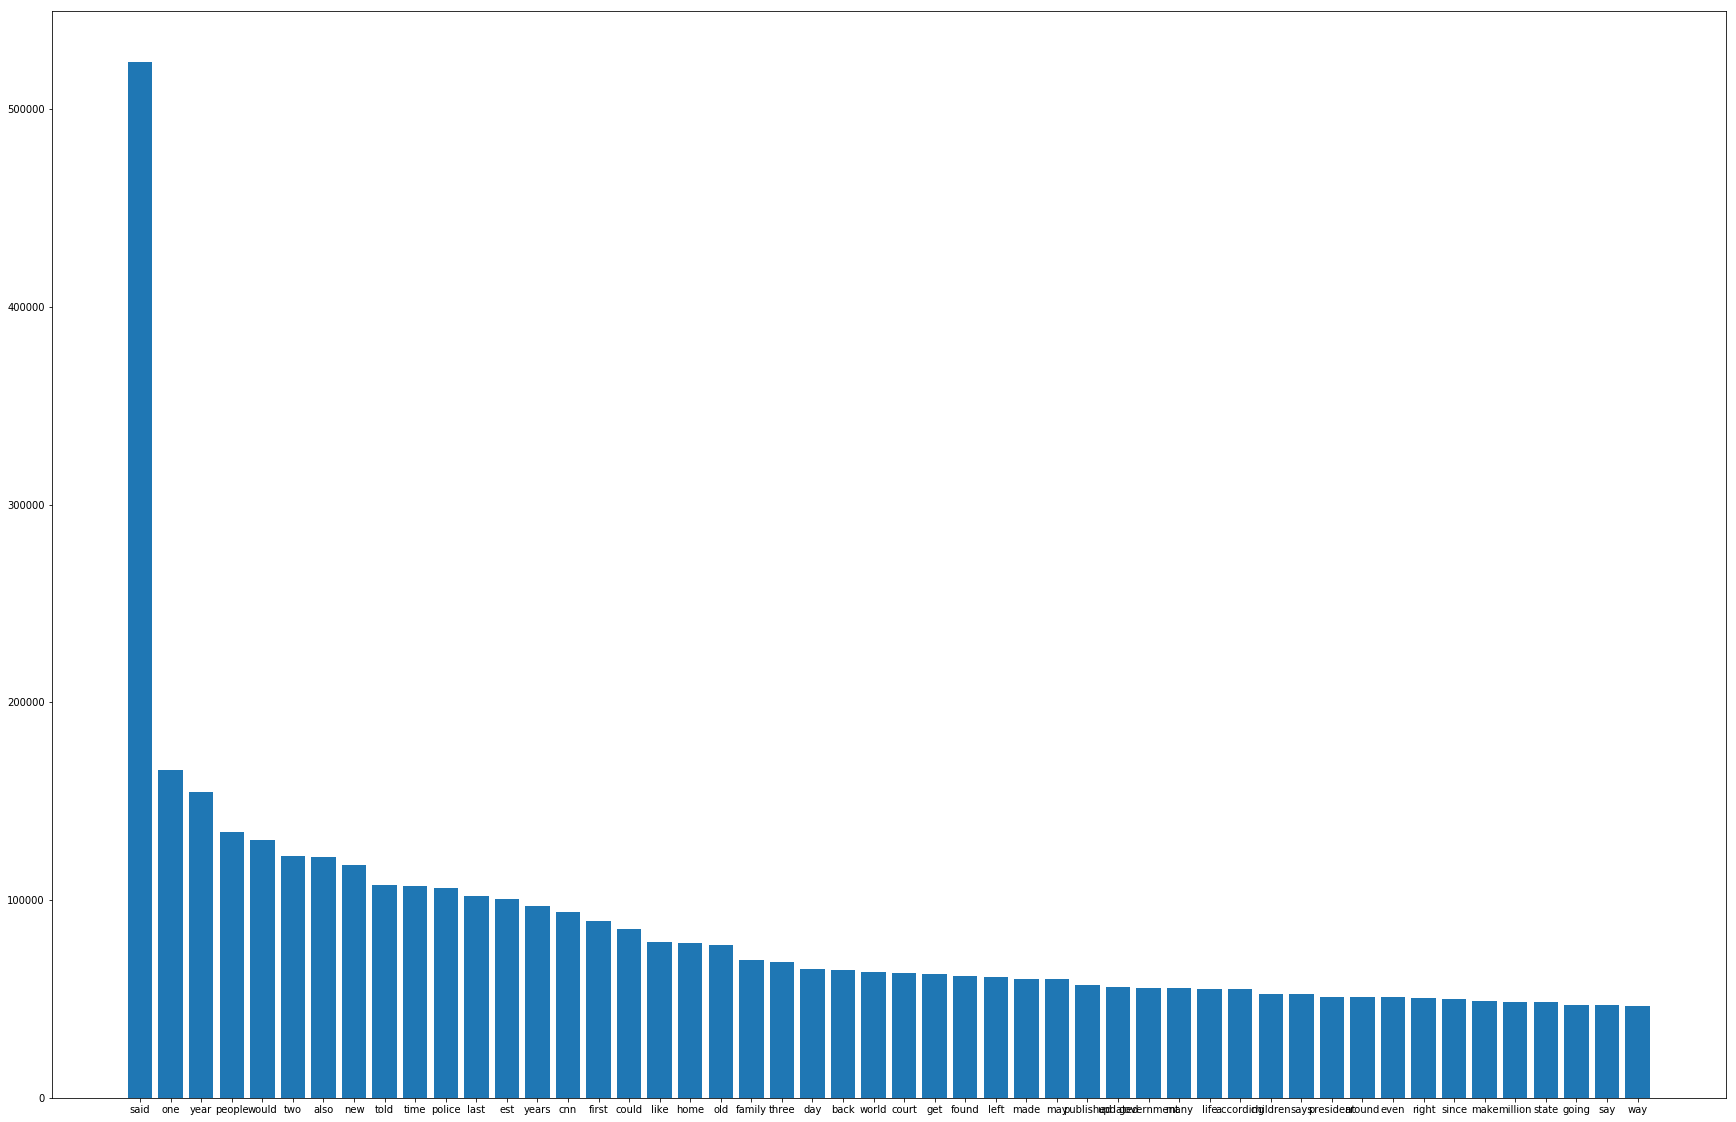

In [55]:
import matplotlib
from matplotlib import pyplot as plt
x=[a[1] for a in freq]
plt.figure(figsize=(30,20))
plt.bar(range(50), x)
plt.xticks(range(50), [a[0] for a in freq])
plt.show()

In [48]:
def test_oracle(env, oracle):
    round_no = 1
    doc_freq_dict = defaultdict(init_dict)
    topic_freq_dict = defaultdict(init_dict)
    chain_freq_dict = defaultdict(init_dict)
    prev_topic_id = -1
    count = 0
    while(env.get() != []):
        docs = env.get()
        imp_docs, topic_id = oracle.imp_documents(env, docs, round_no)
        if prev_topic_id == topic_id:
            count += 1
        else:
            prev_topic_id = topic_id
            chain_freq_dict[count] += 1
            count = 0
        round_no += 1
        doc_freq_dict[len(imp_docs)] += 1
        topic_freq_dict[topic_id] += 1
        env.update()
        logger.info("Round_no {}: Imp_docs {}, Topic_ID {}".format(round_no-1, len(imp_docs), topic_id))
    return doc_freq_dict, topic_freq_dict, chain_freq_dict

In [49]:
def test_trend(env, oracle):
    round_no = 1
    topic_freq_dict = defaultdict(init_dict)
    chain_freq_dict = defaultdict(init_dict)
    prev_topic_id = -1
    count = 0
    while(env.get() != []):
        docs = env.get()
        if round_no < oracle.window:
            round_no += 1
            env.update()
            continue
        topic_id = oracle.get_trending_cluster(env)[0]
        if prev_topic_id == topic_id:
            count += 1
        else:
            prev_topic_id = topic_id
            chain_freq_dict[count] += 1
            count = 0
        round_no += 1
        topic_freq_dict[topic_id] += 1
        env.update()
        logger.info("Round_no {}: Topic_ID {}".format(round_no-1, topic_id))
    return topic_freq_dict, chain_freq_dict

In [50]:
def test_framework(oracle, agent, env):
    round_no = 1
    doc_freq_dict = defaultdict(init_dict)
    while(env.get() != []):
        docs = env.get()
        _, topic_id = oracle.imp_documents(env, docs, round_no)
        a_topic_id = agent.choose_topic()
        if topic_id == a_topic_id:
            doc_freq_dict[1] += 1
        else:
            doc_freq_dict[0] += 1
        logger.info('Oracle_topic: {} Chosen_topic: {}'.format(topic_id, a_topic_id))
        agent.update(topic_id, round_no)
        round_no += 1
        env.update()
    return doc_freq_dict

In [51]:
reload(logging)
logging.basicConfig(format='%(asctime)s %(levelname)s %(name)s:%(message)s', datefmt='%I:%M:%S %p')
logger = logging.getLogger(__name__)
logger.setLevel(logging.INFO)
from collections import defaultdict
def init_dict():
    return 0

In [52]:
def test_kmeans(env, oracle):
    round_no = 1
    kmeans = oracle.kmeans
    doc_freq_dict = defaultdict(init_dict)
    doc_count = 0
    group_by_clusters = {i:[] for i in range(kmeans.n_clusters)}
    while(env.get() != []):
        docs = env.get()
        offset = docs[0][0]
        doc_count += len(docs)
        docs = [doc[1] for doc in docs]
        vecs = oracle.get_context(docs)
        if len(vecs) != len(docs):
            raise "Error"
        labels = kmeans.predict(vecs)
        round_no += 1
        for idx, label in enumerate(labels):
            doc_freq_dict[label] += 1
            group_by_clusters[label].append(offset+idx)
        env.update()
    print "No of docs {}".format(doc_count)
    return doc_freq_dict, group_by_clusters

In [53]:
def plot_bar(d, title, xlabel, ylabel='Frequency'):
    x=sorted(d.keys())
    y=[d[i] for i in x]
    plt.figure(figsize=(20,10))
    plt.bar(x,y)
    plt.title(title)
    plt.xticks(x,x)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

In [54]:
def pick_docs_from_cluster(label, group_dict):
    docs = group_dict[label]
    return np.random.choice(docs, 2, replace=False)

In [55]:
def sort_freq_dict(freq_dict):
    return sorted(freq_dict, key=lambda x:freq_dict[x])

In [56]:
def mean_topic_inter_arrival(group_dict, topic):
    return np.mean(np.diff(group_dict[topic]))

In [ ]:
def mean_cosine_sim(group_dict, topic, oracle):
    docvecs = oracle.model.docvecs
    indices = group_dict[topic]
    docvecs = docvecs[indices]
    return np.mean([1-scipy.spatial.distance.cosine(i,j) for i in docvecs for j in docvecs])

In [16]:
data =[]
for i in tdata:
    data.append(i[0])

In [17]:
data_t = data[:]

In [18]:
env = ConstDocs(data[:])

In [19]:
oracle = doc_cluster_oracle(env, docs_path=DIR_PATH, window=10, size=100, clusters= 10)

11:42:59 AM INFO doc2vec:Loading docs...
11:43:21 AM INFO doc2vec:Finished loading docs
11:43:21 AM INFO gensim.utils:loading Doc2Vec object from /home/tarun/NLP/models/doc2vechometarunarxivarxivscraperdataE10S100W10.d2v
11:43:21 AM INFO gensim.models.doc2vec:collecting all words and their counts
11:43:21 AM INFO gensim.models.doc2vec:PROGRESS: at example #0, processed 0 words (0/s), 0 word types, 0 tags
11:43:21 AM INFO gensim.models.doc2vec:PROGRESS: at example #10000, processed 800697 words (3611053/s), 73275 word types, 10000 tags
11:43:21 AM INFO gensim.models.doc2vec:PROGRESS: at example #20000, processed 1600038 words (3365008/s), 117083 word types, 20000 tags
11:43:21 AM INFO gensim.models.doc2vec:PROGRESS: at example #30000, processed 2434969 words (3530573/s), 155920 word types, 30000 tags
11:43:22 AM INFO gensim.models.doc2vec:PROGRESS: at example #40000, processed 3275823 words (3427775/s), 189888 word types, 40000 tags
11:43:22 AM INFO gensim.models.doc2vec:PROGRESS: at ex

11:44:12 AM INFO gensim.models.word2vec:PROGRESS: at 56.69% examples, 465430 words/s, in_qsize 14, out_qsize 0
11:44:13 AM INFO gensim.models.word2vec:PROGRESS: at 57.99% examples, 466390 words/s, in_qsize 13, out_qsize 0
11:44:14 AM INFO gensim.models.word2vec:PROGRESS: at 59.29% examples, 467597 words/s, in_qsize 14, out_qsize 0
11:44:15 AM INFO gensim.models.word2vec:PROGRESS: at 60.63% examples, 468348 words/s, in_qsize 13, out_qsize 0
11:44:16 AM INFO gensim.models.word2vec:PROGRESS: at 62.01% examples, 468762 words/s, in_qsize 13, out_qsize 0
11:44:17 AM INFO gensim.models.word2vec:PROGRESS: at 63.33% examples, 469106 words/s, in_qsize 13, out_qsize 0
11:44:18 AM INFO gensim.models.word2vec:PROGRESS: at 64.64% examples, 469530 words/s, in_qsize 13, out_qsize 0
11:44:19 AM INFO gensim.models.word2vec:PROGRESS: at 66.00% examples, 470494 words/s, in_qsize 14, out_qsize 0
11:44:20 AM INFO gensim.models.word2vec:PROGRESS: at 67.35% examples, 471527 words/s, in_qsize 13, out_qsize 0
1

In [20]:
env = ConstDocs(data[:])
freq_dict_100_100, group_dict_100_100 = test_kmeans(env, oracle)

No of docs 134757


In [23]:
from collections import Counter
Counter(oracle.kmeans.labels_)

Counter({0: 19784,
         1: 12254,
         2: 19336,
         3: 15169,
         4: 5198,
         5: 11056,
         6: 15165,
         7: 27462,
         8: 655,
         9: 8678})

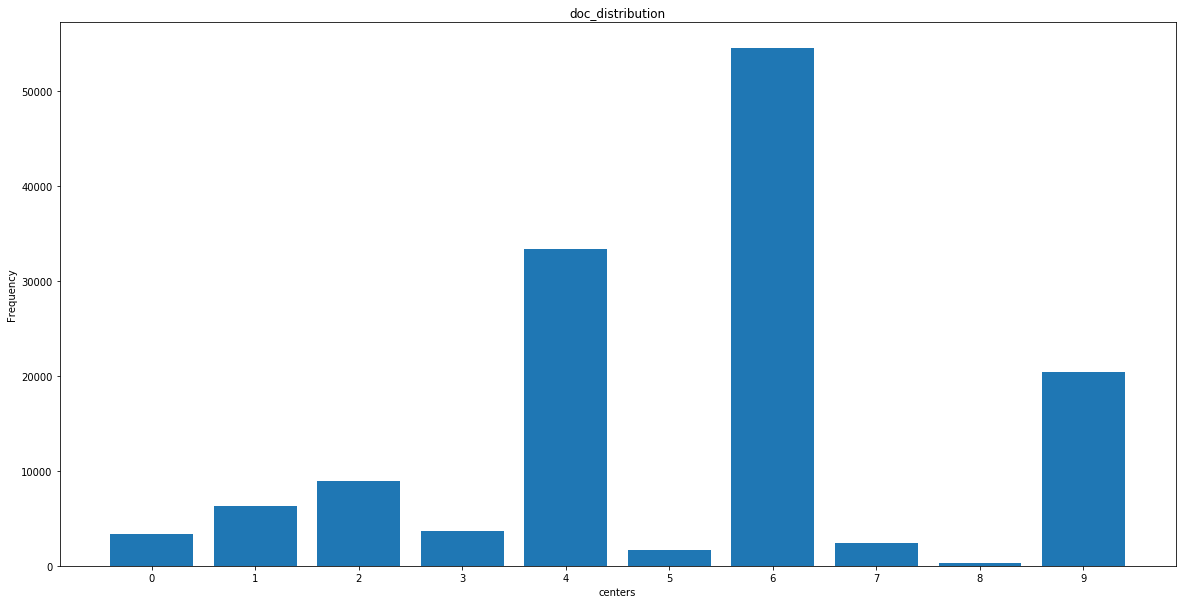

In [22]:
plot_bar(freq_dict_100_100, 'doc_distribution', 'centers')

In [56]:
oracle.model.similar_by_word(word='')

[(u'bemore', 0.395085871219635),
 (u'borrows', 0.3940514624118805),
 (u'tetrahedral', 0.37781602144241333),
 (u'gram', 0.37071752548217773),
 (u'themathematical', 0.363228976726532),
 (u'nondeterminism', 0.3503223657608032),
 (u'ast', 0.3365100622177124),
 (u'learningtask', 0.33487242460250854),
 (u'muchless', 0.3347127437591553),
 (u'traversed', 0.3338328003883362)]

In [44]:
a = pick_docs_from_cluster(8, group_dict_100_100)

In [ ]:
data[a[0]]

In [ ]:
data[a[1]]

In [39]:
env = ConstDocs(article[:]) 
d1_100_100, d2_100_100, l1_100_100=test_oracle(env, oracle_100_100)

03:57:40 PM INFO oracles:pick a random cluster
03:57:40 PM INFO __main__:Round_no 1: Imp_docs 4, Topic_ID 70
03:57:40 PM INFO oracles:pick a random cluster
03:57:40 PM INFO __main__:Round_no 2: Imp_docs 1, Topic_ID 67
03:57:40 PM INFO oracles:pick a random cluster
03:57:40 PM INFO __main__:Round_no 3: Imp_docs 1, Topic_ID 26
03:57:40 PM INFO oracles:pick a random cluster
03:57:40 PM INFO __main__:Round_no 4: Imp_docs 2, Topic_ID 15
03:57:40 PM INFO oracles:pick a random cluster
03:57:40 PM INFO __main__:Round_no 5: Imp_docs 1, Topic_ID 93
03:57:40 PM INFO __main__:Round_no 6: Imp_docs 3, Topic_ID 6
03:57:40 PM INFO __main__:Round_no 7: Imp_docs 2, Topic_ID 6
03:57:41 PM INFO __main__:Round_no 8: Imp_docs 1, Topic_ID 6
03:57:41 PM INFO __main__:Round_no 9: Imp_docs 1, Topic_ID 6
03:57:41 PM INFO __main__:Round_no 10: Imp_docs 2, Topic_ID 44
03:57:41 PM INFO __main__:Round_no 11: Imp_docs 1, Topic_ID 6
03:57:41 PM INFO __main__:Round_no 12: Imp_docs 1, Topic_ID 6
03:57:41 PM INFO __main_

03:57:59 PM INFO __main__:Round_no 128: Imp_docs 1, Topic_ID 5
03:57:59 PM INFO __main__:Round_no 129: Imp_docs 2, Topic_ID 5
03:58:00 PM INFO __main__:Round_no 130: Imp_docs 1, Topic_ID 99
03:58:00 PM INFO __main__:Round_no 131: Imp_docs 1, Topic_ID 5
03:58:00 PM INFO __main__:Round_no 132: Imp_docs 1, Topic_ID 5
03:58:00 PM INFO __main__:Round_no 133: Imp_docs 1, Topic_ID 5
03:58:00 PM INFO __main__:Round_no 134: Imp_docs 2, Topic_ID 4
03:58:00 PM INFO __main__:Round_no 135: Imp_docs 1, Topic_ID 50
03:58:01 PM INFO __main__:Round_no 136: Imp_docs 1, Topic_ID 7
03:58:01 PM INFO __main__:Round_no 137: Imp_docs 1, Topic_ID 67
03:58:01 PM INFO __main__:Round_no 138: Imp_docs 1, Topic_ID 7
03:58:01 PM INFO __main__:Round_no 139: Imp_docs 1, Topic_ID 5
03:58:01 PM INFO __main__:Round_no 140: Imp_docs 2, Topic_ID 5
03:58:01 PM INFO __main__:Round_no 141: Imp_docs 1, Topic_ID 94
03:58:02 PM INFO __main__:Round_no 142: Imp_docs 1, Topic_ID 5
03:58:02 PM INFO __main__:Round_no 143: Imp_docs 1,

03:58:20 PM INFO __main__:Round_no 257: Imp_docs 2, Topic_ID 4
03:58:20 PM INFO __main__:Round_no 258: Imp_docs 1, Topic_ID 33
03:58:20 PM INFO __main__:Round_no 259: Imp_docs 2, Topic_ID 4
03:58:21 PM INFO __main__:Round_no 260: Imp_docs 1, Topic_ID 66
03:58:21 PM INFO __main__:Round_no 261: Imp_docs 1, Topic_ID 94
03:58:21 PM INFO __main__:Round_no 262: Imp_docs 1, Topic_ID 25
03:58:21 PM INFO __main__:Round_no 263: Imp_docs 1, Topic_ID 89
03:58:21 PM INFO __main__:Round_no 264: Imp_docs 1, Topic_ID 89
03:58:21 PM INFO __main__:Round_no 265: Imp_docs 1, Topic_ID 59
03:58:22 PM INFO __main__:Round_no 266: Imp_docs 1, Topic_ID 85
03:58:22 PM INFO __main__:Round_no 267: Imp_docs 2, Topic_ID 2
03:58:22 PM INFO __main__:Round_no 268: Imp_docs 1, Topic_ID 32
03:58:22 PM INFO __main__:Round_no 269: Imp_docs 1, Topic_ID 3
03:58:22 PM INFO __main__:Round_no 270: Imp_docs 1, Topic_ID 53
03:58:22 PM INFO __main__:Round_no 271: Imp_docs 1, Topic_ID 72
03:58:23 PM INFO __main__:Round_no 272: Imp_

03:58:41 PM INFO __main__:Round_no 386: Imp_docs 1, Topic_ID 66
03:58:41 PM INFO __main__:Round_no 387: Imp_docs 2, Topic_ID 77
03:58:41 PM INFO __main__:Round_no 388: Imp_docs 1, Topic_ID 94
03:58:42 PM INFO __main__:Round_no 389: Imp_docs 1, Topic_ID 77
03:58:42 PM INFO __main__:Round_no 390: Imp_docs 1, Topic_ID 77
03:58:42 PM INFO __main__:Round_no 391: Imp_docs 1, Topic_ID 39
03:58:42 PM INFO __main__:Round_no 392: Imp_docs 1, Topic_ID 77
03:58:42 PM INFO __main__:Round_no 393: Imp_docs 1, Topic_ID 70
03:58:42 PM INFO __main__:Round_no 394: Imp_docs 1, Topic_ID 26
03:58:42 PM INFO __main__:Round_no 395: Imp_docs 1, Topic_ID 81
03:58:43 PM INFO __main__:Round_no 396: Imp_docs 1, Topic_ID 7
03:58:43 PM INFO __main__:Round_no 397: Imp_docs 2, Topic_ID 7
03:58:43 PM INFO __main__:Round_no 398: Imp_docs 3, Topic_ID 99
03:58:43 PM INFO __main__:Round_no 399: Imp_docs 1, Topic_ID 81
03:58:43 PM INFO __main__:Round_no 400: Imp_docs 1, Topic_ID 1
03:58:43 PM INFO __main__:Round_no 401: Imp

03:59:01 PM INFO __main__:Round_no 515: Imp_docs 1, Topic_ID 4
03:59:01 PM INFO __main__:Round_no 516: Imp_docs 2, Topic_ID 32
03:59:01 PM INFO __main__:Round_no 517: Imp_docs 1, Topic_ID 32
03:59:02 PM INFO __main__:Round_no 518: Imp_docs 1, Topic_ID 55
03:59:02 PM INFO __main__:Round_no 519: Imp_docs 1, Topic_ID 55
03:59:02 PM INFO __main__:Round_no 520: Imp_docs 2, Topic_ID 55
03:59:02 PM INFO __main__:Round_no 521: Imp_docs 3, Topic_ID 8
03:59:02 PM INFO __main__:Round_no 522: Imp_docs 1, Topic_ID 55
03:59:02 PM INFO __main__:Round_no 523: Imp_docs 1, Topic_ID 15
03:59:02 PM INFO __main__:Round_no 524: Imp_docs 2, Topic_ID 8
03:59:03 PM INFO __main__:Round_no 525: Imp_docs 1, Topic_ID 15
03:59:03 PM INFO __main__:Round_no 526: Imp_docs 1, Topic_ID 8
03:59:03 PM INFO __main__:Round_no 527: Imp_docs 2, Topic_ID 15
03:59:03 PM INFO __main__:Round_no 528: Imp_docs 1, Topic_ID 6
03:59:03 PM INFO __main__:Round_no 529: Imp_docs 5, Topic_ID 6
03:59:03 PM INFO __main__:Round_no 530: Imp_do

03:59:21 PM INFO __main__:Round_no 644: Imp_docs 1, Topic_ID 62
03:59:21 PM INFO __main__:Round_no 645: Imp_docs 1, Topic_ID 62
03:59:21 PM INFO __main__:Round_no 646: Imp_docs 1, Topic_ID 62
03:59:21 PM INFO __main__:Round_no 647: Imp_docs 1, Topic_ID 67
03:59:21 PM INFO __main__:Round_no 648: Imp_docs 1, Topic_ID 67
03:59:21 PM INFO __main__:Round_no 649: Imp_docs 1, Topic_ID 4
03:59:22 PM INFO __main__:Round_no 650: Imp_docs 1, Topic_ID 4
03:59:22 PM INFO __main__:Round_no 651: Imp_docs 1, Topic_ID 61
03:59:22 PM INFO __main__:Round_no 652: Imp_docs 1, Topic_ID 4
03:59:22 PM INFO __main__:Round_no 653: Imp_docs 6, Topic_ID 8
03:59:22 PM INFO __main__:Round_no 654: Imp_docs 2, Topic_ID 19
03:59:22 PM INFO __main__:Round_no 655: Imp_docs 1, Topic_ID 19
03:59:22 PM INFO __main__:Round_no 656: Imp_docs 1, Topic_ID 19
03:59:22 PM INFO __main__:Round_no 657: Imp_docs 2, Topic_ID 8
03:59:23 PM INFO __main__:Round_no 658: Imp_docs 1, Topic_ID 8
03:59:23 PM INFO __main__:Round_no 659: Imp_do

03:59:39 PM INFO __main__:Round_no 774: Imp_docs 5, Topic_ID 8
03:59:39 PM INFO __main__:Round_no 775: Imp_docs 5, Topic_ID 8
03:59:39 PM INFO __main__:Round_no 776: Imp_docs 1, Topic_ID 8
03:59:39 PM INFO __main__:Round_no 777: Imp_docs 2, Topic_ID 6
03:59:40 PM INFO __main__:Round_no 778: Imp_docs 1, Topic_ID 6
03:59:40 PM INFO __main__:Round_no 779: Imp_docs 2, Topic_ID 8
03:59:40 PM INFO __main__:Round_no 780: Imp_docs 4, Topic_ID 8
03:59:40 PM INFO __main__:Round_no 781: Imp_docs 6, Topic_ID 6
03:59:40 PM INFO __main__:Round_no 782: Imp_docs 1, Topic_ID 6
03:59:40 PM INFO __main__:Round_no 783: Imp_docs 1, Topic_ID 6
03:59:40 PM INFO __main__:Round_no 784: Imp_docs 3, Topic_ID 6
03:59:41 PM INFO __main__:Round_no 785: Imp_docs 3, Topic_ID 4
03:59:41 PM INFO __main__:Round_no 786: Imp_docs 1, Topic_ID 6
03:59:41 PM INFO __main__:Round_no 787: Imp_docs 1, Topic_ID 24
03:59:41 PM INFO __main__:Round_no 788: Imp_docs 1, Topic_ID 96
03:59:41 PM INFO __main__:Round_no 789: Imp_docs 1, T

03:59:58 PM INFO __main__:Round_no 903: Imp_docs 2, Topic_ID 8
03:59:58 PM INFO __main__:Round_no 904: Imp_docs 1, Topic_ID 50
03:59:58 PM INFO __main__:Round_no 905: Imp_docs 2, Topic_ID 8
03:59:58 PM INFO __main__:Round_no 906: Imp_docs 1, Topic_ID 99
03:59:59 PM INFO __main__:Round_no 907: Imp_docs 2, Topic_ID 99
03:59:59 PM INFO __main__:Round_no 908: Imp_docs 1, Topic_ID 4
03:59:59 PM INFO __main__:Round_no 909: Imp_docs 1, Topic_ID 99
03:59:59 PM INFO __main__:Round_no 910: Imp_docs 1, Topic_ID 88
03:59:59 PM INFO __main__:Round_no 911: Imp_docs 1, Topic_ID 77
03:59:59 PM INFO __main__:Round_no 912: Imp_docs 1, Topic_ID 46
03:59:59 PM INFO __main__:Round_no 913: Imp_docs 2, Topic_ID 8
04:00:00 PM INFO __main__:Round_no 914: Imp_docs 1, Topic_ID 19
04:00:00 PM INFO __main__:Round_no 915: Imp_docs 1, Topic_ID 19
04:00:00 PM INFO __main__:Round_no 916: Imp_docs 2, Topic_ID 19
04:00:00 PM INFO __main__:Round_no 917: Imp_docs 2, Topic_ID 19
04:00:00 PM INFO __main__:Round_no 918: Imp_

04:00:17 PM INFO __main__:Round_no 1031: Imp_docs 1, Topic_ID 65
04:00:17 PM INFO __main__:Round_no 1032: Imp_docs 1, Topic_ID 6
04:00:18 PM INFO __main__:Round_no 1033: Imp_docs 5, Topic_ID 6
04:00:18 PM INFO __main__:Round_no 1034: Imp_docs 3, Topic_ID 6
04:00:18 PM INFO __main__:Round_no 1035: Imp_docs 1, Topic_ID 6
04:00:18 PM INFO __main__:Round_no 1036: Imp_docs 1, Topic_ID 33
04:00:18 PM INFO __main__:Round_no 1037: Imp_docs 4, Topic_ID 75
04:00:18 PM INFO __main__:Round_no 1038: Imp_docs 1, Topic_ID 6
04:00:19 PM INFO __main__:Round_no 1039: Imp_docs 1, Topic_ID 6
04:00:19 PM INFO __main__:Round_no 1040: Imp_docs 3, Topic_ID 75
04:00:19 PM INFO __main__:Round_no 1041: Imp_docs 2, Topic_ID 75
04:00:19 PM INFO __main__:Round_no 1042: Imp_docs 1, Topic_ID 22
04:00:19 PM INFO __main__:Round_no 1043: Imp_docs 1, Topic_ID 6
04:00:19 PM INFO __main__:Round_no 1044: Imp_docs 1, Topic_ID 75
04:00:20 PM INFO __main__:Round_no 1045: Imp_docs 1, Topic_ID 75
04:00:20 PM INFO __main__:Round_

04:00:37 PM INFO __main__:Round_no 1158: Imp_docs 1, Topic_ID 6
04:00:37 PM INFO __main__:Round_no 1159: Imp_docs 1, Topic_ID 5
04:00:37 PM INFO __main__:Round_no 1160: Imp_docs 2, Topic_ID 6
04:00:37 PM INFO __main__:Round_no 1161: Imp_docs 1, Topic_ID 61
04:00:37 PM INFO __main__:Round_no 1162: Imp_docs 2, Topic_ID 77
04:00:37 PM INFO __main__:Round_no 1163: Imp_docs 1, Topic_ID 50
04:00:37 PM INFO __main__:Round_no 1164: Imp_docs 1, Topic_ID 6
04:00:38 PM INFO __main__:Round_no 1165: Imp_docs 1, Topic_ID 19
04:00:38 PM INFO __main__:Round_no 1166: Imp_docs 1, Topic_ID 49
04:00:38 PM INFO __main__:Round_no 1167: Imp_docs 1, Topic_ID 19
04:00:38 PM INFO __main__:Round_no 1168: Imp_docs 1, Topic_ID 49
04:00:38 PM INFO __main__:Round_no 1169: Imp_docs 2, Topic_ID 19
04:00:38 PM INFO __main__:Round_no 1170: Imp_docs 2, Topic_ID 19
04:00:39 PM INFO __main__:Round_no 1171: Imp_docs 1, Topic_ID 19
04:00:39 PM INFO __main__:Round_no 1172: Imp_docs 1, Topic_ID 6
04:00:39 PM INFO __main__:Roun

04:00:56 PM INFO __main__:Round_no 1285: Imp_docs 1, Topic_ID 46
04:00:56 PM INFO __main__:Round_no 1286: Imp_docs 6, Topic_ID 19
04:00:56 PM INFO __main__:Round_no 1287: Imp_docs 1, Topic_ID 46
04:00:56 PM INFO __main__:Round_no 1288: Imp_docs 1, Topic_ID 25
04:00:57 PM INFO __main__:Round_no 1289: Imp_docs 2, Topic_ID 97
04:00:57 PM INFO __main__:Round_no 1290: Imp_docs 1, Topic_ID 19
04:00:57 PM INFO __main__:Round_no 1291: Imp_docs 2, Topic_ID 97
04:00:57 PM INFO __main__:Round_no 1292: Imp_docs 1, Topic_ID 57
04:00:57 PM INFO __main__:Round_no 1293: Imp_docs 1, Topic_ID 97
04:00:57 PM INFO __main__:Round_no 1294: Imp_docs 1, Topic_ID 97
04:00:58 PM INFO __main__:Round_no 1295: Imp_docs 1, Topic_ID 57
04:00:58 PM INFO __main__:Round_no 1296: Imp_docs 1, Topic_ID 23
04:00:58 PM INFO __main__:Round_no 1297: Imp_docs 1, Topic_ID 49
04:00:58 PM INFO __main__:Round_no 1298: Imp_docs 1, Topic_ID 77
04:00:58 PM INFO __main__:Round_no 1299: Imp_docs 1, Topic_ID 68
04:00:58 PM INFO __main__

04:01:16 PM INFO __main__:Round_no 1412: Imp_docs 1, Topic_ID 97
04:01:16 PM INFO __main__:Round_no 1413: Imp_docs 1, Topic_ID 54
04:01:16 PM INFO __main__:Round_no 1414: Imp_docs 1, Topic_ID 97
04:01:16 PM INFO __main__:Round_no 1415: Imp_docs 1, Topic_ID 97
04:01:16 PM INFO __main__:Round_no 1416: Imp_docs 1, Topic_ID 6
04:01:16 PM INFO __main__:Round_no 1417: Imp_docs 1, Topic_ID 22
04:01:17 PM INFO __main__:Round_no 1418: Imp_docs 1, Topic_ID 22
04:01:17 PM INFO __main__:Round_no 1419: Imp_docs 3, Topic_ID 97
04:01:17 PM INFO __main__:Round_no 1420: Imp_docs 2, Topic_ID 97
04:01:17 PM INFO __main__:Round_no 1421: Imp_docs 1, Topic_ID 50
04:01:17 PM INFO __main__:Round_no 1422: Imp_docs 2, Topic_ID 97
04:01:17 PM INFO __main__:Round_no 1423: Imp_docs 1, Topic_ID 50
04:01:17 PM INFO __main__:Round_no 1424: Imp_docs 1, Topic_ID 6
04:01:18 PM INFO __main__:Round_no 1425: Imp_docs 1, Topic_ID 97
04:01:18 PM INFO __main__:Round_no 1426: Imp_docs 2, Topic_ID 67
04:01:18 PM INFO __main__:R

04:01:36 PM INFO __main__:Round_no 1539: Imp_docs 1, Topic_ID 40
04:01:36 PM INFO __main__:Round_no 1540: Imp_docs 1, Topic_ID 97
04:01:36 PM INFO __main__:Round_no 1541: Imp_docs 3, Topic_ID 22
04:01:37 PM INFO __main__:Round_no 1542: Imp_docs 1, Topic_ID 59
04:01:37 PM INFO __main__:Round_no 1543: Imp_docs 2, Topic_ID 91
04:01:37 PM INFO __main__:Round_no 1544: Imp_docs 1, Topic_ID 40
04:01:37 PM INFO __main__:Round_no 1545: Imp_docs 1, Topic_ID 68
04:01:37 PM INFO __main__:Round_no 1546: Imp_docs 1, Topic_ID 94
04:01:37 PM INFO __main__:Round_no 1547: Imp_docs 3, Topic_ID 68
04:01:38 PM INFO __main__:Round_no 1548: Imp_docs 1, Topic_ID 12
04:01:38 PM INFO __main__:Round_no 1549: Imp_docs 1, Topic_ID 12
04:01:38 PM INFO __main__:Round_no 1550: Imp_docs 2, Topic_ID 68
04:01:38 PM INFO __main__:Round_no 1551: Imp_docs 6, Topic_ID 6
04:01:38 PM INFO __main__:Round_no 1552: Imp_docs 10, Topic_ID 47
04:01:38 PM INFO __main__:Round_no 1553: Imp_docs 10, Topic_ID 19
04:01:38 PM INFO __main_

04:01:56 PM INFO __main__:Round_no 1666: Imp_docs 2, Topic_ID 99
04:01:56 PM INFO __main__:Round_no 1667: Imp_docs 1, Topic_ID 77
04:01:57 PM INFO __main__:Round_no 1668: Imp_docs 1, Topic_ID 49
04:01:57 PM INFO __main__:Round_no 1669: Imp_docs 2, Topic_ID 99
04:01:57 PM INFO __main__:Round_no 1670: Imp_docs 3, Topic_ID 99
04:01:57 PM INFO __main__:Round_no 1671: Imp_docs 1, Topic_ID 99
04:01:57 PM INFO __main__:Round_no 1672: Imp_docs 1, Topic_ID 99
04:01:57 PM INFO __main__:Round_no 1673: Imp_docs 1, Topic_ID 99
04:01:58 PM INFO __main__:Round_no 1674: Imp_docs 1, Topic_ID 49
04:01:58 PM INFO __main__:Round_no 1675: Imp_docs 2, Topic_ID 49
04:01:58 PM INFO __main__:Round_no 1676: Imp_docs 1, Topic_ID 49
04:01:58 PM INFO __main__:Round_no 1677: Imp_docs 1, Topic_ID 49
04:01:58 PM INFO __main__:Round_no 1678: Imp_docs 1, Topic_ID 39
04:01:58 PM INFO __main__:Round_no 1679: Imp_docs 1, Topic_ID 93
04:01:58 PM INFO __main__:Round_no 1680: Imp_docs 1, Topic_ID 2
04:01:59 PM INFO __main__:

04:02:17 PM INFO __main__:Round_no 1793: Imp_docs 1, Topic_ID 4
04:02:17 PM INFO __main__:Round_no 1794: Imp_docs 1, Topic_ID 4
04:02:17 PM INFO __main__:Round_no 1795: Imp_docs 1, Topic_ID 94
04:02:17 PM INFO __main__:Round_no 1796: Imp_docs 1, Topic_ID 94
04:02:17 PM INFO __main__:Round_no 1797: Imp_docs 1, Topic_ID 15
04:02:17 PM INFO __main__:Round_no 1798: Imp_docs 1, Topic_ID 94
04:02:18 PM INFO __main__:Round_no 1799: Imp_docs 1, Topic_ID 9
04:02:18 PM INFO __main__:Round_no 1800: Imp_docs 1, Topic_ID 59
04:02:18 PM INFO __main__:Round_no 1801: Imp_docs 2, Topic_ID 30
04:02:18 PM INFO __main__:Round_no 1802: Imp_docs 1, Topic_ID 4
04:02:18 PM INFO __main__:Round_no 1803: Imp_docs 1, Topic_ID 64
04:02:18 PM INFO __main__:Round_no 1804: Imp_docs 1, Topic_ID 11
04:02:18 PM INFO __main__:Round_no 1805: Imp_docs 4, Topic_ID 19
04:02:19 PM INFO __main__:Round_no 1806: Imp_docs 1, Topic_ID 8
04:02:19 PM INFO __main__:Round_no 1807: Imp_docs 1, Topic_ID 19
04:02:19 PM INFO __main__:Roun

04:02:38 PM INFO __main__:Round_no 1920: Imp_docs 1, Topic_ID 97
04:02:38 PM INFO __main__:Round_no 1921: Imp_docs 2, Topic_ID 97
04:02:38 PM INFO __main__:Round_no 1922: Imp_docs 3, Topic_ID 77
04:02:38 PM INFO __main__:Round_no 1923: Imp_docs 1, Topic_ID 97
04:02:38 PM INFO __main__:Round_no 1924: Imp_docs 3, Topic_ID 97
04:02:38 PM INFO __main__:Round_no 1925: Imp_docs 5, Topic_ID 97
04:02:39 PM INFO __main__:Round_no 1926: Imp_docs 5, Topic_ID 97
04:02:39 PM INFO __main__:Round_no 1927: Imp_docs 3, Topic_ID 40
04:02:39 PM INFO __main__:Round_no 1928: Imp_docs 2, Topic_ID 40
04:02:39 PM INFO __main__:Round_no 1929: Imp_docs 1, Topic_ID 97
04:02:39 PM INFO __main__:Round_no 1930: Imp_docs 1, Topic_ID 99
04:02:40 PM INFO __main__:Round_no 1931: Imp_docs 1, Topic_ID 80
04:02:40 PM INFO __main__:Round_no 1932: Imp_docs 1, Topic_ID 80
04:02:40 PM INFO __main__:Round_no 1933: Imp_docs 1, Topic_ID 80
04:02:40 PM INFO __main__:Round_no 1934: Imp_docs 4, Topic_ID 13
04:02:40 PM INFO __main__

04:02:59 PM INFO __main__:Round_no 2047: Imp_docs 1, Topic_ID 37
04:02:59 PM INFO __main__:Round_no 2048: Imp_docs 1, Topic_ID 88
04:02:59 PM INFO __main__:Round_no 2049: Imp_docs 1, Topic_ID 70
04:02:59 PM INFO __main__:Round_no 2050: Imp_docs 1, Topic_ID 91
04:03:00 PM INFO __main__:Round_no 2051: Imp_docs 1, Topic_ID 70
04:03:00 PM INFO __main__:Round_no 2052: Imp_docs 1, Topic_ID 8
04:03:00 PM INFO __main__:Round_no 2053: Imp_docs 1, Topic_ID 14
04:03:00 PM INFO __main__:Round_no 2054: Imp_docs 1, Topic_ID 25
04:03:00 PM INFO __main__:Round_no 2055: Imp_docs 1, Topic_ID 6
04:03:00 PM INFO __main__:Round_no 2056: Imp_docs 2, Topic_ID 25
04:03:01 PM INFO __main__:Round_no 2057: Imp_docs 1, Topic_ID 1
04:03:01 PM INFO __main__:Round_no 2058: Imp_docs 1, Topic_ID 1
04:03:01 PM INFO __main__:Round_no 2059: Imp_docs 1, Topic_ID 1
04:03:01 PM INFO __main__:Round_no 2060: Imp_docs 1, Topic_ID 44
04:03:01 PM INFO __main__:Round_no 2061: Imp_docs 1, Topic_ID 2
04:03:01 PM INFO __main__:Round

04:03:20 PM INFO __main__:Round_no 2174: Imp_docs 1, Topic_ID 22
04:03:20 PM INFO __main__:Round_no 2175: Imp_docs 1, Topic_ID 50
04:03:20 PM INFO __main__:Round_no 2176: Imp_docs 2, Topic_ID 94
04:03:21 PM INFO __main__:Round_no 2177: Imp_docs 1, Topic_ID 40
04:03:21 PM INFO __main__:Round_no 2178: Imp_docs 1, Topic_ID 12
04:03:21 PM INFO __main__:Round_no 2179: Imp_docs 2, Topic_ID 18
04:03:21 PM INFO __main__:Round_no 2180: Imp_docs 1, Topic_ID 8
04:03:21 PM INFO __main__:Round_no 2181: Imp_docs 1, Topic_ID 2
04:03:21 PM INFO __main__:Round_no 2182: Imp_docs 1, Topic_ID 14
04:03:21 PM INFO __main__:Round_no 2183: Imp_docs 2, Topic_ID 59
04:03:22 PM INFO __main__:Round_no 2184: Imp_docs 1, Topic_ID 59
04:03:22 PM INFO __main__:Round_no 2185: Imp_docs 1, Topic_ID 59
04:03:22 PM INFO __main__:Round_no 2186: Imp_docs 1, Topic_ID 59
04:03:22 PM INFO __main__:Round_no 2187: Imp_docs 2, Topic_ID 40
04:03:22 PM INFO __main__:Round_no 2188: Imp_docs 2, Topic_ID 59
04:03:22 PM INFO __main__:R

04:03:41 PM INFO __main__:Round_no 2301: Imp_docs 2, Topic_ID 2
04:03:41 PM INFO __main__:Round_no 2302: Imp_docs 2, Topic_ID 2
04:03:41 PM INFO __main__:Round_no 2303: Imp_docs 1, Topic_ID 88
04:03:41 PM INFO __main__:Round_no 2304: Imp_docs 2, Topic_ID 46
04:03:41 PM INFO __main__:Round_no 2305: Imp_docs 1, Topic_ID 6
04:03:42 PM INFO __main__:Round_no 2306: Imp_docs 1, Topic_ID 25
04:03:42 PM INFO __main__:Round_no 2307: Imp_docs 1, Topic_ID 34
04:03:42 PM INFO __main__:Round_no 2308: Imp_docs 1, Topic_ID 53
04:03:42 PM INFO __main__:Round_no 2309: Imp_docs 1, Topic_ID 84
04:03:42 PM INFO __main__:Round_no 2310: Imp_docs 1, Topic_ID 53
04:03:42 PM INFO __main__:Round_no 2311: Imp_docs 1, Topic_ID 99
04:03:43 PM INFO __main__:Round_no 2312: Imp_docs 1, Topic_ID 84
04:03:43 PM INFO __main__:Round_no 2313: Imp_docs 1, Topic_ID 45
04:03:43 PM INFO __main__:Round_no 2314: Imp_docs 2, Topic_ID 99
04:03:43 PM INFO __main__:Round_no 2315: Imp_docs 1, Topic_ID 99
04:03:43 PM INFO __main__:Ro

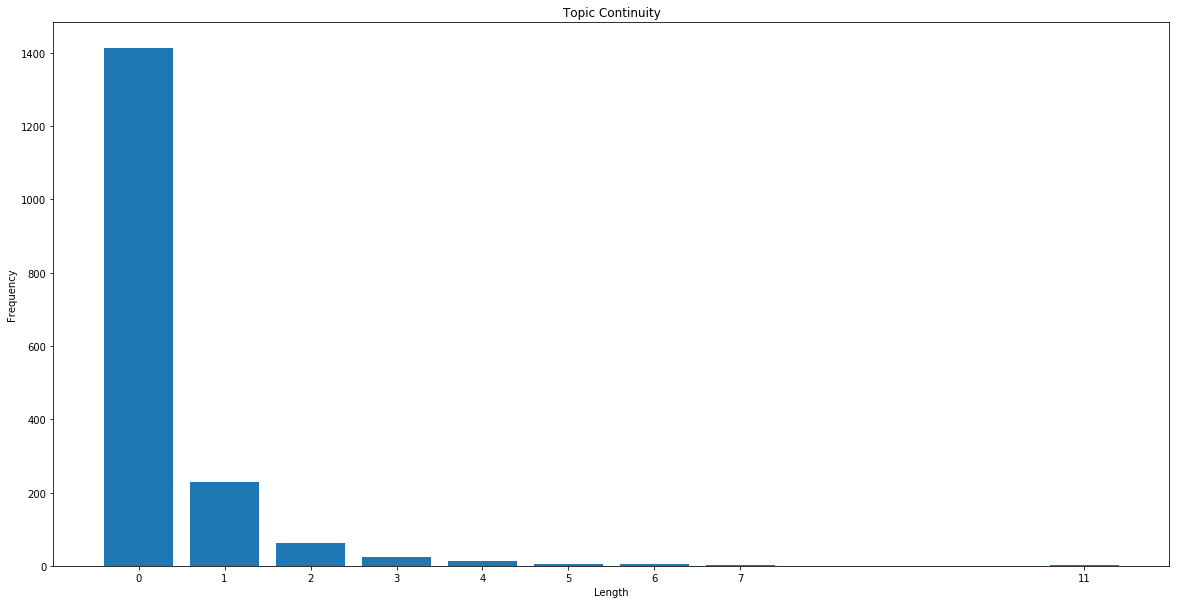

In [40]:
plot_bar(l1_100_100, 'Topic Continuity', 'Length')

In [41]:
l1_100_100

defaultdict(<function __main__.init_dict>,
            {0: 1413, 1: 230, 2: 62, 3: 24, 4: 12, 5: 6, 6: 6, 7: 3, 11: 3})

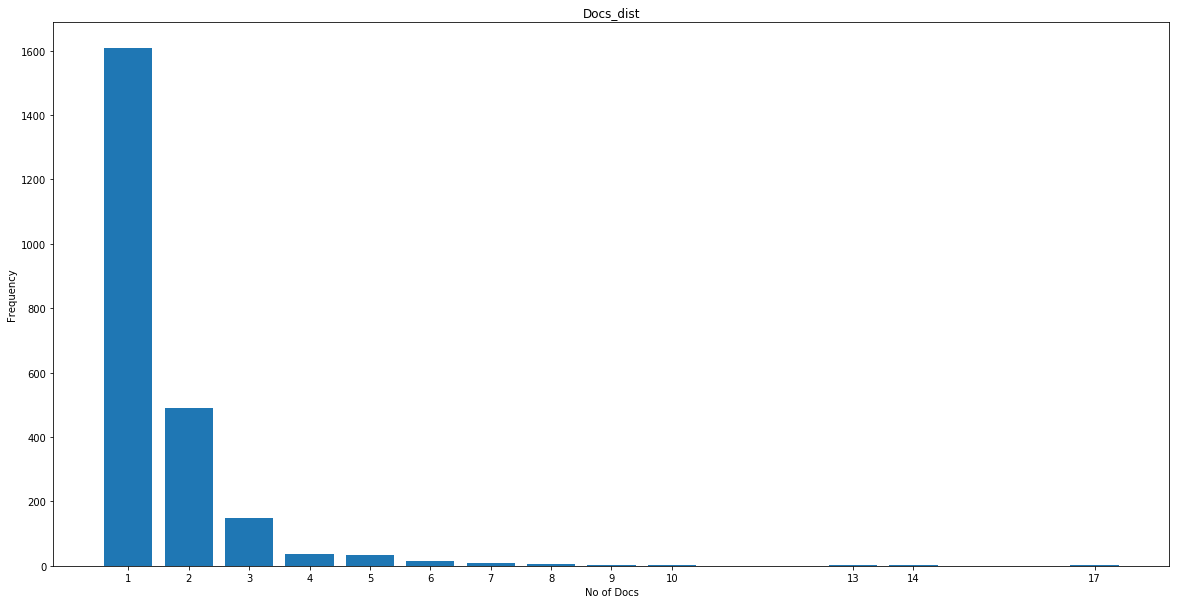

In [42]:
plot_bar(d1_100_100, 'Docs_dist', 'No of Docs')

In [43]:
env = ConstDocs(doc)
oracle_100_200 = doc_cluster_oracle(env, model_name='doc2vec100.d2v', size=100, clusters= 200)
freq_dict_100_200, group_dict_100_200 = test_kmeans(env, oracle_100_200)

04:03:50 PM INFO doc2vec:Loading docs...
04:04:17 PM INFO doc2vec:Finished loading docs
04:04:17 PM INFO gensim.utils:loading Doc2Vec object from /home/tarun/NLP/models/doc2vec100.d2v
04:04:17 PM INFO gensim.utils:loading docvecs recursively from /home/tarun/NLP/models/doc2vec100.d2v.docvecs.* with mmap=None
04:04:17 PM INFO gensim.utils:loading wv recursively from /home/tarun/NLP/models/doc2vec100.d2v.wv.* with mmap=None
04:04:17 PM INFO gensim.utils:setting ignored attribute syn0norm to None
04:04:17 PM INFO gensim.utils:setting ignored attribute cum_table to None
04:04:17 PM INFO gensim.utils:loaded /home/tarun/NLP/models/doc2vec100.d2v
04:04:18 PM INFO oracles:Clustering Docs
04:06:20 PM INFO oracles:Clustering finished


No of docs 47050


In [44]:
doc_dist = freq_dict_100_200.values()

print "Max no. of docs in a cluster {}".format(max(doc_dist))
print "Min no. of docs in a cluster {}".format(min(doc_dist))
print "Avg no. of docs per cluster {}".format(np.mean(doc_dist))
print "Total no. of docs {}".format(np.sum(doc_dist))

Max no. of docs in a cluster 674
Min no. of docs in a cluster 29
Avg no. of docs per cluster 235.25
Total no. of docs 47050


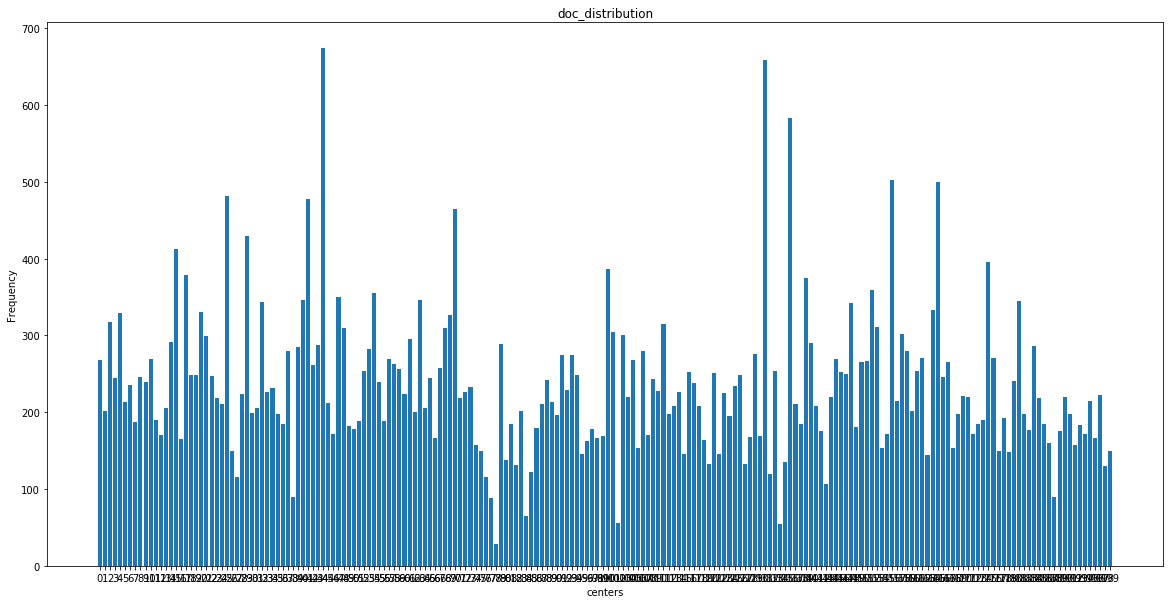

In [45]:
plot_bar(freq_dict_100_200, 'doc_distribution', 'centers')

In [46]:
a = pick_docs_from_cluster(14, group_dict_100_200)

In [47]:
env = ConstDocs(doc) 
d1_100_200, d2_100_200, l1_100_200=test_oracle(env, oracle_100_200)

04:07:14 PM INFO oracles:pick a random cluster
04:07:14 PM INFO __main__:Round_no 1: Imp_docs 4, Topic_ID 20
04:07:14 PM INFO oracles:pick a random cluster
04:07:14 PM INFO __main__:Round_no 2: Imp_docs 1, Topic_ID 164
04:07:14 PM INFO oracles:pick a random cluster
04:07:14 PM INFO __main__:Round_no 3: Imp_docs 1, Topic_ID 142
04:07:14 PM INFO oracles:pick a random cluster
04:07:14 PM INFO __main__:Round_no 4: Imp_docs 2, Topic_ID 140
04:07:14 PM INFO oracles:pick a random cluster
04:07:14 PM INFO __main__:Round_no 5: Imp_docs 1, Topic_ID 97
04:07:14 PM INFO __main__:Round_no 6: Imp_docs 1, Topic_ID 10
04:07:14 PM INFO __main__:Round_no 7: Imp_docs 2, Topic_ID 131
04:07:14 PM INFO __main__:Round_no 8: Imp_docs 1, Topic_ID 131
04:07:14 PM INFO __main__:Round_no 9: Imp_docs 1, Topic_ID 131
04:07:15 PM INFO __main__:Round_no 10: Imp_docs 2, Topic_ID 164
04:07:15 PM INFO __main__:Round_no 11: Imp_docs 1, Topic_ID 131
04:07:15 PM INFO __main__:Round_no 12: Imp_docs 1, Topic_ID 139
04:07:15 

04:07:32 PM INFO __main__:Round_no 127: Imp_docs 3, Topic_ID 79
04:07:32 PM INFO __main__:Round_no 128: Imp_docs 1, Topic_ID 79
04:07:33 PM INFO __main__:Round_no 129: Imp_docs 2, Topic_ID 79
04:07:33 PM INFO __main__:Round_no 130: Imp_docs 1, Topic_ID 139
04:07:33 PM INFO __main__:Round_no 131: Imp_docs 1, Topic_ID 79
04:07:33 PM INFO __main__:Round_no 132: Imp_docs 1, Topic_ID 79
04:07:33 PM INFO __main__:Round_no 133: Imp_docs 1, Topic_ID 79
04:07:33 PM INFO __main__:Round_no 134: Imp_docs 1, Topic_ID 54
04:07:34 PM INFO __main__:Round_no 135: Imp_docs 1, Topic_ID 164
04:07:34 PM INFO __main__:Round_no 136: Imp_docs 2, Topic_ID 79
04:07:34 PM INFO __main__:Round_no 137: Imp_docs 1, Topic_ID 155
04:07:34 PM INFO __main__:Round_no 138: Imp_docs 2, Topic_ID 79
04:07:34 PM INFO __main__:Round_no 139: Imp_docs 1, Topic_ID 79
04:07:34 PM INFO __main__:Round_no 140: Imp_docs 1, Topic_ID 79
04:07:35 PM INFO __main__:Round_no 141: Imp_docs 1, Topic_ID 136
04:07:35 PM INFO __main__:Round_no 1

04:07:52 PM INFO __main__:Round_no 255: Imp_docs 1, Topic_ID 26
04:07:52 PM INFO __main__:Round_no 256: Imp_docs 1, Topic_ID 26
04:07:52 PM INFO __main__:Round_no 257: Imp_docs 1, Topic_ID 156
04:07:53 PM INFO __main__:Round_no 258: Imp_docs 1, Topic_ID 26
04:07:53 PM INFO __main__:Round_no 259: Imp_docs 2, Topic_ID 54
04:07:53 PM INFO __main__:Round_no 260: Imp_docs 1, Topic_ID 17
04:07:53 PM INFO __main__:Round_no 261: Imp_docs 1, Topic_ID 47
04:07:53 PM INFO __main__:Round_no 262: Imp_docs 1, Topic_ID 47
04:07:53 PM INFO __main__:Round_no 263: Imp_docs 2, Topic_ID 12
04:07:54 PM INFO __main__:Round_no 264: Imp_docs 1, Topic_ID 47
04:07:54 PM INFO __main__:Round_no 265: Imp_docs 1, Topic_ID 30
04:07:54 PM INFO __main__:Round_no 266: Imp_docs 1, Topic_ID 73
04:07:54 PM INFO __main__:Round_no 267: Imp_docs 1, Topic_ID 101
04:07:54 PM INFO __main__:Round_no 268: Imp_docs 1, Topic_ID 56
04:07:54 PM INFO __main__:Round_no 269: Imp_docs 1, Topic_ID 190
04:07:55 PM INFO __main__:Round_no 27

04:08:12 PM INFO __main__:Round_no 383: Imp_docs 1, Topic_ID 26
04:08:12 PM INFO __main__:Round_no 384: Imp_docs 1, Topic_ID 26
04:08:13 PM INFO __main__:Round_no 385: Imp_docs 1, Topic_ID 26
04:08:13 PM INFO __main__:Round_no 386: Imp_docs 1, Topic_ID 152
04:08:13 PM INFO __main__:Round_no 387: Imp_docs 2, Topic_ID 156
04:08:13 PM INFO __main__:Round_no 388: Imp_docs 1, Topic_ID 136
04:08:13 PM INFO __main__:Round_no 389: Imp_docs 1, Topic_ID 156
04:08:13 PM INFO __main__:Round_no 390: Imp_docs 1, Topic_ID 156
04:08:14 PM INFO __main__:Round_no 391: Imp_docs 1, Topic_ID 3
04:08:14 PM INFO __main__:Round_no 392: Imp_docs 1, Topic_ID 136
04:08:14 PM INFO __main__:Round_no 393: Imp_docs 1, Topic_ID 156
04:08:14 PM INFO __main__:Round_no 394: Imp_docs 1, Topic_ID 3
04:08:14 PM INFO __main__:Round_no 395: Imp_docs 2, Topic_ID 15
04:08:14 PM INFO __main__:Round_no 396: Imp_docs 1, Topic_ID 15
04:08:14 PM INFO __main__:Round_no 397: Imp_docs 1, Topic_ID 65
04:08:15 PM INFO __main__:Round_no 

04:08:32 PM INFO __main__:Round_no 512: Imp_docs 1, Topic_ID 70
04:08:32 PM INFO __main__:Round_no 513: Imp_docs 1, Topic_ID 5
04:08:32 PM INFO __main__:Round_no 514: Imp_docs 1, Topic_ID 58
04:08:32 PM INFO __main__:Round_no 515: Imp_docs 1, Topic_ID 5
04:08:32 PM INFO __main__:Round_no 516: Imp_docs 1, Topic_ID 133
04:08:32 PM INFO __main__:Round_no 517: Imp_docs 2, Topic_ID 56
04:08:33 PM INFO __main__:Round_no 518: Imp_docs 1, Topic_ID 62
04:08:33 PM INFO __main__:Round_no 519: Imp_docs 1, Topic_ID 144
04:08:33 PM INFO __main__:Round_no 520: Imp_docs 1, Topic_ID 62
04:08:33 PM INFO __main__:Round_no 521: Imp_docs 2, Topic_ID 25
04:08:33 PM INFO __main__:Round_no 522: Imp_docs 1, Topic_ID 62
04:08:33 PM INFO __main__:Round_no 523: Imp_docs 1, Topic_ID 186
04:08:33 PM INFO __main__:Round_no 524: Imp_docs 2, Topic_ID 25
04:08:34 PM INFO __main__:Round_no 525: Imp_docs 1, Topic_ID 144
04:08:34 PM INFO __main__:Round_no 526: Imp_docs 1, Topic_ID 25
04:08:34 PM INFO __main__:Round_no 527

04:08:51 PM INFO __main__:Round_no 640: Imp_docs 1, Topic_ID 20
04:08:51 PM INFO __main__:Round_no 641: Imp_docs 1, Topic_ID 148
04:08:51 PM INFO __main__:Round_no 642: Imp_docs 1, Topic_ID 164
04:08:51 PM INFO __main__:Round_no 643: Imp_docs 1, Topic_ID 158
04:08:51 PM INFO __main__:Round_no 644: Imp_docs 2, Topic_ID 164
04:08:51 PM INFO __main__:Round_no 645: Imp_docs 1, Topic_ID 164
04:08:51 PM INFO __main__:Round_no 646: Imp_docs 2, Topic_ID 164
04:08:52 PM INFO __main__:Round_no 647: Imp_docs 1, Topic_ID 164
04:08:52 PM INFO __main__:Round_no 648: Imp_docs 1, Topic_ID 164
04:08:52 PM INFO __main__:Round_no 649: Imp_docs 1, Topic_ID 54
04:08:52 PM INFO __main__:Round_no 650: Imp_docs 1, Topic_ID 54
04:08:52 PM INFO __main__:Round_no 651: Imp_docs 1, Topic_ID 41
04:08:52 PM INFO __main__:Round_no 652: Imp_docs 1, Topic_ID 54
04:08:52 PM INFO __main__:Round_no 653: Imp_docs 5, Topic_ID 25
04:08:53 PM INFO __main__:Round_no 654: Imp_docs 2, Topic_ID 44
04:08:53 PM INFO __main__:Round_

04:09:08 PM INFO __main__:Round_no 767: Imp_docs 1, Topic_ID 25
04:09:08 PM INFO __main__:Round_no 768: Imp_docs 2, Topic_ID 25
04:09:08 PM INFO __main__:Round_no 769: Imp_docs 3, Topic_ID 25
04:09:08 PM INFO __main__:Round_no 770: Imp_docs 4, Topic_ID 25
04:09:08 PM INFO __main__:Round_no 771: Imp_docs 4, Topic_ID 25
04:09:09 PM INFO __main__:Round_no 772: Imp_docs 3, Topic_ID 131
04:09:09 PM INFO __main__:Round_no 773: Imp_docs 2, Topic_ID 131
04:09:09 PM INFO __main__:Round_no 774: Imp_docs 3, Topic_ID 25
04:09:09 PM INFO __main__:Round_no 775: Imp_docs 5, Topic_ID 25
04:09:09 PM INFO __main__:Round_no 776: Imp_docs 1, Topic_ID 25
04:09:09 PM INFO __main__:Round_no 777: Imp_docs 3, Topic_ID 25
04:09:09 PM INFO __main__:Round_no 778: Imp_docs 2, Topic_ID 100
04:09:10 PM INFO __main__:Round_no 779: Imp_docs 1, Topic_ID 25
04:09:10 PM INFO __main__:Round_no 780: Imp_docs 3, Topic_ID 25
04:09:10 PM INFO __main__:Round_no 781: Imp_docs 1, Topic_ID 131
04:09:10 PM INFO __main__:Round_no 7

04:09:26 PM INFO __main__:Round_no 895: Imp_docs 1, Topic_ID 173
04:09:26 PM INFO __main__:Round_no 896: Imp_docs 2, Topic_ID 173
04:09:26 PM INFO __main__:Round_no 897: Imp_docs 1, Topic_ID 77
04:09:27 PM INFO __main__:Round_no 898: Imp_docs 1, Topic_ID 164
04:09:27 PM INFO __main__:Round_no 899: Imp_docs 1, Topic_ID 136
04:09:27 PM INFO __main__:Round_no 900: Imp_docs 1, Topic_ID 181
04:09:27 PM INFO __main__:Round_no 901: Imp_docs 1, Topic_ID 130
04:09:27 PM INFO __main__:Round_no 902: Imp_docs 1, Topic_ID 25
04:09:27 PM INFO __main__:Round_no 903: Imp_docs 2, Topic_ID 25
04:09:27 PM INFO __main__:Round_no 904: Imp_docs 1, Topic_ID 25
04:09:27 PM INFO __main__:Round_no 905: Imp_docs 2, Topic_ID 25
04:09:28 PM INFO __main__:Round_no 906: Imp_docs 1, Topic_ID 44
04:09:28 PM INFO __main__:Round_no 907: Imp_docs 1, Topic_ID 44
04:09:28 PM INFO __main__:Round_no 908: Imp_docs 2, Topic_ID 25
04:09:28 PM INFO __main__:Round_no 909: Imp_docs 1, Topic_ID 148
04:09:28 PM INFO __main__:Round_n

04:09:45 PM INFO __main__:Round_no 1023: Imp_docs 1, Topic_ID 159
04:09:45 PM INFO __main__:Round_no 1024: Imp_docs 1, Topic_ID 131
04:09:45 PM INFO __main__:Round_no 1025: Imp_docs 1, Topic_ID 165
04:09:45 PM INFO __main__:Round_no 1026: Imp_docs 1, Topic_ID 48
04:09:45 PM INFO __main__:Round_no 1027: Imp_docs 1, Topic_ID 179
04:09:45 PM INFO __main__:Round_no 1028: Imp_docs 1, Topic_ID 131
04:09:46 PM INFO __main__:Round_no 1029: Imp_docs 3, Topic_ID 61
04:09:46 PM INFO __main__:Round_no 1030: Imp_docs 1, Topic_ID 61
04:09:46 PM INFO __main__:Round_no 1031: Imp_docs 1, Topic_ID 61
04:09:46 PM INFO __main__:Round_no 1032: Imp_docs 1, Topic_ID 131
04:09:46 PM INFO __main__:Round_no 1033: Imp_docs 3, Topic_ID 131
04:09:46 PM INFO __main__:Round_no 1034: Imp_docs 2, Topic_ID 131
04:09:46 PM INFO __main__:Round_no 1035: Imp_docs 1, Topic_ID 131
04:09:47 PM INFO __main__:Round_no 1036: Imp_docs 1, Topic_ID 165
04:09:47 PM INFO __main__:Round_no 1037: Imp_docs 1, Topic_ID 86
04:09:47 PM INF

04:10:03 PM INFO __main__:Round_no 1149: Imp_docs 1, Topic_ID 131
04:10:03 PM INFO __main__:Round_no 1150: Imp_docs 3, Topic_ID 131
04:10:03 PM INFO __main__:Round_no 1151: Imp_docs 1, Topic_ID 131
04:10:04 PM INFO __main__:Round_no 1152: Imp_docs 1, Topic_ID 100
04:10:04 PM INFO __main__:Round_no 1153: Imp_docs 1, Topic_ID 25
04:10:04 PM INFO __main__:Round_no 1154: Imp_docs 1, Topic_ID 100
04:10:04 PM INFO __main__:Round_no 1155: Imp_docs 1, Topic_ID 131
04:10:04 PM INFO __main__:Round_no 1156: Imp_docs 1, Topic_ID 131
04:10:04 PM INFO __main__:Round_no 1157: Imp_docs 1, Topic_ID 131
04:10:04 PM INFO __main__:Round_no 1158: Imp_docs 1, Topic_ID 131
04:10:05 PM INFO __main__:Round_no 1159: Imp_docs 1, Topic_ID 52
04:10:05 PM INFO __main__:Round_no 1160: Imp_docs 2, Topic_ID 131
04:10:05 PM INFO __main__:Round_no 1161: Imp_docs 1, Topic_ID 93
04:10:05 PM INFO __main__:Round_no 1162: Imp_docs 1, Topic_ID 52
04:10:05 PM INFO __main__:Round_no 1163: Imp_docs 1, Topic_ID 52
04:10:05 PM INF

04:10:22 PM INFO __main__:Round_no 1275: Imp_docs 6, Topic_ID 113
04:10:22 PM INFO __main__:Round_no 1276: Imp_docs 1, Topic_ID 18
04:10:22 PM INFO __main__:Round_no 1277: Imp_docs 1, Topic_ID 113
04:10:22 PM INFO __main__:Round_no 1278: Imp_docs 1, Topic_ID 69
04:10:23 PM INFO __main__:Round_no 1279: Imp_docs 2, Topic_ID 29
04:10:23 PM INFO __main__:Round_no 1280: Imp_docs 1, Topic_ID 58
04:10:23 PM INFO __main__:Round_no 1281: Imp_docs 2, Topic_ID 69
04:10:23 PM INFO __main__:Round_no 1282: Imp_docs 3, Topic_ID 69
04:10:23 PM INFO __main__:Round_no 1283: Imp_docs 3, Topic_ID 69
04:10:23 PM INFO __main__:Round_no 1284: Imp_docs 1, Topic_ID 103
04:10:23 PM INFO __main__:Round_no 1285: Imp_docs 1, Topic_ID 1
04:10:23 PM INFO __main__:Round_no 1286: Imp_docs 5, Topic_ID 44
04:10:24 PM INFO __main__:Round_no 1287: Imp_docs 1, Topic_ID 152
04:10:24 PM INFO __main__:Round_no 1288: Imp_docs 1, Topic_ID 132
04:10:24 PM INFO __main__:Round_no 1289: Imp_docs 1, Topic_ID 175
04:10:24 PM INFO __m

04:10:41 PM INFO __main__:Round_no 1401: Imp_docs 1, Topic_ID 114
04:10:41 PM INFO __main__:Round_no 1402: Imp_docs 1, Topic_ID 100
04:10:41 PM INFO __main__:Round_no 1403: Imp_docs 2, Topic_ID 175
04:10:41 PM INFO __main__:Round_no 1404: Imp_docs 1, Topic_ID 175
04:10:41 PM INFO __main__:Round_no 1405: Imp_docs 1, Topic_ID 175
04:10:41 PM INFO __main__:Round_no 1406: Imp_docs 2, Topic_ID 131
04:10:41 PM INFO __main__:Round_no 1407: Imp_docs 1, Topic_ID 130
04:10:42 PM INFO __main__:Round_no 1408: Imp_docs 1, Topic_ID 175
04:10:42 PM INFO __main__:Round_no 1409: Imp_docs 1, Topic_ID 94
04:10:42 PM INFO __main__:Round_no 1410: Imp_docs 1, Topic_ID 175
04:10:42 PM INFO __main__:Round_no 1411: Imp_docs 1, Topic_ID 15
04:10:42 PM INFO __main__:Round_no 1412: Imp_docs 1, Topic_ID 184
04:10:42 PM INFO __main__:Round_no 1413: Imp_docs 1, Topic_ID 94
04:10:43 PM INFO __main__:Round_no 1414: Imp_docs 1, Topic_ID 96
04:10:43 PM INFO __main__:Round_no 1415: Imp_docs 1, Topic_ID 162
04:10:43 PM IN

04:11:00 PM INFO __main__:Round_no 1527: Imp_docs 1, Topic_ID 181
04:11:00 PM INFO __main__:Round_no 1528: Imp_docs 1, Topic_ID 160
04:11:01 PM INFO __main__:Round_no 1529: Imp_docs 1, Topic_ID 10
04:11:01 PM INFO __main__:Round_no 1530: Imp_docs 1, Topic_ID 160
04:11:01 PM INFO __main__:Round_no 1531: Imp_docs 1, Topic_ID 194
04:11:01 PM INFO __main__:Round_no 1532: Imp_docs 1, Topic_ID 104
04:11:01 PM INFO __main__:Round_no 1533: Imp_docs 1, Topic_ID 68
04:11:01 PM INFO __main__:Round_no 1534: Imp_docs 1, Topic_ID 161
04:11:01 PM INFO __main__:Round_no 1535: Imp_docs 1, Topic_ID 148
04:11:02 PM INFO __main__:Round_no 1536: Imp_docs 1, Topic_ID 182
04:11:02 PM INFO __main__:Round_no 1537: Imp_docs 1, Topic_ID 11
04:11:02 PM INFO __main__:Round_no 1538: Imp_docs 1, Topic_ID 182
04:11:02 PM INFO __main__:Round_no 1539: Imp_docs 1, Topic_ID 4
04:11:02 PM INFO __main__:Round_no 1540: Imp_docs 1, Topic_ID 4
04:11:02 PM INFO __main__:Round_no 1541: Imp_docs 1, Topic_ID 63
04:11:03 PM INFO _

04:11:19 PM INFO __main__:Round_no 1653: Imp_docs 3, Topic_ID 4
04:11:20 PM INFO __main__:Round_no 1654: Imp_docs 1, Topic_ID 83
04:11:20 PM INFO __main__:Round_no 1655: Imp_docs 1, Topic_ID 14
04:11:20 PM INFO __main__:Round_no 1656: Imp_docs 2, Topic_ID 116
04:11:20 PM INFO __main__:Round_no 1657: Imp_docs 1, Topic_ID 156
04:11:20 PM INFO __main__:Round_no 1658: Imp_docs 2, Topic_ID 83
04:11:20 PM INFO __main__:Round_no 1659: Imp_docs 2, Topic_ID 136
04:11:21 PM INFO __main__:Round_no 1660: Imp_docs 1, Topic_ID 136
04:11:21 PM INFO __main__:Round_no 1661: Imp_docs 1, Topic_ID 180
04:11:21 PM INFO __main__:Round_no 1662: Imp_docs 1, Topic_ID 141
04:11:21 PM INFO __main__:Round_no 1663: Imp_docs 1, Topic_ID 136
04:11:21 PM INFO __main__:Round_no 1664: Imp_docs 1, Topic_ID 42
04:11:22 PM INFO __main__:Round_no 1665: Imp_docs 1, Topic_ID 15
04:11:22 PM INFO __main__:Round_no 1666: Imp_docs 2, Topic_ID 15
04:11:22 PM INFO __main__:Round_no 1667: Imp_docs 1, Topic_ID 156
04:11:22 PM INFO _

04:11:39 PM INFO __main__:Round_no 1779: Imp_docs 1, Topic_ID 20
04:11:39 PM INFO __main__:Round_no 1780: Imp_docs 2, Topic_ID 100
04:11:40 PM INFO __main__:Round_no 1781: Imp_docs 2, Topic_ID 111
04:11:40 PM INFO __main__:Round_no 1782: Imp_docs 1, Topic_ID 139
04:11:40 PM INFO __main__:Round_no 1783: Imp_docs 1, Topic_ID 165
04:11:40 PM INFO __main__:Round_no 1784: Imp_docs 1, Topic_ID 30
04:11:40 PM INFO __main__:Round_no 1785: Imp_docs 1, Topic_ID 51
04:11:40 PM INFO __main__:Round_no 1786: Imp_docs 1, Topic_ID 70
04:11:41 PM INFO __main__:Round_no 1787: Imp_docs 1, Topic_ID 6
04:11:41 PM INFO __main__:Round_no 1788: Imp_docs 1, Topic_ID 141
04:11:41 PM INFO __main__:Round_no 1789: Imp_docs 1, Topic_ID 60
04:11:41 PM INFO __main__:Round_no 1790: Imp_docs 1, Topic_ID 6
04:11:41 PM INFO __main__:Round_no 1791: Imp_docs 1, Topic_ID 149
04:11:41 PM INFO __main__:Round_no 1792: Imp_docs 1, Topic_ID 145
04:11:41 PM INFO __main__:Round_no 1793: Imp_docs 1, Topic_ID 170
04:11:42 PM INFO __

04:11:59 PM INFO __main__:Round_no 1905: Imp_docs 1, Topic_ID 63
04:12:00 PM INFO __main__:Round_no 1906: Imp_docs 4, Topic_ID 63
04:12:00 PM INFO __main__:Round_no 1907: Imp_docs 1, Topic_ID 63
04:12:00 PM INFO __main__:Round_no 1908: Imp_docs 1, Topic_ID 63
04:12:00 PM INFO __main__:Round_no 1909: Imp_docs 2, Topic_ID 27
04:12:00 PM INFO __main__:Round_no 1910: Imp_docs 2, Topic_ID 27
04:12:00 PM INFO __main__:Round_no 1911: Imp_docs 1, Topic_ID 83
04:12:01 PM INFO __main__:Round_no 1912: Imp_docs 1, Topic_ID 29
04:12:01 PM INFO __main__:Round_no 1913: Imp_docs 2, Topic_ID 136
04:12:01 PM INFO __main__:Round_no 1914: Imp_docs 2, Topic_ID 105
04:12:01 PM INFO __main__:Round_no 1915: Imp_docs 1, Topic_ID 158
04:12:01 PM INFO __main__:Round_no 1916: Imp_docs 1, Topic_ID 14
04:12:01 PM INFO __main__:Round_no 1917: Imp_docs 1, Topic_ID 14
04:12:02 PM INFO __main__:Round_no 1918: Imp_docs 1, Topic_ID 192
04:12:02 PM INFO __main__:Round_no 1919: Imp_docs 1, Topic_ID 14
04:12:02 PM INFO __ma

04:12:20 PM INFO __main__:Round_no 2031: Imp_docs 1, Topic_ID 190
04:12:20 PM INFO __main__:Round_no 2032: Imp_docs 2, Topic_ID 57
04:12:21 PM INFO __main__:Round_no 2033: Imp_docs 1, Topic_ID 190
04:12:21 PM INFO __main__:Round_no 2034: Imp_docs 6, Topic_ID 19
04:12:21 PM INFO __main__:Round_no 2035: Imp_docs 1, Topic_ID 57
04:12:21 PM INFO __main__:Round_no 2036: Imp_docs 1, Topic_ID 42
04:12:21 PM INFO __main__:Round_no 2037: Imp_docs 1, Topic_ID 107
04:12:21 PM INFO __main__:Round_no 2038: Imp_docs 1, Topic_ID 42
04:12:21 PM INFO __main__:Round_no 2039: Imp_docs 2, Topic_ID 109
04:12:22 PM INFO __main__:Round_no 2040: Imp_docs 4, Topic_ID 69
04:12:22 PM INFO __main__:Round_no 2041: Imp_docs 1, Topic_ID 69
04:12:22 PM INFO __main__:Round_no 2042: Imp_docs 1, Topic_ID 69
04:12:22 PM INFO __main__:Round_no 2043: Imp_docs 1, Topic_ID 164
04:12:22 PM INFO __main__:Round_no 2044: Imp_docs 1, Topic_ID 16
04:12:22 PM INFO __main__:Round_no 2045: Imp_docs 1, Topic_ID 181
04:12:23 PM INFO __

04:12:40 PM INFO __main__:Round_no 2157: Imp_docs 1, Topic_ID 136
04:12:40 PM INFO __main__:Round_no 2158: Imp_docs 1, Topic_ID 4
04:12:40 PM INFO __main__:Round_no 2159: Imp_docs 2, Topic_ID 51
04:12:41 PM INFO __main__:Round_no 2160: Imp_docs 1, Topic_ID 55
04:12:41 PM INFO __main__:Round_no 2161: Imp_docs 1, Topic_ID 44
04:12:41 PM INFO __main__:Round_no 2162: Imp_docs 1, Topic_ID 165
04:12:41 PM INFO __main__:Round_no 2163: Imp_docs 2, Topic_ID 14
04:12:41 PM INFO __main__:Round_no 2164: Imp_docs 2, Topic_ID 14
04:12:41 PM INFO __main__:Round_no 2165: Imp_docs 1, Topic_ID 14
04:12:42 PM INFO __main__:Round_no 2166: Imp_docs 1, Topic_ID 41
04:12:42 PM INFO __main__:Round_no 2167: Imp_docs 1, Topic_ID 172
04:12:42 PM INFO __main__:Round_no 2168: Imp_docs 1, Topic_ID 41
04:12:42 PM INFO __main__:Round_no 2169: Imp_docs 1, Topic_ID 109
04:12:42 PM INFO __main__:Round_no 2170: Imp_docs 1, Topic_ID 4
04:12:43 PM INFO __main__:Round_no 2171: Imp_docs 1, Topic_ID 107
04:12:43 PM INFO __mai

04:13:00 PM INFO __main__:Round_no 2283: Imp_docs 1, Topic_ID 153
04:13:00 PM INFO __main__:Round_no 2284: Imp_docs 5, Topic_ID 47
04:13:00 PM INFO __main__:Round_no 2285: Imp_docs 1, Topic_ID 125
04:13:01 PM INFO __main__:Round_no 2286: Imp_docs 1, Topic_ID 20
04:13:01 PM INFO __main__:Round_no 2287: Imp_docs 1, Topic_ID 25
04:13:01 PM INFO __main__:Round_no 2288: Imp_docs 1, Topic_ID 39
04:13:01 PM INFO __main__:Round_no 2289: Imp_docs 2, Topic_ID 47
04:13:01 PM INFO __main__:Round_no 2290: Imp_docs 1, Topic_ID 187
04:13:01 PM INFO __main__:Round_no 2291: Imp_docs 1, Topic_ID 165
04:13:02 PM INFO __main__:Round_no 2292: Imp_docs 1, Topic_ID 125
04:13:02 PM INFO __main__:Round_no 2293: Imp_docs 1, Topic_ID 43
04:13:02 PM INFO __main__:Round_no 2294: Imp_docs 2, Topic_ID 63
04:13:02 PM INFO __main__:Round_no 2295: Imp_docs 1, Topic_ID 113
04:13:02 PM INFO __main__:Round_no 2296: Imp_docs 1, Topic_ID 44
04:13:02 PM INFO __main__:Round_no 2297: Imp_docs 1, Topic_ID 147
04:13:03 PM INFO _

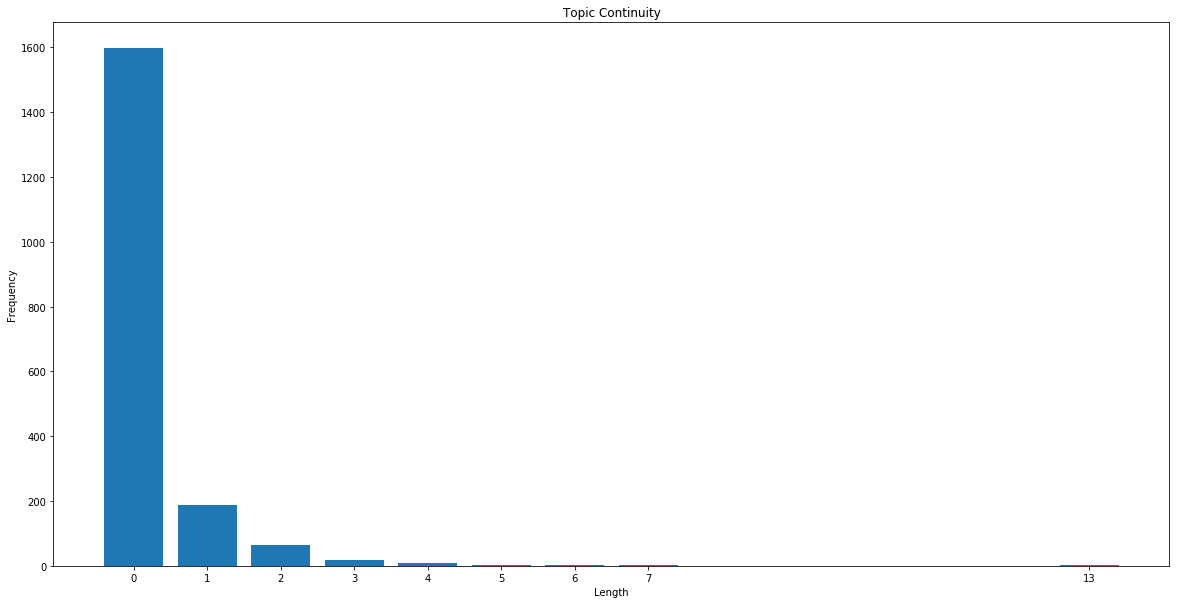

In [48]:
plot_bar(l1_100_200, 'Topic Continuity', 'Length')

In [49]:
l1_100_200

defaultdict(<function __main__.init_dict>,
            {0: 1598, 1: 188, 2: 65, 3: 19, 4: 8, 5: 3, 6: 4, 7: 1, 13: 1})

In [53]:
env = ConstDocs(doc)
oracle_100_50 = doc_cluster_oracle(env, model_name='doc2vec100.d2v', size=100, clusters= 50)
freq_dict_100_50, group_dict_100_50 = test_kmeans(env, oracle_100_50)

04:27:03 PM INFO doc2vec:Loading docs...
04:27:28 PM INFO doc2vec:Finished loading docs
04:27:28 PM INFO gensim.utils:loading Doc2Vec object from /home/tarun/NLP/models/doc2vec100.d2v
04:27:28 PM INFO gensim.utils:loading docvecs recursively from /home/tarun/NLP/models/doc2vec100.d2v.docvecs.* with mmap=None
04:27:28 PM INFO gensim.utils:loading wv recursively from /home/tarun/NLP/models/doc2vec100.d2v.wv.* with mmap=None
04:27:28 PM INFO gensim.utils:setting ignored attribute syn0norm to None
04:27:28 PM INFO gensim.utils:setting ignored attribute cum_table to None
04:27:28 PM INFO gensim.utils:loaded /home/tarun/NLP/models/doc2vec100.d2v
04:27:29 PM INFO oracles:Clustering Docs
04:28:07 PM INFO oracles:Clustering finished


No of docs 47050


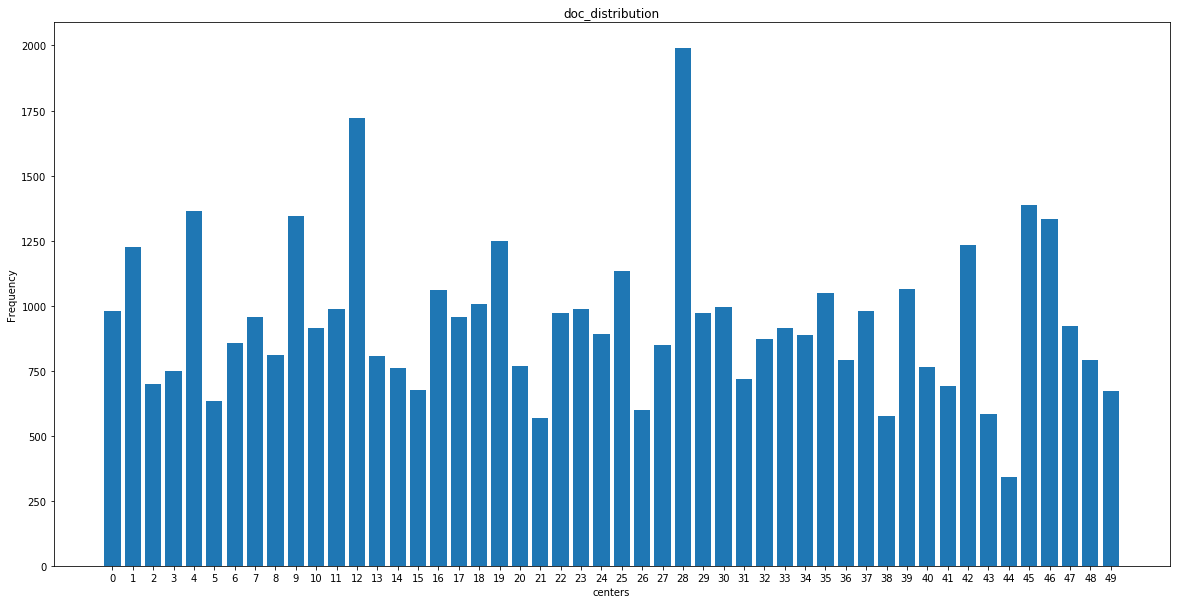

In [54]:
plot_bar(freq_dict_100_50, 'doc_distribution', 'centers')

In [70]:
env = ConstDocs(doc, no_docs=30)
oracle_100_50_30 = doc_cluster_oracle(env, model_name='doc2vec100.d2v', size=100, clusters= 50)
freq_dict_100_50_30, group_dict_100_50_30 = test_kmeans(env, oracle_100_50_30)

12:50:15 PM INFO doc2vec:Loading docs...
12:50:40 PM INFO doc2vec:Finished loading docs
12:50:40 PM INFO gensim.utils:loading Doc2Vec object from /home/tarun/NLP/models/doc2vec100.d2v
12:50:40 PM INFO gensim.utils:loading docvecs recursively from /home/tarun/NLP/models/doc2vec100.d2v.docvecs.* with mmap=None
12:50:40 PM INFO gensim.utils:loading wv recursively from /home/tarun/NLP/models/doc2vec100.d2v.wv.* with mmap=None
12:50:40 PM INFO gensim.utils:setting ignored attribute syn0norm to None
12:50:40 PM INFO gensim.utils:setting ignored attribute cum_table to None
12:50:40 PM INFO gensim.utils:loaded /home/tarun/NLP/models/doc2vec100.d2v
12:50:40 PM INFO oracles:Clustering Docs
12:51:25 PM INFO oracles:Clustering finished


No of docs 47050


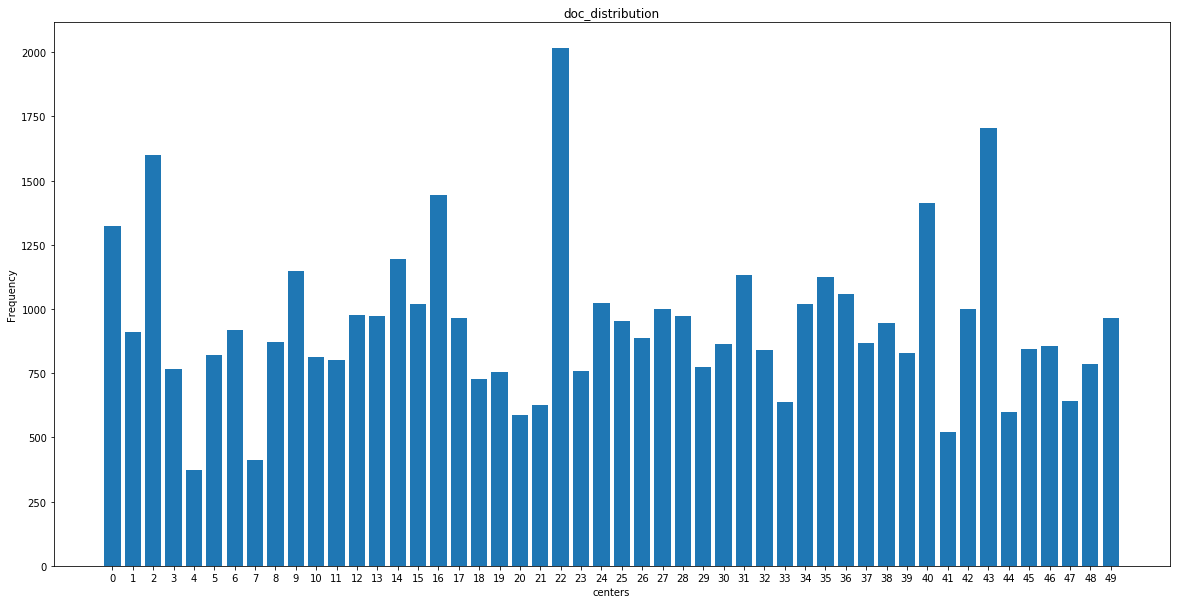

In [71]:
plot_bar(freq_dict_100_50_30, 'doc_distribution', 'centers')

In [83]:
mean_cosine_sim(group_dict_100_50_30, 22, oracle_100_50_30)

0.6976757155425366

In [88]:
mean_cosine_sim(group_dict_100_50_30, 16, oracle_100_50_30)

0.65672742984875898

In [74]:
mean_topic_inter_arrival(group_dict_100_50_30, 45)

55.607100591715977

In [90]:
mean_cs = [mean_cosine_sim(group_dict_100_50_30, i, oracle_100_50_30) for i in range(50)]

In [91]:
np.mean(mean_cs)

0.65844515166265238

In [98]:
mean_cs[0]

0.91299535319764602

In [80]:
env = ConstDocs(doc, no_docs=30)
d1_100_50_30, d2_100_50_30, l1_100_50_30=test_oracle(env, oracle_100_50_30)

12:58:49 PM INFO oracles:pick a random cluster
12:58:49 PM INFO __main__:Round_no 1: Imp_docs 2, Topic_ID 40
12:58:50 PM INFO oracles:pick a random cluster
12:58:50 PM INFO __main__:Round_no 2: Imp_docs 1, Topic_ID 23
12:58:50 PM INFO oracles:pick a random cluster
12:58:50 PM INFO __main__:Round_no 3: Imp_docs 2, Topic_ID 36
12:58:50 PM INFO oracles:pick a random cluster
12:58:50 PM INFO __main__:Round_no 4: Imp_docs 2, Topic_ID 31
12:58:50 PM INFO oracles:pick a random cluster
12:58:50 PM INFO __main__:Round_no 5: Imp_docs 1, Topic_ID 2
12:58:50 PM INFO __main__:Round_no 6: Imp_docs 1, Topic_ID 31
12:58:50 PM INFO __main__:Round_no 7: Imp_docs 2, Topic_ID 36
12:58:50 PM INFO __main__:Round_no 8: Imp_docs 4, Topic_ID 22
12:58:51 PM INFO __main__:Round_no 9: Imp_docs 2, Topic_ID 22
12:58:51 PM INFO __main__:Round_no 10: Imp_docs 1, Topic_ID 22
12:58:51 PM INFO __main__:Round_no 11: Imp_docs 6, Topic_ID 22
12:58:51 PM INFO __main__:Round_no 12: Imp_docs 4, Topic_ID 22
12:58:51 PM INFO __

12:59:17 PM INFO __main__:Round_no 128: Imp_docs 2, Topic_ID 14
12:59:18 PM INFO __main__:Round_no 129: Imp_docs 2, Topic_ID 22
12:59:18 PM INFO __main__:Round_no 130: Imp_docs 1, Topic_ID 22
12:59:18 PM INFO __main__:Round_no 131: Imp_docs 1, Topic_ID 22
12:59:18 PM INFO __main__:Round_no 132: Imp_docs 1, Topic_ID 32
12:59:19 PM INFO __main__:Round_no 133: Imp_docs 2, Topic_ID 22
12:59:19 PM INFO __main__:Round_no 134: Imp_docs 1, Topic_ID 17
12:59:19 PM INFO __main__:Round_no 135: Imp_docs 2, Topic_ID 15
12:59:19 PM INFO __main__:Round_no 136: Imp_docs 2, Topic_ID 15
12:59:20 PM INFO __main__:Round_no 137: Imp_docs 1, Topic_ID 28
12:59:20 PM INFO __main__:Round_no 138: Imp_docs 1, Topic_ID 48
12:59:20 PM INFO __main__:Round_no 139: Imp_docs 3, Topic_ID 15
12:59:20 PM INFO __main__:Round_no 140: Imp_docs 1, Topic_ID 15
12:59:21 PM INFO __main__:Round_no 141: Imp_docs 2, Topic_ID 22
12:59:21 PM INFO __main__:Round_no 142: Imp_docs 5, Topic_ID 22
12:59:21 PM INFO __main__:Round_no 143: 

12:59:48 PM INFO __main__:Round_no 257: Imp_docs 1, Topic_ID 43
12:59:48 PM INFO __main__:Round_no 258: Imp_docs 1, Topic_ID 24
12:59:48 PM INFO __main__:Round_no 259: Imp_docs 2, Topic_ID 24
12:59:49 PM INFO __main__:Round_no 260: Imp_docs 2, Topic_ID 2
12:59:49 PM INFO __main__:Round_no 261: Imp_docs 2, Topic_ID 24
12:59:49 PM INFO __main__:Round_no 262: Imp_docs 2, Topic_ID 2
12:59:49 PM INFO __main__:Round_no 263: Imp_docs 2, Topic_ID 15
12:59:50 PM INFO __main__:Round_no 264: Imp_docs 1, Topic_ID 15
12:59:50 PM INFO __main__:Round_no 265: Imp_docs 2, Topic_ID 5
12:59:50 PM INFO __main__:Round_no 266: Imp_docs 1, Topic_ID 15
12:59:50 PM INFO __main__:Round_no 267: Imp_docs 1, Topic_ID 6
12:59:50 PM INFO __main__:Round_no 268: Imp_docs 2, Topic_ID 22
12:59:51 PM INFO __main__:Round_no 269: Imp_docs 2, Topic_ID 22
12:59:51 PM INFO __main__:Round_no 270: Imp_docs 1, Topic_ID 22
12:59:51 PM INFO __main__:Round_no 271: Imp_docs 2, Topic_ID 22
12:59:51 PM INFO __main__:Round_no 272: Imp_

01:00:18 PM INFO __main__:Round_no 386: Imp_docs 1, Topic_ID 35
01:00:18 PM INFO __main__:Round_no 387: Imp_docs 3, Topic_ID 31
01:00:18 PM INFO __main__:Round_no 388: Imp_docs 20, Topic_ID 15
01:00:19 PM INFO __main__:Round_no 389: Imp_docs 3, Topic_ID 15
01:00:19 PM INFO __main__:Round_no 390: Imp_docs 1, Topic_ID 15
01:00:19 PM INFO __main__:Round_no 391: Imp_docs 1, Topic_ID 15
01:00:19 PM INFO __main__:Round_no 392: Imp_docs 2, Topic_ID 20
01:00:20 PM INFO __main__:Round_no 393: Imp_docs 2, Topic_ID 20
01:00:20 PM INFO __main__:Round_no 394: Imp_docs 3, Topic_ID 22
01:00:20 PM INFO __main__:Round_no 395: Imp_docs 3, Topic_ID 22
01:00:20 PM INFO __main__:Round_no 396: Imp_docs 3, Topic_ID 22
01:00:21 PM INFO __main__:Round_no 397: Imp_docs 3, Topic_ID 22
01:00:21 PM INFO __main__:Round_no 398: Imp_docs 1, Topic_ID 22
01:00:21 PM INFO __main__:Round_no 399: Imp_docs 4, Topic_ID 20
01:00:21 PM INFO __main__:Round_no 400: Imp_docs 1, Topic_ID 20
01:00:21 PM INFO __main__:Round_no 401:

01:00:44 PM INFO __main__:Round_no 515: Imp_docs 4, Topic_ID 31
01:00:44 PM INFO __main__:Round_no 516: Imp_docs 1, Topic_ID 2
01:00:45 PM INFO __main__:Round_no 517: Imp_docs 2, Topic_ID 30
01:00:45 PM INFO __main__:Round_no 518: Imp_docs 1, Topic_ID 30
01:00:45 PM INFO __main__:Round_no 519: Imp_docs 1, Topic_ID 31
01:00:46 PM INFO __main__:Round_no 520: Imp_docs 4, Topic_ID 31
01:00:46 PM INFO __main__:Round_no 521: Imp_docs 1, Topic_ID 47
01:00:46 PM INFO __main__:Round_no 522: Imp_docs 3, Topic_ID 31
01:00:46 PM INFO __main__:Round_no 523: Imp_docs 3, Topic_ID 31
01:00:46 PM INFO __main__:Round_no 524: Imp_docs 2, Topic_ID 31
01:00:47 PM INFO __main__:Round_no 525: Imp_docs 3, Topic_ID 46
01:00:47 PM INFO __main__:Round_no 526: Imp_docs 3, Topic_ID 0
01:00:47 PM INFO __main__:Round_no 527: Imp_docs 1, Topic_ID 45
01:00:47 PM INFO __main__:Round_no 528: Imp_docs 1, Topic_ID 34
01:00:48 PM INFO __main__:Round_no 529: Imp_docs 3, Topic_ID 7
01:00:48 PM INFO __main__:Round_no 530: Imp

01:01:12 PM INFO __main__:Round_no 644: Imp_docs 1, Topic_ID 34
01:01:12 PM INFO __main__:Round_no 645: Imp_docs 1, Topic_ID 31
01:01:12 PM INFO __main__:Round_no 646: Imp_docs 1, Topic_ID 40
01:01:12 PM INFO __main__:Round_no 647: Imp_docs 1, Topic_ID 40
01:01:12 PM INFO __main__:Round_no 648: Imp_docs 2, Topic_ID 11
01:01:13 PM INFO __main__:Round_no 649: Imp_docs 4, Topic_ID 27
01:01:13 PM INFO __main__:Round_no 650: Imp_docs 2, Topic_ID 27
01:01:13 PM INFO __main__:Round_no 651: Imp_docs 2, Topic_ID 11
01:01:13 PM INFO __main__:Round_no 652: Imp_docs 4, Topic_ID 11
01:01:13 PM INFO __main__:Round_no 653: Imp_docs 2, Topic_ID 27
01:01:14 PM INFO __main__:Round_no 654: Imp_docs 1, Topic_ID 11
01:01:14 PM INFO __main__:Round_no 655: Imp_docs 1, Topic_ID 17
01:01:14 PM INFO __main__:Round_no 656: Imp_docs 2, Topic_ID 47
01:01:14 PM INFO __main__:Round_no 657: Imp_docs 8, Topic_ID 9
01:01:14 PM INFO __main__:Round_no 658: Imp_docs 6, Topic_ID 9
01:01:15 PM INFO __main__:Round_no 659: Im

01:01:39 PM INFO __main__:Round_no 773: Imp_docs 2, Topic_ID 43
01:01:39 PM INFO __main__:Round_no 774: Imp_docs 1, Topic_ID 43
01:01:40 PM INFO __main__:Round_no 775: Imp_docs 4, Topic_ID 22
01:01:40 PM INFO __main__:Round_no 776: Imp_docs 1, Topic_ID 22
01:01:40 PM INFO __main__:Round_no 777: Imp_docs 2, Topic_ID 22
01:01:40 PM INFO __main__:Round_no 778: Imp_docs 2, Topic_ID 22
01:01:41 PM INFO __main__:Round_no 779: Imp_docs 1, Topic_ID 2
01:01:41 PM INFO __main__:Round_no 780: Imp_docs 1, Topic_ID 45
01:01:41 PM INFO __main__:Round_no 781: Imp_docs 1, Topic_ID 45
01:01:41 PM INFO __main__:Round_no 782: Imp_docs 1, Topic_ID 45
01:01:42 PM INFO __main__:Round_no 783: Imp_docs 1, Topic_ID 45
01:01:42 PM INFO __main__:Round_no 784: Imp_docs 1, Topic_ID 27
01:01:42 PM INFO __main__:Round_no 785: Imp_docs 1, Topic_ID 1
01:01:42 PM INFO __main__:Round_no 786: Imp_docs 1, Topic_ID 29
01:01:42 PM INFO __main__:Round_no 787: Imp_docs 1, Topic_ID 1
01:01:43 PM INFO __main__:Round_no 788: Imp

01:02:08 PM INFO __main__:Round_no 902: Imp_docs 1, Topic_ID 43
01:02:08 PM INFO __main__:Round_no 903: Imp_docs 1, Topic_ID 43
01:02:08 PM INFO __main__:Round_no 904: Imp_docs 4, Topic_ID 43
01:02:09 PM INFO __main__:Round_no 905: Imp_docs 3, Topic_ID 43
01:02:09 PM INFO __main__:Round_no 906: Imp_docs 3, Topic_ID 27
01:02:09 PM INFO __main__:Round_no 907: Imp_docs 1, Topic_ID 2
01:02:09 PM INFO __main__:Round_no 908: Imp_docs 1, Topic_ID 27
01:02:10 PM INFO __main__:Round_no 909: Imp_docs 4, Topic_ID 27
01:02:10 PM INFO __main__:Round_no 910: Imp_docs 3, Topic_ID 27
01:02:10 PM INFO __main__:Round_no 911: Imp_docs 1, Topic_ID 29
01:02:10 PM INFO __main__:Round_no 912: Imp_docs 2, Topic_ID 7
01:02:10 PM INFO __main__:Round_no 913: Imp_docs 1, Topic_ID 43
01:02:11 PM INFO __main__:Round_no 914: Imp_docs 6, Topic_ID 16
01:02:11 PM INFO __main__:Round_no 915: Imp_docs 1, Topic_ID 16
01:02:11 PM INFO __main__:Round_no 916: Imp_docs 3, Topic_ID 16
01:02:11 PM INFO __main__:Round_no 917: Im

01:02:37 PM INFO __main__:Round_no 1030: Imp_docs 2, Topic_ID 16
01:02:37 PM INFO __main__:Round_no 1031: Imp_docs 2, Topic_ID 17
01:02:37 PM INFO __main__:Round_no 1032: Imp_docs 1, Topic_ID 8
01:02:37 PM INFO __main__:Round_no 1033: Imp_docs 4, Topic_ID 44
01:02:37 PM INFO __main__:Round_no 1034: Imp_docs 1, Topic_ID 44
01:02:38 PM INFO __main__:Round_no 1035: Imp_docs 9, Topic_ID 26
01:02:38 PM INFO __main__:Round_no 1036: Imp_docs 1, Topic_ID 45
01:02:38 PM INFO __main__:Round_no 1037: Imp_docs 4, Topic_ID 9
01:02:38 PM INFO __main__:Round_no 1038: Imp_docs 2, Topic_ID 9
01:02:38 PM INFO __main__:Round_no 1039: Imp_docs 1, Topic_ID 45
01:02:39 PM INFO __main__:Round_no 1040: Imp_docs 1, Topic_ID 45
01:02:39 PM INFO __main__:Round_no 1041: Imp_docs 2, Topic_ID 29
01:02:39 PM INFO __main__:Round_no 1042: Imp_docs 4, Topic_ID 43
01:02:39 PM INFO __main__:Round_no 1043: Imp_docs 1, Topic_ID 29
01:02:39 PM INFO __main__:Round_no 1044: Imp_docs 4, Topic_ID 43
01:02:40 PM INFO __main__:Ro

01:03:04 PM INFO __main__:Round_no 1157: Imp_docs 1, Topic_ID 26
01:03:04 PM INFO __main__:Round_no 1158: Imp_docs 1, Topic_ID 45
01:03:04 PM INFO __main__:Round_no 1159: Imp_docs 4, Topic_ID 28
01:03:05 PM INFO __main__:Round_no 1160: Imp_docs 1, Topic_ID 28
01:03:05 PM INFO __main__:Round_no 1161: Imp_docs 1, Topic_ID 36
01:03:05 PM INFO __main__:Round_no 1162: Imp_docs 1, Topic_ID 24
01:03:05 PM INFO __main__:Round_no 1163: Imp_docs 3, Topic_ID 24
01:03:06 PM INFO __main__:Round_no 1164: Imp_docs 9, Topic_ID 34
01:03:06 PM INFO __main__:Round_no 1165: Imp_docs 1, Topic_ID 34
01:03:06 PM INFO __main__:Round_no 1166: Imp_docs 1, Topic_ID 34
01:03:06 PM INFO __main__:Round_no 1167: Imp_docs 1, Topic_ID 34
01:03:07 PM INFO __main__:Round_no 1168: Imp_docs 2, Topic_ID 22
01:03:07 PM INFO __main__:Round_no 1169: Imp_docs 3, Topic_ID 22
01:03:07 PM INFO __main__:Round_no 1170: Imp_docs 4, Topic_ID 22
01:03:07 PM INFO __main__:Round_no 1171: Imp_docs 1, Topic_ID 22
01:03:08 PM INFO __main__

01:03:34 PM INFO __main__:Round_no 1284: Imp_docs 9, Topic_ID 16
01:03:35 PM INFO __main__:Round_no 1285: Imp_docs 2, Topic_ID 16
01:03:35 PM INFO __main__:Round_no 1286: Imp_docs 1, Topic_ID 16
01:03:35 PM INFO __main__:Round_no 1287: Imp_docs 1, Topic_ID 16
01:03:35 PM INFO __main__:Round_no 1288: Imp_docs 1, Topic_ID 16
01:03:36 PM INFO __main__:Round_no 1289: Imp_docs 1, Topic_ID 12
01:03:36 PM INFO __main__:Round_no 1290: Imp_docs 4, Topic_ID 12
01:03:36 PM INFO __main__:Round_no 1291: Imp_docs 1, Topic_ID 46
01:03:36 PM INFO __main__:Round_no 1292: Imp_docs 4, Topic_ID 35
01:03:37 PM INFO __main__:Round_no 1293: Imp_docs 2, Topic_ID 12
01:03:37 PM INFO __main__:Round_no 1294: Imp_docs 4, Topic_ID 35
01:03:37 PM INFO __main__:Round_no 1295: Imp_docs 6, Topic_ID 35
01:03:37 PM INFO __main__:Round_no 1296: Imp_docs 2, Topic_ID 40
01:03:38 PM INFO __main__:Round_no 1297: Imp_docs 2, Topic_ID 16
01:03:38 PM INFO __main__:Round_no 1298: Imp_docs 1, Topic_ID 12
01:03:38 PM INFO __main__

01:04:04 PM INFO __main__:Round_no 1411: Imp_docs 2, Topic_ID 43
01:04:04 PM INFO __main__:Round_no 1412: Imp_docs 1, Topic_ID 8
01:04:04 PM INFO __main__:Round_no 1413: Imp_docs 2, Topic_ID 43
01:04:05 PM INFO __main__:Round_no 1414: Imp_docs 3, Topic_ID 8
01:04:05 PM INFO __main__:Round_no 1415: Imp_docs 1, Topic_ID 8
01:04:05 PM INFO __main__:Round_no 1416: Imp_docs 1, Topic_ID 8
01:04:05 PM INFO __main__:Round_no 1417: Imp_docs 1, Topic_ID 37
01:04:05 PM INFO __main__:Round_no 1418: Imp_docs 1, Topic_ID 37
01:04:06 PM INFO __main__:Round_no 1419: Imp_docs 2, Topic_ID 37
01:04:06 PM INFO __main__:Round_no 1420: Imp_docs 3, Topic_ID 37
01:04:06 PM INFO __main__:Round_no 1421: Imp_docs 2, Topic_ID 36
01:04:06 PM INFO __main__:Round_no 1422: Imp_docs 7, Topic_ID 30
01:04:06 PM INFO __main__:Round_no 1423: Imp_docs 2, Topic_ID 26
01:04:07 PM INFO __main__:Round_no 1424: Imp_docs 2, Topic_ID 26
01:04:07 PM INFO __main__:Round_no 1425: Imp_docs 1, Topic_ID 45
01:04:07 PM INFO __main__:Rou

01:04:33 PM INFO __main__:Round_no 1538: Imp_docs 1, Topic_ID 22
01:04:33 PM INFO __main__:Round_no 1539: Imp_docs 2, Topic_ID 46
01:04:34 PM INFO __main__:Round_no 1540: Imp_docs 1, Topic_ID 33
01:04:34 PM INFO __main__:Round_no 1541: Imp_docs 1, Topic_ID 36
01:04:34 PM INFO __main__:Round_no 1542: Imp_docs 1, Topic_ID 36
01:04:34 PM INFO __main__:Round_no 1543: Imp_docs 3, Topic_ID 40
01:04:35 PM INFO __main__:Round_no 1544: Imp_docs 3, Topic_ID 35
01:04:35 PM INFO __main__:Round_no 1545: Imp_docs 1, Topic_ID 40
01:04:35 PM INFO __main__:Round_no 1546: Imp_docs 1, Topic_ID 22
01:04:35 PM INFO __main__:Round_no 1547: Imp_docs 2, Topic_ID 40
01:04:36 PM INFO __main__:Round_no 1548: Imp_docs 1, Topic_ID 33
01:04:36 PM INFO __main__:Round_no 1549: Imp_docs 2, Topic_ID 22
01:04:36 PM INFO __main__:Round_no 1550: Imp_docs 1, Topic_ID 5
01:04:36 PM INFO __main__:Round_no 1551: Imp_docs 1, Topic_ID 40
01:04:37 PM INFO __main__:Round_no 1552: Imp_docs 3, Topic_ID 40
01:04:37 PM INFO __main__:

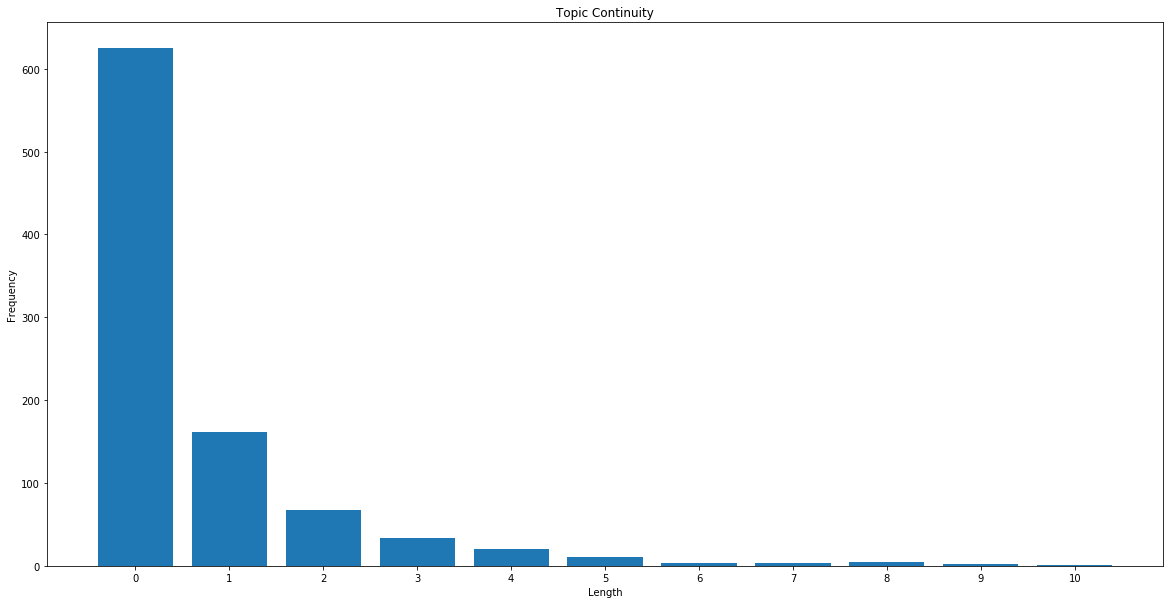

In [81]:
plot_bar(l1_100_50_30, 'Topic Continuity', 'Length')

In [82]:
l1_100_50_30

defaultdict(<function __main__.init_dict>,
            {0: 625,
             1: 162,
             2: 67,
             3: 33,
             4: 20,
             5: 11,
             6: 3,
             7: 3,
             8: 5,
             9: 2,
             10: 1})

In [16]:
env = ConstDocs(doc)
t1, l1 = test_trend(env, oracle_100_50_30)

NameError: name 'oracle_100_50_30' is not defined

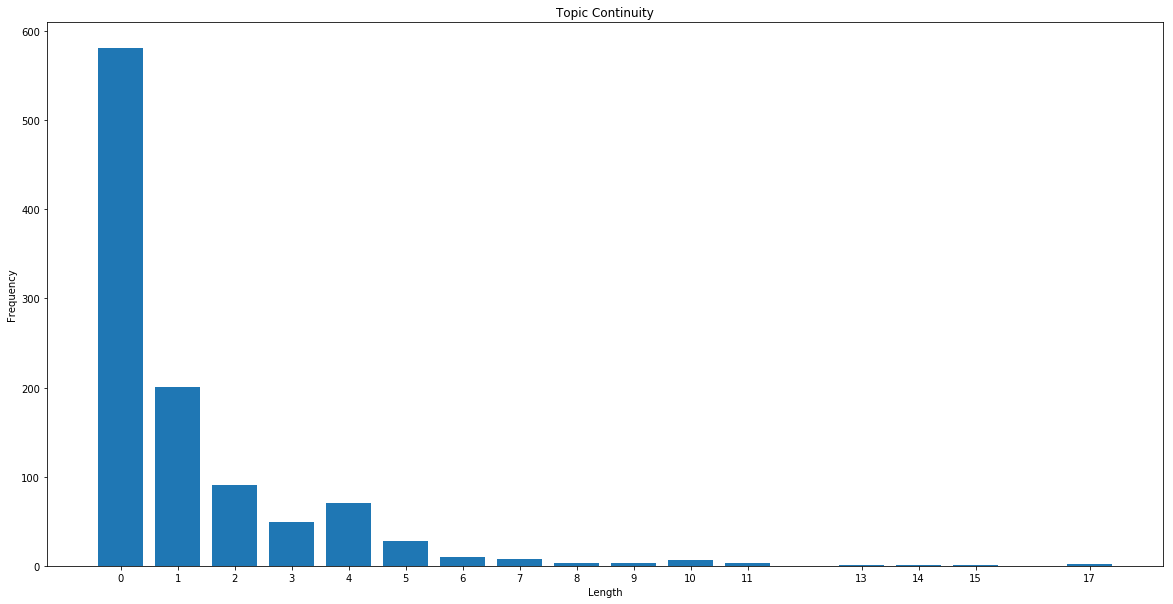

In [121]:
plot_bar(l1, 'Topic Continuity', 'Length')

In [122]:
l1

defaultdict(<function __main__.init_dict>,
            {0: 581,
             1: 201,
             2: 91,
             3: 49,
             4: 71,
             5: 28,
             6: 10,
             7: 8,
             8: 3,
             9: 3,
             10: 6,
             11: 3,
             13: 1,
             14: 1,
             15: 1,
             17: 2})

In [123]:
env = ConstDocs(doc)
oracle_100_50_30.window = 10
t1, l10 = test_trend(env, oracle_100_50_30)

12:38:28 PM INFO __main__:Round_no 10: Topic_ID 40
12:38:28 PM INFO __main__:Round_no 11: Topic_ID 0
12:38:28 PM INFO __main__:Round_no 12: Topic_ID 0
12:38:29 PM INFO __main__:Round_no 13: Topic_ID 22
12:38:29 PM INFO __main__:Round_no 14: Topic_ID 22
12:38:29 PM INFO __main__:Round_no 15: Topic_ID 22
12:38:29 PM INFO __main__:Round_no 16: Topic_ID 22
12:38:30 PM INFO __main__:Round_no 17: Topic_ID 22
12:38:30 PM INFO __main__:Round_no 18: Topic_ID 22
12:38:30 PM INFO __main__:Round_no 19: Topic_ID 22
12:38:30 PM INFO __main__:Round_no 20: Topic_ID 22
12:38:31 PM INFO __main__:Round_no 21: Topic_ID 22
12:38:31 PM INFO __main__:Round_no 22: Topic_ID 22
12:38:31 PM INFO __main__:Round_no 23: Topic_ID 22
12:38:31 PM INFO __main__:Round_no 24: Topic_ID 22
12:38:32 PM INFO __main__:Round_no 25: Topic_ID 22
12:38:32 PM INFO __main__:Round_no 26: Topic_ID 22
12:38:32 PM INFO __main__:Round_no 27: Topic_ID 22
12:38:32 PM INFO __main__:Round_no 28: Topic_ID 16
12:38:33 PM INFO __main__:Round_n

12:39:07 PM INFO __main__:Round_no 170: Topic_ID 13
12:39:07 PM INFO __main__:Round_no 171: Topic_ID 48
12:39:07 PM INFO __main__:Round_no 172: Topic_ID 48
12:39:07 PM INFO __main__:Round_no 173: Topic_ID 22
12:39:08 PM INFO __main__:Round_no 174: Topic_ID 16
12:39:08 PM INFO __main__:Round_no 175: Topic_ID 48
12:39:08 PM INFO __main__:Round_no 176: Topic_ID 22
12:39:08 PM INFO __main__:Round_no 177: Topic_ID 22
12:39:09 PM INFO __main__:Round_no 178: Topic_ID 22
12:39:09 PM INFO __main__:Round_no 179: Topic_ID 22
12:39:09 PM INFO __main__:Round_no 180: Topic_ID 22
12:39:09 PM INFO __main__:Round_no 181: Topic_ID 3
12:39:10 PM INFO __main__:Round_no 182: Topic_ID 3
12:39:10 PM INFO __main__:Round_no 183: Topic_ID 3
12:39:10 PM INFO __main__:Round_no 184: Topic_ID 3
12:39:10 PM INFO __main__:Round_no 185: Topic_ID 3
12:39:11 PM INFO __main__:Round_no 186: Topic_ID 3
12:39:11 PM INFO __main__:Round_no 187: Topic_ID 3
12:39:11 PM INFO __main__:Round_no 188: Topic_ID 3
12:39:11 PM INFO __m

12:39:46 PM INFO __main__:Round_no 329: Topic_ID 22
12:39:46 PM INFO __main__:Round_no 330: Topic_ID 22
12:39:46 PM INFO __main__:Round_no 331: Topic_ID 22
12:39:46 PM INFO __main__:Round_no 332: Topic_ID 22
12:39:47 PM INFO __main__:Round_no 333: Topic_ID 22
12:39:47 PM INFO __main__:Round_no 334: Topic_ID 22
12:39:47 PM INFO __main__:Round_no 335: Topic_ID 22
12:39:47 PM INFO __main__:Round_no 336: Topic_ID 22
12:39:48 PM INFO __main__:Round_no 337: Topic_ID 22
12:39:48 PM INFO __main__:Round_no 338: Topic_ID 22
12:39:48 PM INFO __main__:Round_no 339: Topic_ID 15
12:39:48 PM INFO __main__:Round_no 340: Topic_ID 22
12:39:49 PM INFO __main__:Round_no 341: Topic_ID 43
12:39:49 PM INFO __main__:Round_no 342: Topic_ID 15
12:39:49 PM INFO __main__:Round_no 343: Topic_ID 15
12:39:49 PM INFO __main__:Round_no 344: Topic_ID 43
12:39:50 PM INFO __main__:Round_no 345: Topic_ID 22
12:39:50 PM INFO __main__:Round_no 346: Topic_ID 19
12:39:50 PM INFO __main__:Round_no 347: Topic_ID 15
12:39:50 PM 

12:40:24 PM INFO __main__:Round_no 488: Topic_ID 11
12:40:24 PM INFO __main__:Round_no 489: Topic_ID 11
12:40:24 PM INFO __main__:Round_no 490: Topic_ID 22
12:40:25 PM INFO __main__:Round_no 491: Topic_ID 9
12:40:25 PM INFO __main__:Round_no 492: Topic_ID 9
12:40:25 PM INFO __main__:Round_no 493: Topic_ID 22
12:40:25 PM INFO __main__:Round_no 494: Topic_ID 22
12:40:26 PM INFO __main__:Round_no 495: Topic_ID 22
12:40:26 PM INFO __main__:Round_no 496: Topic_ID 22
12:40:26 PM INFO __main__:Round_no 497: Topic_ID 22
12:40:26 PM INFO __main__:Round_no 498: Topic_ID 22
12:40:26 PM INFO __main__:Round_no 499: Topic_ID 40
12:40:27 PM INFO __main__:Round_no 500: Topic_ID 22
12:40:27 PM INFO __main__:Round_no 501: Topic_ID 22
12:40:27 PM INFO __main__:Round_no 502: Topic_ID 22
12:40:27 PM INFO __main__:Round_no 503: Topic_ID 12
12:40:28 PM INFO __main__:Round_no 504: Topic_ID 12
12:40:28 PM INFO __main__:Round_no 505: Topic_ID 12
12:40:28 PM INFO __main__:Round_no 506: Topic_ID 22
12:40:28 PM IN

12:41:00 PM INFO __main__:Round_no 646: Topic_ID 22
12:41:00 PM INFO __main__:Round_no 647: Topic_ID 22
12:41:01 PM INFO __main__:Round_no 648: Topic_ID 22
12:41:01 PM INFO __main__:Round_no 649: Topic_ID 17
12:41:01 PM INFO __main__:Round_no 650: Topic_ID 17
12:41:01 PM INFO __main__:Round_no 651: Topic_ID 17
12:41:02 PM INFO __main__:Round_no 652: Topic_ID 17
12:41:02 PM INFO __main__:Round_no 653: Topic_ID 17
12:41:02 PM INFO __main__:Round_no 654: Topic_ID 17
12:41:02 PM INFO __main__:Round_no 655: Topic_ID 22
12:41:02 PM INFO __main__:Round_no 656: Topic_ID 26
12:41:03 PM INFO __main__:Round_no 657: Topic_ID 26
12:41:03 PM INFO __main__:Round_no 658: Topic_ID 31
12:41:03 PM INFO __main__:Round_no 659: Topic_ID 26
12:41:03 PM INFO __main__:Round_no 660: Topic_ID 26
12:41:03 PM INFO __main__:Round_no 661: Topic_ID 31
12:41:04 PM INFO __main__:Round_no 662: Topic_ID 45
12:41:04 PM INFO __main__:Round_no 663: Topic_ID 45
12:41:04 PM INFO __main__:Round_no 664: Topic_ID 45
12:41:04 PM 

12:41:35 PM INFO __main__:Round_no 806: Topic_ID 15
12:41:35 PM INFO __main__:Round_no 807: Topic_ID 15
12:41:36 PM INFO __main__:Round_no 808: Topic_ID 15
12:41:36 PM INFO __main__:Round_no 809: Topic_ID 15
12:41:36 PM INFO __main__:Round_no 810: Topic_ID 15
12:41:36 PM INFO __main__:Round_no 811: Topic_ID 15
12:41:37 PM INFO __main__:Round_no 812: Topic_ID 15
12:41:37 PM INFO __main__:Round_no 813: Topic_ID 15
12:41:37 PM INFO __main__:Round_no 814: Topic_ID 43
12:41:37 PM INFO __main__:Round_no 815: Topic_ID 9
12:41:38 PM INFO __main__:Round_no 816: Topic_ID 9
12:41:38 PM INFO __main__:Round_no 817: Topic_ID 9
12:41:38 PM INFO __main__:Round_no 818: Topic_ID 9
12:41:38 PM INFO __main__:Round_no 819: Topic_ID 9
12:41:39 PM INFO __main__:Round_no 820: Topic_ID 9
12:41:39 PM INFO __main__:Round_no 821: Topic_ID 9
12:41:39 PM INFO __main__:Round_no 822: Topic_ID 9
12:41:39 PM INFO __main__:Round_no 823: Topic_ID 9
12:41:39 PM INFO __main__:Round_no 824: Topic_ID 9
12:41:40 PM INFO __mai

12:42:11 PM INFO __main__:Round_no 966: Topic_ID 0
12:42:11 PM INFO __main__:Round_no 967: Topic_ID 14
12:42:11 PM INFO __main__:Round_no 968: Topic_ID 14
12:42:11 PM INFO __main__:Round_no 969: Topic_ID 9
12:42:12 PM INFO __main__:Round_no 970: Topic_ID 0
12:42:12 PM INFO __main__:Round_no 971: Topic_ID 0
12:42:12 PM INFO __main__:Round_no 972: Topic_ID 9
12:42:12 PM INFO __main__:Round_no 973: Topic_ID 40
12:42:13 PM INFO __main__:Round_no 974: Topic_ID 9
12:42:13 PM INFO __main__:Round_no 975: Topic_ID 9
12:42:13 PM INFO __main__:Round_no 976: Topic_ID 27
12:42:13 PM INFO __main__:Round_no 977: Topic_ID 27
12:42:13 PM INFO __main__:Round_no 978: Topic_ID 27
12:42:14 PM INFO __main__:Round_no 979: Topic_ID 34
12:42:14 PM INFO __main__:Round_no 980: Topic_ID 27
12:42:14 PM INFO __main__:Round_no 981: Topic_ID 11
12:42:14 PM INFO __main__:Round_no 982: Topic_ID 11
12:42:14 PM INFO __main__:Round_no 983: Topic_ID 11
12:42:15 PM INFO __main__:Round_no 984: Topic_ID 11
12:42:15 PM INFO __

12:42:47 PM INFO __main__:Round_no 1123: Topic_ID 0
12:42:47 PM INFO __main__:Round_no 1124: Topic_ID 0
12:42:48 PM INFO __main__:Round_no 1125: Topic_ID 0
12:42:48 PM INFO __main__:Round_no 1126: Topic_ID 0
12:42:48 PM INFO __main__:Round_no 1127: Topic_ID 0
12:42:48 PM INFO __main__:Round_no 1128: Topic_ID 0
12:42:48 PM INFO __main__:Round_no 1129: Topic_ID 0
12:42:49 PM INFO __main__:Round_no 1130: Topic_ID 0
12:42:49 PM INFO __main__:Round_no 1131: Topic_ID 0
12:42:49 PM INFO __main__:Round_no 1132: Topic_ID 0
12:42:49 PM INFO __main__:Round_no 1133: Topic_ID 0
12:42:50 PM INFO __main__:Round_no 1134: Topic_ID 43
12:42:50 PM INFO __main__:Round_no 1135: Topic_ID 43
12:42:50 PM INFO __main__:Round_no 1136: Topic_ID 34
12:42:50 PM INFO __main__:Round_no 1137: Topic_ID 43
12:42:50 PM INFO __main__:Round_no 1138: Topic_ID 43
12:42:51 PM INFO __main__:Round_no 1139: Topic_ID 43
12:42:51 PM INFO __main__:Round_no 1140: Topic_ID 43
12:42:51 PM INFO __main__:Round_no 1141: Topic_ID 43
12:4

12:43:24 PM INFO __main__:Round_no 1280: Topic_ID 9
12:43:24 PM INFO __main__:Round_no 1281: Topic_ID 9
12:43:24 PM INFO __main__:Round_no 1282: Topic_ID 9
12:43:24 PM INFO __main__:Round_no 1283: Topic_ID 21
12:43:25 PM INFO __main__:Round_no 1284: Topic_ID 21
12:43:25 PM INFO __main__:Round_no 1285: Topic_ID 31
12:43:25 PM INFO __main__:Round_no 1286: Topic_ID 14
12:43:25 PM INFO __main__:Round_no 1287: Topic_ID 14
12:43:25 PM INFO __main__:Round_no 1288: Topic_ID 31
12:43:26 PM INFO __main__:Round_no 1289: Topic_ID 31
12:43:26 PM INFO __main__:Round_no 1290: Topic_ID 31
12:43:26 PM INFO __main__:Round_no 1291: Topic_ID 31
12:43:26 PM INFO __main__:Round_no 1292: Topic_ID 31
12:43:26 PM INFO __main__:Round_no 1293: Topic_ID 45
12:43:27 PM INFO __main__:Round_no 1294: Topic_ID 45
12:43:27 PM INFO __main__:Round_no 1295: Topic_ID 2
12:43:27 PM INFO __main__:Round_no 1296: Topic_ID 2
12:43:27 PM INFO __main__:Round_no 1297: Topic_ID 2
12:43:28 PM INFO __main__:Round_no 1298: Topic_ID 2


12:44:01 PM INFO __main__:Round_no 1435: Topic_ID 16
12:44:01 PM INFO __main__:Round_no 1436: Topic_ID 40
12:44:01 PM INFO __main__:Round_no 1437: Topic_ID 49
12:44:01 PM INFO __main__:Round_no 1438: Topic_ID 40
12:44:02 PM INFO __main__:Round_no 1439: Topic_ID 40
12:44:02 PM INFO __main__:Round_no 1440: Topic_ID 49
12:44:02 PM INFO __main__:Round_no 1441: Topic_ID 43
12:44:02 PM INFO __main__:Round_no 1442: Topic_ID 16
12:44:03 PM INFO __main__:Round_no 1443: Topic_ID 16
12:44:03 PM INFO __main__:Round_no 1444: Topic_ID 16
12:44:03 PM INFO __main__:Round_no 1445: Topic_ID 16
12:44:03 PM INFO __main__:Round_no 1446: Topic_ID 16
12:44:04 PM INFO __main__:Round_no 1447: Topic_ID 16
12:44:04 PM INFO __main__:Round_no 1448: Topic_ID 16
12:44:04 PM INFO __main__:Round_no 1449: Topic_ID 43
12:44:04 PM INFO __main__:Round_no 1450: Topic_ID 16
12:44:05 PM INFO __main__:Round_no 1451: Topic_ID 16
12:44:05 PM INFO __main__:Round_no 1452: Topic_ID 43
12:44:05 PM INFO __main__:Round_no 1453: Topic

12:44:39 PM INFO __main__:Round_no 1591: Topic_ID 43
12:44:39 PM INFO __main__:Round_no 1592: Topic_ID 43
12:44:39 PM INFO __main__:Round_no 1593: Topic_ID 43
12:44:40 PM INFO __main__:Round_no 1594: Topic_ID 43
12:44:40 PM INFO __main__:Round_no 1595: Topic_ID 43
12:44:40 PM INFO __main__:Round_no 1596: Topic_ID 43
12:44:40 PM INFO __main__:Round_no 1597: Topic_ID 43
12:44:41 PM INFO __main__:Round_no 1598: Topic_ID 27
12:44:41 PM INFO __main__:Round_no 1599: Topic_ID 27
12:44:41 PM INFO __main__:Round_no 1600: Topic_ID 27
12:44:41 PM INFO __main__:Round_no 1601: Topic_ID 27
12:44:42 PM INFO __main__:Round_no 1602: Topic_ID 27
12:44:42 PM INFO __main__:Round_no 1603: Topic_ID 27
12:44:42 PM INFO __main__:Round_no 1604: Topic_ID 27
12:44:42 PM INFO __main__:Round_no 1605: Topic_ID 27
12:44:42 PM INFO __main__:Round_no 1606: Topic_ID 27
12:44:43 PM INFO __main__:Round_no 1607: Topic_ID 27
12:44:43 PM INFO __main__:Round_no 1608: Topic_ID 35
12:44:43 PM INFO __main__:Round_no 1609: Topic

12:45:17 PM INFO __main__:Round_no 1746: Topic_ID 34
12:45:17 PM INFO __main__:Round_no 1747: Topic_ID 34
12:45:17 PM INFO __main__:Round_no 1748: Topic_ID 34
12:45:17 PM INFO __main__:Round_no 1749: Topic_ID 34
12:45:18 PM INFO __main__:Round_no 1750: Topic_ID 34
12:45:18 PM INFO __main__:Round_no 1751: Topic_ID 34
12:45:18 PM INFO __main__:Round_no 1752: Topic_ID 34
12:45:18 PM INFO __main__:Round_no 1753: Topic_ID 34
12:45:19 PM INFO __main__:Round_no 1754: Topic_ID 34
12:45:19 PM INFO __main__:Round_no 1755: Topic_ID 22
12:45:19 PM INFO __main__:Round_no 1756: Topic_ID 22
12:45:19 PM INFO __main__:Round_no 1757: Topic_ID 22
12:45:20 PM INFO __main__:Round_no 1758: Topic_ID 22
12:45:20 PM INFO __main__:Round_no 1759: Topic_ID 22
12:45:20 PM INFO __main__:Round_no 1760: Topic_ID 22
12:45:20 PM INFO __main__:Round_no 1761: Topic_ID 22
12:45:21 PM INFO __main__:Round_no 1762: Topic_ID 2
12:45:21 PM INFO __main__:Round_no 1763: Topic_ID 43
12:45:21 PM INFO __main__:Round_no 1764: Topic_

12:45:56 PM INFO __main__:Round_no 1902: Topic_ID 8
12:45:56 PM INFO __main__:Round_no 1903: Topic_ID 8
12:45:57 PM INFO __main__:Round_no 1904: Topic_ID 27
12:45:57 PM INFO __main__:Round_no 1905: Topic_ID 27
12:45:57 PM INFO __main__:Round_no 1906: Topic_ID 27
12:45:57 PM INFO __main__:Round_no 1907: Topic_ID 27
12:45:58 PM INFO __main__:Round_no 1908: Topic_ID 27
12:45:58 PM INFO __main__:Round_no 1909: Topic_ID 27
12:45:58 PM INFO __main__:Round_no 1910: Topic_ID 27
12:45:58 PM INFO __main__:Round_no 1911: Topic_ID 27
12:45:59 PM INFO __main__:Round_no 1912: Topic_ID 27
12:45:59 PM INFO __main__:Round_no 1913: Topic_ID 27
12:45:59 PM INFO __main__:Round_no 1914: Topic_ID 43
12:45:59 PM INFO __main__:Round_no 1915: Topic_ID 43
12:46:00 PM INFO __main__:Round_no 1916: Topic_ID 43
12:46:00 PM INFO __main__:Round_no 1917: Topic_ID 43
12:46:00 PM INFO __main__:Round_no 1918: Topic_ID 43
12:46:00 PM INFO __main__:Round_no 1919: Topic_ID 43
12:46:01 PM INFO __main__:Round_no 1920: Topic_I

12:46:37 PM INFO __main__:Round_no 2058: Topic_ID 31
12:46:37 PM INFO __main__:Round_no 2059: Topic_ID 31
12:46:37 PM INFO __main__:Round_no 2060: Topic_ID 31
12:46:37 PM INFO __main__:Round_no 2061: Topic_ID 31
12:46:38 PM INFO __main__:Round_no 2062: Topic_ID 35
12:46:38 PM INFO __main__:Round_no 2063: Topic_ID 22
12:46:38 PM INFO __main__:Round_no 2064: Topic_ID 22
12:46:38 PM INFO __main__:Round_no 2065: Topic_ID 22
12:46:39 PM INFO __main__:Round_no 2066: Topic_ID 22
12:46:39 PM INFO __main__:Round_no 2067: Topic_ID 22
12:46:39 PM INFO __main__:Round_no 2068: Topic_ID 22
12:46:39 PM INFO __main__:Round_no 2069: Topic_ID 22
12:46:40 PM INFO __main__:Round_no 2070: Topic_ID 40
12:46:40 PM INFO __main__:Round_no 2071: Topic_ID 22
12:46:40 PM INFO __main__:Round_no 2072: Topic_ID 10
12:46:40 PM INFO __main__:Round_no 2073: Topic_ID 10
12:46:41 PM INFO __main__:Round_no 2074: Topic_ID 10
12:46:41 PM INFO __main__:Round_no 2075: Topic_ID 10
12:46:41 PM INFO __main__:Round_no 2076: Topic

12:47:15 PM INFO __main__:Round_no 2213: Topic_ID 43
12:47:15 PM INFO __main__:Round_no 2214: Topic_ID 43
12:47:16 PM INFO __main__:Round_no 2215: Topic_ID 43
12:47:16 PM INFO __main__:Round_no 2216: Topic_ID 36
12:47:16 PM INFO __main__:Round_no 2217: Topic_ID 43
12:47:16 PM INFO __main__:Round_no 2218: Topic_ID 36
12:47:17 PM INFO __main__:Round_no 2219: Topic_ID 43
12:47:17 PM INFO __main__:Round_no 2220: Topic_ID 2
12:47:17 PM INFO __main__:Round_no 2221: Topic_ID 36
12:47:17 PM INFO __main__:Round_no 2222: Topic_ID 36
12:47:18 PM INFO __main__:Round_no 2223: Topic_ID 2
12:47:18 PM INFO __main__:Round_no 2224: Topic_ID 22
12:47:18 PM INFO __main__:Round_no 2225: Topic_ID 22
12:47:18 PM INFO __main__:Round_no 2226: Topic_ID 22
12:47:19 PM INFO __main__:Round_no 2227: Topic_ID 22
12:47:19 PM INFO __main__:Round_no 2228: Topic_ID 22
12:47:19 PM INFO __main__:Round_no 2229: Topic_ID 10
12:47:19 PM INFO __main__:Round_no 2230: Topic_ID 22
12:47:20 PM INFO __main__:Round_no 2231: Topic_I

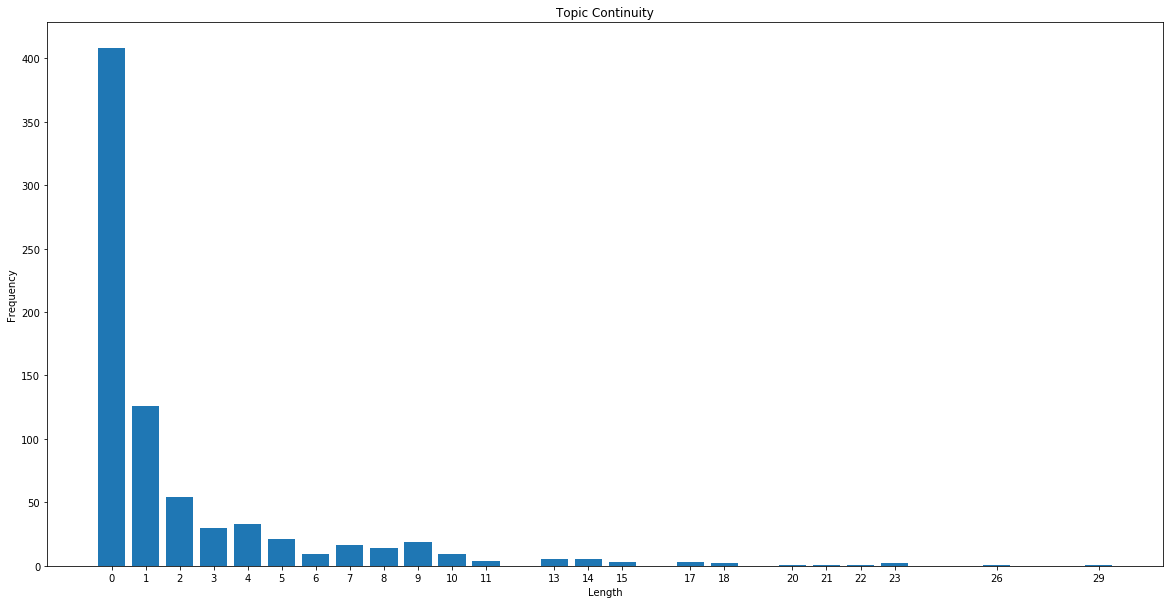

In [124]:
plot_bar(l10, 'Topic Continuity', 'Length')

In [125]:
l10

defaultdict(<function __main__.init_dict>,
            {0: 408,
             1: 126,
             2: 54,
             3: 30,
             4: 33,
             5: 21,
             6: 9,
             7: 16,
             8: 14,
             9: 19,
             10: 9,
             11: 4,
             13: 5,
             14: 5,
             15: 3,
             17: 3,
             18: 2,
             20: 1,
             21: 1,
             22: 1,
             23: 2,
             26: 1,
             29: 1})

In [233]:
env = DocsByDate(doc)
oracle_100_50_30.window = 10
oracle_100_50_30.env = env

In [234]:
t1, l10 = test_trend(env, oracle_100_50_30)

11:50:13 AM INFO __main__:Round_no 10: Topic_ID 15
11:50:13 AM INFO __main__:Round_no 11: Topic_ID 15
11:50:13 AM INFO __main__:Round_no 12: Topic_ID 15
11:50:13 AM INFO __main__:Round_no 13: Topic_ID 15
11:50:13 AM INFO __main__:Round_no 14: Topic_ID 4
11:50:13 AM INFO __main__:Round_no 15: Topic_ID 32
11:50:13 AM INFO __main__:Round_no 16: Topic_ID 4
11:50:13 AM INFO __main__:Round_no 17: Topic_ID 1
11:50:13 AM INFO __main__:Round_no 18: Topic_ID 32
11:50:13 AM INFO __main__:Round_no 19: Topic_ID 32
11:50:13 AM INFO __main__:Round_no 20: Topic_ID 32
11:50:13 AM INFO __main__:Round_no 21: Topic_ID 32
11:50:13 AM INFO __main__:Round_no 22: Topic_ID 32
11:50:13 AM INFO __main__:Round_no 23: Topic_ID 32
11:50:13 AM INFO __main__:Round_no 24: Topic_ID 32
11:50:13 AM INFO __main__:Round_no 25: Topic_ID 0
11:50:13 AM INFO __main__:Round_no 26: Topic_ID 0
11:50:13 AM INFO __main__:Round_no 27: Topic_ID 0
11:50:13 AM INFO __main__:Round_no 28: Topic_ID 0
11:50:13 AM INFO __main__:Round_no 29:

11:50:20 AM INFO __main__:Round_no 171: Topic_ID 29
11:50:20 AM INFO __main__:Round_no 172: Topic_ID 29
11:50:20 AM INFO __main__:Round_no 173: Topic_ID 29
11:50:20 AM INFO __main__:Round_no 174: Topic_ID 29
11:50:20 AM INFO __main__:Round_no 175: Topic_ID 29
11:50:20 AM INFO __main__:Round_no 176: Topic_ID 29
11:50:20 AM INFO __main__:Round_no 177: Topic_ID 29
11:50:20 AM INFO __main__:Round_no 178: Topic_ID 29
11:50:20 AM INFO __main__:Round_no 179: Topic_ID 29
11:50:20 AM INFO __main__:Round_no 180: Topic_ID 37
11:50:20 AM INFO __main__:Round_no 181: Topic_ID 4
11:50:20 AM INFO __main__:Round_no 182: Topic_ID 0
11:50:21 AM INFO __main__:Round_no 183: Topic_ID 29
11:50:21 AM INFO __main__:Round_no 184: Topic_ID 0
11:50:21 AM INFO __main__:Round_no 185: Topic_ID 4
11:50:21 AM INFO __main__:Round_no 186: Topic_ID 12
11:50:21 AM INFO __main__:Round_no 187: Topic_ID 4
11:50:21 AM INFO __main__:Round_no 188: Topic_ID 4
11:50:22 AM INFO __main__:Round_no 189: Topic_ID 13
11:50:22 AM INFO _

11:50:32 AM INFO __main__:Round_no 330: Topic_ID 0
11:50:32 AM INFO __main__:Round_no 331: Topic_ID 0
11:50:33 AM INFO __main__:Round_no 332: Topic_ID 0
11:50:33 AM INFO __main__:Round_no 333: Topic_ID 0
11:50:33 AM INFO __main__:Round_no 334: Topic_ID 0
11:50:33 AM INFO __main__:Round_no 335: Topic_ID 34
11:50:33 AM INFO __main__:Round_no 336: Topic_ID 34
11:50:33 AM INFO __main__:Round_no 337: Topic_ID 34
11:50:33 AM INFO __main__:Round_no 338: Topic_ID 34
11:50:33 AM INFO __main__:Round_no 339: Topic_ID 34
11:50:33 AM INFO __main__:Round_no 340: Topic_ID 34
11:50:33 AM INFO __main__:Round_no 341: Topic_ID 34
11:50:33 AM INFO __main__:Round_no 342: Topic_ID 29
11:50:33 AM INFO __main__:Round_no 343: Topic_ID 29
11:50:34 AM INFO __main__:Round_no 344: Topic_ID 29
11:50:34 AM INFO __main__:Round_no 345: Topic_ID 29
11:50:34 AM INFO __main__:Round_no 346: Topic_ID 29
11:50:34 AM INFO __main__:Round_no 347: Topic_ID 29
11:50:34 AM INFO __main__:Round_no 348: Topic_ID 29
11:50:34 AM INFO 

11:51:14 AM INFO __main__:Round_no 490: Topic_ID 47
11:51:14 AM INFO __main__:Round_no 491: Topic_ID 47
11:51:14 AM INFO __main__:Round_no 492: Topic_ID 40
11:51:14 AM INFO __main__:Round_no 493: Topic_ID 40
11:51:14 AM INFO __main__:Round_no 494: Topic_ID 40
11:51:14 AM INFO __main__:Round_no 495: Topic_ID 40
11:51:15 AM INFO __main__:Round_no 496: Topic_ID 40
11:51:15 AM INFO __main__:Round_no 497: Topic_ID 40
11:51:15 AM INFO __main__:Round_no 498: Topic_ID 40
11:51:15 AM INFO __main__:Round_no 499: Topic_ID 40
11:51:15 AM INFO __main__:Round_no 500: Topic_ID 40
11:51:15 AM INFO __main__:Round_no 501: Topic_ID 40
11:51:16 AM INFO __main__:Round_no 502: Topic_ID 40
11:51:16 AM INFO __main__:Round_no 503: Topic_ID 40
11:51:16 AM INFO __main__:Round_no 504: Topic_ID 40
11:51:16 AM INFO __main__:Round_no 505: Topic_ID 40
11:51:16 AM INFO __main__:Round_no 506: Topic_ID 40
11:51:16 AM INFO __main__:Round_no 507: Topic_ID 21
11:51:17 AM INFO __main__:Round_no 508: Topic_ID 17
11:51:17 AM 

11:51:41 AM INFO __main__:Round_no 648: Topic_ID 31
11:51:41 AM INFO __main__:Round_no 649: Topic_ID 31
11:51:42 AM INFO __main__:Round_no 650: Topic_ID 31
11:51:42 AM INFO __main__:Round_no 651: Topic_ID 31
11:51:42 AM INFO __main__:Round_no 652: Topic_ID 15
11:51:42 AM INFO __main__:Round_no 653: Topic_ID 36
11:51:42 AM INFO __main__:Round_no 654: Topic_ID 14
11:51:42 AM INFO __main__:Round_no 655: Topic_ID 4
11:51:42 AM INFO __main__:Round_no 656: Topic_ID 4
11:51:42 AM INFO __main__:Round_no 657: Topic_ID 15
11:51:42 AM INFO __main__:Round_no 658: Topic_ID 4
11:51:42 AM INFO __main__:Round_no 659: Topic_ID 4
11:51:42 AM INFO __main__:Round_no 660: Topic_ID 4
11:51:42 AM INFO __main__:Round_no 661: Topic_ID 14
11:51:43 AM INFO __main__:Round_no 662: Topic_ID 4
11:51:43 AM INFO __main__:Round_no 663: Topic_ID 4
11:51:43 AM INFO __main__:Round_no 664: Topic_ID 18
11:51:43 AM INFO __main__:Round_no 665: Topic_ID 37
11:51:43 AM INFO __main__:Round_no 666: Topic_ID 3
11:51:43 AM INFO __m

11:52:25 AM INFO __main__:Round_no 807: Topic_ID 43
11:52:25 AM INFO __main__:Round_no 808: Topic_ID 43
11:52:25 AM INFO __main__:Round_no 809: Topic_ID 43
11:52:25 AM INFO __main__:Round_no 810: Topic_ID 43
11:52:25 AM INFO __main__:Round_no 811: Topic_ID 43
11:52:26 AM INFO __main__:Round_no 812: Topic_ID 43
11:52:26 AM INFO __main__:Round_no 813: Topic_ID 43
11:52:26 AM INFO __main__:Round_no 814: Topic_ID 43
11:52:26 AM INFO __main__:Round_no 815: Topic_ID 8
11:52:26 AM INFO __main__:Round_no 816: Topic_ID 8
11:52:26 AM INFO __main__:Round_no 817: Topic_ID 8
11:52:26 AM INFO __main__:Round_no 818: Topic_ID 8
11:52:26 AM INFO __main__:Round_no 819: Topic_ID 8
11:52:27 AM INFO __main__:Round_no 820: Topic_ID 26
11:52:27 AM INFO __main__:Round_no 821: Topic_ID 26
11:52:27 AM INFO __main__:Round_no 822: Topic_ID 26
11:52:27 AM INFO __main__:Round_no 823: Topic_ID 26
11:52:27 AM INFO __main__:Round_no 824: Topic_ID 26
11:52:27 AM INFO __main__:Round_no 825: Topic_ID 26
11:52:28 AM INFO 

11:52:58 AM INFO __main__:Round_no 966: Topic_ID 43
11:52:58 AM INFO __main__:Round_no 967: Topic_ID 2
11:52:59 AM INFO __main__:Round_no 968: Topic_ID 2
11:52:59 AM INFO __main__:Round_no 969: Topic_ID 43
11:52:59 AM INFO __main__:Round_no 970: Topic_ID 43
11:52:59 AM INFO __main__:Round_no 971: Topic_ID 2
11:53:00 AM INFO __main__:Round_no 972: Topic_ID 43
11:53:00 AM INFO __main__:Round_no 973: Topic_ID 43
11:53:00 AM INFO __main__:Round_no 974: Topic_ID 43
11:53:00 AM INFO __main__:Round_no 975: Topic_ID 2
11:53:01 AM INFO __main__:Round_no 976: Topic_ID 2
11:53:01 AM INFO __main__:Round_no 977: Topic_ID 2
11:53:01 AM INFO __main__:Round_no 978: Topic_ID 2
11:53:02 AM INFO __main__:Round_no 979: Topic_ID 43
11:53:02 AM INFO __main__:Round_no 980: Topic_ID 43
11:53:02 AM INFO __main__:Round_no 981: Topic_ID 43
11:53:02 AM INFO __main__:Round_no 982: Topic_ID 43
11:53:03 AM INFO __main__:Round_no 983: Topic_ID 43
11:53:03 AM INFO __main__:Round_no 984: Topic_ID 43
11:53:03 AM INFO __

11:53:37 AM INFO __main__:Round_no 1122: Topic_ID 33
11:53:37 AM INFO __main__:Round_no 1123: Topic_ID 47
11:53:37 AM INFO __main__:Round_no 1124: Topic_ID 47
11:53:37 AM INFO __main__:Round_no 1125: Topic_ID 45
11:53:37 AM INFO __main__:Round_no 1126: Topic_ID 45
11:53:38 AM INFO __main__:Round_no 1127: Topic_ID 45
11:53:38 AM INFO __main__:Round_no 1128: Topic_ID 45
11:53:38 AM INFO __main__:Round_no 1129: Topic_ID 45
11:53:38 AM INFO __main__:Round_no 1130: Topic_ID 45
11:53:38 AM INFO __main__:Round_no 1131: Topic_ID 45
11:53:38 AM INFO __main__:Round_no 1132: Topic_ID 45
11:53:38 AM INFO __main__:Round_no 1133: Topic_ID 45
11:53:38 AM INFO __main__:Round_no 1134: Topic_ID 45
11:53:38 AM INFO __main__:Round_no 1135: Topic_ID 33
11:53:39 AM INFO __main__:Round_no 1136: Topic_ID 21
11:53:39 AM INFO __main__:Round_no 1137: Topic_ID 33
11:53:39 AM INFO __main__:Round_no 1138: Topic_ID 43
11:53:39 AM INFO __main__:Round_no 1139: Topic_ID 21
11:53:39 AM INFO __main__:Round_no 1140: Topic

11:54:01 AM INFO __main__:Round_no 1278: Topic_ID 6
11:54:02 AM INFO __main__:Round_no 1279: Topic_ID 9
11:54:02 AM INFO __main__:Round_no 1280: Topic_ID 45
11:54:02 AM INFO __main__:Round_no 1281: Topic_ID 45
11:54:02 AM INFO __main__:Round_no 1282: Topic_ID 43
11:54:02 AM INFO __main__:Round_no 1283: Topic_ID 45
11:54:02 AM INFO __main__:Round_no 1284: Topic_ID 4
11:54:03 AM INFO __main__:Round_no 1285: Topic_ID 45
11:54:03 AM INFO __main__:Round_no 1286: Topic_ID 45
11:54:03 AM INFO __main__:Round_no 1287: Topic_ID 45
11:54:03 AM INFO __main__:Round_no 1288: Topic_ID 45
11:54:03 AM INFO __main__:Round_no 1289: Topic_ID 45
11:54:03 AM INFO __main__:Round_no 1290: Topic_ID 43
11:54:03 AM INFO __main__:Round_no 1291: Topic_ID 43
11:54:04 AM INFO __main__:Round_no 1292: Topic_ID 4
11:54:04 AM INFO __main__:Round_no 1293: Topic_ID 43
11:54:04 AM INFO __main__:Round_no 1294: Topic_ID 43
11:54:04 AM INFO __main__:Round_no 1295: Topic_ID 43
11:54:04 AM INFO __main__:Round_no 1296: Topic_ID 

11:54:38 AM INFO __main__:Round_no 1434: Topic_ID 9
11:54:38 AM INFO __main__:Round_no 1435: Topic_ID 9
11:54:38 AM INFO __main__:Round_no 1436: Topic_ID 37
11:54:38 AM INFO __main__:Round_no 1437: Topic_ID 37
11:54:38 AM INFO __main__:Round_no 1438: Topic_ID 47
11:54:38 AM INFO __main__:Round_no 1439: Topic_ID 45
11:54:39 AM INFO __main__:Round_no 1440: Topic_ID 43
11:54:39 AM INFO __main__:Round_no 1441: Topic_ID 39
11:54:39 AM INFO __main__:Round_no 1442: Topic_ID 39
11:54:39 AM INFO __main__:Round_no 1443: Topic_ID 39
11:54:39 AM INFO __main__:Round_no 1444: Topic_ID 39
11:54:39 AM INFO __main__:Round_no 1445: Topic_ID 39
11:54:39 AM INFO __main__:Round_no 1446: Topic_ID 43
11:54:40 AM INFO __main__:Round_no 1447: Topic_ID 43
11:54:40 AM INFO __main__:Round_no 1448: Topic_ID 43
11:54:40 AM INFO __main__:Round_no 1449: Topic_ID 43
11:54:40 AM INFO __main__:Round_no 1450: Topic_ID 43
11:54:40 AM INFO __main__:Round_no 1451: Topic_ID 43
11:54:40 AM INFO __main__:Round_no 1452: Topic_I

11:55:20 AM INFO __main__:Round_no 1590: Topic_ID 47
11:55:21 AM INFO __main__:Round_no 1591: Topic_ID 47
11:55:22 AM INFO __main__:Round_no 1592: Topic_ID 42
11:55:22 AM INFO __main__:Round_no 1593: Topic_ID 4
11:55:22 AM INFO __main__:Round_no 1594: Topic_ID 9
11:55:23 AM INFO __main__:Round_no 1595: Topic_ID 39
11:55:23 AM INFO __main__:Round_no 1596: Topic_ID 39
11:55:23 AM INFO __main__:Round_no 1597: Topic_ID 40
11:55:23 AM INFO __main__:Round_no 1598: Topic_ID 25
11:55:24 AM INFO __main__:Round_no 1599: Topic_ID 46
11:55:24 AM INFO __main__:Round_no 1600: Topic_ID 39
11:55:24 AM INFO __main__:Round_no 1601: Topic_ID 46
11:55:24 AM INFO __main__:Round_no 1602: Topic_ID 46
11:55:25 AM INFO __main__:Round_no 1603: Topic_ID 19
11:55:25 AM INFO __main__:Round_no 1604: Topic_ID 19
11:55:25 AM INFO __main__:Round_no 1605: Topic_ID 19
11:55:26 AM INFO __main__:Round_no 1606: Topic_ID 19
11:55:26 AM INFO __main__:Round_no 1607: Topic_ID 19
11:55:26 AM INFO __main__:Round_no 1608: Topic_I

11:56:09 AM INFO __main__:Round_no 1746: Topic_ID 8
11:56:09 AM INFO __main__:Round_no 1747: Topic_ID 39
11:56:09 AM INFO __main__:Round_no 1748: Topic_ID 46
11:56:09 AM INFO __main__:Round_no 1749: Topic_ID 46
11:56:10 AM INFO __main__:Round_no 1750: Topic_ID 46
11:56:10 AM INFO __main__:Round_no 1751: Topic_ID 46
11:56:10 AM INFO __main__:Round_no 1752: Topic_ID 46
11:56:10 AM INFO __main__:Round_no 1753: Topic_ID 46
11:56:10 AM INFO __main__:Round_no 1754: Topic_ID 39
11:56:10 AM INFO __main__:Round_no 1755: Topic_ID 39
11:56:10 AM INFO __main__:Round_no 1756: Topic_ID 39
11:56:10 AM INFO __main__:Round_no 1757: Topic_ID 39
11:56:11 AM INFO __main__:Round_no 1758: Topic_ID 39
11:56:11 AM INFO __main__:Round_no 1759: Topic_ID 39
11:56:11 AM INFO __main__:Round_no 1760: Topic_ID 43
11:56:11 AM INFO __main__:Round_no 1761: Topic_ID 43
11:56:12 AM INFO __main__:Round_no 1762: Topic_ID 43
11:56:12 AM INFO __main__:Round_no 1763: Topic_ID 43
11:56:13 AM INFO __main__:Round_no 1764: Topic_

11:57:21 AM INFO __main__:Round_no 1902: Topic_ID 39
11:57:21 AM INFO __main__:Round_no 1903: Topic_ID 39
11:57:22 AM INFO __main__:Round_no 1904: Topic_ID 39
11:57:22 AM INFO __main__:Round_no 1905: Topic_ID 39
11:57:23 AM INFO __main__:Round_no 1906: Topic_ID 39
11:57:24 AM INFO __main__:Round_no 1907: Topic_ID 39
11:57:24 AM INFO __main__:Round_no 1908: Topic_ID 39
11:57:25 AM INFO __main__:Round_no 1909: Topic_ID 39
11:57:26 AM INFO __main__:Round_no 1910: Topic_ID 21
11:57:26 AM INFO __main__:Round_no 1911: Topic_ID 39
11:57:27 AM INFO __main__:Round_no 1912: Topic_ID 28
11:57:28 AM INFO __main__:Round_no 1913: Topic_ID 37
11:57:28 AM INFO __main__:Round_no 1914: Topic_ID 28
11:57:29 AM INFO __main__:Round_no 1915: Topic_ID 37
11:57:29 AM INFO __main__:Round_no 1916: Topic_ID 37
11:57:29 AM INFO __main__:Round_no 1917: Topic_ID 37
11:57:30 AM INFO __main__:Round_no 1918: Topic_ID 37
11:57:30 AM INFO __main__:Round_no 1919: Topic_ID 32
11:57:30 AM INFO __main__:Round_no 1920: Topic

11:59:08 AM INFO __main__:Round_no 2059: Topic_ID 4
11:59:08 AM INFO __main__:Round_no 2060: Topic_ID 6
11:59:09 AM INFO __main__:Round_no 2061: Topic_ID 6
11:59:09 AM INFO __main__:Round_no 2062: Topic_ID 6
11:59:09 AM INFO __main__:Round_no 2063: Topic_ID 6
11:59:10 AM INFO __main__:Round_no 2064: Topic_ID 4
11:59:10 AM INFO __main__:Round_no 2065: Topic_ID 4
11:59:11 AM INFO __main__:Round_no 2066: Topic_ID 21
11:59:11 AM INFO __main__:Round_no 2067: Topic_ID 21
11:59:11 AM INFO __main__:Round_no 2068: Topic_ID 39
11:59:12 AM INFO __main__:Round_no 2069: Topic_ID 39
11:59:12 AM INFO __main__:Round_no 2070: Topic_ID 39
11:59:13 AM INFO __main__:Round_no 2071: Topic_ID 39
11:59:13 AM INFO __main__:Round_no 2072: Topic_ID 39
11:59:14 AM INFO __main__:Round_no 2073: Topic_ID 39
11:59:14 AM INFO __main__:Round_no 2074: Topic_ID 39
11:59:15 AM INFO __main__:Round_no 2075: Topic_ID 37
11:59:15 AM INFO __main__:Round_no 2076: Topic_ID 39
11:59:15 AM INFO __main__:Round_no 2077: Topic_ID 39


In [237]:
print type(env), env.current_idx, type(oracle_100_50_30.env)

<class 'environments.DocsByDate'> 2117 <class 'environments.DocsByDate'>


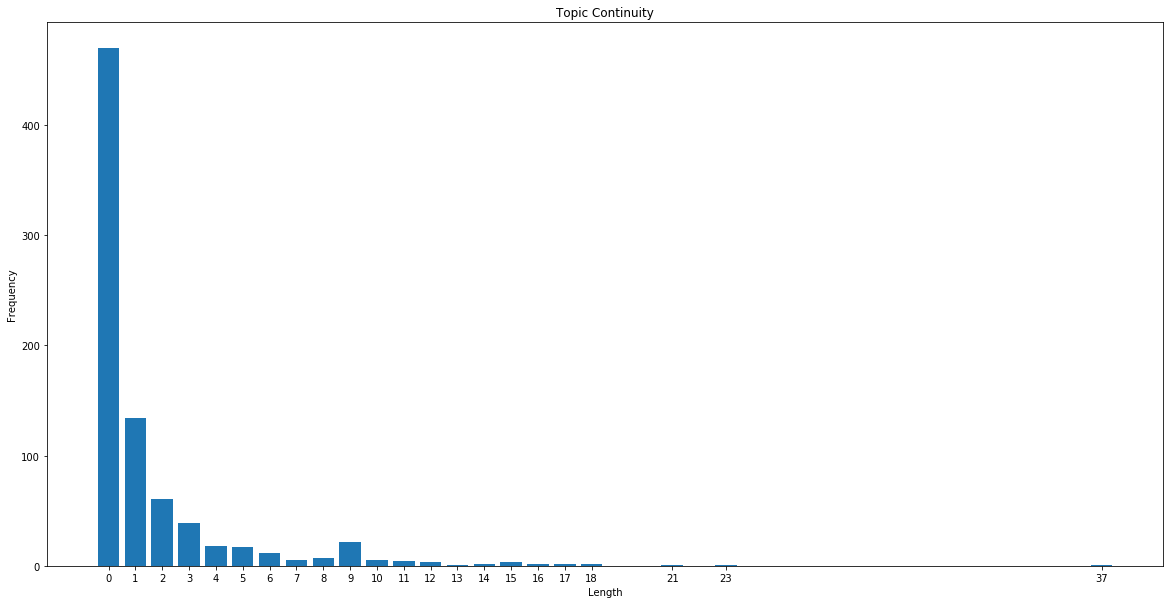

In [236]:
plot_bar(l10, 'Topic Continuity', 'Length')

In [238]:
l10

defaultdict(<function __main__.init_dict>,
            {0: 470,
             1: 134,
             2: 61,
             3: 39,
             4: 18,
             5: 17,
             6: 12,
             7: 5,
             8: 7,
             9: 22,
             10: 5,
             11: 4,
             12: 3,
             13: 1,
             14: 2,
             15: 3,
             16: 2,
             17: 2,
             18: 2,
             21: 1,
             23: 1,
             37: 1})

In [259]:
env = DocsByDate(doc)

In [260]:
oracle_100_50_30.env = env
oracle_100_50_30.threshold = 0
d1_100_50_30, d2_100_50_30, l1_100_50_30=test_oracle(env, oracle_100_50_30)

12:31:12 PM INFO oracles:pick a random cluster
12:31:12 PM INFO __main__:Round_no 1: Imp_docs 1, Topic_ID 15
12:31:12 PM INFO oracles:pick a random cluster
12:31:12 PM INFO __main__:Round_no 2: Imp_docs 1, Topic_ID 1
12:31:12 PM INFO oracles:pick a random cluster
12:31:12 PM INFO __main__:Round_no 3: Imp_docs 1, Topic_ID 15
12:31:12 PM INFO oracles:pick a random cluster
12:31:12 PM INFO __main__:Round_no 4: Imp_docs 1, Topic_ID 15
12:31:12 PM INFO oracles:pick a random cluster
12:31:12 PM INFO __main__:Round_no 5: Imp_docs 1, Topic_ID 25
12:31:12 PM INFO oracles:pick a random cluster
12:31:12 PM INFO __main__:Round_no 6: Imp_docs 1, Topic_ID 15
12:31:12 PM INFO oracles:pick a random cluster
12:31:12 PM INFO __main__:Round_no 7: Imp_docs 1, Topic_ID 30
12:31:12 PM INFO oracles:pick a random cluster
12:31:12 PM INFO __main__:Round_no 8: Imp_docs 1, Topic_ID 28
12:31:12 PM INFO oracles:pick a random cluster
12:31:12 PM INFO __main__:Round_no 9: Imp_docs 1, Topic_ID 4
12:31:12 PM INFO orac

12:31:17 PM INFO __main__:Round_no 124: Imp_docs 1, Topic_ID 7
12:31:17 PM INFO __main__:Round_no 125: Imp_docs 1, Topic_ID 49
12:31:18 PM INFO __main__:Round_no 126: Imp_docs 1, Topic_ID 12
12:31:18 PM INFO __main__:Round_no 127: Imp_docs 1, Topic_ID 47
12:31:18 PM INFO __main__:Round_no 128: Imp_docs 1, Topic_ID 33
12:31:18 PM INFO __main__:Round_no 129: Imp_docs 1, Topic_ID 37
12:31:18 PM INFO __main__:Round_no 130: Imp_docs 1, Topic_ID 7
12:31:18 PM INFO __main__:Round_no 131: Imp_docs 1, Topic_ID 20
12:31:18 PM INFO __main__:Round_no 132: Imp_docs 1, Topic_ID 16
12:31:18 PM INFO __main__:Round_no 133: Imp_docs 1, Topic_ID 7
12:31:18 PM INFO __main__:Round_no 134: Imp_docs 1, Topic_ID 35
12:31:18 PM INFO __main__:Round_no 135: Imp_docs 1, Topic_ID 37
12:31:18 PM INFO __main__:Round_no 136: Imp_docs 1, Topic_ID 45
12:31:18 PM INFO __main__:Round_no 137: Imp_docs 2, Topic_ID 20
12:31:18 PM INFO __main__:Round_no 138: Imp_docs 1, Topic_ID 21
12:31:18 PM INFO __main__:Round_no 139: Imp

12:31:25 PM INFO __main__:Round_no 253: Imp_docs 1, Topic_ID 23
12:31:25 PM INFO __main__:Round_no 254: Imp_docs 1, Topic_ID 16
12:31:25 PM INFO __main__:Round_no 255: Imp_docs 1, Topic_ID 29
12:31:25 PM INFO __main__:Round_no 256: Imp_docs 1, Topic_ID 29
12:31:25 PM INFO __main__:Round_no 257: Imp_docs 1, Topic_ID 31
12:31:25 PM INFO __main__:Round_no 258: Imp_docs 1, Topic_ID 29
12:31:25 PM INFO __main__:Round_no 259: Imp_docs 1, Topic_ID 45
12:31:26 PM INFO __main__:Round_no 260: Imp_docs 1, Topic_ID 45
12:31:26 PM INFO __main__:Round_no 261: Imp_docs 1, Topic_ID 10
12:31:26 PM INFO __main__:Round_no 262: Imp_docs 1, Topic_ID 16
12:31:26 PM INFO __main__:Round_no 263: Imp_docs 1, Topic_ID 4
12:31:26 PM INFO __main__:Round_no 264: Imp_docs 1, Topic_ID 4
12:31:26 PM INFO __main__:Round_no 265: Imp_docs 1, Topic_ID 40
12:31:26 PM INFO __main__:Round_no 266: Imp_docs 1, Topic_ID 37
12:31:26 PM INFO __main__:Round_no 267: Imp_docs 1, Topic_ID 0
12:31:26 PM INFO __main__:Round_no 268: Imp

12:31:38 PM INFO __main__:Round_no 382: Imp_docs 4, Topic_ID 1
12:31:38 PM INFO __main__:Round_no 383: Imp_docs 1, Topic_ID 1
12:31:38 PM INFO __main__:Round_no 384: Imp_docs 1, Topic_ID 36
12:31:39 PM INFO __main__:Round_no 385: Imp_docs 1, Topic_ID 4
12:31:39 PM INFO __main__:Round_no 386: Imp_docs 1, Topic_ID 1
12:31:39 PM INFO __main__:Round_no 387: Imp_docs 1, Topic_ID 1
12:31:39 PM INFO __main__:Round_no 388: Imp_docs 2, Topic_ID 33
12:31:39 PM INFO __main__:Round_no 389: Imp_docs 1, Topic_ID 33
12:31:39 PM INFO __main__:Round_no 390: Imp_docs 1, Topic_ID 4
12:31:39 PM INFO __main__:Round_no 391: Imp_docs 1, Topic_ID 16
12:31:39 PM INFO __main__:Round_no 392: Imp_docs 1, Topic_ID 14
12:31:40 PM INFO __main__:Round_no 393: Imp_docs 1, Topic_ID 43
12:31:40 PM INFO __main__:Round_no 394: Imp_docs 1, Topic_ID 4
12:31:40 PM INFO __main__:Round_no 395: Imp_docs 1, Topic_ID 4
12:31:40 PM INFO __main__:Round_no 396: Imp_docs 2, Topic_ID 16
12:31:40 PM INFO __main__:Round_no 397: Imp_docs

12:32:20 PM INFO __main__:Round_no 511: Imp_docs 2, Topic_ID 31
12:32:20 PM INFO __main__:Round_no 512: Imp_docs 1, Topic_ID 37
12:32:21 PM INFO __main__:Round_no 513: Imp_docs 1, Topic_ID 17
12:32:21 PM INFO __main__:Round_no 514: Imp_docs 3, Topic_ID 4
12:32:21 PM INFO __main__:Round_no 515: Imp_docs 2, Topic_ID 8
12:32:21 PM INFO __main__:Round_no 516: Imp_docs 1, Topic_ID 4
12:32:22 PM INFO __main__:Round_no 517: Imp_docs 1, Topic_ID 28
12:32:22 PM INFO __main__:Round_no 518: Imp_docs 1, Topic_ID 4
12:32:22 PM INFO __main__:Round_no 519: Imp_docs 1, Topic_ID 18
12:32:22 PM INFO __main__:Round_no 520: Imp_docs 2, Topic_ID 39
12:32:23 PM INFO __main__:Round_no 521: Imp_docs 2, Topic_ID 39
12:32:23 PM INFO __main__:Round_no 522: Imp_docs 1, Topic_ID 22
12:32:23 PM INFO __main__:Round_no 523: Imp_docs 1, Topic_ID 36
12:32:23 PM INFO __main__:Round_no 524: Imp_docs 1, Topic_ID 26
12:32:23 PM INFO __main__:Round_no 525: Imp_docs 1, Topic_ID 39
12:32:24 PM INFO __main__:Round_no 526: Imp_

12:32:45 PM INFO __main__:Round_no 640: Imp_docs 1, Topic_ID 11
12:32:46 PM INFO __main__:Round_no 641: Imp_docs 2, Topic_ID 3
12:32:46 PM INFO __main__:Round_no 642: Imp_docs 1, Topic_ID 21
12:32:46 PM INFO __main__:Round_no 643: Imp_docs 1, Topic_ID 15
12:32:46 PM INFO __main__:Round_no 644: Imp_docs 1, Topic_ID 10
12:32:46 PM INFO __main__:Round_no 645: Imp_docs 1, Topic_ID 1
12:32:46 PM INFO __main__:Round_no 646: Imp_docs 1, Topic_ID 31
12:32:46 PM INFO __main__:Round_no 647: Imp_docs 1, Topic_ID 29
12:32:46 PM INFO __main__:Round_no 648: Imp_docs 1, Topic_ID 31
12:32:46 PM INFO __main__:Round_no 649: Imp_docs 1, Topic_ID 15
12:32:46 PM INFO __main__:Round_no 650: Imp_docs 1, Topic_ID 36
12:32:47 PM INFO __main__:Round_no 651: Imp_docs 1, Topic_ID 15
12:32:47 PM INFO __main__:Round_no 652: Imp_docs 1, Topic_ID 36
12:32:47 PM INFO __main__:Round_no 653: Imp_docs 1, Topic_ID 16
12:32:47 PM INFO __main__:Round_no 654: Imp_docs 1, Topic_ID 5
12:32:47 PM INFO __main__:Round_no 655: Imp

12:33:19 PM INFO __main__:Round_no 769: Imp_docs 7, Topic_ID 38
12:33:20 PM INFO __main__:Round_no 770: Imp_docs 1, Topic_ID 38
12:33:20 PM INFO __main__:Round_no 771: Imp_docs 1, Topic_ID 21
12:33:21 PM INFO __main__:Round_no 772: Imp_docs 3, Topic_ID 38
12:33:21 PM INFO __main__:Round_no 773: Imp_docs 1, Topic_ID 21
12:33:22 PM INFO __main__:Round_no 774: Imp_docs 7, Topic_ID 38
12:33:22 PM INFO __main__:Round_no 775: Imp_docs 1, Topic_ID 4
12:33:23 PM INFO __main__:Round_no 776: Imp_docs 2, Topic_ID 38
12:33:24 PM INFO __main__:Round_no 777: Imp_docs 1, Topic_ID 1
12:33:24 PM INFO __main__:Round_no 778: Imp_docs 1, Topic_ID 21
12:33:25 PM INFO __main__:Round_no 779: Imp_docs 1, Topic_ID 21
12:33:25 PM INFO __main__:Round_no 780: Imp_docs 3, Topic_ID 21
12:33:26 PM INFO __main__:Round_no 781: Imp_docs 3, Topic_ID 10
12:33:26 PM INFO __main__:Round_no 782: Imp_docs 2, Topic_ID 21
12:33:27 PM INFO __main__:Round_no 783: Imp_docs 1, Topic_ID 38
12:33:27 PM INFO __main__:Round_no 784: Im

12:33:52 PM INFO __main__:Round_no 898: Imp_docs 2, Topic_ID 38
12:33:52 PM INFO __main__:Round_no 899: Imp_docs 1, Topic_ID 38
12:33:52 PM INFO __main__:Round_no 900: Imp_docs 1, Topic_ID 38
12:33:53 PM INFO __main__:Round_no 901: Imp_docs 1, Topic_ID 38
12:33:53 PM INFO __main__:Round_no 902: Imp_docs 3, Topic_ID 38
12:33:53 PM INFO __main__:Round_no 903: Imp_docs 1, Topic_ID 38
12:33:54 PM INFO __main__:Round_no 904: Imp_docs 2, Topic_ID 21
12:33:54 PM INFO __main__:Round_no 905: Imp_docs 4, Topic_ID 21
12:33:54 PM INFO __main__:Round_no 906: Imp_docs 3, Topic_ID 21
12:33:55 PM INFO __main__:Round_no 907: Imp_docs 6, Topic_ID 21
12:33:55 PM INFO __main__:Round_no 908: Imp_docs 2, Topic_ID 21
12:33:56 PM INFO __main__:Round_no 909: Imp_docs 3, Topic_ID 21
12:33:56 PM INFO __main__:Round_no 910: Imp_docs 1, Topic_ID 21
12:33:57 PM INFO __main__:Round_no 911: Imp_docs 5, Topic_ID 21
12:33:57 PM INFO __main__:Round_no 912: Imp_docs 3, Topic_ID 21
12:33:58 PM INFO __main__:Round_no 913: 

12:34:23 PM INFO __main__:Round_no 1026: Imp_docs 1, Topic_ID 21
12:34:24 PM INFO __main__:Round_no 1027: Imp_docs 2, Topic_ID 21
12:34:24 PM INFO __main__:Round_no 1028: Imp_docs 1, Topic_ID 10
12:34:24 PM INFO __main__:Round_no 1029: Imp_docs 1, Topic_ID 6
12:34:24 PM INFO __main__:Round_no 1030: Imp_docs 1, Topic_ID 12
12:34:24 PM INFO __main__:Round_no 1031: Imp_docs 2, Topic_ID 4
12:34:25 PM INFO __main__:Round_no 1032: Imp_docs 1, Topic_ID 43
12:34:25 PM INFO __main__:Round_no 1033: Imp_docs 1, Topic_ID 38
12:34:25 PM INFO __main__:Round_no 1034: Imp_docs 1, Topic_ID 12
12:34:26 PM INFO __main__:Round_no 1035: Imp_docs 1, Topic_ID 43
12:34:26 PM INFO __main__:Round_no 1036: Imp_docs 3, Topic_ID 43
12:34:26 PM INFO __main__:Round_no 1037: Imp_docs 1, Topic_ID 28
12:34:26 PM INFO __main__:Round_no 1038: Imp_docs 2, Topic_ID 43
12:34:26 PM INFO __main__:Round_no 1039: Imp_docs 1, Topic_ID 43
12:34:27 PM INFO __main__:Round_no 1040: Imp_docs 1, Topic_ID 2
12:34:27 PM INFO __main__:Ro

12:34:57 PM INFO __main__:Round_no 1153: Imp_docs 1, Topic_ID 47
12:34:58 PM INFO __main__:Round_no 1154: Imp_docs 1, Topic_ID 47
12:34:58 PM INFO __main__:Round_no 1155: Imp_docs 1, Topic_ID 33
12:34:58 PM INFO __main__:Round_no 1156: Imp_docs 1, Topic_ID 47
12:34:58 PM INFO __main__:Round_no 1157: Imp_docs 2, Topic_ID 23
12:34:58 PM INFO __main__:Round_no 1158: Imp_docs 2, Topic_ID 43
12:34:58 PM INFO __main__:Round_no 1159: Imp_docs 3, Topic_ID 45
12:34:58 PM INFO __main__:Round_no 1160: Imp_docs 1, Topic_ID 45
12:34:59 PM INFO __main__:Round_no 1161: Imp_docs 1, Topic_ID 5
12:34:59 PM INFO __main__:Round_no 1162: Imp_docs 1, Topic_ID 47
12:34:59 PM INFO __main__:Round_no 1163: Imp_docs 1, Topic_ID 47
12:34:59 PM INFO __main__:Round_no 1164: Imp_docs 1, Topic_ID 43
12:34:59 PM INFO __main__:Round_no 1165: Imp_docs 1, Topic_ID 45
12:34:59 PM INFO __main__:Round_no 1166: Imp_docs 1, Topic_ID 43
12:34:59 PM INFO __main__:Round_no 1167: Imp_docs 1, Topic_ID 43
12:35:00 PM INFO __main__:

12:35:20 PM INFO __main__:Round_no 1280: Imp_docs 1, Topic_ID 43
12:35:21 PM INFO __main__:Round_no 1281: Imp_docs 1, Topic_ID 34
12:35:21 PM INFO __main__:Round_no 1282: Imp_docs 1, Topic_ID 43
12:35:21 PM INFO __main__:Round_no 1283: Imp_docs 1, Topic_ID 35
12:35:21 PM INFO __main__:Round_no 1284: Imp_docs 3, Topic_ID 45
12:35:21 PM INFO __main__:Round_no 1285: Imp_docs 1, Topic_ID 43
12:35:21 PM INFO __main__:Round_no 1286: Imp_docs 1, Topic_ID 39
12:35:22 PM INFO __main__:Round_no 1287: Imp_docs 2, Topic_ID 45
12:35:22 PM INFO __main__:Round_no 1288: Imp_docs 3, Topic_ID 43
12:35:22 PM INFO __main__:Round_no 1289: Imp_docs 1, Topic_ID 43
12:35:22 PM INFO __main__:Round_no 1290: Imp_docs 1, Topic_ID 0
12:35:22 PM INFO __main__:Round_no 1291: Imp_docs 1, Topic_ID 43
12:35:22 PM INFO __main__:Round_no 1292: Imp_docs 1, Topic_ID 43
12:35:22 PM INFO __main__:Round_no 1293: Imp_docs 1, Topic_ID 43
12:35:23 PM INFO __main__:Round_no 1294: Imp_docs 1, Topic_ID 43
12:35:23 PM INFO __main__:

12:35:47 PM INFO __main__:Round_no 1407: Imp_docs 1, Topic_ID 40
12:35:47 PM INFO __main__:Round_no 1408: Imp_docs 3, Topic_ID 29
12:35:47 PM INFO __main__:Round_no 1409: Imp_docs 7, Topic_ID 21
12:35:48 PM INFO __main__:Round_no 1410: Imp_docs 2, Topic_ID 47
12:35:49 PM INFO __main__:Round_no 1411: Imp_docs 2, Topic_ID 47
12:35:49 PM INFO __main__:Round_no 1412: Imp_docs 1, Topic_ID 47
12:35:50 PM INFO __main__:Round_no 1413: Imp_docs 4, Topic_ID 6
12:35:51 PM INFO __main__:Round_no 1414: Imp_docs 7, Topic_ID 6
12:35:52 PM INFO __main__:Round_no 1415: Imp_docs 1, Topic_ID 47
12:35:52 PM INFO __main__:Round_no 1416: Imp_docs 2, Topic_ID 6
12:35:53 PM INFO __main__:Round_no 1417: Imp_docs 3, Topic_ID 6
12:35:54 PM INFO __main__:Round_no 1418: Imp_docs 3, Topic_ID 6
12:35:55 PM INFO __main__:Round_no 1419: Imp_docs 1, Topic_ID 6
12:35:55 PM INFO __main__:Round_no 1420: Imp_docs 2, Topic_ID 6
12:35:56 PM INFO __main__:Round_no 1421: Imp_docs 3, Topic_ID 40
12:35:56 PM INFO __main__:Round_

12:36:22 PM INFO __main__:Round_no 1534: Imp_docs 1, Topic_ID 40
12:36:22 PM INFO __main__:Round_no 1535: Imp_docs 4, Topic_ID 6
12:36:22 PM INFO __main__:Round_no 1536: Imp_docs 1, Topic_ID 6
12:36:22 PM INFO __main__:Round_no 1537: Imp_docs 1, Topic_ID 24
12:36:23 PM INFO __main__:Round_no 1538: Imp_docs 1, Topic_ID 40
12:36:23 PM INFO __main__:Round_no 1539: Imp_docs 1, Topic_ID 21
12:36:23 PM INFO __main__:Round_no 1540: Imp_docs 1, Topic_ID 6
12:36:23 PM INFO __main__:Round_no 1541: Imp_docs 2, Topic_ID 6
12:36:23 PM INFO __main__:Round_no 1542: Imp_docs 1, Topic_ID 24
12:36:23 PM INFO __main__:Round_no 1543: Imp_docs 3, Topic_ID 6
12:36:23 PM INFO __main__:Round_no 1544: Imp_docs 2, Topic_ID 40
12:36:23 PM INFO __main__:Round_no 1545: Imp_docs 1, Topic_ID 45
12:36:23 PM INFO __main__:Round_no 1546: Imp_docs 1, Topic_ID 40
12:36:24 PM INFO __main__:Round_no 1547: Imp_docs 1, Topic_ID 6
12:36:24 PM INFO __main__:Round_no 1548: Imp_docs 2, Topic_ID 45
12:36:24 PM INFO __main__:Round

12:37:07 PM INFO __main__:Round_no 1661: Imp_docs 2, Topic_ID 6
12:37:07 PM INFO __main__:Round_no 1662: Imp_docs 1, Topic_ID 32
12:37:07 PM INFO __main__:Round_no 1663: Imp_docs 1, Topic_ID 6
12:37:07 PM INFO __main__:Round_no 1664: Imp_docs 3, Topic_ID 29
12:37:08 PM INFO __main__:Round_no 1665: Imp_docs 1, Topic_ID 43
12:37:08 PM INFO __main__:Round_no 1666: Imp_docs 1, Topic_ID 32
12:37:08 PM INFO __main__:Round_no 1667: Imp_docs 1, Topic_ID 6
12:37:08 PM INFO __main__:Round_no 1668: Imp_docs 3, Topic_ID 29
12:37:08 PM INFO __main__:Round_no 1669: Imp_docs 2, Topic_ID 29
12:37:09 PM INFO __main__:Round_no 1670: Imp_docs 1, Topic_ID 29
12:37:09 PM INFO __main__:Round_no 1671: Imp_docs 2, Topic_ID 29
12:37:09 PM INFO __main__:Round_no 1672: Imp_docs 1, Topic_ID 29
12:37:09 PM INFO __main__:Round_no 1673: Imp_docs 4, Topic_ID 29
12:37:10 PM INFO __main__:Round_no 1674: Imp_docs 1, Topic_ID 29
12:37:10 PM INFO __main__:Round_no 1675: Imp_docs 2, Topic_ID 29
12:37:10 PM INFO __main__:Ro

12:37:57 PM INFO __main__:Round_no 1788: Imp_docs 2, Topic_ID 45
12:37:58 PM INFO __main__:Round_no 1789: Imp_docs 4, Topic_ID 6
12:37:59 PM INFO __main__:Round_no 1790: Imp_docs 1, Topic_ID 46
12:37:59 PM INFO __main__:Round_no 1791: Imp_docs 1, Topic_ID 46
12:38:00 PM INFO __main__:Round_no 1792: Imp_docs 1, Topic_ID 46
12:38:01 PM INFO __main__:Round_no 1793: Imp_docs 1, Topic_ID 47
12:38:01 PM INFO __main__:Round_no 1794: Imp_docs 2, Topic_ID 39
12:38:02 PM INFO __main__:Round_no 1795: Imp_docs 2, Topic_ID 46
12:38:02 PM INFO __main__:Round_no 1796: Imp_docs 1, Topic_ID 46
12:38:03 PM INFO __main__:Round_no 1797: Imp_docs 1, Topic_ID 46
12:38:04 PM INFO __main__:Round_no 1798: Imp_docs 1, Topic_ID 9
12:38:04 PM INFO __main__:Round_no 1799: Imp_docs 2, Topic_ID 46
12:38:05 PM INFO __main__:Round_no 1800: Imp_docs 1, Topic_ID 39
12:38:05 PM INFO __main__:Round_no 1801: Imp_docs 2, Topic_ID 39
12:38:06 PM INFO __main__:Round_no 1802: Imp_docs 1, Topic_ID 39
12:38:06 PM INFO __main__:R

12:39:07 PM INFO __main__:Round_no 1915: Imp_docs 1, Topic_ID 9
12:39:08 PM INFO __main__:Round_no 1916: Imp_docs 6, Topic_ID 37
12:39:08 PM INFO __main__:Round_no 1917: Imp_docs 1, Topic_ID 32
12:39:08 PM INFO __main__:Round_no 1918: Imp_docs 3, Topic_ID 32
12:39:09 PM INFO __main__:Round_no 1919: Imp_docs 3, Topic_ID 2
12:39:09 PM INFO __main__:Round_no 1920: Imp_docs 1, Topic_ID 2
12:39:09 PM INFO __main__:Round_no 1921: Imp_docs 2, Topic_ID 32
12:39:10 PM INFO __main__:Round_no 1922: Imp_docs 3, Topic_ID 32
12:39:10 PM INFO __main__:Round_no 1923: Imp_docs 1, Topic_ID 32
12:39:10 PM INFO __main__:Round_no 1924: Imp_docs 1, Topic_ID 32
12:39:11 PM INFO __main__:Round_no 1925: Imp_docs 1, Topic_ID 32
12:39:11 PM INFO __main__:Round_no 1926: Imp_docs 1, Topic_ID 6
12:39:12 PM INFO __main__:Round_no 1927: Imp_docs 1, Topic_ID 6
12:39:12 PM INFO __main__:Round_no 1928: Imp_docs 7, Topic_ID 6
12:39:13 PM INFO __main__:Round_no 1929: Imp_docs 4, Topic_ID 6
12:39:14 PM INFO __main__:Round_

12:40:45 PM INFO __main__:Round_no 2042: Imp_docs 2, Topic_ID 8
12:40:46 PM INFO __main__:Round_no 2043: Imp_docs 2, Topic_ID 8
12:40:47 PM INFO __main__:Round_no 2044: Imp_docs 2, Topic_ID 8
12:40:47 PM INFO __main__:Round_no 2045: Imp_docs 1, Topic_ID 8
12:40:48 PM INFO __main__:Round_no 2046: Imp_docs 1, Topic_ID 6
12:40:49 PM INFO __main__:Round_no 2047: Imp_docs 1, Topic_ID 6
12:40:50 PM INFO __main__:Round_no 2048: Imp_docs 2, Topic_ID 10
12:40:50 PM INFO __main__:Round_no 2049: Imp_docs 1, Topic_ID 13
12:40:51 PM INFO __main__:Round_no 2050: Imp_docs 2, Topic_ID 29
12:40:51 PM INFO __main__:Round_no 2051: Imp_docs 2, Topic_ID 6
12:40:52 PM INFO __main__:Round_no 2052: Imp_docs 5, Topic_ID 10
12:40:52 PM INFO __main__:Round_no 2053: Imp_docs 1, Topic_ID 39
12:40:53 PM INFO __main__:Round_no 2054: Imp_docs 2, Topic_ID 39
12:40:53 PM INFO __main__:Round_no 2055: Imp_docs 2, Topic_ID 39
12:40:54 PM INFO __main__:Round_no 2056: Imp_docs 1, Topic_ID 39
12:40:54 PM INFO __main__:Round_

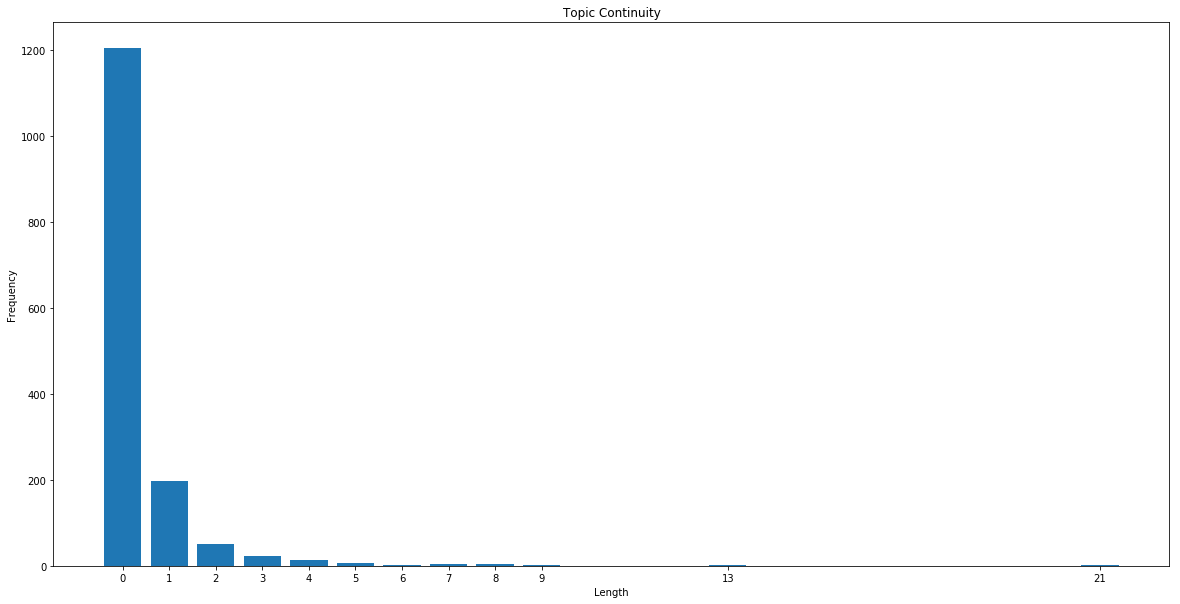

In [261]:
plot_bar(l1_100_50_30, 'Topic Continuity', 'Length')

In [262]:
print type(env), env.current_idx, type(oracle_100_50_30.env), oracle_100_50_30.env.current_idx

<class 'environments.DocsByDate'> 2117 <class 'environments.DocsByDate'> 2117


In [263]:
env = DocsByDate(doc)

In [264]:
oracle_100_50_30.threshold = 1
d1_100_50_30, d2_100_50_30, l1_100_50_30=test_oracle(env, oracle_100_50_30)

12:41:43 PM INFO oracles:pick a random cluster
12:41:43 PM INFO __main__:Round_no 1: Imp_docs 1, Topic_ID 15
12:41:43 PM INFO oracles:pick a random cluster
12:41:43 PM INFO __main__:Round_no 2: Imp_docs 1, Topic_ID 1
12:41:43 PM INFO oracles:pick a random cluster
12:41:43 PM INFO __main__:Round_no 3: Imp_docs 1, Topic_ID 15
12:41:43 PM INFO oracles:pick a random cluster
12:41:43 PM INFO __main__:Round_no 4: Imp_docs 1, Topic_ID 15
12:41:43 PM INFO oracles:pick a random cluster
12:41:43 PM INFO __main__:Round_no 5: Imp_docs 1, Topic_ID 25
12:41:43 PM INFO oracles:pick a random cluster
12:41:43 PM INFO __main__:Round_no 6: Imp_docs 1, Topic_ID 15
12:41:43 PM INFO oracles:pick a random cluster
12:41:43 PM INFO __main__:Round_no 7: Imp_docs 1, Topic_ID 0
12:41:43 PM INFO oracles:pick a random cluster
12:41:43 PM INFO __main__:Round_no 8: Imp_docs 1, Topic_ID 28
12:41:43 PM INFO oracles:pick a random cluster
12:41:43 PM INFO __main__:Round_no 9: Imp_docs 1, Topic_ID 4
12:41:43 PM INFO oracl

12:41:47 PM INFO __main__:Round_no 124: Imp_docs 1, Topic_ID 7
12:41:47 PM INFO __main__:Round_no 125: Imp_docs 1, Topic_ID 49
12:41:47 PM INFO __main__:Round_no 126: Imp_docs 1, Topic_ID 12
12:41:47 PM INFO __main__:Round_no 127: Imp_docs 1, Topic_ID 35
12:41:47 PM INFO __main__:Round_no 128: Imp_docs 1, Topic_ID 12
12:41:47 PM INFO __main__:Round_no 129: Imp_docs 1, Topic_ID 37
12:41:47 PM INFO __main__:Round_no 130: Imp_docs 1, Topic_ID 32
12:41:47 PM INFO __main__:Round_no 131: Imp_docs 1, Topic_ID 20
12:41:47 PM INFO __main__:Round_no 132: Imp_docs 1, Topic_ID 12
12:41:47 PM INFO __main__:Round_no 133: Imp_docs 1, Topic_ID 7
12:41:47 PM INFO __main__:Round_no 134: Imp_docs 1, Topic_ID 35
12:41:47 PM INFO __main__:Round_no 135: Imp_docs 1, Topic_ID 37
12:41:48 PM INFO __main__:Round_no 136: Imp_docs 1, Topic_ID 45
12:41:48 PM INFO __main__:Round_no 137: Imp_docs 1, Topic_ID 20
12:41:48 PM INFO __main__:Round_no 138: Imp_docs 1, Topic_ID 21
12:41:48 PM INFO __main__:Round_no 139: Im

12:41:53 PM INFO __main__:Round_no 253: Imp_docs 1, Topic_ID 23
12:41:53 PM INFO __main__:Round_no 254: Imp_docs 1, Topic_ID 16
12:41:53 PM INFO __main__:Round_no 255: Imp_docs 1, Topic_ID 29
12:41:54 PM INFO __main__:Round_no 256: Imp_docs 2, Topic_ID 38
12:41:54 PM INFO __main__:Round_no 257: Imp_docs 1, Topic_ID 31
12:41:54 PM INFO __main__:Round_no 258: Imp_docs 1, Topic_ID 21
12:41:54 PM INFO __main__:Round_no 259: Imp_docs 1, Topic_ID 28
12:41:54 PM INFO __main__:Round_no 260: Imp_docs 1, Topic_ID 45
12:41:54 PM INFO __main__:Round_no 261: Imp_docs 1, Topic_ID 10
12:41:54 PM INFO __main__:Round_no 262: Imp_docs 1, Topic_ID 16
12:41:54 PM INFO __main__:Round_no 263: Imp_docs 1, Topic_ID 4
12:41:54 PM INFO __main__:Round_no 264: Imp_docs 1, Topic_ID 4
12:41:54 PM INFO __main__:Round_no 265: Imp_docs 1, Topic_ID 40
12:41:54 PM INFO __main__:Round_no 266: Imp_docs 1, Topic_ID 37
12:41:54 PM INFO __main__:Round_no 267: Imp_docs 1, Topic_ID 0
12:41:54 PM INFO __main__:Round_no 268: Imp

12:42:04 PM INFO __main__:Round_no 382: Imp_docs 4, Topic_ID 1
12:42:04 PM INFO __main__:Round_no 383: Imp_docs 1, Topic_ID 1
12:42:04 PM INFO __main__:Round_no 384: Imp_docs 1, Topic_ID 4
12:42:04 PM INFO __main__:Round_no 385: Imp_docs 1, Topic_ID 4
12:42:04 PM INFO __main__:Round_no 386: Imp_docs 1, Topic_ID 1
12:42:04 PM INFO __main__:Round_no 387: Imp_docs 1, Topic_ID 35
12:42:04 PM INFO __main__:Round_no 388: Imp_docs 2, Topic_ID 33
12:42:04 PM INFO __main__:Round_no 389: Imp_docs 1, Topic_ID 33
12:42:04 PM INFO __main__:Round_no 390: Imp_docs 1, Topic_ID 33
12:42:05 PM INFO __main__:Round_no 391: Imp_docs 1, Topic_ID 16
12:42:05 PM INFO __main__:Round_no 392: Imp_docs 1, Topic_ID 14
12:42:05 PM INFO __main__:Round_no 393: Imp_docs 1, Topic_ID 43
12:42:05 PM INFO __main__:Round_no 394: Imp_docs 1, Topic_ID 4
12:42:05 PM INFO __main__:Round_no 395: Imp_docs 1, Topic_ID 4
12:42:05 PM INFO __main__:Round_no 396: Imp_docs 1, Topic_ID 16
12:42:05 PM INFO __main__:Round_no 397: Imp_doc

12:42:25 PM INFO __main__:Round_no 511: Imp_docs 2, Topic_ID 31
12:42:25 PM INFO __main__:Round_no 512: Imp_docs 2, Topic_ID 10
12:42:25 PM INFO __main__:Round_no 513: Imp_docs 1, Topic_ID 17
12:42:26 PM INFO __main__:Round_no 514: Imp_docs 2, Topic_ID 4
12:42:26 PM INFO __main__:Round_no 515: Imp_docs 1, Topic_ID 4
12:42:26 PM INFO __main__:Round_no 516: Imp_docs 1, Topic_ID 4
12:42:26 PM INFO __main__:Round_no 517: Imp_docs 1, Topic_ID 18
12:42:26 PM INFO __main__:Round_no 518: Imp_docs 1, Topic_ID 18
12:42:26 PM INFO __main__:Round_no 519: Imp_docs 1, Topic_ID 18
12:42:26 PM INFO __main__:Round_no 520: Imp_docs 2, Topic_ID 39
12:42:26 PM INFO __main__:Round_no 521: Imp_docs 1, Topic_ID 39
12:42:26 PM INFO __main__:Round_no 522: Imp_docs 1, Topic_ID 4
12:42:27 PM INFO __main__:Round_no 523: Imp_docs 1, Topic_ID 20
12:42:27 PM INFO __main__:Round_no 524: Imp_docs 1, Topic_ID 26
12:42:27 PM INFO __main__:Round_no 525: Imp_docs 1, Topic_ID 39
12:42:27 PM INFO __main__:Round_no 526: Imp_

12:42:40 PM INFO __main__:Round_no 640: Imp_docs 1, Topic_ID 11
12:42:40 PM INFO __main__:Round_no 641: Imp_docs 2, Topic_ID 3
12:42:40 PM INFO __main__:Round_no 642: Imp_docs 1, Topic_ID 21
12:42:40 PM INFO __main__:Round_no 643: Imp_docs 1, Topic_ID 18
12:42:40 PM INFO __main__:Round_no 644: Imp_docs 1, Topic_ID 44
12:42:40 PM INFO __main__:Round_no 645: Imp_docs 1, Topic_ID 1
12:42:40 PM INFO __main__:Round_no 646: Imp_docs 1, Topic_ID 31
12:42:40 PM INFO __main__:Round_no 647: Imp_docs 1, Topic_ID 29
12:42:40 PM INFO __main__:Round_no 648: Imp_docs 1, Topic_ID 31
12:42:41 PM INFO __main__:Round_no 649: Imp_docs 1, Topic_ID 39
12:42:41 PM INFO __main__:Round_no 650: Imp_docs 1, Topic_ID 36
12:42:41 PM INFO __main__:Round_no 651: Imp_docs 1, Topic_ID 15
12:42:41 PM INFO __main__:Round_no 652: Imp_docs 1, Topic_ID 1
12:42:41 PM INFO __main__:Round_no 653: Imp_docs 1, Topic_ID 28
12:42:41 PM INFO __main__:Round_no 654: Imp_docs 1, Topic_ID 23
12:42:41 PM INFO __main__:Round_no 655: Imp

12:42:57 PM INFO __main__:Round_no 769: Imp_docs 6, Topic_ID 38
12:42:58 PM INFO __main__:Round_no 770: Imp_docs 1, Topic_ID 38
12:42:58 PM INFO __main__:Round_no 771: Imp_docs 1, Topic_ID 21
12:42:58 PM INFO __main__:Round_no 772: Imp_docs 3, Topic_ID 21
12:42:58 PM INFO __main__:Round_no 773: Imp_docs 1, Topic_ID 21
12:42:58 PM INFO __main__:Round_no 774: Imp_docs 7, Topic_ID 21
12:42:59 PM INFO __main__:Round_no 775: Imp_docs 1, Topic_ID 4
12:42:59 PM INFO __main__:Round_no 776: Imp_docs 1, Topic_ID 4
12:42:59 PM INFO __main__:Round_no 777: Imp_docs 2, Topic_ID 1
12:43:00 PM INFO __main__:Round_no 778: Imp_docs 1, Topic_ID 21
12:43:00 PM INFO __main__:Round_no 779: Imp_docs 2, Topic_ID 21
12:43:00 PM INFO __main__:Round_no 780: Imp_docs 2, Topic_ID 21
12:43:00 PM INFO __main__:Round_no 781: Imp_docs 3, Topic_ID 21
12:43:00 PM INFO __main__:Round_no 782: Imp_docs 2, Topic_ID 21
12:43:01 PM INFO __main__:Round_no 783: Imp_docs 1, Topic_ID 38
12:43:01 PM INFO __main__:Round_no 784: Imp

12:43:15 PM INFO __main__:Round_no 898: Imp_docs 2, Topic_ID 38
12:43:15 PM INFO __main__:Round_no 899: Imp_docs 1, Topic_ID 38
12:43:16 PM INFO __main__:Round_no 900: Imp_docs 1, Topic_ID 8
12:43:16 PM INFO __main__:Round_no 901: Imp_docs 1, Topic_ID 8
12:43:16 PM INFO __main__:Round_no 902: Imp_docs 2, Topic_ID 8
12:43:16 PM INFO __main__:Round_no 903: Imp_docs 3, Topic_ID 21
12:43:16 PM INFO __main__:Round_no 904: Imp_docs 2, Topic_ID 21
12:43:16 PM INFO __main__:Round_no 905: Imp_docs 3, Topic_ID 21
12:43:16 PM INFO __main__:Round_no 906: Imp_docs 4, Topic_ID 21
12:43:16 PM INFO __main__:Round_no 907: Imp_docs 6, Topic_ID 21
12:43:16 PM INFO __main__:Round_no 908: Imp_docs 2, Topic_ID 21
12:43:16 PM INFO __main__:Round_no 909: Imp_docs 2, Topic_ID 21
12:43:16 PM INFO __main__:Round_no 910: Imp_docs 1, Topic_ID 21
12:43:16 PM INFO __main__:Round_no 911: Imp_docs 6, Topic_ID 21
12:43:16 PM INFO __main__:Round_no 912: Imp_docs 3, Topic_ID 21
12:43:16 PM INFO __main__:Round_no 913: Imp

12:43:29 PM INFO __main__:Round_no 1026: Imp_docs 1, Topic_ID 21
12:43:29 PM INFO __main__:Round_no 1027: Imp_docs 1, Topic_ID 21
12:43:29 PM INFO __main__:Round_no 1028: Imp_docs 1, Topic_ID 6
12:43:29 PM INFO __main__:Round_no 1029: Imp_docs 1, Topic_ID 6
12:43:29 PM INFO __main__:Round_no 1030: Imp_docs 1, Topic_ID 12
12:43:29 PM INFO __main__:Round_no 1031: Imp_docs 2, Topic_ID 12
12:43:29 PM INFO __main__:Round_no 1032: Imp_docs 1, Topic_ID 12
12:43:29 PM INFO __main__:Round_no 1033: Imp_docs 1, Topic_ID 12
12:43:29 PM INFO __main__:Round_no 1034: Imp_docs 2, Topic_ID 43
12:43:29 PM INFO __main__:Round_no 1035: Imp_docs 1, Topic_ID 43
12:43:29 PM INFO __main__:Round_no 1036: Imp_docs 3, Topic_ID 43
12:43:29 PM INFO __main__:Round_no 1037: Imp_docs 1, Topic_ID 43
12:43:29 PM INFO __main__:Round_no 1038: Imp_docs 2, Topic_ID 43
12:43:29 PM INFO __main__:Round_no 1039: Imp_docs 1, Topic_ID 43
12:43:30 PM INFO __main__:Round_no 1040: Imp_docs 1, Topic_ID 2
12:43:30 PM INFO __main__:Ro

12:43:43 PM INFO __main__:Round_no 1153: Imp_docs 1, Topic_ID 47
12:43:43 PM INFO __main__:Round_no 1154: Imp_docs 1, Topic_ID 47
12:43:43 PM INFO __main__:Round_no 1155: Imp_docs 1, Topic_ID 33
12:43:43 PM INFO __main__:Round_no 1156: Imp_docs 1, Topic_ID 47
12:43:44 PM INFO __main__:Round_no 1157: Imp_docs 2, Topic_ID 23
12:43:44 PM INFO __main__:Round_no 1158: Imp_docs 2, Topic_ID 43
12:43:44 PM INFO __main__:Round_no 1159: Imp_docs 1, Topic_ID 47
12:43:44 PM INFO __main__:Round_no 1160: Imp_docs 1, Topic_ID 45
12:43:44 PM INFO __main__:Round_no 1161: Imp_docs 1, Topic_ID 1
12:43:44 PM INFO __main__:Round_no 1162: Imp_docs 1, Topic_ID 43
12:43:44 PM INFO __main__:Round_no 1163: Imp_docs 1, Topic_ID 47
12:43:44 PM INFO __main__:Round_no 1164: Imp_docs 2, Topic_ID 47
12:43:44 PM INFO __main__:Round_no 1165: Imp_docs 1, Topic_ID 47
12:43:44 PM INFO __main__:Round_no 1166: Imp_docs 3, Topic_ID 47
12:43:45 PM INFO __main__:Round_no 1167: Imp_docs 1, Topic_ID 43
12:43:45 PM INFO __main__:

12:43:58 PM INFO __main__:Round_no 1280: Imp_docs 2, Topic_ID 45
12:43:59 PM INFO __main__:Round_no 1281: Imp_docs 1, Topic_ID 40
12:43:59 PM INFO __main__:Round_no 1282: Imp_docs 1, Topic_ID 43
12:43:59 PM INFO __main__:Round_no 1283: Imp_docs 1, Topic_ID 35
12:43:59 PM INFO __main__:Round_no 1284: Imp_docs 3, Topic_ID 45
12:44:00 PM INFO __main__:Round_no 1285: Imp_docs 1, Topic_ID 43
12:44:00 PM INFO __main__:Round_no 1286: Imp_docs 1, Topic_ID 39
12:44:00 PM INFO __main__:Round_no 1287: Imp_docs 2, Topic_ID 45
12:44:00 PM INFO __main__:Round_no 1288: Imp_docs 3, Topic_ID 43
12:44:00 PM INFO __main__:Round_no 1289: Imp_docs 1, Topic_ID 43
12:44:00 PM INFO __main__:Round_no 1290: Imp_docs 1, Topic_ID 36
12:44:00 PM INFO __main__:Round_no 1291: Imp_docs 1, Topic_ID 36
12:44:00 PM INFO __main__:Round_no 1292: Imp_docs 1, Topic_ID 36
12:44:01 PM INFO __main__:Round_no 1293: Imp_docs 1, Topic_ID 43
12:44:01 PM INFO __main__:Round_no 1294: Imp_docs 1, Topic_ID 45
12:44:01 PM INFO __main__

12:44:14 PM INFO __main__:Round_no 1407: Imp_docs 1, Topic_ID 40
12:44:14 PM INFO __main__:Round_no 1408: Imp_docs 4, Topic_ID 40
12:44:14 PM INFO __main__:Round_no 1409: Imp_docs 5, Topic_ID 40
12:44:14 PM INFO __main__:Round_no 1410: Imp_docs 1, Topic_ID 40
12:44:14 PM INFO __main__:Round_no 1411: Imp_docs 2, Topic_ID 40
12:44:14 PM INFO __main__:Round_no 1412: Imp_docs 2, Topic_ID 40
12:44:14 PM INFO __main__:Round_no 1413: Imp_docs 5, Topic_ID 40
12:44:15 PM INFO __main__:Round_no 1414: Imp_docs 8, Topic_ID 40
12:44:15 PM INFO __main__:Round_no 1415: Imp_docs 2, Topic_ID 40
12:44:15 PM INFO __main__:Round_no 1416: Imp_docs 2, Topic_ID 40
12:44:15 PM INFO __main__:Round_no 1417: Imp_docs 3, Topic_ID 6
12:44:15 PM INFO __main__:Round_no 1418: Imp_docs 3, Topic_ID 6
12:44:15 PM INFO __main__:Round_no 1419: Imp_docs 1, Topic_ID 6
12:44:15 PM INFO __main__:Round_no 1420: Imp_docs 2, Topic_ID 6
12:44:16 PM INFO __main__:Round_no 1421: Imp_docs 3, Topic_ID 40
12:44:16 PM INFO __main__:Rou

12:44:33 PM INFO __main__:Round_no 1534: Imp_docs 1, Topic_ID 40
12:44:34 PM INFO __main__:Round_no 1535: Imp_docs 4, Topic_ID 6
12:44:34 PM INFO __main__:Round_no 1536: Imp_docs 1, Topic_ID 6
12:44:34 PM INFO __main__:Round_no 1537: Imp_docs 1, Topic_ID 21
12:44:34 PM INFO __main__:Round_no 1538: Imp_docs 1, Topic_ID 40
12:44:34 PM INFO __main__:Round_no 1539: Imp_docs 1, Topic_ID 21
12:44:34 PM INFO __main__:Round_no 1540: Imp_docs 1, Topic_ID 6
12:44:34 PM INFO __main__:Round_no 1541: Imp_docs 2, Topic_ID 6
12:44:34 PM INFO __main__:Round_no 1542: Imp_docs 1, Topic_ID 21
12:44:34 PM INFO __main__:Round_no 1543: Imp_docs 3, Topic_ID 6
12:44:34 PM INFO __main__:Round_no 1544: Imp_docs 1, Topic_ID 6
12:44:34 PM INFO __main__:Round_no 1545: Imp_docs 1, Topic_ID 46
12:44:34 PM INFO __main__:Round_no 1546: Imp_docs 1, Topic_ID 46
12:44:34 PM INFO __main__:Round_no 1547: Imp_docs 1, Topic_ID 6
12:44:35 PM INFO __main__:Round_no 1548: Imp_docs 1, Topic_ID 46
12:44:35 PM INFO __main__:Round_

12:44:52 PM INFO __main__:Round_no 1661: Imp_docs 2, Topic_ID 6
12:44:52 PM INFO __main__:Round_no 1662: Imp_docs 2, Topic_ID 32
12:44:53 PM INFO __main__:Round_no 1663: Imp_docs 1, Topic_ID 6
12:44:53 PM INFO __main__:Round_no 1664: Imp_docs 3, Topic_ID 29
12:44:53 PM INFO __main__:Round_no 1665: Imp_docs 1, Topic_ID 19
12:44:53 PM INFO __main__:Round_no 1666: Imp_docs 1, Topic_ID 19
12:44:53 PM INFO __main__:Round_no 1667: Imp_docs 1, Topic_ID 6
12:44:53 PM INFO __main__:Round_no 1668: Imp_docs 3, Topic_ID 29
12:44:53 PM INFO __main__:Round_no 1669: Imp_docs 3, Topic_ID 29
12:44:53 PM INFO __main__:Round_no 1670: Imp_docs 1, Topic_ID 29
12:44:53 PM INFO __main__:Round_no 1671: Imp_docs 2, Topic_ID 29
12:44:53 PM INFO __main__:Round_no 1672: Imp_docs 1, Topic_ID 29
12:44:54 PM INFO __main__:Round_no 1673: Imp_docs 3, Topic_ID 29
12:44:54 PM INFO __main__:Round_no 1674: Imp_docs 1, Topic_ID 29
12:44:54 PM INFO __main__:Round_no 1675: Imp_docs 2, Topic_ID 29
12:44:54 PM INFO __main__:Ro

12:45:12 PM INFO __main__:Round_no 1788: Imp_docs 1, Topic_ID 28
12:45:13 PM INFO __main__:Round_no 1789: Imp_docs 12, Topic_ID 46
12:45:13 PM INFO __main__:Round_no 1790: Imp_docs 2, Topic_ID 46
12:45:13 PM INFO __main__:Round_no 1791: Imp_docs 1, Topic_ID 46
12:45:13 PM INFO __main__:Round_no 1792: Imp_docs 1, Topic_ID 46
12:45:13 PM INFO __main__:Round_no 1793: Imp_docs 2, Topic_ID 46
12:45:13 PM INFO __main__:Round_no 1794: Imp_docs 1, Topic_ID 46
12:45:13 PM INFO __main__:Round_no 1795: Imp_docs 3, Topic_ID 46
12:45:13 PM INFO __main__:Round_no 1796: Imp_docs 1, Topic_ID 46
12:45:13 PM INFO __main__:Round_no 1797: Imp_docs 1, Topic_ID 46
12:45:13 PM INFO __main__:Round_no 1798: Imp_docs 1, Topic_ID 46
12:45:13 PM INFO __main__:Round_no 1799: Imp_docs 2, Topic_ID 46
12:45:13 PM INFO __main__:Round_no 1800: Imp_docs 4, Topic_ID 46
12:45:13 PM INFO __main__:Round_no 1801: Imp_docs 3, Topic_ID 46
12:45:14 PM INFO __main__:Round_no 1802: Imp_docs 1, Topic_ID 39
12:45:14 PM INFO __main_

12:45:39 PM INFO __main__:Round_no 1915: Imp_docs 1, Topic_ID 9
12:45:39 PM INFO __main__:Round_no 1916: Imp_docs 4, Topic_ID 37
12:45:40 PM INFO __main__:Round_no 1917: Imp_docs 1, Topic_ID 32
12:45:40 PM INFO __main__:Round_no 1918: Imp_docs 4, Topic_ID 32
12:45:40 PM INFO __main__:Round_no 1919: Imp_docs 3, Topic_ID 2
12:45:40 PM INFO __main__:Round_no 1920: Imp_docs 1, Topic_ID 2
12:45:41 PM INFO __main__:Round_no 1921: Imp_docs 1, Topic_ID 37
12:45:41 PM INFO __main__:Round_no 1922: Imp_docs 3, Topic_ID 32
12:45:41 PM INFO __main__:Round_no 1923: Imp_docs 1, Topic_ID 32
12:45:41 PM INFO __main__:Round_no 1924: Imp_docs 1, Topic_ID 32
12:45:41 PM INFO __main__:Round_no 1925: Imp_docs 1, Topic_ID 32
12:45:42 PM INFO __main__:Round_no 1926: Imp_docs 1, Topic_ID 6
12:45:42 PM INFO __main__:Round_no 1927: Imp_docs 1, Topic_ID 6
12:45:42 PM INFO __main__:Round_no 1928: Imp_docs 7, Topic_ID 6
12:45:42 PM INFO __main__:Round_no 1929: Imp_docs 4, Topic_ID 6
12:45:42 PM INFO __main__:Round_

12:46:18 PM INFO __main__:Round_no 2042: Imp_docs 1, Topic_ID 8
12:46:18 PM INFO __main__:Round_no 2043: Imp_docs 1, Topic_ID 8
12:46:18 PM INFO __main__:Round_no 2044: Imp_docs 1, Topic_ID 23
12:46:19 PM INFO __main__:Round_no 2045: Imp_docs 2, Topic_ID 23
12:46:19 PM INFO __main__:Round_no 2046: Imp_docs 2, Topic_ID 25
12:46:20 PM INFO __main__:Round_no 2047: Imp_docs 2, Topic_ID 23
12:46:20 PM INFO __main__:Round_no 2048: Imp_docs 1, Topic_ID 23
12:46:21 PM INFO __main__:Round_no 2049: Imp_docs 1, Topic_ID 13
12:46:21 PM INFO __main__:Round_no 2050: Imp_docs 2, Topic_ID 29
12:46:22 PM INFO __main__:Round_no 2051: Imp_docs 1, Topic_ID 39
12:46:22 PM INFO __main__:Round_no 2052: Imp_docs 1, Topic_ID 39
12:46:22 PM INFO __main__:Round_no 2053: Imp_docs 1, Topic_ID 39
12:46:22 PM INFO __main__:Round_no 2054: Imp_docs 2, Topic_ID 39
12:46:22 PM INFO __main__:Round_no 2055: Imp_docs 2, Topic_ID 39
12:46:22 PM INFO __main__:Round_no 2056: Imp_docs 1, Topic_ID 39
12:46:22 PM INFO __main__:R

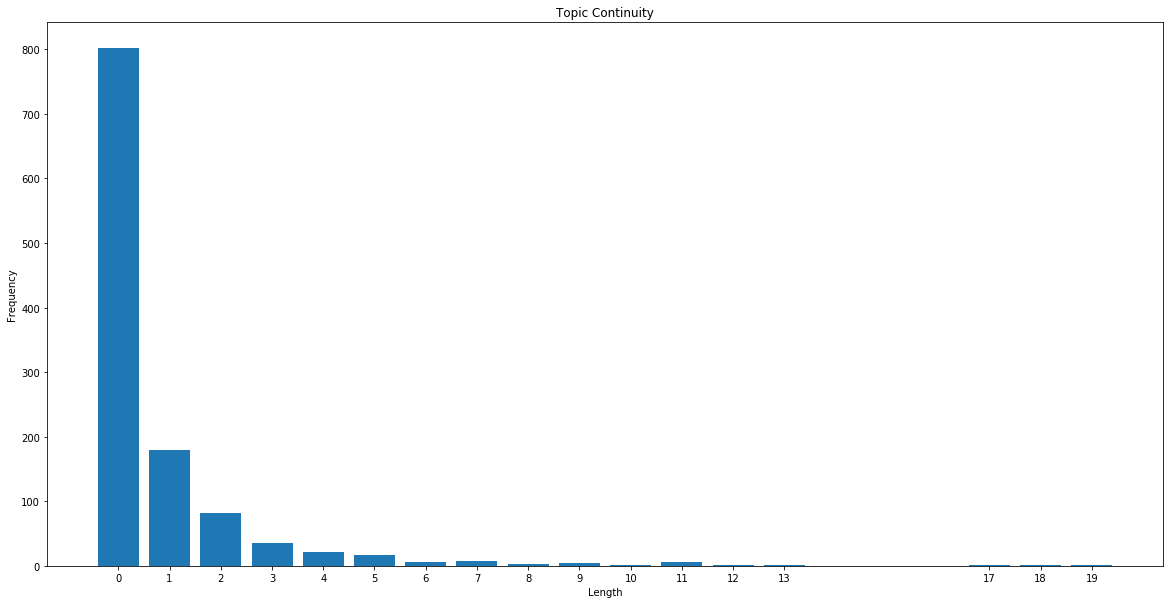

In [265]:
plot_bar(l1_100_50_30, 'Topic Continuity', 'Length')

In [266]:
print type(env), env.current_idx, type(oracle_100_50_30.env), oracle_100_50_30.env.current_idx

<class 'environments.DocsByDate'> 2117 <class 'environments.DocsByDate'> 2116


In [267]:
l1_100_50_30

defaultdict(<function __main__.init_dict>,
            {0: 802,
             1: 179,
             2: 82,
             3: 36,
             4: 22,
             5: 17,
             6: 6,
             7: 7,
             8: 3,
             9: 5,
             10: 1,
             11: 6,
             12: 2,
             13: 1,
             17: 1,
             18: 1,
             19: 1})

In [268]:
env = ConstDocs(doc, no_docs=30)
oracle_100_50_30.env = env
d1_100_50_30, d2_100_50_30, l1_100_50_30=test_oracle(env, oracle_100_50_30)

12:46:38 PM INFO oracles:pick a random cluster
12:46:38 PM INFO __main__:Round_no 1: Imp_docs 4, Topic_ID 15
12:46:38 PM INFO oracles:pick a random cluster
12:46:38 PM INFO __main__:Round_no 2: Imp_docs 1, Topic_ID 16
12:46:38 PM INFO oracles:pick a random cluster
12:46:38 PM INFO __main__:Round_no 3: Imp_docs 2, Topic_ID 13
12:46:38 PM INFO oracles:pick a random cluster
12:46:38 PM INFO __main__:Round_no 4: Imp_docs 1, Topic_ID 2
12:46:38 PM INFO oracles:pick a random cluster
12:46:38 PM INFO __main__:Round_no 5: Imp_docs 1, Topic_ID 40
12:46:38 PM INFO oracles:pick a random cluster
12:46:38 PM INFO __main__:Round_no 6: Imp_docs 1, Topic_ID 45
12:46:38 PM INFO oracles:pick a random cluster
12:46:38 PM INFO __main__:Round_no 7: Imp_docs 2, Topic_ID 40
12:46:38 PM INFO oracles:pick a random cluster
12:46:38 PM INFO __main__:Round_no 8: Imp_docs 4, Topic_ID 21
12:46:38 PM INFO oracles:pick a random cluster
12:46:38 PM INFO __main__:Round_no 9: Imp_docs 1, Topic_ID 4
12:46:39 PM INFO orac

12:46:50 PM INFO __main__:Round_no 125: Imp_docs 3, Topic_ID 7
12:46:51 PM INFO __main__:Round_no 126: Imp_docs 1, Topic_ID 21
12:46:51 PM INFO __main__:Round_no 127: Imp_docs 1, Topic_ID 21
12:46:51 PM INFO __main__:Round_no 128: Imp_docs 2, Topic_ID 21
12:46:51 PM INFO __main__:Round_no 129: Imp_docs 2, Topic_ID 21
12:46:51 PM INFO __main__:Round_no 130: Imp_docs 1, Topic_ID 21
12:46:51 PM INFO __main__:Round_no 131: Imp_docs 2, Topic_ID 21
12:46:51 PM INFO __main__:Round_no 132: Imp_docs 2, Topic_ID 21
12:46:51 PM INFO __main__:Round_no 133: Imp_docs 1, Topic_ID 21
12:46:51 PM INFO __main__:Round_no 134: Imp_docs 3, Topic_ID 21
12:46:51 PM INFO __main__:Round_no 135: Imp_docs 1, Topic_ID 21
12:46:51 PM INFO __main__:Round_no 136: Imp_docs 1, Topic_ID 4
12:46:51 PM INFO __main__:Round_no 137: Imp_docs 2, Topic_ID 4
12:46:51 PM INFO __main__:Round_no 138: Imp_docs 1, Topic_ID 4
12:46:52 PM INFO __main__:Round_no 139: Imp_docs 1, Topic_ID 4
12:46:52 PM INFO __main__:Round_no 140: Imp_d

12:47:11 PM INFO __main__:Round_no 254: Imp_docs 2, Topic_ID 39
12:47:11 PM INFO __main__:Round_no 255: Imp_docs 3, Topic_ID 39
12:47:11 PM INFO __main__:Round_no 256: Imp_docs 1, Topic_ID 39
12:47:11 PM INFO __main__:Round_no 257: Imp_docs 1, Topic_ID 39
12:47:11 PM INFO __main__:Round_no 258: Imp_docs 1, Topic_ID 39
12:47:11 PM INFO __main__:Round_no 259: Imp_docs 3, Topic_ID 39
12:47:11 PM INFO __main__:Round_no 260: Imp_docs 2, Topic_ID 39
12:47:11 PM INFO __main__:Round_no 261: Imp_docs 1, Topic_ID 39
12:47:11 PM INFO __main__:Round_no 262: Imp_docs 2, Topic_ID 40
12:47:12 PM INFO __main__:Round_no 263: Imp_docs 2, Topic_ID 13
12:47:12 PM INFO __main__:Round_no 264: Imp_docs 1, Topic_ID 15
12:47:12 PM INFO __main__:Round_no 265: Imp_docs 2, Topic_ID 39
12:47:12 PM INFO __main__:Round_no 266: Imp_docs 1, Topic_ID 39
12:47:13 PM INFO __main__:Round_no 267: Imp_docs 1, Topic_ID 23
12:47:13 PM INFO __main__:Round_no 268: Imp_docs 3, Topic_ID 40
12:47:13 PM INFO __main__:Round_no 269: 

12:47:29 PM INFO __main__:Round_no 383: Imp_docs 3, Topic_ID 43
12:47:29 PM INFO __main__:Round_no 384: Imp_docs 2, Topic_ID 43
12:47:29 PM INFO __main__:Round_no 385: Imp_docs 1, Topic_ID 43
12:47:29 PM INFO __main__:Round_no 386: Imp_docs 1, Topic_ID 43
12:47:29 PM INFO __main__:Round_no 387: Imp_docs 1, Topic_ID 43
12:47:29 PM INFO __main__:Round_no 388: Imp_docs 1, Topic_ID 43
12:47:30 PM INFO __main__:Round_no 389: Imp_docs 1, Topic_ID 18
12:47:30 PM INFO __main__:Round_no 390: Imp_docs 1, Topic_ID 18
12:47:30 PM INFO __main__:Round_no 391: Imp_docs 1, Topic_ID 18
12:47:30 PM INFO __main__:Round_no 392: Imp_docs 2, Topic_ID 26
12:47:30 PM INFO __main__:Round_no 393: Imp_docs 2, Topic_ID 26
12:47:30 PM INFO __main__:Round_no 394: Imp_docs 1, Topic_ID 26
12:47:30 PM INFO __main__:Round_no 395: Imp_docs 3, Topic_ID 26
12:47:30 PM INFO __main__:Round_no 396: Imp_docs 3, Topic_ID 26
12:47:30 PM INFO __main__:Round_no 397: Imp_docs 3, Topic_ID 26
12:47:30 PM INFO __main__:Round_no 398: 

12:47:43 PM INFO __main__:Round_no 512: Imp_docs 7, Topic_ID 43
12:47:43 PM INFO __main__:Round_no 513: Imp_docs 7, Topic_ID 43
12:47:43 PM INFO __main__:Round_no 514: Imp_docs 8, Topic_ID 43
12:47:43 PM INFO __main__:Round_no 515: Imp_docs 7, Topic_ID 43
12:47:43 PM INFO __main__:Round_no 516: Imp_docs 6, Topic_ID 43
12:47:43 PM INFO __main__:Round_no 517: Imp_docs 5, Topic_ID 43
12:47:43 PM INFO __main__:Round_no 518: Imp_docs 7, Topic_ID 43
12:47:43 PM INFO __main__:Round_no 519: Imp_docs 1, Topic_ID 43
12:47:43 PM INFO __main__:Round_no 520: Imp_docs 3, Topic_ID 43
12:47:43 PM INFO __main__:Round_no 521: Imp_docs 7, Topic_ID 43
12:47:43 PM INFO __main__:Round_no 522: Imp_docs 1, Topic_ID 43
12:47:43 PM INFO __main__:Round_no 523: Imp_docs 3, Topic_ID 43
12:47:43 PM INFO __main__:Round_no 524: Imp_docs 1, Topic_ID 43
12:47:44 PM INFO __main__:Round_no 525: Imp_docs 1, Topic_ID 15
12:47:44 PM INFO __main__:Round_no 526: Imp_docs 2, Topic_ID 15
12:47:44 PM INFO __main__:Round_no 527: 

12:48:02 PM INFO __main__:Round_no 641: Imp_docs 1, Topic_ID 45
12:48:02 PM INFO __main__:Round_no 642: Imp_docs 2, Topic_ID 43
12:48:02 PM INFO __main__:Round_no 643: Imp_docs 1, Topic_ID 43
12:48:02 PM INFO __main__:Round_no 644: Imp_docs 1, Topic_ID 45
12:48:03 PM INFO __main__:Round_no 645: Imp_docs 1, Topic_ID 4
12:48:03 PM INFO __main__:Round_no 646: Imp_docs 1, Topic_ID 4
12:48:03 PM INFO __main__:Round_no 647: Imp_docs 1, Topic_ID 4
12:48:03 PM INFO __main__:Round_no 648: Imp_docs 2, Topic_ID 4
12:48:03 PM INFO __main__:Round_no 649: Imp_docs 2, Topic_ID 47
12:48:03 PM INFO __main__:Round_no 650: Imp_docs 1, Topic_ID 47
12:48:04 PM INFO __main__:Round_no 651: Imp_docs 3, Topic_ID 4
12:48:04 PM INFO __main__:Round_no 652: Imp_docs 1, Topic_ID 4
12:48:04 PM INFO __main__:Round_no 653: Imp_docs 3, Topic_ID 7
12:48:04 PM INFO __main__:Round_no 654: Imp_docs 1, Topic_ID 7
12:48:04 PM INFO __main__:Round_no 655: Imp_docs 1, Topic_ID 46
12:48:04 PM INFO __main__:Round_no 656: Imp_docs

12:48:19 PM INFO __main__:Round_no 770: Imp_docs 4, Topic_ID 43
12:48:19 PM INFO __main__:Round_no 771: Imp_docs 3, Topic_ID 43
12:48:19 PM INFO __main__:Round_no 772: Imp_docs 3, Topic_ID 43
12:48:19 PM INFO __main__:Round_no 773: Imp_docs 1, Topic_ID 43
12:48:19 PM INFO __main__:Round_no 774: Imp_docs 1, Topic_ID 43
12:48:19 PM INFO __main__:Round_no 775: Imp_docs 2, Topic_ID 43
12:48:19 PM INFO __main__:Round_no 776: Imp_docs 1, Topic_ID 19
12:48:20 PM INFO __main__:Round_no 777: Imp_docs 2, Topic_ID 39
12:48:20 PM INFO __main__:Round_no 778: Imp_docs 2, Topic_ID 39
12:48:20 PM INFO __main__:Round_no 779: Imp_docs 1, Topic_ID 43
12:48:20 PM INFO __main__:Round_no 780: Imp_docs 1, Topic_ID 43
12:48:20 PM INFO __main__:Round_no 781: Imp_docs 2, Topic_ID 43
12:48:21 PM INFO __main__:Round_no 782: Imp_docs 2, Topic_ID 40
12:48:21 PM INFO __main__:Round_no 783: Imp_docs 1, Topic_ID 40
12:48:21 PM INFO __main__:Round_no 784: Imp_docs 1, Topic_ID 6
12:48:22 PM INFO __main__:Round_no 785: I

12:48:40 PM INFO __main__:Round_no 899: Imp_docs 2, Topic_ID 40
12:48:40 PM INFO __main__:Round_no 900: Imp_docs 5, Topic_ID 40
12:48:40 PM INFO __main__:Round_no 901: Imp_docs 2, Topic_ID 40
12:48:41 PM INFO __main__:Round_no 902: Imp_docs 1, Topic_ID 39
12:48:41 PM INFO __main__:Round_no 903: Imp_docs 1, Topic_ID 39
12:48:41 PM INFO __main__:Round_no 904: Imp_docs 4, Topic_ID 39
12:48:41 PM INFO __main__:Round_no 905: Imp_docs 2, Topic_ID 39
12:48:41 PM INFO __main__:Round_no 906: Imp_docs 2, Topic_ID 40
12:48:41 PM INFO __main__:Round_no 907: Imp_docs 1, Topic_ID 40
12:48:41 PM INFO __main__:Round_no 908: Imp_docs 2, Topic_ID 40
12:48:42 PM INFO __main__:Round_no 909: Imp_docs 1, Topic_ID 39
12:48:42 PM INFO __main__:Round_no 910: Imp_docs 1, Topic_ID 39
12:48:42 PM INFO __main__:Round_no 911: Imp_docs 4, Topic_ID 39
12:48:42 PM INFO __main__:Round_no 912: Imp_docs 1, Topic_ID 39
12:48:42 PM INFO __main__:Round_no 913: Imp_docs 1, Topic_ID 39
12:48:42 PM INFO __main__:Round_no 914: 

12:49:00 PM INFO __main__:Round_no 1027: Imp_docs 4, Topic_ID 29
12:49:00 PM INFO __main__:Round_no 1028: Imp_docs 2, Topic_ID 29
12:49:00 PM INFO __main__:Round_no 1029: Imp_docs 2, Topic_ID 29
12:49:00 PM INFO __main__:Round_no 1030: Imp_docs 2, Topic_ID 29
12:49:01 PM INFO __main__:Round_no 1031: Imp_docs 2, Topic_ID 39
12:49:01 PM INFO __main__:Round_no 1032: Imp_docs 3, Topic_ID 39
12:49:01 PM INFO __main__:Round_no 1033: Imp_docs 1, Topic_ID 39
12:49:01 PM INFO __main__:Round_no 1034: Imp_docs 1, Topic_ID 46
12:49:02 PM INFO __main__:Round_no 1035: Imp_docs 1, Topic_ID 6
12:49:02 PM INFO __main__:Round_no 1036: Imp_docs 1, Topic_ID 46
12:49:02 PM INFO __main__:Round_no 1037: Imp_docs 4, Topic_ID 47
12:49:02 PM INFO __main__:Round_no 1038: Imp_docs 2, Topic_ID 47
12:49:03 PM INFO __main__:Round_no 1039: Imp_docs 1, Topic_ID 9
12:49:03 PM INFO __main__:Round_no 1040: Imp_docs 1, Topic_ID 9
12:49:03 PM INFO __main__:Round_no 1041: Imp_docs 1, Topic_ID 46
12:49:03 PM INFO __main__:Ro

12:49:23 PM INFO __main__:Round_no 1154: Imp_docs 2, Topic_ID 6
12:49:23 PM INFO __main__:Round_no 1155: Imp_docs 3, Topic_ID 6
12:49:24 PM INFO __main__:Round_no 1156: Imp_docs 6, Topic_ID 37
12:49:24 PM INFO __main__:Round_no 1157: Imp_docs 1, Topic_ID 37
12:49:24 PM INFO __main__:Round_no 1158: Imp_docs 3, Topic_ID 6
12:49:24 PM INFO __main__:Round_no 1159: Imp_docs 1, Topic_ID 6
12:49:24 PM INFO __main__:Round_no 1160: Imp_docs 1, Topic_ID 46
12:49:25 PM INFO __main__:Round_no 1161: Imp_docs 2, Topic_ID 46
12:49:25 PM INFO __main__:Round_no 1162: Imp_docs 1, Topic_ID 46
12:49:25 PM INFO __main__:Round_no 1163: Imp_docs 1, Topic_ID 46
12:49:25 PM INFO __main__:Round_no 1164: Imp_docs 8, Topic_ID 45
12:49:25 PM INFO __main__:Round_no 1165: Imp_docs 1, Topic_ID 45
12:49:25 PM INFO __main__:Round_no 1166: Imp_docs 1, Topic_ID 45
12:49:25 PM INFO __main__:Round_no 1167: Imp_docs 1, Topic_ID 45
12:49:26 PM INFO __main__:Round_no 1168: Imp_docs 1, Topic_ID 28
12:49:26 PM INFO __main__:Rou

12:49:44 PM INFO __main__:Round_no 1281: Imp_docs 3, Topic_ID 39
12:49:45 PM INFO __main__:Round_no 1282: Imp_docs 6, Topic_ID 29
12:49:45 PM INFO __main__:Round_no 1283: Imp_docs 10, Topic_ID 29
12:49:45 PM INFO __main__:Round_no 1284: Imp_docs 9, Topic_ID 29
12:49:45 PM INFO __main__:Round_no 1285: Imp_docs 1, Topic_ID 29
12:49:45 PM INFO __main__:Round_no 1286: Imp_docs 1, Topic_ID 29
12:49:45 PM INFO __main__:Round_no 1287: Imp_docs 1, Topic_ID 29
12:49:45 PM INFO __main__:Round_no 1288: Imp_docs 1, Topic_ID 29
12:49:45 PM INFO __main__:Round_no 1289: Imp_docs 2, Topic_ID 29
12:49:45 PM INFO __main__:Round_no 1290: Imp_docs 4, Topic_ID 10
12:49:46 PM INFO __main__:Round_no 1291: Imp_docs 2, Topic_ID 29
12:49:46 PM INFO __main__:Round_no 1292: Imp_docs 1, Topic_ID 29
12:49:46 PM INFO __main__:Round_no 1293: Imp_docs 1, Topic_ID 29
12:49:46 PM INFO __main__:Round_no 1294: Imp_docs 6, Topic_ID 29
12:49:46 PM INFO __main__:Round_no 1295: Imp_docs 6, Topic_ID 29
12:49:46 PM INFO __main_

12:50:07 PM INFO __main__:Round_no 1408: Imp_docs 1, Topic_ID 21
12:50:07 PM INFO __main__:Round_no 1409: Imp_docs 1, Topic_ID 25
12:50:08 PM INFO __main__:Round_no 1410: Imp_docs 1, Topic_ID 1
12:50:08 PM INFO __main__:Round_no 1411: Imp_docs 2, Topic_ID 1
12:50:08 PM INFO __main__:Round_no 1412: Imp_docs 3, Topic_ID 6
12:50:08 PM INFO __main__:Round_no 1413: Imp_docs 1, Topic_ID 6
12:50:08 PM INFO __main__:Round_no 1414: Imp_docs 3, Topic_ID 6
12:50:08 PM INFO __main__:Round_no 1415: Imp_docs 2, Topic_ID 6
12:50:08 PM INFO __main__:Round_no 1416: Imp_docs 2, Topic_ID 6
12:50:08 PM INFO __main__:Round_no 1417: Imp_docs 2, Topic_ID 6
12:50:08 PM INFO __main__:Round_no 1418: Imp_docs 3, Topic_ID 6
12:50:08 PM INFO __main__:Round_no 1419: Imp_docs 1, Topic_ID 6
12:50:08 PM INFO __main__:Round_no 1420: Imp_docs 2, Topic_ID 6
12:50:09 PM INFO __main__:Round_no 1421: Imp_docs 2, Topic_ID 37
12:50:09 PM INFO __main__:Round_no 1422: Imp_docs 7, Topic_ID 46
12:50:10 PM INFO __main__:Round_no 1

12:50:30 PM INFO __main__:Round_no 1535: Imp_docs 1, Topic_ID 21
12:50:30 PM INFO __main__:Round_no 1536: Imp_docs 1, Topic_ID 45
12:50:30 PM INFO __main__:Round_no 1537: Imp_docs 1, Topic_ID 45
12:50:31 PM INFO __main__:Round_no 1538: Imp_docs 1, Topic_ID 35
12:50:31 PM INFO __main__:Round_no 1539: Imp_docs 1, Topic_ID 35
12:50:31 PM INFO __main__:Round_no 1540: Imp_docs 1, Topic_ID 35
12:50:31 PM INFO __main__:Round_no 1541: Imp_docs 3, Topic_ID 35
12:50:31 PM INFO __main__:Round_no 1542: Imp_docs 1, Topic_ID 37
12:50:31 PM INFO __main__:Round_no 1543: Imp_docs 1, Topic_ID 37
12:50:32 PM INFO __main__:Round_no 1544: Imp_docs 1, Topic_ID 35
12:50:32 PM INFO __main__:Round_no 1545: Imp_docs 6, Topic_ID 35
12:50:32 PM INFO __main__:Round_no 1546: Imp_docs 2, Topic_ID 8
12:50:32 PM INFO __main__:Round_no 1547: Imp_docs 3, Topic_ID 8
12:50:32 PM INFO __main__:Round_no 1548: Imp_docs 1, Topic_ID 8
12:50:33 PM INFO __main__:Round_no 1549: Imp_docs 1, Topic_ID 35
12:50:33 PM INFO __main__:Ro

In [269]:
print type(env),  type(oracle_100_50_30.env), oracle_100_50_30.env.current_idx, oracle_100_50_30.threshold

<class 'environments.ConstDocs'> <class 'environments.ConstDocs'> 47070 1


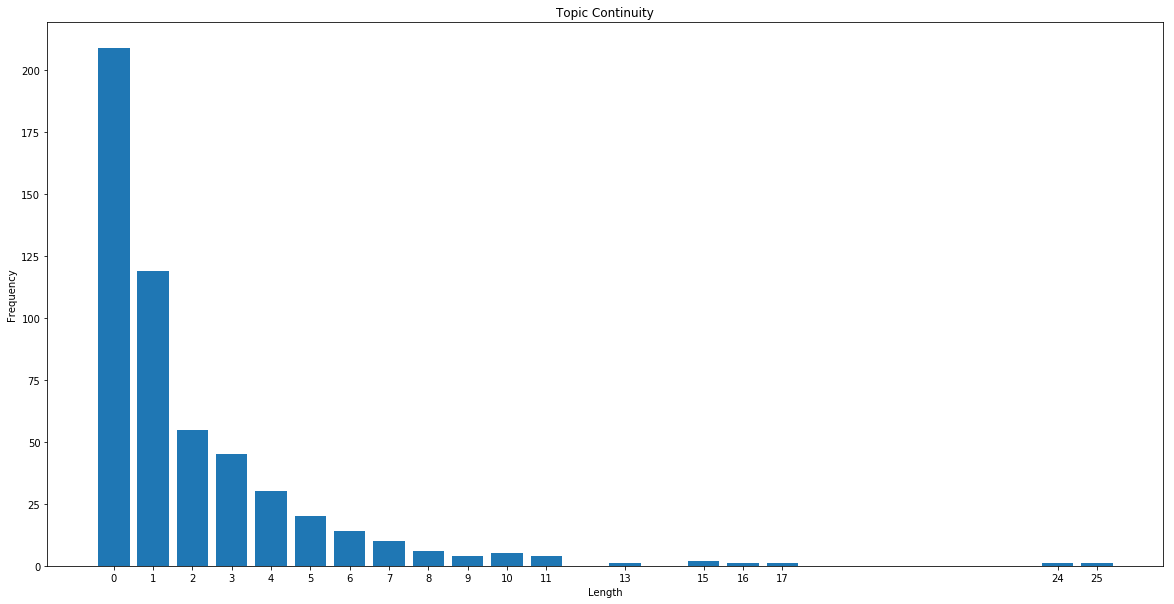

In [270]:
plot_bar(l1_100_50_30, 'Topic Continuity', 'Length')

In [271]:
l1_100_50_30

defaultdict(<function __main__.init_dict>,
            {0: 209,
             1: 119,
             2: 55,
             3: 45,
             4: 30,
             5: 20,
             6: 14,
             7: 10,
             8: 6,
             9: 4,
             10: 5,
             11: 4,
             13: 1,
             15: 2,
             16: 1,
             17: 1,
             24: 1,
             25: 1})

In [272]:
env = ConstDocs(doc, no_docs=40)
oracle_100_50_30.env = env
d1_100_50_30, d2_100_50_30, l1_100_50_30=test_oracle(env, oracle_100_50_30)

01:06:51 PM INFO oracles:pick a random cluster
01:06:51 PM INFO __main__:Round_no 1: Imp_docs 5, Topic_ID 15
01:06:51 PM INFO oracles:pick a random cluster
01:06:51 PM INFO __main__:Round_no 2: Imp_docs 1, Topic_ID 7
01:06:51 PM INFO oracles:pick a random cluster
01:06:51 PM INFO __main__:Round_no 3: Imp_docs 1, Topic_ID 35
01:06:52 PM INFO oracles:pick a random cluster
01:06:52 PM INFO __main__:Round_no 4: Imp_docs 1, Topic_ID 40
01:06:52 PM INFO oracles:pick a random cluster
01:06:52 PM INFO __main__:Round_no 5: Imp_docs 1, Topic_ID 10
01:06:52 PM INFO oracles:pick a random cluster
01:06:52 PM INFO __main__:Round_no 6: Imp_docs 1, Topic_ID 4
01:06:52 PM INFO oracles:pick a random cluster
01:06:52 PM INFO __main__:Round_no 7: Imp_docs 3, Topic_ID 4
01:06:52 PM INFO oracles:pick a random cluster
01:06:52 PM INFO __main__:Round_no 8: Imp_docs 1, Topic_ID 48
01:06:52 PM INFO oracles:pick a random cluster
01:06:52 PM INFO __main__:Round_no 9: Imp_docs 2, Topic_ID 24
01:06:52 PM INFO oracl

01:07:06 PM INFO __main__:Round_no 125: Imp_docs 5, Topic_ID 40
01:07:06 PM INFO __main__:Round_no 126: Imp_docs 3, Topic_ID 40
01:07:06 PM INFO __main__:Round_no 127: Imp_docs 1, Topic_ID 40
01:07:06 PM INFO __main__:Round_no 128: Imp_docs 1, Topic_ID 40
01:07:06 PM INFO __main__:Round_no 129: Imp_docs 2, Topic_ID 40
01:07:07 PM INFO __main__:Round_no 130: Imp_docs 1, Topic_ID 21
01:07:07 PM INFO __main__:Round_no 131: Imp_docs 1, Topic_ID 21
01:07:07 PM INFO __main__:Round_no 132: Imp_docs 1, Topic_ID 21
01:07:07 PM INFO __main__:Round_no 133: Imp_docs 1, Topic_ID 21
01:07:07 PM INFO __main__:Round_no 134: Imp_docs 2, Topic_ID 21
01:07:07 PM INFO __main__:Round_no 135: Imp_docs 1, Topic_ID 21
01:07:07 PM INFO __main__:Round_no 136: Imp_docs 1, Topic_ID 21
01:07:07 PM INFO __main__:Round_no 137: Imp_docs 2, Topic_ID 21
01:07:07 PM INFO __main__:Round_no 138: Imp_docs 1, Topic_ID 21
01:07:07 PM INFO __main__:Round_no 139: Imp_docs 2, Topic_ID 21
01:07:07 PM INFO __main__:Round_no 140: 

01:07:25 PM INFO __main__:Round_no 254: Imp_docs 1, Topic_ID 21
01:07:25 PM INFO __main__:Round_no 255: Imp_docs 1, Topic_ID 21
01:07:25 PM INFO __main__:Round_no 256: Imp_docs 1, Topic_ID 21
01:07:25 PM INFO __main__:Round_no 257: Imp_docs 1, Topic_ID 21
01:07:25 PM INFO __main__:Round_no 258: Imp_docs 2, Topic_ID 21
01:07:25 PM INFO __main__:Round_no 259: Imp_docs 1, Topic_ID 21
01:07:25 PM INFO __main__:Round_no 260: Imp_docs 1, Topic_ID 21
01:07:25 PM INFO __main__:Round_no 261: Imp_docs 1, Topic_ID 21
01:07:26 PM INFO __main__:Round_no 262: Imp_docs 2, Topic_ID 21
01:07:26 PM INFO __main__:Round_no 263: Imp_docs 1, Topic_ID 21
01:07:26 PM INFO __main__:Round_no 264: Imp_docs 3, Topic_ID 21
01:07:26 PM INFO __main__:Round_no 265: Imp_docs 1, Topic_ID 21
01:07:26 PM INFO __main__:Round_no 266: Imp_docs 1, Topic_ID 21
01:07:26 PM INFO __main__:Round_no 267: Imp_docs 2, Topic_ID 43
01:07:26 PM INFO __main__:Round_no 268: Imp_docs 1, Topic_ID 43
01:07:27 PM INFO __main__:Round_no 269: 

01:07:44 PM INFO __main__:Round_no 383: Imp_docs 6, Topic_ID 43
01:07:44 PM INFO __main__:Round_no 384: Imp_docs 8, Topic_ID 43
01:07:44 PM INFO __main__:Round_no 385: Imp_docs 12, Topic_ID 43
01:07:44 PM INFO __main__:Round_no 386: Imp_docs 8, Topic_ID 43
01:07:44 PM INFO __main__:Round_no 387: Imp_docs 8, Topic_ID 43
01:07:44 PM INFO __main__:Round_no 388: Imp_docs 10, Topic_ID 43
01:07:44 PM INFO __main__:Round_no 389: Imp_docs 5, Topic_ID 43
01:07:44 PM INFO __main__:Round_no 390: Imp_docs 2, Topic_ID 43
01:07:45 PM INFO __main__:Round_no 391: Imp_docs 7, Topic_ID 43
01:07:45 PM INFO __main__:Round_no 392: Imp_docs 4, Topic_ID 43
01:07:45 PM INFO __main__:Round_no 393: Imp_docs 1, Topic_ID 43
01:07:45 PM INFO __main__:Round_no 394: Imp_docs 8, Topic_ID 9
01:07:45 PM INFO __main__:Round_no 395: Imp_docs 2, Topic_ID 9
01:07:46 PM INFO __main__:Round_no 396: Imp_docs 1, Topic_ID 43
01:07:46 PM INFO __main__:Round_no 397: Imp_docs 7, Topic_ID 43
01:07:46 PM INFO __main__:Round_no 398: 

01:08:02 PM INFO __main__:Round_no 512: Imp_docs 1, Topic_ID 39
01:08:03 PM INFO __main__:Round_no 513: Imp_docs 1, Topic_ID 6
01:08:03 PM INFO __main__:Round_no 514: Imp_docs 1, Topic_ID 6
01:08:03 PM INFO __main__:Round_no 515: Imp_docs 2, Topic_ID 39
01:08:04 PM INFO __main__:Round_no 516: Imp_docs 1, Topic_ID 40
01:08:04 PM INFO __main__:Round_no 517: Imp_docs 1, Topic_ID 40
01:08:04 PM INFO __main__:Round_no 518: Imp_docs 4, Topic_ID 40
01:08:04 PM INFO __main__:Round_no 519: Imp_docs 1, Topic_ID 43
01:08:04 PM INFO __main__:Round_no 520: Imp_docs 3, Topic_ID 43
01:08:04 PM INFO __main__:Round_no 521: Imp_docs 1, Topic_ID 43
01:08:05 PM INFO __main__:Round_no 522: Imp_docs 2, Topic_ID 43
01:08:05 PM INFO __main__:Round_no 523: Imp_docs 1, Topic_ID 43
01:08:05 PM INFO __main__:Round_no 524: Imp_docs 2, Topic_ID 43
01:08:05 PM INFO __main__:Round_no 525: Imp_docs 1, Topic_ID 43
01:08:05 PM INFO __main__:Round_no 526: Imp_docs 2, Topic_ID 43
01:08:05 PM INFO __main__:Round_no 527: Im

01:08:26 PM INFO __main__:Round_no 641: Imp_docs 4, Topic_ID 47
01:08:26 PM INFO __main__:Round_no 642: Imp_docs 2, Topic_ID 47
01:08:27 PM INFO __main__:Round_no 643: Imp_docs 1, Topic_ID 42
01:08:27 PM INFO __main__:Round_no 644: Imp_docs 1, Topic_ID 42
01:08:27 PM INFO __main__:Round_no 645: Imp_docs 1, Topic_ID 42
01:08:27 PM INFO __main__:Round_no 646: Imp_docs 1, Topic_ID 42
01:08:27 PM INFO __main__:Round_no 647: Imp_docs 1, Topic_ID 42
01:08:28 PM INFO __main__:Round_no 648: Imp_docs 2, Topic_ID 47
01:08:28 PM INFO __main__:Round_no 649: Imp_docs 1, Topic_ID 39
01:08:28 PM INFO __main__:Round_no 650: Imp_docs 3, Topic_ID 39
01:08:28 PM INFO __main__:Round_no 651: Imp_docs 1, Topic_ID 39
01:08:29 PM INFO __main__:Round_no 652: Imp_docs 2, Topic_ID 29
01:08:29 PM INFO __main__:Round_no 653: Imp_docs 1, Topic_ID 25
01:08:29 PM INFO __main__:Round_no 654: Imp_docs 1, Topic_ID 25
01:08:30 PM INFO __main__:Round_no 655: Imp_docs 2, Topic_ID 25
01:08:30 PM INFO __main__:Round_no 656: 

01:08:52 PM INFO __main__:Round_no 770: Imp_docs 1, Topic_ID 39
01:08:52 PM INFO __main__:Round_no 771: Imp_docs 2, Topic_ID 39
01:08:52 PM INFO __main__:Round_no 772: Imp_docs 1, Topic_ID 39
01:08:52 PM INFO __main__:Round_no 773: Imp_docs 2, Topic_ID 39
01:08:52 PM INFO __main__:Round_no 774: Imp_docs 2, Topic_ID 39
01:08:52 PM INFO __main__:Round_no 775: Imp_docs 1, Topic_ID 6
01:08:53 PM INFO __main__:Round_no 776: Imp_docs 1, Topic_ID 21
01:08:54 PM INFO __main__:Round_no 777: Imp_docs 1, Topic_ID 46
01:08:54 PM INFO __main__:Round_no 778: Imp_docs 3, Topic_ID 47
01:08:54 PM INFO __main__:Round_no 779: Imp_docs 2, Topic_ID 47
01:08:54 PM INFO __main__:Round_no 780: Imp_docs 1, Topic_ID 47
01:08:55 PM INFO __main__:Round_no 781: Imp_docs 1, Topic_ID 46
01:08:55 PM INFO __main__:Round_no 782: Imp_docs 2, Topic_ID 46
01:08:55 PM INFO __main__:Round_no 783: Imp_docs 1, Topic_ID 46
01:08:55 PM INFO __main__:Round_no 784: Imp_docs 1, Topic_ID 46
01:08:55 PM INFO __main__:Round_no 785: I

01:09:17 PM INFO __main__:Round_no 899: Imp_docs 1, Topic_ID 39
01:09:17 PM INFO __main__:Round_no 900: Imp_docs 2, Topic_ID 39
01:09:17 PM INFO __main__:Round_no 901: Imp_docs 1, Topic_ID 28
01:09:18 PM INFO __main__:Round_no 902: Imp_docs 1, Topic_ID 4
01:09:18 PM INFO __main__:Round_no 903: Imp_docs 1, Topic_ID 4
01:09:18 PM INFO __main__:Round_no 904: Imp_docs 2, Topic_ID 4
01:09:18 PM INFO __main__:Round_no 905: Imp_docs 1, Topic_ID 37
01:09:18 PM INFO __main__:Round_no 906: Imp_docs 1, Topic_ID 37
01:09:19 PM INFO __main__:Round_no 907: Imp_docs 1, Topic_ID 37
01:09:19 PM INFO __main__:Round_no 908: Imp_docs 5, Topic_ID 37
01:09:19 PM INFO __main__:Round_no 909: Imp_docs 2, Topic_ID 32
01:09:19 PM INFO __main__:Round_no 910: Imp_docs 2, Topic_ID 32
01:09:19 PM INFO __main__:Round_no 911: Imp_docs 1, Topic_ID 32
01:09:19 PM INFO __main__:Round_no 912: Imp_docs 1, Topic_ID 32
01:09:19 PM INFO __main__:Round_no 913: Imp_docs 1, Topic_ID 32
01:09:20 PM INFO __main__:Round_no 914: Imp

01:09:41 PM INFO __main__:Round_no 1028: Imp_docs 1, Topic_ID 39
01:09:41 PM INFO __main__:Round_no 1029: Imp_docs 1, Topic_ID 39
01:09:42 PM INFO __main__:Round_no 1030: Imp_docs 1, Topic_ID 2
01:09:42 PM INFO __main__:Round_no 1031: Imp_docs 1, Topic_ID 2
01:09:42 PM INFO __main__:Round_no 1032: Imp_docs 1, Topic_ID 2
01:09:42 PM INFO __main__:Round_no 1033: Imp_docs 1, Topic_ID 1
01:09:42 PM INFO __main__:Round_no 1034: Imp_docs 2, Topic_ID 1
01:09:43 PM INFO __main__:Round_no 1035: Imp_docs 2, Topic_ID 1
01:09:43 PM INFO __main__:Round_no 1036: Imp_docs 1, Topic_ID 1
01:09:43 PM INFO __main__:Round_no 1037: Imp_docs 1, Topic_ID 1
01:09:43 PM INFO __main__:Round_no 1038: Imp_docs 1, Topic_ID 1
01:09:43 PM INFO __main__:Round_no 1039: Imp_docs 1, Topic_ID 1
01:09:43 PM INFO __main__:Round_no 1040: Imp_docs 1, Topic_ID 35
01:09:44 PM INFO __main__:Round_no 1041: Imp_docs 1, Topic_ID 21
01:09:44 PM INFO __main__:Round_no 1042: Imp_docs 1, Topic_ID 21
01:09:44 PM INFO __main__:Round_no 

01:10:09 PM INFO __main__:Round_no 1155: Imp_docs 2, Topic_ID 32
01:10:10 PM INFO __main__:Round_no 1156: Imp_docs 3, Topic_ID 35
01:10:10 PM INFO __main__:Round_no 1157: Imp_docs 3, Topic_ID 35
01:10:10 PM INFO __main__:Round_no 1158: Imp_docs 2, Topic_ID 47
01:10:11 PM INFO __main__:Round_no 1159: Imp_docs 6, Topic_ID 35
01:10:12 PM INFO __main__:Round_no 1160: Imp_docs 2, Topic_ID 8
01:10:12 PM INFO __main__:Round_no 1161: Imp_docs 2, Topic_ID 8
01:10:12 PM INFO __main__:Round_no 1162: Imp_docs 1, Topic_ID 35
01:10:12 PM INFO __main__:Round_no 1163: Imp_docs 1, Topic_ID 35
01:10:12 PM INFO __main__:Round_no 1164: Imp_docs 1, Topic_ID 35
01:10:13 PM INFO __main__:Round_no 1165: Imp_docs 1, Topic_ID 35
01:10:13 PM INFO __main__:Round_no 1166: Imp_docs 3, Topic_ID 35
01:10:13 PM INFO __main__:Round_no 1167: Imp_docs 3, Topic_ID 35
01:10:13 PM INFO __main__:Round_no 1168: Imp_docs 1, Topic_ID 35
01:10:13 PM INFO __main__:Round_no 1169: Imp_docs 2, Topic_ID 42
01:10:13 PM INFO __main__:R

In [273]:
print type(env),  type(oracle_100_50_30.env), oracle_100_50_30.env.current_idx, oracle_100_50_30.threshold


<class 'environments.ConstDocs'> <class 'environments.ConstDocs'> 47080 1


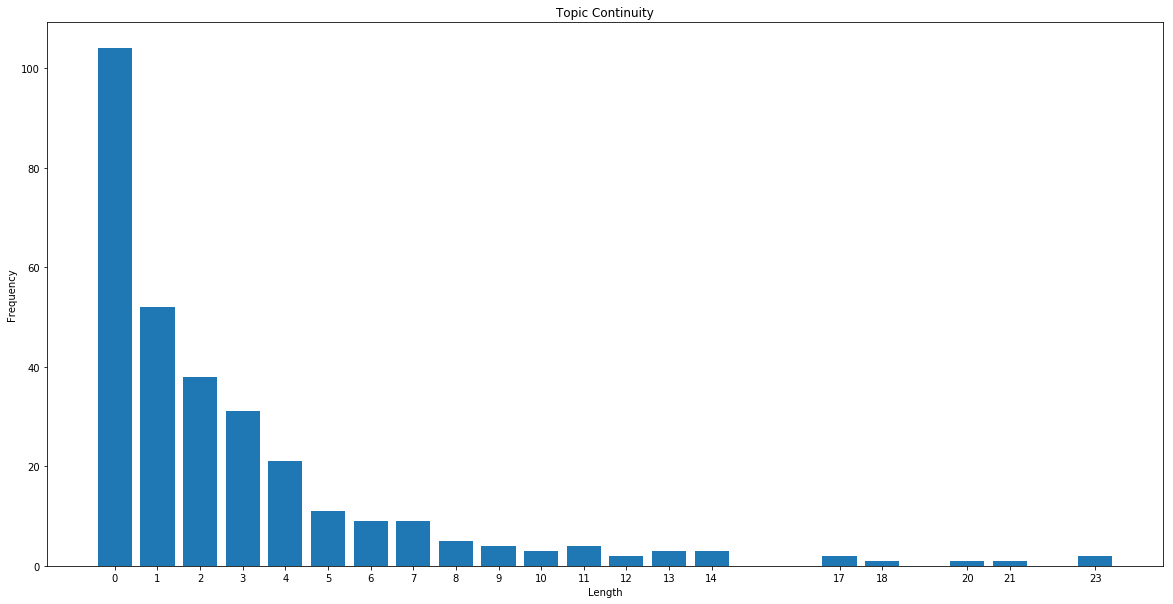

In [274]:
plot_bar(l1_100_50_30, 'Topic Continuity', 'Length')

In [275]:
l1_100_50_30

defaultdict(<function __main__.init_dict>,
            {0: 104,
             1: 52,
             2: 38,
             3: 31,
             4: 21,
             5: 11,
             6: 9,
             7: 9,
             8: 5,
             9: 4,
             10: 3,
             11: 4,
             12: 2,
             13: 3,
             14: 3,
             17: 2,
             18: 1,
             20: 1,
             21: 1,
             23: 2})

In [276]:
env = ConstDocs(doc, no_docs=50)
oracle_100_50_30.env = env
d1_100_50_30, d2_100_50_30, l1_100_50_30=test_oracle(env, oracle_100_50_30)

01:22:39 PM INFO oracles:pick a random cluster
01:22:39 PM INFO __main__:Round_no 1: Imp_docs 5, Topic_ID 15
01:22:39 PM INFO oracles:pick a random cluster
01:22:39 PM INFO __main__:Round_no 2: Imp_docs 1, Topic_ID 31
01:22:39 PM INFO oracles:pick a random cluster
01:22:39 PM INFO __main__:Round_no 3: Imp_docs 3, Topic_ID 1
01:22:39 PM INFO oracles:pick a random cluster
01:22:39 PM INFO __main__:Round_no 4: Imp_docs 2, Topic_ID 45
01:22:39 PM INFO oracles:pick a random cluster
01:22:39 PM INFO __main__:Round_no 5: Imp_docs 4, Topic_ID 4
01:22:39 PM INFO oracles:pick a random cluster
01:22:39 PM INFO __main__:Round_no 6: Imp_docs 1, Topic_ID 35
01:22:39 PM INFO oracles:pick a random cluster
01:22:39 PM INFO __main__:Round_no 7: Imp_docs 5, Topic_ID 21
01:22:40 PM INFO oracles:pick a random cluster
01:22:40 PM INFO __main__:Round_no 8: Imp_docs 1, Topic_ID 38
01:22:40 PM INFO oracles:pick a random cluster
01:22:40 PM INFO __main__:Round_no 9: Imp_docs 1, Topic_ID 12
01:22:40 PM INFO orac

01:22:55 PM INFO __main__:Round_no 124: Imp_docs 4, Topic_ID 40
01:22:55 PM INFO __main__:Round_no 125: Imp_docs 2, Topic_ID 40
01:22:56 PM INFO __main__:Round_no 126: Imp_docs 2, Topic_ID 21
01:22:56 PM INFO __main__:Round_no 127: Imp_docs 3, Topic_ID 21
01:22:56 PM INFO __main__:Round_no 128: Imp_docs 2, Topic_ID 21
01:22:56 PM INFO __main__:Round_no 129: Imp_docs 1, Topic_ID 21
01:22:56 PM INFO __main__:Round_no 130: Imp_docs 1, Topic_ID 21
01:22:56 PM INFO __main__:Round_no 131: Imp_docs 4, Topic_ID 21
01:22:56 PM INFO __main__:Round_no 132: Imp_docs 5, Topic_ID 21
01:22:57 PM INFO __main__:Round_no 133: Imp_docs 1, Topic_ID 21
01:22:57 PM INFO __main__:Round_no 134: Imp_docs 4, Topic_ID 21
01:22:57 PM INFO __main__:Round_no 135: Imp_docs 2, Topic_ID 21
01:22:57 PM INFO __main__:Round_no 136: Imp_docs 1, Topic_ID 21
01:22:57 PM INFO __main__:Round_no 137: Imp_docs 2, Topic_ID 21
01:22:57 PM INFO __main__:Round_no 138: Imp_docs 3, Topic_ID 21
01:22:57 PM INFO __main__:Round_no 139: 

01:23:18 PM INFO __main__:Round_no 253: Imp_docs 1, Topic_ID 35
01:23:19 PM INFO __main__:Round_no 254: Imp_docs 1, Topic_ID 35
01:23:19 PM INFO __main__:Round_no 255: Imp_docs 5, Topic_ID 21
01:23:19 PM INFO __main__:Round_no 256: Imp_docs 4, Topic_ID 21
01:23:20 PM INFO __main__:Round_no 257: Imp_docs 4, Topic_ID 25
01:23:20 PM INFO __main__:Round_no 258: Imp_docs 1, Topic_ID 25
01:23:21 PM INFO __main__:Round_no 259: Imp_docs 3, Topic_ID 21
01:23:21 PM INFO __main__:Round_no 260: Imp_docs 3, Topic_ID 21
01:23:21 PM INFO __main__:Round_no 261: Imp_docs 2, Topic_ID 21
01:23:21 PM INFO __main__:Round_no 262: Imp_docs 1, Topic_ID 21
01:23:21 PM INFO __main__:Round_no 263: Imp_docs 1, Topic_ID 21
01:23:21 PM INFO __main__:Round_no 264: Imp_docs 1, Topic_ID 21
01:23:21 PM INFO __main__:Round_no 265: Imp_docs 2, Topic_ID 21
01:23:21 PM INFO __main__:Round_no 266: Imp_docs 3, Topic_ID 21
01:23:21 PM INFO __main__:Round_no 267: Imp_docs 3, Topic_ID 21
01:23:22 PM INFO __main__:Round_no 268: 

01:23:36 PM INFO __main__:Round_no 382: Imp_docs 3, Topic_ID 4
01:23:36 PM INFO __main__:Round_no 383: Imp_docs 2, Topic_ID 4
01:23:36 PM INFO __main__:Round_no 384: Imp_docs 2, Topic_ID 4
01:23:36 PM INFO __main__:Round_no 385: Imp_docs 4, Topic_ID 4
01:23:36 PM INFO __main__:Round_no 386: Imp_docs 5, Topic_ID 4
01:23:36 PM INFO __main__:Round_no 387: Imp_docs 2, Topic_ID 4
01:23:36 PM INFO __main__:Round_no 388: Imp_docs 2, Topic_ID 4
01:23:36 PM INFO __main__:Round_no 389: Imp_docs 3, Topic_ID 4
01:23:36 PM INFO __main__:Round_no 390: Imp_docs 1, Topic_ID 4
01:23:36 PM INFO __main__:Round_no 391: Imp_docs 4, Topic_ID 4
01:23:36 PM INFO __main__:Round_no 392: Imp_docs 2, Topic_ID 4
01:23:36 PM INFO __main__:Round_no 393: Imp_docs 2, Topic_ID 4
01:23:36 PM INFO __main__:Round_no 394: Imp_docs 2, Topic_ID 4
01:23:36 PM INFO __main__:Round_no 395: Imp_docs 1, Topic_ID 4
01:23:37 PM INFO __main__:Round_no 396: Imp_docs 2, Topic_ID 47
01:23:37 PM INFO __main__:Round_no 397: Imp_docs 1, To

01:23:57 PM INFO __main__:Round_no 511: Imp_docs 1, Topic_ID 43
01:23:57 PM INFO __main__:Round_no 512: Imp_docs 1, Topic_ID 43
01:23:58 PM INFO __main__:Round_no 513: Imp_docs 5, Topic_ID 47
01:23:58 PM INFO __main__:Round_no 514: Imp_docs 1, Topic_ID 47
01:23:58 PM INFO __main__:Round_no 515: Imp_docs 2, Topic_ID 4
01:23:59 PM INFO __main__:Round_no 516: Imp_docs 1, Topic_ID 4
01:23:59 PM INFO __main__:Round_no 517: Imp_docs 2, Topic_ID 4
01:23:59 PM INFO __main__:Round_no 518: Imp_docs 1, Topic_ID 4
01:23:59 PM INFO __main__:Round_no 519: Imp_docs 2, Topic_ID 47
01:23:59 PM INFO __main__:Round_no 520: Imp_docs 3, Topic_ID 47
01:23:59 PM INFO __main__:Round_no 521: Imp_docs 1, Topic_ID 47
01:24:00 PM INFO __main__:Round_no 522: Imp_docs 2, Topic_ID 42
01:24:00 PM INFO __main__:Round_no 523: Imp_docs 1, Topic_ID 42
01:24:01 PM INFO __main__:Round_no 524: Imp_docs 2, Topic_ID 39
01:24:01 PM INFO __main__:Round_no 525: Imp_docs 1, Topic_ID 39
01:24:01 PM INFO __main__:Round_no 526: Imp_

01:24:21 PM INFO __main__:Round_no 640: Imp_docs 2, Topic_ID 39
01:24:22 PM INFO __main__:Round_no 641: Imp_docs 9, Topic_ID 45
01:24:22 PM INFO __main__:Round_no 642: Imp_docs 1, Topic_ID 45
01:24:23 PM INFO __main__:Round_no 643: Imp_docs 1, Topic_ID 6
01:24:23 PM INFO __main__:Round_no 644: Imp_docs 4, Topic_ID 6
01:24:23 PM INFO __main__:Round_no 645: Imp_docs 1, Topic_ID 33
01:24:24 PM INFO __main__:Round_no 646: Imp_docs 1, Topic_ID 4
01:24:24 PM INFO __main__:Round_no 647: Imp_docs 1, Topic_ID 4
01:24:24 PM INFO __main__:Round_no 648: Imp_docs 1, Topic_ID 4
01:24:25 PM INFO __main__:Round_no 649: Imp_docs 2, Topic_ID 10
01:24:25 PM INFO __main__:Round_no 650: Imp_docs 2, Topic_ID 10
01:24:25 PM INFO __main__:Round_no 651: Imp_docs 3, Topic_ID 10
01:24:26 PM INFO __main__:Round_no 652: Imp_docs 1, Topic_ID 29
01:24:26 PM INFO __main__:Round_no 653: Imp_docs 3, Topic_ID 29
01:24:26 PM INFO __main__:Round_no 654: Imp_docs 2, Topic_ID 29
01:24:26 PM INFO __main__:Round_no 655: Imp_d

01:24:49 PM INFO __main__:Round_no 769: Imp_docs 3, Topic_ID 39
01:24:50 PM INFO __main__:Round_no 770: Imp_docs 15, Topic_ID 29
01:24:50 PM INFO __main__:Round_no 771: Imp_docs 6, Topic_ID 29
01:24:50 PM INFO __main__:Round_no 772: Imp_docs 2, Topic_ID 29
01:24:50 PM INFO __main__:Round_no 773: Imp_docs 4, Topic_ID 29
01:24:50 PM INFO __main__:Round_no 774: Imp_docs 1, Topic_ID 29
01:24:50 PM INFO __main__:Round_no 775: Imp_docs 3, Topic_ID 29
01:24:50 PM INFO __main__:Round_no 776: Imp_docs 2, Topic_ID 29
01:24:50 PM INFO __main__:Round_no 777: Imp_docs 11, Topic_ID 29
01:24:51 PM INFO __main__:Round_no 778: Imp_docs 2, Topic_ID 8
01:24:51 PM INFO __main__:Round_no 779: Imp_docs 3, Topic_ID 8
01:24:51 PM INFO __main__:Round_no 780: Imp_docs 1, Topic_ID 8
01:24:52 PM INFO __main__:Round_no 781: Imp_docs 2, Topic_ID 8
01:24:52 PM INFO __main__:Round_no 782: Imp_docs 3, Topic_ID 29
01:24:52 PM INFO __main__:Round_no 783: Imp_docs 2, Topic_ID 29
01:24:52 PM INFO __main__:Round_no 784: Im

01:25:19 PM INFO __main__:Round_no 898: Imp_docs 1, Topic_ID 39
01:25:19 PM INFO __main__:Round_no 899: Imp_docs 2, Topic_ID 39
01:25:19 PM INFO __main__:Round_no 900: Imp_docs 4, Topic_ID 39
01:25:20 PM INFO __main__:Round_no 901: Imp_docs 3, Topic_ID 40
01:25:20 PM INFO __main__:Round_no 902: Imp_docs 1, Topic_ID 40
01:25:20 PM INFO __main__:Round_no 903: Imp_docs 6, Topic_ID 39
01:25:20 PM INFO __main__:Round_no 904: Imp_docs 3, Topic_ID 39
01:25:20 PM INFO __main__:Round_no 905: Imp_docs 4, Topic_ID 39
01:25:21 PM INFO __main__:Round_no 906: Imp_docs 1, Topic_ID 39
01:25:21 PM INFO __main__:Round_no 907: Imp_docs 3, Topic_ID 39
01:25:21 PM INFO __main__:Round_no 908: Imp_docs 4, Topic_ID 39
01:25:21 PM INFO __main__:Round_no 909: Imp_docs 1, Topic_ID 39
01:25:21 PM INFO __main__:Round_no 910: Imp_docs 3, Topic_ID 39
01:25:21 PM INFO __main__:Round_no 911: Imp_docs 1, Topic_ID 39
01:25:22 PM INFO __main__:Round_no 912: Imp_docs 2, Topic_ID 47
01:25:22 PM INFO __main__:Round_no 913: 

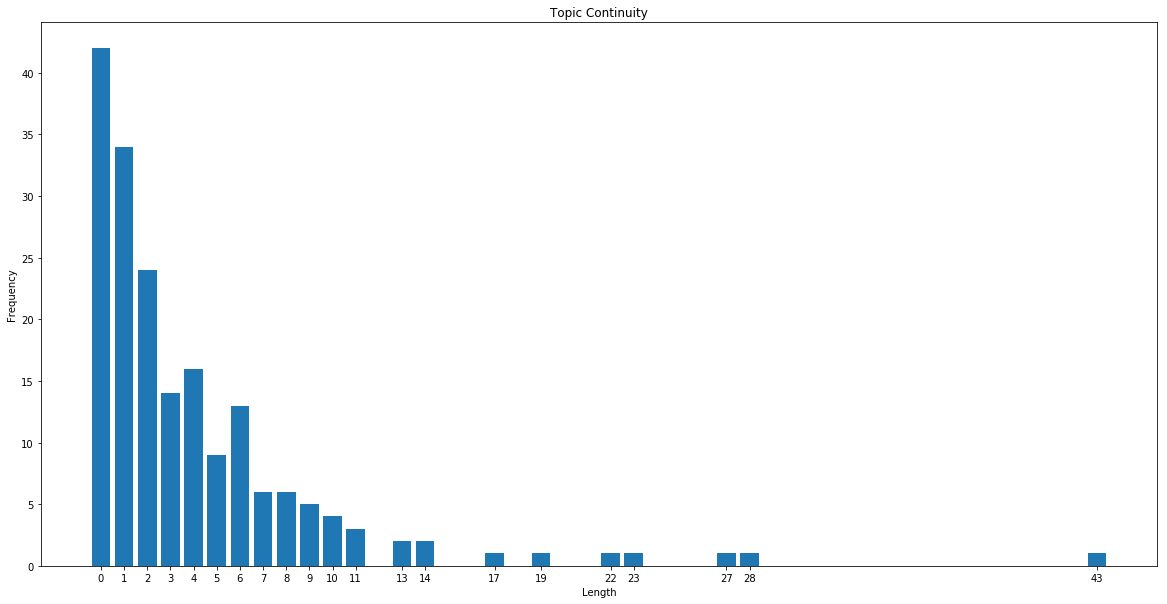

In [277]:
plot_bar(l1_100_50_30, 'Topic Continuity', 'Length')

In [278]:
l1_100_50_30

defaultdict(<function __main__.init_dict>,
            {0: 42,
             1: 34,
             2: 24,
             3: 14,
             4: 16,
             5: 9,
             6: 13,
             7: 6,
             8: 6,
             9: 5,
             10: 4,
             11: 3,
             13: 2,
             14: 2,
             17: 1,
             19: 1,
             22: 1,
             23: 1,
             27: 1,
             28: 1,
             43: 1})

In [282]:
env = ConstDocs(doc, no_docs=50)
agent = ExpWeights(experts=50)
d = test_framework(oracle_100_50_30, agent, env)

02:03:02 PM INFO oracles:pick a random cluster
02:03:02 PM INFO __main__:Oracle_topic: 15 Chosen_topic: 12
02:03:02 PM INFO oracles:pick a random cluster
02:03:02 PM INFO __main__:Oracle_topic: 31 Chosen_topic: 43
02:03:02 PM INFO oracles:pick a random cluster
02:03:02 PM INFO __main__:Oracle_topic: 1 Chosen_topic: 36
02:03:02 PM INFO oracles:pick a random cluster
02:03:02 PM INFO __main__:Oracle_topic: 45 Chosen_topic: 22
02:03:02 PM INFO oracles:pick a random cluster
02:03:02 PM INFO __main__:Oracle_topic: 4 Chosen_topic: 43
02:03:02 PM INFO oracles:pick a random cluster
02:03:02 PM INFO __main__:Oracle_topic: 21 Chosen_topic: 33
02:03:02 PM INFO oracles:pick a random cluster
02:03:02 PM INFO __main__:Oracle_topic: 21 Chosen_topic: 1
02:03:02 PM INFO oracles:pick a random cluster
02:03:02 PM INFO __main__:Oracle_topic: 38 Chosen_topic: 15
02:03:02 PM INFO oracles:pick a random cluster
02:03:02 PM INFO __main__:Oracle_topic: 12 Chosen_topic: 15
02:03:02 PM INFO oracles:pick a random c

02:03:19 PM INFO __main__:Oracle_topic: 21 Chosen_topic: 42
02:03:19 PM INFO __main__:Oracle_topic: 21 Chosen_topic: 7
02:03:20 PM INFO __main__:Oracle_topic: 40 Chosen_topic: 21
02:03:20 PM INFO __main__:Oracle_topic: 40 Chosen_topic: 38
02:03:20 PM INFO __main__:Oracle_topic: 40 Chosen_topic: 21
02:03:20 PM INFO __main__:Oracle_topic: 40 Chosen_topic: 17
02:03:20 PM INFO __main__:Oracle_topic: 40 Chosen_topic: 8
02:03:21 PM INFO __main__:Oracle_topic: 21 Chosen_topic: 20
02:03:21 PM INFO __main__:Oracle_topic: 21 Chosen_topic: 25
02:03:21 PM INFO __main__:Oracle_topic: 21 Chosen_topic: 49
02:03:21 PM INFO __main__:Oracle_topic: 21 Chosen_topic: 10
02:03:21 PM INFO __main__:Oracle_topic: 21 Chosen_topic: 40
02:03:21 PM INFO __main__:Oracle_topic: 21 Chosen_topic: 21
02:03:21 PM INFO __main__:Oracle_topic: 21 Chosen_topic: 20
02:03:22 PM INFO __main__:Oracle_topic: 21 Chosen_topic: 21
02:03:22 PM INFO __main__:Oracle_topic: 21 Chosen_topic: 21
02:03:22 PM INFO __main__:Oracle_topic: 21

02:03:47 PM INFO __main__:Oracle_topic: 2 Chosen_topic: 4
02:03:47 PM INFO __main__:Oracle_topic: 2 Chosen_topic: 21
02:03:47 PM INFO __main__:Oracle_topic: 2 Chosen_topic: 21
02:03:47 PM INFO __main__:Oracle_topic: 2 Chosen_topic: 4
02:03:47 PM INFO __main__:Oracle_topic: 2 Chosen_topic: 21
02:03:47 PM INFO __main__:Oracle_topic: 2 Chosen_topic: 40
02:03:47 PM INFO __main__:Oracle_topic: 2 Chosen_topic: 0
02:03:47 PM INFO __main__:Oracle_topic: 2 Chosen_topic: 21
02:03:48 PM INFO __main__:Oracle_topic: 43 Chosen_topic: 21
02:03:48 PM INFO __main__:Oracle_topic: 43 Chosen_topic: 21
02:03:48 PM INFO __main__:Oracle_topic: 43 Chosen_topic: 21
02:03:48 PM INFO __main__:Oracle_topic: 43 Chosen_topic: 21
02:03:48 PM INFO __main__:Oracle_topic: 43 Chosen_topic: 21
02:03:48 PM INFO __main__:Oracle_topic: 43 Chosen_topic: 4
02:03:48 PM INFO __main__:Oracle_topic: 43 Chosen_topic: 21
02:03:48 PM INFO __main__:Oracle_topic: 43 Chosen_topic: 40
02:03:48 PM INFO __main__:Oracle_topic: 43 Chosen_to

02:04:04 PM INFO __main__:Oracle_topic: 6 Chosen_topic: 21
02:04:05 PM INFO __main__:Oracle_topic: 39 Chosen_topic: 4
02:04:05 PM INFO __main__:Oracle_topic: 39 Chosen_topic: 21
02:04:05 PM INFO __main__:Oracle_topic: 39 Chosen_topic: 4
02:04:05 PM INFO __main__:Oracle_topic: 39 Chosen_topic: 21
02:04:05 PM INFO __main__:Oracle_topic: 39 Chosen_topic: 21
02:04:05 PM INFO __main__:Oracle_topic: 39 Chosen_topic: 4
02:04:05 PM INFO __main__:Oracle_topic: 39 Chosen_topic: 21
02:04:05 PM INFO __main__:Oracle_topic: 39 Chosen_topic: 21
02:04:05 PM INFO __main__:Oracle_topic: 39 Chosen_topic: 43
02:04:05 PM INFO __main__:Oracle_topic: 39 Chosen_topic: 4
02:04:05 PM INFO __main__:Oracle_topic: 39 Chosen_topic: 21
02:04:05 PM INFO __main__:Oracle_topic: 39 Chosen_topic: 4
02:04:05 PM INFO __main__:Oracle_topic: 39 Chosen_topic: 4
02:04:05 PM INFO __main__:Oracle_topic: 39 Chosen_topic: 21
02:04:06 PM INFO __main__:Oracle_topic: 39 Chosen_topic: 4
02:04:06 PM INFO __main__:Oracle_topic: 47 Chose

02:04:27 PM INFO __main__:Oracle_topic: 40 Chosen_topic: 43
02:04:27 PM INFO __main__:Oracle_topic: 39 Chosen_topic: 43
02:04:28 PM INFO __main__:Oracle_topic: 39 Chosen_topic: 4
02:04:28 PM INFO __main__:Oracle_topic: 39 Chosen_topic: 21
02:04:28 PM INFO __main__:Oracle_topic: 39 Chosen_topic: 43
02:04:28 PM INFO __main__:Oracle_topic: 29 Chosen_topic: 4
02:04:28 PM INFO __main__:Oracle_topic: 29 Chosen_topic: 39
02:04:28 PM INFO __main__:Oracle_topic: 29 Chosen_topic: 21
02:04:29 PM INFO __main__:Oracle_topic: 29 Chosen_topic: 21
02:04:29 PM INFO __main__:Oracle_topic: 29 Chosen_topic: 28
02:04:29 PM INFO __main__:Oracle_topic: 29 Chosen_topic: 4
02:04:29 PM INFO __main__:Oracle_topic: 29 Chosen_topic: 43
02:04:29 PM INFO __main__:Oracle_topic: 29 Chosen_topic: 4
02:04:29 PM INFO __main__:Oracle_topic: 29 Chosen_topic: 39
02:04:29 PM INFO __main__:Oracle_topic: 29 Chosen_topic: 4
02:04:29 PM INFO __main__:Oracle_topic: 29 Chosen_topic: 21
02:04:29 PM INFO __main__:Oracle_topic: 29 Ch

02:04:55 PM INFO __main__:Oracle_topic: 39 Chosen_topic: 4
02:04:55 PM INFO __main__:Oracle_topic: 39 Chosen_topic: 43
02:04:55 PM INFO __main__:Oracle_topic: 39 Chosen_topic: 4
02:04:55 PM INFO __main__:Oracle_topic: 39 Chosen_topic: 4
02:04:55 PM INFO __main__:Oracle_topic: 39 Chosen_topic: 39
02:04:55 PM INFO __main__:Oracle_topic: 39 Chosen_topic: 43
02:04:56 PM INFO __main__:Oracle_topic: 46 Chosen_topic: 4
02:04:56 PM INFO __main__:Oracle_topic: 46 Chosen_topic: 4
02:04:56 PM INFO __main__:Oracle_topic: 46 Chosen_topic: 43
02:04:56 PM INFO __main__:Oracle_topic: 46 Chosen_topic: 4
02:04:56 PM INFO __main__:Oracle_topic: 46 Chosen_topic: 43
02:04:56 PM INFO __main__:Oracle_topic: 46 Chosen_topic: 39
02:04:56 PM INFO __main__:Oracle_topic: 46 Chosen_topic: 39
02:04:56 PM INFO __main__:Oracle_topic: 46 Chosen_topic: 39
02:04:56 PM INFO __main__:Oracle_topic: 46 Chosen_topic: 39
02:04:56 PM INFO __main__:Oracle_topic: 46 Chosen_topic: 39
02:04:56 PM INFO __main__:Oracle_topic: 46 Cho

02:05:21 PM INFO __main__:Oracle_topic: 32 Chosen_topic: 4
02:05:21 PM INFO __main__:Oracle_topic: 32 Chosen_topic: 29
02:05:22 PM INFO __main__:Oracle_topic: 6 Chosen_topic: 39
02:05:22 PM INFO __main__:Oracle_topic: 24 Chosen_topic: 39
02:05:23 PM INFO __main__:Oracle_topic: 1 Chosen_topic: 39
02:05:23 PM INFO __main__:Oracle_topic: 1 Chosen_topic: 39
02:05:24 PM INFO __main__:Oracle_topic: 35 Chosen_topic: 39
02:05:24 PM INFO __main__:Oracle_topic: 35 Chosen_topic: 21
02:05:24 PM INFO __main__:Oracle_topic: 8 Chosen_topic: 39
02:05:25 PM INFO __main__:Oracle_topic: 8 Chosen_topic: 4
02:05:25 PM INFO __main__:Oracle_topic: 8 Chosen_topic: 29
02:05:25 PM INFO __main__:Oracle_topic: 8 Chosen_topic: 29
02:05:25 PM INFO __main__:Oracle_topic: 21 Chosen_topic: 39
02:05:25 PM INFO __main__:Oracle_topic: 21 Chosen_topic: 39
02:05:25 PM INFO __main__:Oracle_topic: 21 Chosen_topic: 39
02:05:26 PM INFO __main__:Oracle_topic: 21 Chosen_topic: 39
02:05:26 PM INFO __main__:Oracle_topic: 21 Chosen

In [283]:
d

defaultdict(<function __main__.init_dict>, {0: 834, 1: 107})

In [284]:
env = ConstDocs(doc, no_docs=50)
agent = ExpWeights(experts=50, eta=0.8)
d = test_framework(oracle_100_50_30, agent, env)

02:05:52 PM INFO oracles:pick a random cluster
02:05:52 PM INFO __main__:Oracle_topic: 15 Chosen_topic: 43
02:05:52 PM INFO oracles:pick a random cluster
02:05:52 PM INFO __main__:Oracle_topic: 31 Chosen_topic: 26
02:05:52 PM INFO oracles:pick a random cluster
02:05:52 PM INFO __main__:Oracle_topic: 1 Chosen_topic: 48
02:05:52 PM INFO oracles:pick a random cluster
02:05:52 PM INFO __main__:Oracle_topic: 45 Chosen_topic: 45
02:05:52 PM INFO oracles:pick a random cluster
02:05:52 PM INFO __main__:Oracle_topic: 7 Chosen_topic: 14
02:05:52 PM INFO oracles:pick a random cluster
02:05:52 PM INFO __main__:Oracle_topic: 35 Chosen_topic: 13
02:05:52 PM INFO oracles:pick a random cluster
02:05:52 PM INFO __main__:Oracle_topic: 21 Chosen_topic: 3
02:05:52 PM INFO oracles:pick a random cluster
02:05:52 PM INFO __main__:Oracle_topic: 38 Chosen_topic: 4
02:05:52 PM INFO oracles:pick a random cluster
02:05:52 PM INFO __main__:Oracle_topic: 12 Chosen_topic: 31
02:05:53 PM INFO oracles:pick a random cl

02:06:09 PM INFO __main__:Oracle_topic: 21 Chosen_topic: 40
02:06:09 PM INFO __main__:Oracle_topic: 21 Chosen_topic: 40
02:06:09 PM INFO __main__:Oracle_topic: 21 Chosen_topic: 40
02:06:10 PM INFO __main__:Oracle_topic: 21 Chosen_topic: 40
02:06:10 PM INFO __main__:Oracle_topic: 21 Chosen_topic: 40
02:06:10 PM INFO __main__:Oracle_topic: 21 Chosen_topic: 40
02:06:10 PM INFO __main__:Oracle_topic: 21 Chosen_topic: 40
02:06:10 PM INFO __main__:Oracle_topic: 21 Chosen_topic: 40
02:06:10 PM INFO __main__:Oracle_topic: 21 Chosen_topic: 40
02:06:10 PM INFO __main__:Oracle_topic: 21 Chosen_topic: 40
02:06:10 PM INFO __main__:Oracle_topic: 21 Chosen_topic: 40
02:06:10 PM INFO __main__:Oracle_topic: 21 Chosen_topic: 40
02:06:10 PM INFO __main__:Oracle_topic: 21 Chosen_topic: 40
02:06:10 PM INFO __main__:Oracle_topic: 21 Chosen_topic: 40
02:06:10 PM INFO __main__:Oracle_topic: 21 Chosen_topic: 40
02:06:10 PM INFO __main__:Oracle_topic: 21 Chosen_topic: 40
02:06:10 PM INFO __main__:Oracle_topic: 

02:06:32 PM INFO __main__:Oracle_topic: 2 Chosen_topic: 21
02:06:32 PM INFO __main__:Oracle_topic: 2 Chosen_topic: 21
02:06:32 PM INFO __main__:Oracle_topic: 2 Chosen_topic: 21
02:06:32 PM INFO __main__:Oracle_topic: 2 Chosen_topic: 21
02:06:32 PM INFO __main__:Oracle_topic: 2 Chosen_topic: 21
02:06:32 PM INFO __main__:Oracle_topic: 2 Chosen_topic: 21
02:06:32 PM INFO __main__:Oracle_topic: 2 Chosen_topic: 21
02:06:32 PM INFO __main__:Oracle_topic: 2 Chosen_topic: 21
02:06:32 PM INFO __main__:Oracle_topic: 2 Chosen_topic: 21
02:06:33 PM INFO __main__:Oracle_topic: 43 Chosen_topic: 21
02:06:33 PM INFO __main__:Oracle_topic: 43 Chosen_topic: 21
02:06:33 PM INFO __main__:Oracle_topic: 43 Chosen_topic: 21
02:06:33 PM INFO __main__:Oracle_topic: 43 Chosen_topic: 21
02:06:33 PM INFO __main__:Oracle_topic: 43 Chosen_topic: 21
02:06:33 PM INFO __main__:Oracle_topic: 43 Chosen_topic: 21
02:06:33 PM INFO __main__:Oracle_topic: 43 Chosen_topic: 21
02:06:33 PM INFO __main__:Oracle_topic: 43 Chosen

02:06:47 PM INFO __main__:Oracle_topic: 6 Chosen_topic: 21
02:06:47 PM INFO __main__:Oracle_topic: 6 Chosen_topic: 21
02:06:48 PM INFO __main__:Oracle_topic: 39 Chosen_topic: 21
02:06:48 PM INFO __main__:Oracle_topic: 39 Chosen_topic: 21
02:06:48 PM INFO __main__:Oracle_topic: 39 Chosen_topic: 21
02:06:48 PM INFO __main__:Oracle_topic: 39 Chosen_topic: 21
02:06:48 PM INFO __main__:Oracle_topic: 39 Chosen_topic: 21
02:06:48 PM INFO __main__:Oracle_topic: 39 Chosen_topic: 21
02:06:48 PM INFO __main__:Oracle_topic: 39 Chosen_topic: 21
02:06:48 PM INFO __main__:Oracle_topic: 39 Chosen_topic: 21
02:06:48 PM INFO __main__:Oracle_topic: 39 Chosen_topic: 21
02:06:49 PM INFO __main__:Oracle_topic: 39 Chosen_topic: 21
02:06:49 PM INFO __main__:Oracle_topic: 39 Chosen_topic: 21
02:06:49 PM INFO __main__:Oracle_topic: 39 Chosen_topic: 21
02:06:49 PM INFO __main__:Oracle_topic: 39 Chosen_topic: 21
02:06:49 PM INFO __main__:Oracle_topic: 39 Chosen_topic: 21
02:06:49 PM INFO __main__:Oracle_topic: 39

02:07:08 PM INFO __main__:Oracle_topic: 39 Chosen_topic: 43
02:07:09 PM INFO __main__:Oracle_topic: 40 Chosen_topic: 43
02:07:09 PM INFO __main__:Oracle_topic: 40 Chosen_topic: 43
02:07:09 PM INFO __main__:Oracle_topic: 39 Chosen_topic: 43
02:07:10 PM INFO __main__:Oracle_topic: 39 Chosen_topic: 43
02:07:10 PM INFO __main__:Oracle_topic: 39 Chosen_topic: 43
02:07:10 PM INFO __main__:Oracle_topic: 39 Chosen_topic: 43
02:07:10 PM INFO __main__:Oracle_topic: 29 Chosen_topic: 43
02:07:10 PM INFO __main__:Oracle_topic: 29 Chosen_topic: 43
02:07:10 PM INFO __main__:Oracle_topic: 29 Chosen_topic: 43
02:07:10 PM INFO __main__:Oracle_topic: 29 Chosen_topic: 43
02:07:11 PM INFO __main__:Oracle_topic: 29 Chosen_topic: 43
02:07:11 PM INFO __main__:Oracle_topic: 29 Chosen_topic: 43
02:07:11 PM INFO __main__:Oracle_topic: 29 Chosen_topic: 43
02:07:11 PM INFO __main__:Oracle_topic: 29 Chosen_topic: 43
02:07:11 PM INFO __main__:Oracle_topic: 29 Chosen_topic: 43
02:07:11 PM INFO __main__:Oracle_topic: 

02:07:32 PM INFO __main__:Oracle_topic: 6 Chosen_topic: 39
02:07:33 PM INFO __main__:Oracle_topic: 39 Chosen_topic: 39
02:07:33 PM INFO __main__:Oracle_topic: 39 Chosen_topic: 39
02:07:33 PM INFO __main__:Oracle_topic: 39 Chosen_topic: 39
02:07:33 PM INFO __main__:Oracle_topic: 39 Chosen_topic: 39
02:07:33 PM INFO __main__:Oracle_topic: 39 Chosen_topic: 39
02:07:33 PM INFO __main__:Oracle_topic: 39 Chosen_topic: 39
02:07:33 PM INFO __main__:Oracle_topic: 39 Chosen_topic: 39
02:07:34 PM INFO __main__:Oracle_topic: 39 Chosen_topic: 39
02:07:34 PM INFO __main__:Oracle_topic: 27 Chosen_topic: 39
02:07:35 PM INFO __main__:Oracle_topic: 6 Chosen_topic: 39
02:07:35 PM INFO __main__:Oracle_topic: 6 Chosen_topic: 39
02:07:35 PM INFO __main__:Oracle_topic: 6 Chosen_topic: 39
02:07:35 PM INFO __main__:Oracle_topic: 6 Chosen_topic: 39
02:07:35 PM INFO __main__:Oracle_topic: 6 Chosen_topic: 39
02:07:35 PM INFO __main__:Oracle_topic: 6 Chosen_topic: 39
02:07:35 PM INFO __main__:Oracle_topic: 6 Chose

02:07:59 PM INFO __main__:Oracle_topic: 24 Chosen_topic: 39
02:07:59 PM INFO __main__:Oracle_topic: 24 Chosen_topic: 39
02:08:00 PM INFO __main__:Oracle_topic: 32 Chosen_topic: 39
02:08:00 PM INFO __main__:Oracle_topic: 32 Chosen_topic: 39
02:08:00 PM INFO __main__:Oracle_topic: 32 Chosen_topic: 39
02:08:00 PM INFO __main__:Oracle_topic: 32 Chosen_topic: 39
02:08:01 PM INFO __main__:Oracle_topic: 1 Chosen_topic: 39
02:08:01 PM INFO __main__:Oracle_topic: 1 Chosen_topic: 39
02:08:01 PM INFO __main__:Oracle_topic: 1 Chosen_topic: 39
02:08:02 PM INFO __main__:Oracle_topic: 35 Chosen_topic: 39
02:08:02 PM INFO __main__:Oracle_topic: 36 Chosen_topic: 39
02:08:02 PM INFO __main__:Oracle_topic: 36 Chosen_topic: 39
02:08:02 PM INFO __main__:Oracle_topic: 36 Chosen_topic: 39
02:08:02 PM INFO __main__:Oracle_topic: 36 Chosen_topic: 39
02:08:03 PM INFO __main__:Oracle_topic: 35 Chosen_topic: 39
02:08:04 PM INFO __main__:Oracle_topic: 8 Chosen_topic: 39
02:08:04 PM INFO __main__:Oracle_topic: 8 Ch

In [285]:
d

defaultdict(<function __main__.init_dict>, {0: 785, 1: 156})

In [286]:
env = ConstDocs(doc, no_docs=50)
agent = ExpWeights(experts=50, eta=1)
d = test_framework(oracle_100_50_30, agent, env)

02:08:29 PM INFO oracles:pick a random cluster
02:08:29 PM INFO __main__:Oracle_topic: 11 Chosen_topic: 45
02:08:29 PM INFO oracles:pick a random cluster
02:08:29 PM INFO __main__:Oracle_topic: 31 Chosen_topic: 19
02:08:29 PM INFO oracles:pick a random cluster
02:08:29 PM INFO __main__:Oracle_topic: 1 Chosen_topic: 37
02:08:29 PM INFO oracles:pick a random cluster
02:08:29 PM INFO __main__:Oracle_topic: 45 Chosen_topic: 13
02:08:29 PM INFO oracles:pick a random cluster
02:08:29 PM INFO __main__:Oracle_topic: 4 Chosen_topic: 29
02:08:29 PM INFO oracles:pick a random cluster
02:08:29 PM INFO __main__:Oracle_topic: 35 Chosen_topic: 31
02:08:29 PM INFO oracles:pick a random cluster
02:08:29 PM INFO __main__:Oracle_topic: 21 Chosen_topic: 20
02:08:29 PM INFO oracles:pick a random cluster
02:08:29 PM INFO __main__:Oracle_topic: 38 Chosen_topic: 26
02:08:29 PM INFO oracles:pick a random cluster
02:08:29 PM INFO __main__:Oracle_topic: 12 Chosen_topic: 8
02:08:29 PM INFO oracles:pick a random c

02:08:46 PM INFO __main__:Oracle_topic: 40 Chosen_topic: 40
02:08:46 PM INFO __main__:Oracle_topic: 40 Chosen_topic: 40
02:08:46 PM INFO __main__:Oracle_topic: 40 Chosen_topic: 40
02:08:46 PM INFO __main__:Oracle_topic: 40 Chosen_topic: 40
02:08:46 PM INFO __main__:Oracle_topic: 40 Chosen_topic: 40
02:08:46 PM INFO __main__:Oracle_topic: 40 Chosen_topic: 40
02:08:46 PM INFO __main__:Oracle_topic: 40 Chosen_topic: 40
02:08:46 PM INFO __main__:Oracle_topic: 40 Chosen_topic: 40
02:08:46 PM INFO __main__:Oracle_topic: 40 Chosen_topic: 40
02:08:46 PM INFO __main__:Oracle_topic: 40 Chosen_topic: 40
02:08:46 PM INFO __main__:Oracle_topic: 40 Chosen_topic: 40
02:08:47 PM INFO __main__:Oracle_topic: 18 Chosen_topic: 40
02:08:47 PM INFO __main__:Oracle_topic: 18 Chosen_topic: 40
02:08:47 PM INFO __main__:Oracle_topic: 18 Chosen_topic: 40
02:08:47 PM INFO __main__:Oracle_topic: 18 Chosen_topic: 40
02:08:48 PM INFO __main__:Oracle_topic: 15 Chosen_topic: 40
02:08:48 PM INFO __main__:Oracle_topic: 

02:09:10 PM INFO __main__:Oracle_topic: 2 Chosen_topic: 21
02:09:10 PM INFO __main__:Oracle_topic: 2 Chosen_topic: 21
02:09:10 PM INFO __main__:Oracle_topic: 2 Chosen_topic: 21
02:09:10 PM INFO __main__:Oracle_topic: 2 Chosen_topic: 21
02:09:10 PM INFO __main__:Oracle_topic: 2 Chosen_topic: 21
02:09:10 PM INFO __main__:Oracle_topic: 2 Chosen_topic: 21
02:09:10 PM INFO __main__:Oracle_topic: 2 Chosen_topic: 21
02:09:10 PM INFO __main__:Oracle_topic: 2 Chosen_topic: 21
02:09:10 PM INFO __main__:Oracle_topic: 2 Chosen_topic: 21
02:09:10 PM INFO __main__:Oracle_topic: 2 Chosen_topic: 21
02:09:11 PM INFO __main__:Oracle_topic: 43 Chosen_topic: 21
02:09:11 PM INFO __main__:Oracle_topic: 43 Chosen_topic: 40
02:09:11 PM INFO __main__:Oracle_topic: 43 Chosen_topic: 21
02:09:11 PM INFO __main__:Oracle_topic: 43 Chosen_topic: 21
02:09:11 PM INFO __main__:Oracle_topic: 43 Chosen_topic: 21
02:09:11 PM INFO __main__:Oracle_topic: 43 Chosen_topic: 21
02:09:11 PM INFO __main__:Oracle_topic: 43 Chosen_

02:09:26 PM INFO __main__:Oracle_topic: 6 Chosen_topic: 21
02:09:26 PM INFO __main__:Oracle_topic: 6 Chosen_topic: 21
02:09:26 PM INFO __main__:Oracle_topic: 6 Chosen_topic: 21
02:09:27 PM INFO __main__:Oracle_topic: 45 Chosen_topic: 21
02:09:27 PM INFO __main__:Oracle_topic: 45 Chosen_topic: 21
02:09:27 PM INFO __main__:Oracle_topic: 45 Chosen_topic: 21
02:09:27 PM INFO __main__:Oracle_topic: 45 Chosen_topic: 21
02:09:27 PM INFO __main__:Oracle_topic: 45 Chosen_topic: 21
02:09:28 PM INFO __main__:Oracle_topic: 43 Chosen_topic: 21
02:09:28 PM INFO __main__:Oracle_topic: 43 Chosen_topic: 21
02:09:28 PM INFO __main__:Oracle_topic: 43 Chosen_topic: 21
02:09:28 PM INFO __main__:Oracle_topic: 43 Chosen_topic: 21
02:09:28 PM INFO __main__:Oracle_topic: 43 Chosen_topic: 21
02:09:28 PM INFO __main__:Oracle_topic: 43 Chosen_topic: 21
02:09:28 PM INFO __main__:Oracle_topic: 43 Chosen_topic: 21
02:09:28 PM INFO __main__:Oracle_topic: 43 Chosen_topic: 21
02:09:28 PM INFO __main__:Oracle_topic: 43 

02:09:49 PM INFO __main__:Oracle_topic: 39 Chosen_topic: 43
02:09:49 PM INFO __main__:Oracle_topic: 39 Chosen_topic: 43
02:09:49 PM INFO __main__:Oracle_topic: 40 Chosen_topic: 43
02:09:50 PM INFO __main__:Oracle_topic: 40 Chosen_topic: 43
02:09:50 PM INFO __main__:Oracle_topic: 39 Chosen_topic: 43
02:09:50 PM INFO __main__:Oracle_topic: 39 Chosen_topic: 43
02:09:50 PM INFO __main__:Oracle_topic: 39 Chosen_topic: 43
02:09:50 PM INFO __main__:Oracle_topic: 39 Chosen_topic: 43
02:09:50 PM INFO __main__:Oracle_topic: 39 Chosen_topic: 43
02:09:50 PM INFO __main__:Oracle_topic: 39 Chosen_topic: 43
02:09:51 PM INFO __main__:Oracle_topic: 29 Chosen_topic: 43
02:09:51 PM INFO __main__:Oracle_topic: 29 Chosen_topic: 43
02:09:51 PM INFO __main__:Oracle_topic: 29 Chosen_topic: 43
02:09:51 PM INFO __main__:Oracle_topic: 29 Chosen_topic: 43
02:09:51 PM INFO __main__:Oracle_topic: 29 Chosen_topic: 43
02:09:51 PM INFO __main__:Oracle_topic: 29 Chosen_topic: 43
02:09:51 PM INFO __main__:Oracle_topic: 

02:10:16 PM INFO __main__:Oracle_topic: 6 Chosen_topic: 43
02:10:16 PM INFO __main__:Oracle_topic: 6 Chosen_topic: 43
02:10:16 PM INFO __main__:Oracle_topic: 39 Chosen_topic: 43
02:10:16 PM INFO __main__:Oracle_topic: 39 Chosen_topic: 43
02:10:16 PM INFO __main__:Oracle_topic: 39 Chosen_topic: 43
02:10:16 PM INFO __main__:Oracle_topic: 39 Chosen_topic: 43
02:10:17 PM INFO __main__:Oracle_topic: 39 Chosen_topic: 43
02:10:17 PM INFO __main__:Oracle_topic: 39 Chosen_topic: 43
02:10:17 PM INFO __main__:Oracle_topic: 39 Chosen_topic: 43
02:10:17 PM INFO __main__:Oracle_topic: 39 Chosen_topic: 43
02:10:17 PM INFO __main__:Oracle_topic: 27 Chosen_topic: 39
02:10:18 PM INFO __main__:Oracle_topic: 39 Chosen_topic: 43
02:10:18 PM INFO __main__:Oracle_topic: 39 Chosen_topic: 39
02:10:18 PM INFO __main__:Oracle_topic: 39 Chosen_topic: 39
02:10:19 PM INFO __main__:Oracle_topic: 6 Chosen_topic: 39
02:10:19 PM INFO __main__:Oracle_topic: 6 Chosen_topic: 39
02:10:19 PM INFO __main__:Oracle_topic: 6 Ch

02:10:46 PM INFO __main__:Oracle_topic: 39 Chosen_topic: 39
02:10:47 PM INFO __main__:Oracle_topic: 24 Chosen_topic: 39
02:10:47 PM INFO __main__:Oracle_topic: 24 Chosen_topic: 39
02:10:47 PM INFO __main__:Oracle_topic: 32 Chosen_topic: 39
02:10:47 PM INFO __main__:Oracle_topic: 32 Chosen_topic: 39
02:10:47 PM INFO __main__:Oracle_topic: 32 Chosen_topic: 39
02:10:47 PM INFO __main__:Oracle_topic: 32 Chosen_topic: 39
02:10:48 PM INFO __main__:Oracle_topic: 11 Chosen_topic: 39
02:10:48 PM INFO __main__:Oracle_topic: 11 Chosen_topic: 39
02:10:48 PM INFO __main__:Oracle_topic: 11 Chosen_topic: 39
02:10:48 PM INFO __main__:Oracle_topic: 11 Chosen_topic: 39
02:10:48 PM INFO __main__:Oracle_topic: 11 Chosen_topic: 39
02:10:49 PM INFO __main__:Oracle_topic: 8 Chosen_topic: 39
02:10:49 PM INFO __main__:Oracle_topic: 8 Chosen_topic: 39
02:10:49 PM INFO __main__:Oracle_topic: 8 Chosen_topic: 39
02:10:49 PM INFO __main__:Oracle_topic: 8 Chosen_topic: 39
02:10:50 PM INFO __main__:Oracle_topic: 21 C

In [287]:
d

defaultdict(<function __main__.init_dict>, {0: 844, 1: 97})

In [288]:
oracle_100_50_30.threshold

1

In [ ]:
env = DocsByDate()
freq_dict_100_50_30, group_dict_100_50_30 = test_kmeans(env, oracle_100_50_30)